<a href="https://colab.research.google.com/github/DB9653/Bachelorarbeit/blob/main/Predictions_und_Kategorien_Train_GE18_Index_korrigiert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from functools import reduce


### Predictions 

In [ ]:
train_ge18_pred_ge18 = pd.read_excel('/content/TrainGE18PredGE18.xlsx')
train_ge18_pred_ge18

index   0
0         0  -1
1         1   2
2         2  -1
3         3   0
4         4  12
...     ...  ..
3527   3527   0
3528   3528  -1
3529   3529  -1
3530   3530  -1
3531   3531  -1

[3532 rows x 2 columns]

In [ ]:
train_ge18_pred_ge19 = pd.read_excel('/content/TrainGE18PredGE19.xlsx')


In [ ]:
train_ge18_pred_h19 = pd.read_excel('/content/TrainGE18PredH19.xlsx')


In [ ]:
train_ge18_pred_h20 = pd.read_excel('/content/TrainGE18PredH20.xlsx')


### Testdaten

In [ ]:
ge18_test_raw = pd.read_csv('/content/germeval2018test.txt', sep='\t', 
                              encoding='UTF-8', quoting=csv.QUOTE_NONE, names=('TWEET', 'OFF', 'CAT'))

In [ ]:
ge19_test_raw = pd.read_csv('germeval2019GoldLabelsSubtask1_2.txt', sep='\t', 
                                        encoding='UTF-8', names=['TWEET', 'OFF', 'CAT'])

In [ ]:
h19_test_raw = pd.read_csv('hasoc_de_test_gold.tsv', sep='\t', encoding='UTF-8')


In [ ]:
h20_test_raw = pd.read_csv('hasoc20test_improved.csv', sep=',', encoding='UTF-8')


### kurzer Check

In [ ]:
train_ge18_pred_ge18

index   0
0         0  -1
1         1   2
2         2  -1
3         3   0
4         4  12
...     ...  ..
3527   3527   0
3528   3528  -1
3529   3529  -1
3530   3530  -1
3531   3531  -1

[3532 rows x 2 columns]

In [ ]:
train_ge18_pred_ge19

index  0
0         0 -1
1         1 -1
2         2  0
3         3 -1
4         4 -1
...     ... ..
3026   3026  6
3027   3027 -1
3028   3028 -1
3029   3029 -1
3030   3030 -1

[3031 rows x 2 columns]

In [ ]:
train_ge18_pred_h19

index   0
0        0  -1
1        1  -1
2        2   0
3        3  -1
4        4  -1
..     ...  ..
845    845  -1
846    846  24
847    847  -1
848    848  -1
849    849   0

[850 rows x 2 columns]

In [ ]:
train_ge18_pred_h20

index   0
0        0  -1
1        1   0
2        2  33
3        3  -1
4        4  -1
..     ...  ..
521    521  -1
522    522   5
523    523  -1
524    524  10
525    525  -1

[526 rows x 2 columns]

### Model-Topics

In [ ]:
train_ge18_model_topics = pd.read_excel('/content/Train GE18 Model Topics.xlsx')
train_ge18_model_topics

index  Topic  Count                                               Name
0       0     -1   2033              -1_deutschland_immer_merkel_deutschen
1       1      0   1210            0_merkel_deutschland_deutschen_deutsche
2       2      1    126             1_flüchtlinge_asylanten_asyl_migranten
3       3      2    125                2_islam_moslems_muslimischen_moslem
4       4      3     92          3_politiker_politik_politikern_demokratie
5       5      4     85              4_medien_journalismus_propaganda_news
6       6      5     82                            5_grünen_grüne_grün_rot
7       7      6     82                   6_türkei_türken_türke_türkischen
8       8      7     80                 7_tweet_twitter_facebook_retweeten
9       9      8     71                       8_geld_zahlen_millionen_shop
10     10      9     67             9_macmike_bka_gutachten_kugelschreiber
11     11     10     51                    10_idioten_dumm_dummheit_dummen
12     12     11     46               11_islam_moslems_europa_kindergärten
13     13     12     44         12_flüchtlinge_italien_italiener_migranten
14     14     13     41                    13_nazis_nazi_sprechen_neonazis
15     15     14     40          14_israel_jerusalem_palästinenser_israels
16     16     15     37                 15_neuwahlen_wähler_fdp_wahlsystem
17     17     16     37                          16_bild_bilder_kunst_foto
18     18     17     35             17_kirche_verrat_katholischen_religion
19     19     18     34               18_syrien_afghanistan_syrer_afghanen
20     20     19     33         19_spd_bundesparteitag_verhandlungen_union
21     21     20     31              20_polizei_polizisten_banner_polizist
22     22     21     30    21_schulabschluss_schulz_sitzengeblieben_sitzen
23     23     22     30                   22_afrikaner_afrika_china_europa
24     24     23     30                 23_russland_putins_russischen_nato
25     25     24     29                   24_fresse_gegessen_mad_schnitzel
26     26     25     28                      25_mord_märtyrer_töten_mörder
27     27     26     28                  26_rainer_trinken_flaschen_wasser
28     28     27     28   27_rassismus_rassisten_rassistischen_dargestellt
29     29     28     26              28_türken_türkei_türkisch_jahrhundert
30     30     29     23           29_terroristen_terror_unterstützung_dieb
31     31     30     20               30_jahr_neujahrsempfang_ändern_happy
32     32     31     19         31_kommunisten_linke_rebellion_kommunistin
33     33     32     18                         32_nacht_abend_gute_lieben
34     34     33     18                   33_krieg_nationen_kämpfer_truppe
35     35     34     17                  34_waffen_panzer_raketen_munition
36     36     35     17                     35_fahren_rnv_autobahnen_hause
37     37     36     16      36_familiennachzug_familien_subsidiär_familie
38     38     37     15                      37_sport_fußball_köln_abstieg
39     39     38     15                38_geblockt_sofort_stunden_gesperrt
40     40     39     15                       39_humor_witzig_satire_lacht
41     41     40     15            40_regierung_regieren_gewählt_charakter
42     42     41     15     41_antisemitismus_antisemitische_daher_artikel
43     43     42     14  42_patriotismus_nationalismus_patriotisch_patriot
44     44     43     13             43_jamaika_möglich_koalition_gespräche
45     45     44     13              44_ausland_unsichere_hast_stromkosten
46     46     45     13                   45_berlin_berliner_gipfel_ziehen
47     47     46     11     46_steuerzahler_griechen_steuergelder_schulden
48     48     47     11             47_katalonien_spanien_spaniens_brüssel

### GE18_Test: Predictions an Testdaten-DataFrame

In [ ]:
ge18_test_raw['pred'] = train_ge18_pred_ge18[0]
ge18_test_raw

TWEET      OFF    CAT  pred
0     Meine Mutter hat mir erzählt, dass mein Vater ...    OTHER  OTHER    -1
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...    OTHER  OTHER     2
2     #Merkel rollt dem Emir von #Katar, der islamis...    OTHER  OTHER    -1
3     „Merle ist kein junges unschuldiges Mädchen“ K...    OTHER  OTHER     0
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE  ABUSE    12
...                                                 ...      ...    ...   ...
3527  @schlabonski tja, es können einen nicht alle L...    OTHER  OTHER     0
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE  ABUSE    -1
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE  ABUSE    -1
3530  @stephanweil was ist nun mit kostenlosen Kitas...    OTHER  OTHER    -1
3531  @Bartzissey Denn Minderheiten sind für Linke j...    OTHER  OTHER    -1

[3532 rows x 4 columns]

### GE18_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge18_test_other = ge18_test_raw.loc[ge18_test_raw['OFF'] == 'OTHER']
ge18_test_other


TWEET    OFF    CAT  pred
0     Meine Mutter hat mir erzählt, dass mein Vater ...  OTHER  OTHER    -1
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...  OTHER  OTHER     2
2     #Merkel rollt dem Emir von #Katar, der islamis...  OTHER  OTHER    -1
3     „Merle ist kein junges unschuldiges Mädchen“ K...  OTHER  OTHER     0
5     @_StultaMundi Die Bibel enthält ebenfalls Gese...  OTHER  OTHER    -1
...                                                 ...    ...    ...   ...
3523  @rspctfl @everlast_fs @m8Flo @BolzAndrea @Inne...  OTHER  OTHER    -1
3524  #Grüne bestehen auf Sanktionen gegen #Russland...  OTHER  OTHER    -1
3527  @schlabonski tja, es können einen nicht alle L...  OTHER  OTHER     0
3530  @stephanweil was ist nun mit kostenlosen Kitas...  OTHER  OTHER    -1
3531  @Bartzissey Denn Minderheiten sind für Linke j...  OTHER  OTHER    -1

[2330 rows x 4 columns]

In [ ]:
ge18_test_other_pred_values = pd.DataFrame(ge18_test_other['pred'].value_counts())
ge18_test_other_pred_values['percent'] = (ge18_test_other_pred_values['pred'] / ge18_test_other_pred_values['pred'].sum()) * 100
ge18_test_other_pred_values

pred    percent
-1   1354  58.111588
 0    476  20.429185
 1     46   1.974249
 7     44   1.888412
 8     33   1.416309
 2     29   1.244635
 5     25   1.072961
 17    23   0.987124
 15    20   0.858369
 27    20   0.858369
 6     18   0.772532
 3     17   0.729614
 14    15   0.643777
 4     14   0.600858
 16    12   0.515021
 41    11   0.472103
 11    10   0.429185
 13    10   0.429185
 18     9   0.386266
 30     9   0.386266
 35     8   0.343348
 19     8   0.343348
 32     8   0.343348
 24     8   0.343348
 33     8   0.343348
 20     7   0.300429
 26     7   0.300429
 25     7   0.300429
 42     7   0.300429
 45     7   0.300429
 36     6   0.257511
 10     6   0.257511
 21     6   0.257511
 29     5   0.214592
 39     5   0.214592
 44     5   0.214592
 31     5   0.214592
 12     3   0.128755
 34     3   0.128755
 40     3   0.128755
 23     3   0.128755
 46     2   0.085837
 38     2   0.085837
 22     2   0.085837
 43     2   0.085837
 28     1   0.042918
 37     1   0.042918

In [ ]:
df1 =  train_ge18_model_topics[['Topic','Name']]
ge18_test_other_pred_values['Topic'] = ge18_test_other_pred_values.index
df2 = ge18_test_other_pred_values
data_frames = [df1, df2]
df_GE18_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE18_OTHER_merged['percent'] = df_GE18_OTHER_merged['percent'].astype(float)

In [ ]:
df_GE18_OTHER_merged['pred'] = df_GE18_OTHER_merged['pred'].astype(int)

In [ ]:
df_GE18_OTHER_sorted = df_GE18_OTHER_merged.sort_values('pred', ascending=False)
df_GE18_OTHER_sorted

Topic                                               Name  pred    percent
0      -1              -1_deutschland_immer_merkel_deutschen  1354  58.111588
1       0            0_merkel_deutschland_deutschen_deutsche   476  20.429185
2       1             1_flüchtlinge_asylanten_asyl_migranten    46   1.974249
8       7                 7_tweet_twitter_facebook_retweeten    44   1.888412
9       8                       8_geld_zahlen_millionen_shop    33   1.416309
3       2                2_islam_moslems_muslimischen_moslem    29   1.244635
6       5                            5_grünen_grüne_grün_rot    25   1.072961
18     17             17_kirche_verrat_katholischen_religion    23   0.987124
28     27   27_rassismus_rassisten_rassistischen_dargestellt    20   0.858369
16     15                 15_neuwahlen_wähler_fdp_wahlsystem    20   0.858369
7       6                   6_türkei_türken_türke_türkischen    18   0.772532
4       3          3_politiker_politik_politikern_demokratie    17   0.729614
15     14          14_israel_jerusalem_palästinenser_israels    15   0.643777
5       4              4_medien_journalismus_propaganda_news    14   0.600858
17     16                          16_bild_bilder_kunst_foto    12   0.515021
42     41     41_antisemitismus_antisemitische_daher_artikel    11   0.472103
12     11               11_islam_moslems_europa_kindergärten    10   0.429185
14     13                    13_nazis_nazi_sprechen_neonazis    10   0.429185
31     30               30_jahr_neujahrsempfang_ändern_happy     9   0.386266
19     18               18_syrien_afghanistan_syrer_afghanen     9   0.386266
20     19         19_spd_bundesparteitag_verhandlungen_union     8   0.343348
36     35                     35_fahren_rnv_autobahnen_hause     8   0.343348
34     33                   33_krieg_nationen_kämpfer_truppe     8   0.343348
25     24                   24_fresse_gegessen_mad_schnitzel     8   0.343348
33     32                         32_nacht_abend_gute_lieben     8   0.343348
46     45                   45_berlin_berliner_gipfel_ziehen     7   0.300429
43     42  42_patriotismus_nationalismus_patriotisch_patriot     7   0.300429
26     25                      25_mord_märtyrer_töten_mörder     7   0.300429
27     26                  26_rainer_trinken_flaschen_wasser     7   0.300429
21     20              20_polizei_polizisten_banner_polizist     7   0.300429
11     10                    10_idioten_dumm_dummheit_dummen     6   0.257511
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen     6   0.257511
37     36      36_familiennachzug_familien_subsidiär_familie     6   0.257511
30     29           29_terroristen_terror_unterstützung_dieb     5   0.214592
32     31         31_kommunisten_linke_rebellion_kommunistin     5   0.214592
45     44              44_ausland_unsichere_hast_stromkosten     5   0.214592
40     39                       39_humor_witzig_satire_lacht     5   0.214592
41     40            40_regierung_regieren_gewählt_charakter     3   0.128755
24     23                 23_russland_putins_russischen_nato     3   0.128755
35     34                  34_waffen_panzer_raketen_munition     3   0.128755
13     12         12_flüchtlinge_italien_italiener_migranten     3   0.128755
39     38                38_geblockt_sofort_stunden_gesperrt     2   0.085837
23     22                   22_afrikaner_afrika_china_europa     2   0.085837
44     43             43_jamaika_möglich_koalition_gespräche     2   0.085837
47     46     46_steuerzahler_griechen_steuergelder_schulden     2   0.085837
38     37                      37_sport_fußball_köln_abstieg     1   0.042918
29     28              28_türken_türkei_türkisch_jahrhundert     1   0.042918
10      9             9_macmike_bka_gutachten_kugelschreiber     0   0.000000
48     47             47_katalonien_spanien_spaniens_brüssel     0   0.000000

In [ ]:
df_GE18_OTHER_merged_plt = df_GE18_OTHER_merged.set_index('Topic')


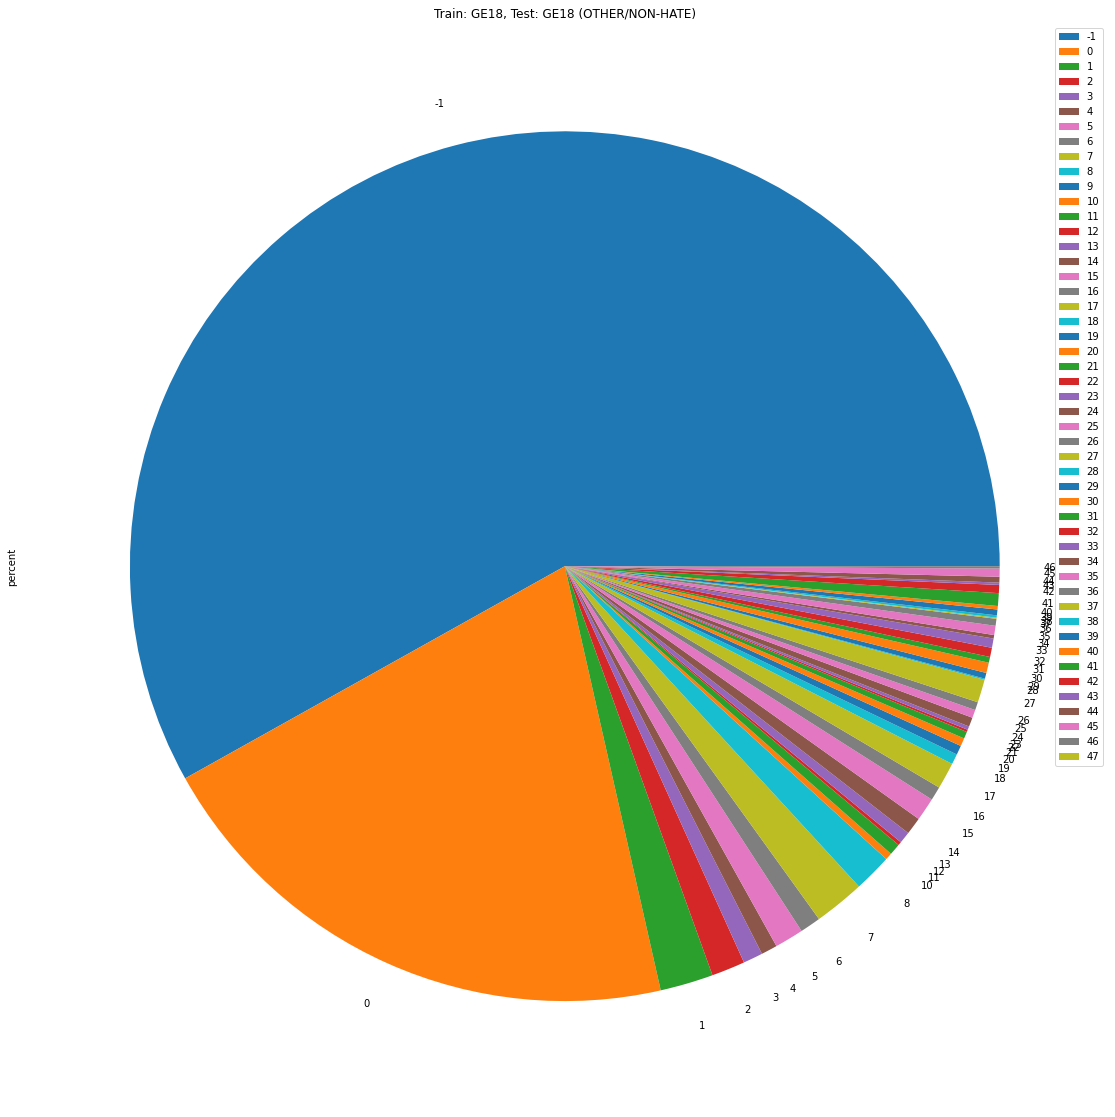

In [ ]:
plot = df_GE18_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: GE18, Test: GE18 (OTHER/NON-HATE)')


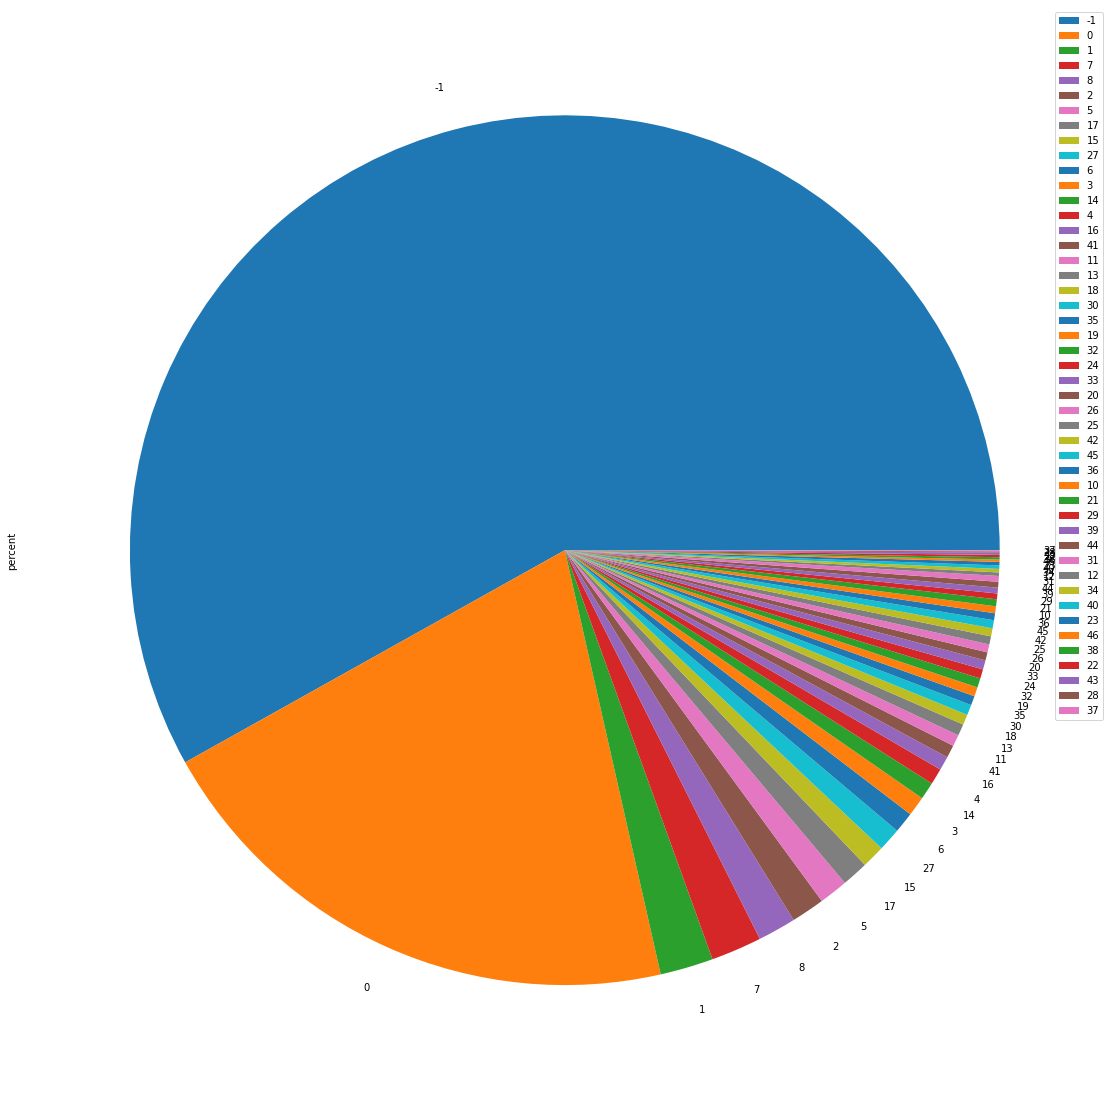

In [ ]:
plot = ge18_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### GE18_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OFFENSE'-Tweets


In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge18_test_offense = ge18_test_raw.loc[ge18_test_raw['OFF'] == 'OFFENSE']
ge18_test_offense


TWEET      OFF     CAT  pred
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE   ABUSE    12
9     @FeePatzer Frauen zu einem "Ja" zu überreden, ...  OFFENSE   ABUSE    -1
10    @IvyandWoe Ich weiß halt, wie man Frauen zum M...  OFFENSE   ABUSE     0
11     Liebe Freunde, Gauck,das Symbol des Sklaventums!  OFFENSE   ABUSE    -1
13    wen interessiert denn die Meinung des Außenmin...  OFFENSE  INSULT    -1
...                                                 ...      ...     ...   ...
3521  @UdoUlfkotte Hauptsache den Asylanten gehts ge...  OFFENSE   ABUSE    12
3525  @ThomasMichael71 @mountainman1977 @houelle_bec...  OFFENSE   ABUSE    41
3526  @SteinbachErika Ich finde AFD Wähler besser al...  OFFENSE  INSULT    24
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE   ABUSE    -1
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE   ABUSE    -1

[1202 rows x 4 columns]

In [ ]:
ge18_test_offense_pred_values = pd.DataFrame(ge18_test_offense['pred'].value_counts())
ge18_test_offense_pred_values['percent'] = (ge18_test_offense_pred_values['pred'] / ge18_test_offense_pred_values['pred'].sum()) * 100
ge18_test_offense_pred_values

pred    percent
-1    675  56.156406
 0    221  18.386023
 2     55   4.575707
 1     44   3.660566
 5     30   2.495840
 13    17   1.414309
 10    15   1.247920
 11    12   0.998336
 4     11   0.915141
 27    11   0.915141
 3     10   0.831947
 12     9   0.748752
 6      9   0.748752
 24     8   0.665557
 14     7   0.582363
 8      6   0.499168
 22     6   0.499168
 32     5   0.415973
 39     5   0.415973
 20     4   0.332779
 33     4   0.332779
 29     3   0.249584
 7      3   0.249584
 17     3   0.249584
 18     3   0.249584
 21     3   0.249584
 15     2   0.166389
 40     2   0.166389
 28     2   0.166389
 43     2   0.166389
 26     2   0.166389
 41     2   0.166389
 35     1   0.083195
 16     1   0.083195
 19     1   0.083195
 23     1   0.083195
 38     1   0.083195
 45     1   0.083195
 42     1   0.083195
 46     1   0.083195
 31     1   0.083195
 37     1   0.083195
 34     1   0.083195

In [ ]:
df1 =  train_ge18_model_topics[['Topic','Name']]
ge18_test_offense_pred_values['Topic'] = ge18_test_offense_pred_values.index
df2 = ge18_test_offense_pred_values
data_frames = [df1, df2]
df_GE18_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE18_OFFENSE_merged['percent'] = df_GE18_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_GE18_OFFENSE_merged['pred'] = df_GE18_OFFENSE_merged['pred'].astype(int)
df_GE18_OFFENSE_merged


Topic                                               Name  pred    percent
0      -1              -1_deutschland_immer_merkel_deutschen   675  56.156406
1       0            0_merkel_deutschland_deutschen_deutsche   221  18.386023
2       1             1_flüchtlinge_asylanten_asyl_migranten    44   3.660566
3       2                2_islam_moslems_muslimischen_moslem    55   4.575707
4       3          3_politiker_politik_politikern_demokratie    10   0.831947
5       4              4_medien_journalismus_propaganda_news    11   0.915141
6       5                            5_grünen_grüne_grün_rot    30   2.495840
7       6                   6_türkei_türken_türke_türkischen     9   0.748752
8       7                 7_tweet_twitter_facebook_retweeten     3   0.249584
9       8                       8_geld_zahlen_millionen_shop     6   0.499168
10      9             9_macmike_bka_gutachten_kugelschreiber     0   0.000000
11     10                    10_idioten_dumm_dummheit_dummen    15   1.247920
12     11               11_islam_moslems_europa_kindergärten    12   0.998336
13     12         12_flüchtlinge_italien_italiener_migranten     9   0.748752
14     13                    13_nazis_nazi_sprechen_neonazis    17   1.414309
15     14          14_israel_jerusalem_palästinenser_israels     7   0.582363
16     15                 15_neuwahlen_wähler_fdp_wahlsystem     2   0.166389
17     16                          16_bild_bilder_kunst_foto     1   0.083195
18     17             17_kirche_verrat_katholischen_religion     3   0.249584
19     18               18_syrien_afghanistan_syrer_afghanen     3   0.249584
20     19         19_spd_bundesparteitag_verhandlungen_union     1   0.083195
21     20              20_polizei_polizisten_banner_polizist     4   0.332779
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen     3   0.249584
23     22                   22_afrikaner_afrika_china_europa     6   0.499168
24     23                 23_russland_putins_russischen_nato     1   0.083195
25     24                   24_fresse_gegessen_mad_schnitzel     8   0.665557
26     25                      25_mord_märtyrer_töten_mörder     0   0.000000
27     26                  26_rainer_trinken_flaschen_wasser     2   0.166389
28     27   27_rassismus_rassisten_rassistischen_dargestellt    11   0.915141
29     28              28_türken_türkei_türkisch_jahrhundert     2   0.166389
30     29           29_terroristen_terror_unterstützung_dieb     3   0.249584
31     30               30_jahr_neujahrsempfang_ändern_happy     0   0.000000
32     31         31_kommunisten_linke_rebellion_kommunistin     1   0.083195
33     32                         32_nacht_abend_gute_lieben     5   0.415973
34     33                   33_krieg_nationen_kämpfer_truppe     4   0.332779
35     34                  34_waffen_panzer_raketen_munition     1   0.083195
36     35                     35_fahren_rnv_autobahnen_hause     1   0.083195
37     36      36_familiennachzug_familien_subsidiär_familie     0   0.000000
38     37                      37_sport_fußball_köln_abstieg     1   0.083195
39     38                38_geblockt_sofort_stunden_gesperrt     1   0.083195
40     39                       39_humor_witzig_satire_lacht     5   0.415973
41     40            40_regierung_regieren_gewählt_charakter     2   0.166389
42     41     41_antisemitismus_antisemitische_daher_artikel     2   0.166389
43     42  42_patriotismus_nationalismus_patriotisch_patriot     1   0.083195
44     43             43_jamaika_möglich_koalition_gespräche     2   0.166389
45     44              44_ausland_unsichere_hast_stromkosten     0   0.000000
46     45                   45_berlin_berliner_gipfel_ziehen     1   0.083195
47     46     46_steuerzahler_griechen_steuergelder_schulden     1   0.083195
48     47             47_katalonien_spanien_spaniens_brüssel     0   0.000000

In [ ]:
df_GE18_OFFENSE_sorted = df_GE18_OFFENSE_merged.sort_values('pred', ascending=False)
df_GE18_OFFENSE_sorted

Topic                                               Name  pred    percent
0      -1              -1_deutschland_immer_merkel_deutschen   675  56.156406
1       0            0_merkel_deutschland_deutschen_deutsche   221  18.386023
3       2                2_islam_moslems_muslimischen_moslem    55   4.575707
2       1             1_flüchtlinge_asylanten_asyl_migranten    44   3.660566
6       5                            5_grünen_grüne_grün_rot    30   2.495840
14     13                    13_nazis_nazi_sprechen_neonazis    17   1.414309
11     10                    10_idioten_dumm_dummheit_dummen    15   1.247920
12     11               11_islam_moslems_europa_kindergärten    12   0.998336
5       4              4_medien_journalismus_propaganda_news    11   0.915141
28     27   27_rassismus_rassisten_rassistischen_dargestellt    11   0.915141
4       3          3_politiker_politik_politikern_demokratie    10   0.831947
7       6                   6_türkei_türken_türke_türkischen     9   0.748752
13     12         12_flüchtlinge_italien_italiener_migranten     9   0.748752
25     24                   24_fresse_gegessen_mad_schnitzel     8   0.665557
15     14          14_israel_jerusalem_palästinenser_israels     7   0.582363
9       8                       8_geld_zahlen_millionen_shop     6   0.499168
23     22                   22_afrikaner_afrika_china_europa     6   0.499168
40     39                       39_humor_witzig_satire_lacht     5   0.415973
33     32                         32_nacht_abend_gute_lieben     5   0.415973
34     33                   33_krieg_nationen_kämpfer_truppe     4   0.332779
21     20              20_polizei_polizisten_banner_polizist     4   0.332779
30     29           29_terroristen_terror_unterstützung_dieb     3   0.249584
18     17             17_kirche_verrat_katholischen_religion     3   0.249584
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen     3   0.249584
19     18               18_syrien_afghanistan_syrer_afghanen     3   0.249584
8       7                 7_tweet_twitter_facebook_retweeten     3   0.249584
44     43             43_jamaika_möglich_koalition_gespräche     2   0.166389
27     26                  26_rainer_trinken_flaschen_wasser     2   0.166389
29     28              28_türken_türkei_türkisch_jahrhundert     2   0.166389
42     41     41_antisemitismus_antisemitische_daher_artikel     2   0.166389
41     40            40_regierung_regieren_gewählt_charakter     2   0.166389
16     15                 15_neuwahlen_wähler_fdp_wahlsystem     2   0.166389
43     42  42_patriotismus_nationalismus_patriotisch_patriot     1   0.083195
38     37                      37_sport_fußball_köln_abstieg     1   0.083195
46     45                   45_berlin_berliner_gipfel_ziehen     1   0.083195
47     46     46_steuerzahler_griechen_steuergelder_schulden     1   0.083195
39     38                38_geblockt_sofort_stunden_gesperrt     1   0.083195
24     23                 23_russland_putins_russischen_nato     1   0.083195
36     35                     35_fahren_rnv_autobahnen_hause     1   0.083195
35     34                  34_waffen_panzer_raketen_munition     1   0.083195
32     31         31_kommunisten_linke_rebellion_kommunistin     1   0.083195
20     19         19_spd_bundesparteitag_verhandlungen_union     1   0.083195
17     16                          16_bild_bilder_kunst_foto     1   0.083195
37     36      36_familiennachzug_familien_subsidiär_familie     0   0.000000
31     30               30_jahr_neujahrsempfang_ändern_happy     0   0.000000
26     25                      25_mord_märtyrer_töten_mörder     0   0.000000
45     44              44_ausland_unsichere_hast_stromkosten     0   0.000000
10      9             9_macmike_bka_gutachten_kugelschreiber     0   0.000000
48     47             47_katalonien_spanien_spaniens_brüssel     0   0.000000

In [ ]:
df_GE18_OFFENSE_merged_plt = df_GE18_OFFENSE_merged.set_index('Topic')


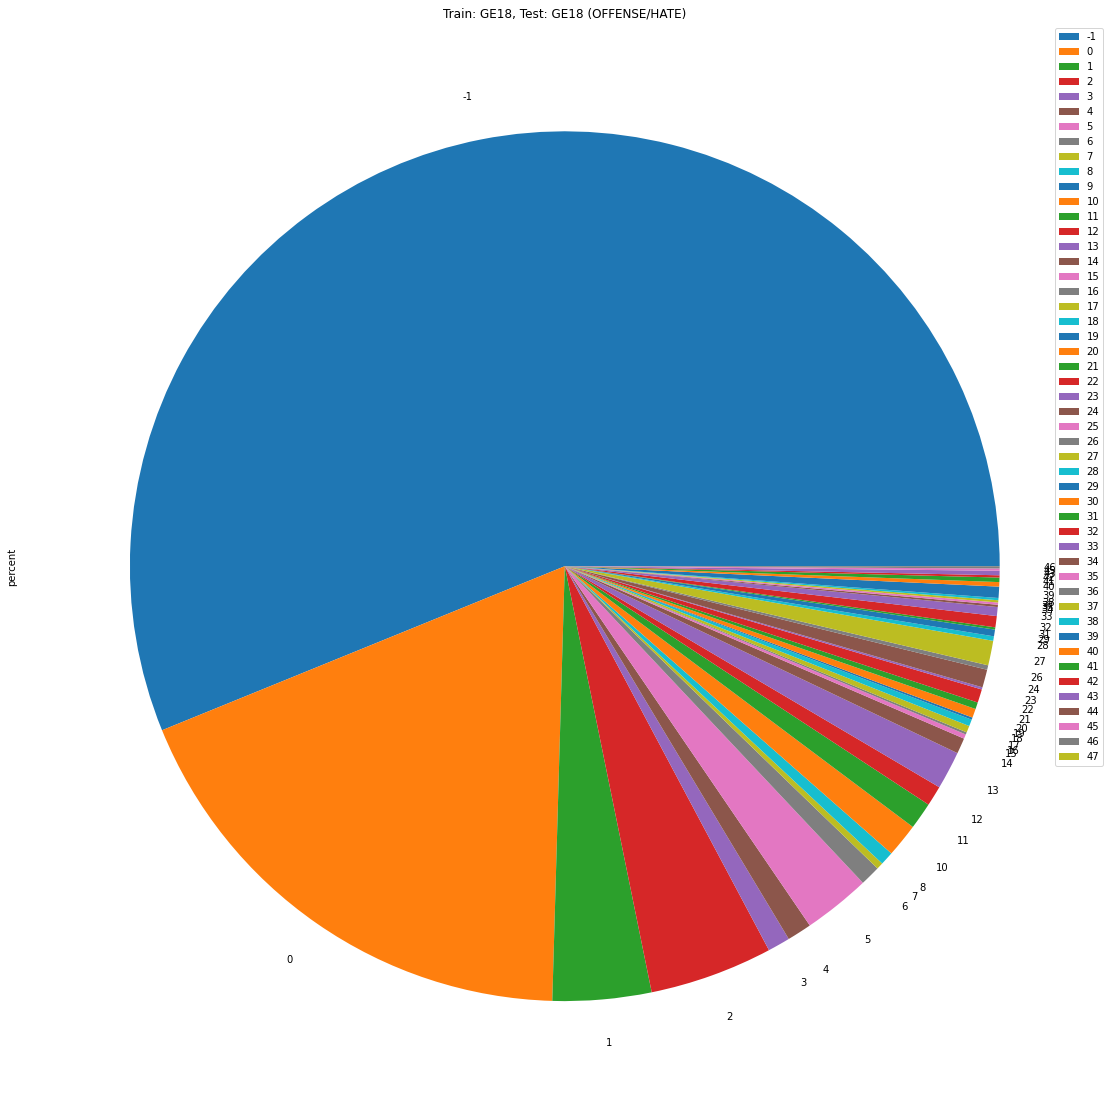

In [ ]:
plot = df_GE18_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: GE18, Test: GE18 (OFFENSE/HATE)')


In [ ]:
#plot = ge18_test_offense_pred_values.plot.pie(y='percent', figsize=(20, 20))


### GE19_Test

In [ ]:
ge19_test_raw['pred'] = train_ge18_pred_ge19[0]
ge19_test_raw

TWEET      OFF     CAT  pred
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE  INSULT    -1
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE   ABUSE    -1
2     @DLFNachrichten Die Gesichter, Namen, Religion...    OTHER   OTHER     0
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE   ABUSE    -1
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE   ABUSE    -1
...                                                 ...      ...     ...   ...
3026  Es fand aber nie eine Emanzipierungs-Phase der...    OTHER   OTHER     6
3027  Um es klar zu stellen: Ich will hier kein Whit...    OTHER   OTHER    -1
3028  Und dann habe ich da noch die McArthur-Briefe ...    OTHER   OTHER    -1
3029  al sehen wer der Ersatzmann wird. Hier könnte ...    OTHER   OTHER    -1
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...    OTHER   OTHER    -1

[3031 rows x 4 columns]

### GE19_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge19_test_other = ge19_test_raw.loc[ge19_test_raw['OFF'] == 'OTHER']
ge19_test_other


TWEET    OFF    CAT  pred
2     @DLFNachrichten Die Gesichter, Namen, Religion...  OTHER  OTHER     0
5     @aktuelle_stunde Also beim Fall Birmingham, En...  OTHER  OTHER    -1
6     @StZ_NEWS Aber bei läppischen 130.000 Euro der...  OTHER  OTHER    -1
12    @BR24 Wie viele werden durch Gas Unfälle getöt...  OTHER  OTHER    35
25    @TAG24LE Wenn sich Linke Linke zu Feinden mach...  OTHER  OTHER     0
...                                                 ...    ...    ...   ...
3026  Es fand aber nie eine Emanzipierungs-Phase der...  OTHER  OTHER     6
3027  Um es klar zu stellen: Ich will hier kein Whit...  OTHER  OTHER    -1
3028  Und dann habe ich da noch die McArthur-Briefe ...  OTHER  OTHER    -1
3029  al sehen wer der Ersatzmann wird. Hier könnte ...  OTHER  OTHER    -1
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...  OTHER  OTHER    -1

[2061 rows x 4 columns]

In [ ]:
ge19_test_other_pred_values = pd.DataFrame(ge19_test_other['pred'].value_counts())
ge19_test_other_pred_values['percent'] = (ge19_test_other_pred_values['pred'] / ge19_test_other_pred_values['pred'].sum()) * 100
ge19_test_other_pred_values

pred    percent
-1   1238  60.067928
 0    342  16.593886
 7     70   3.396410
 8     39   1.892285
 31    31   1.504124
 13    22   1.067443
 1     22   1.067443
 14    21   1.018923
 27    19   0.921883
 3     17   0.824842
 44    17   0.824842
 26    17   0.824842
 4     15   0.727802
 16    14   0.679282
 2     14   0.679282
 24    13   0.630762
 39    12   0.582242
 20    11   0.533721
 6     10   0.485201
 15    10   0.485201
 35     9   0.436681
 41     8   0.388161
 33     7   0.339641
 32     7   0.339641
 23     6   0.291121
 10     6   0.291121
 29     6   0.291121
 25     6   0.291121
 19     5   0.242601
 9      5   0.242601
 12     5   0.242601
 42     4   0.194081
 34     4   0.194081
 11     4   0.194081
 5      4   0.194081
 38     3   0.145560
 36     3   0.145560
 18     3   0.145560
 30     3   0.145560
 46     2   0.097040
 40     2   0.097040
 22     2   0.097040
 17     1   0.048520
 21     1   0.048520
 45     1   0.048520

In [ ]:
df1 =  train_ge18_model_topics[['Topic','Name']]
ge19_test_other_pred_values['Topic'] = ge19_test_other_pred_values.index
df2 = ge19_test_other_pred_values
data_frames = [df1, df2]
df_GE19_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE19_OTHER_merged['percent'] = df_GE19_OTHER_merged['percent'].astype(float)

In [ ]:
df_GE19_OTHER_merged['pred'] = df_GE19_OTHER_merged['pred'].astype(int)

In [ ]:
df_GE19_OTHER_sorted = df_GE19_OTHER_merged.sort_values('pred', ascending=False)
df_GE19_OTHER_sorted

Topic                                               Name  pred    percent
0      -1              -1_deutschland_immer_merkel_deutschen  1238  60.067928
1       0            0_merkel_deutschland_deutschen_deutsche   342  16.593886
8       7                 7_tweet_twitter_facebook_retweeten    70   3.396410
9       8                       8_geld_zahlen_millionen_shop    39   1.892285
32     31         31_kommunisten_linke_rebellion_kommunistin    31   1.504124
2       1             1_flüchtlinge_asylanten_asyl_migranten    22   1.067443
14     13                    13_nazis_nazi_sprechen_neonazis    22   1.067443
15     14          14_israel_jerusalem_palästinenser_israels    21   1.018923
28     27   27_rassismus_rassisten_rassistischen_dargestellt    19   0.921883
4       3          3_politiker_politik_politikern_demokratie    17   0.824842
45     44              44_ausland_unsichere_hast_stromkosten    17   0.824842
27     26                  26_rainer_trinken_flaschen_wasser    17   0.824842
5       4              4_medien_journalismus_propaganda_news    15   0.727802
3       2                2_islam_moslems_muslimischen_moslem    14   0.679282
17     16                          16_bild_bilder_kunst_foto    14   0.679282
25     24                   24_fresse_gegessen_mad_schnitzel    13   0.630762
40     39                       39_humor_witzig_satire_lacht    12   0.582242
21     20              20_polizei_polizisten_banner_polizist    11   0.533721
16     15                 15_neuwahlen_wähler_fdp_wahlsystem    10   0.485201
7       6                   6_türkei_türken_türke_türkischen    10   0.485201
36     35                     35_fahren_rnv_autobahnen_hause     9   0.436681
42     41     41_antisemitismus_antisemitische_daher_artikel     8   0.388161
33     32                         32_nacht_abend_gute_lieben     7   0.339641
34     33                   33_krieg_nationen_kämpfer_truppe     7   0.339641
26     25                      25_mord_märtyrer_töten_mörder     6   0.291121
30     29           29_terroristen_terror_unterstützung_dieb     6   0.291121
24     23                 23_russland_putins_russischen_nato     6   0.291121
11     10                    10_idioten_dumm_dummheit_dummen     6   0.291121
20     19         19_spd_bundesparteitag_verhandlungen_union     5   0.242601
10      9             9_macmike_bka_gutachten_kugelschreiber     5   0.242601
13     12         12_flüchtlinge_italien_italiener_migranten     5   0.242601
12     11               11_islam_moslems_europa_kindergärten     4   0.194081
43     42  42_patriotismus_nationalismus_patriotisch_patriot     4   0.194081
35     34                  34_waffen_panzer_raketen_munition     4   0.194081
6       5                            5_grünen_grüne_grün_rot     4   0.194081
31     30               30_jahr_neujahrsempfang_ändern_happy     3   0.145560
19     18               18_syrien_afghanistan_syrer_afghanen     3   0.145560
37     36      36_familiennachzug_familien_subsidiär_familie     3   0.145560
39     38                38_geblockt_sofort_stunden_gesperrt     3   0.145560
41     40            40_regierung_regieren_gewählt_charakter     2   0.097040
23     22                   22_afrikaner_afrika_china_europa     2   0.097040
47     46     46_steuerzahler_griechen_steuergelder_schulden     2   0.097040
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen     1   0.048520
18     17             17_kirche_verrat_katholischen_religion     1   0.048520
46     45                   45_berlin_berliner_gipfel_ziehen     1   0.048520
38     37                      37_sport_fußball_köln_abstieg     0   0.000000
44     43             43_jamaika_möglich_koalition_gespräche     0   0.000000
29     28              28_türken_türkei_türkisch_jahrhundert     0   0.000000
48     47             47_katalonien_spanien_spaniens_brüssel     0   0.000000

In [ ]:
df_GE19_OTHER_merged_plt = df_GE19_OTHER_merged.set_index('Topic')


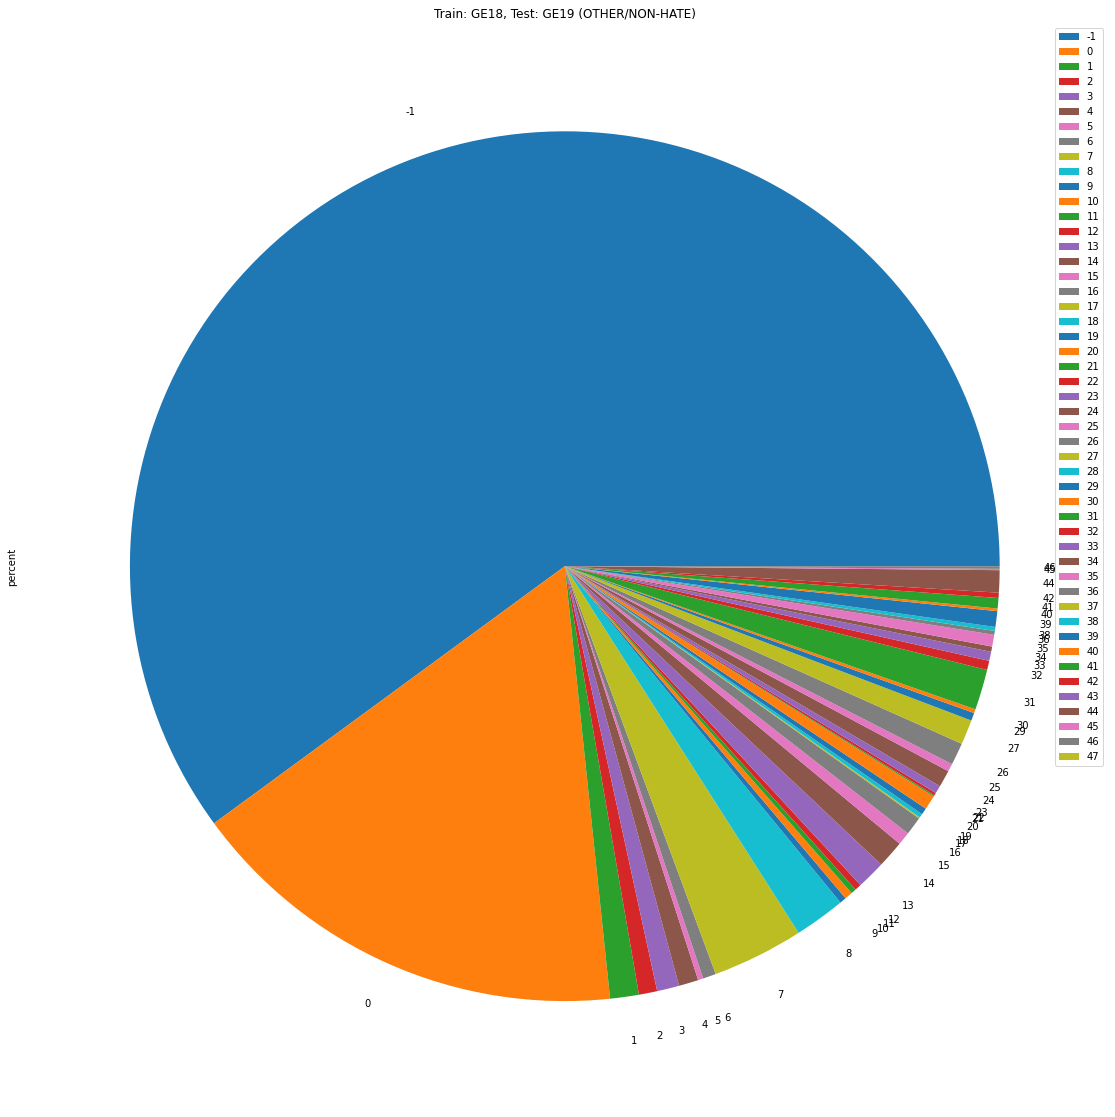

In [ ]:
plot = df_GE19_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: GE18, Test: GE19 (OTHER/NON-HATE)')


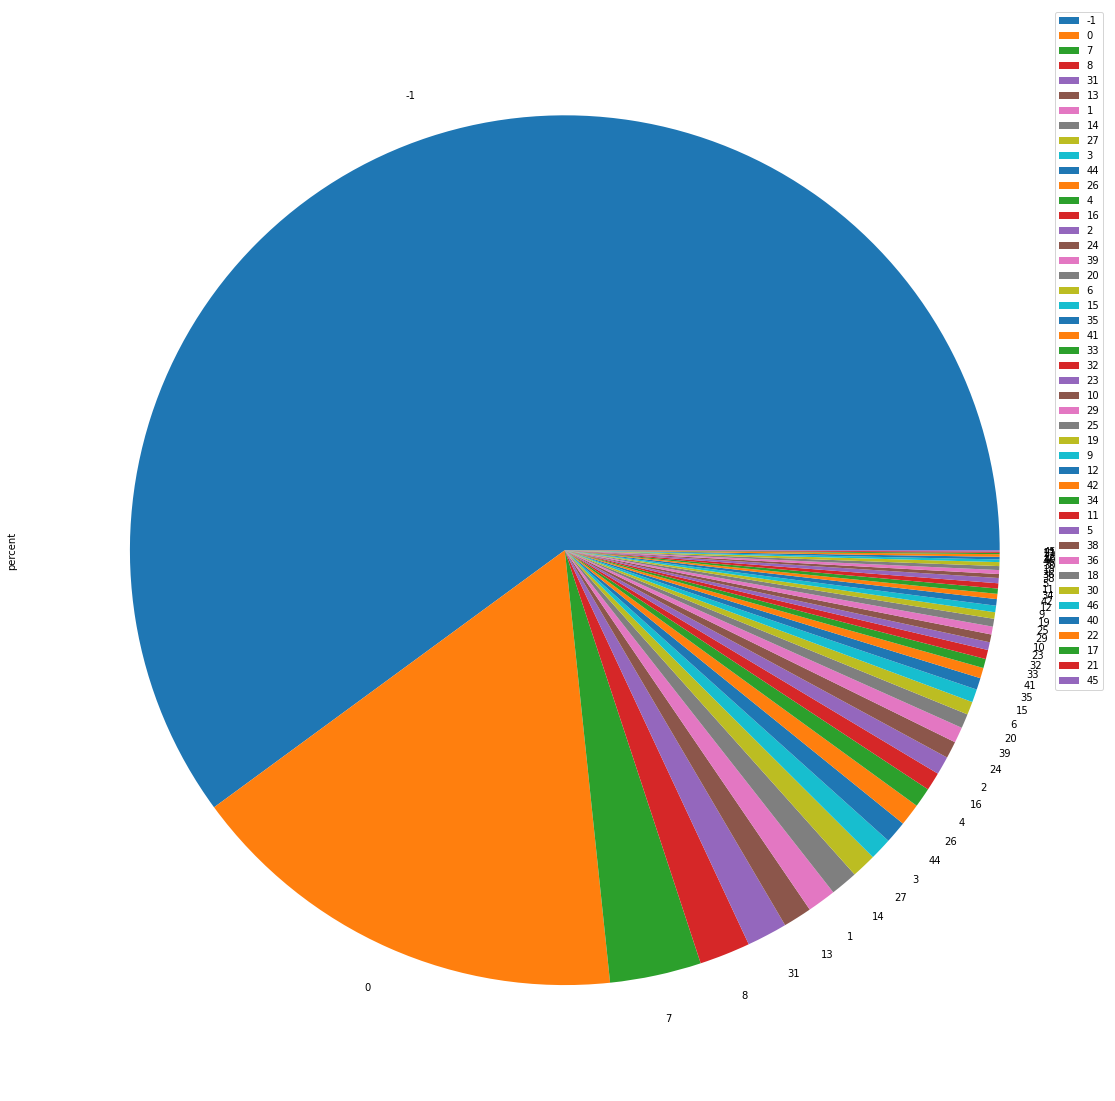

In [ ]:
plot = ge19_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### GE19_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OFFENSE'-Tweets


In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
ge19_test_offense = ge19_test_raw.loc[ge19_test_raw['OFF'] == 'OFFENSE']
ge19_test_offense


TWEET      OFF        CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE     INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE      ABUSE   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE      ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE      ABUSE   
7     @StZ_NEWS Schäuble wird wissen woher dieses Na...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
2889  Diese sogenannten Aktivisten sind Straftäter d...  OFFENSE      ABUSE   
2949    #Erdogan ist einfach eine Pest für die #Türkei.  OFFENSE     INSULT   
2976  @sixtus Irgend so ein charakterloser brauner M...  OFFENSE     INSULT   
2978  Das mag dem einen oder anderen harsch vorkomme...  OFFENSE     INSULT   
2988  Ich frage mich mittlerweile was Saudi Arabien ...  OFFENSE  PROFANITY   

      pred  
0       -1  
1       -1  
3       -1  
4       -1  
7       13  
...    ...  
2889    -1  
2949     6  
2976    24  
2978    -1  
2988    -1  

[970 rows x 4 columns]

In [ ]:
ge19_test_offense_pred_values = pd.DataFrame(ge19_test_offense['pred'].value_counts())
ge19_test_offense_pred_values['percent'] = (ge19_test_offense_pred_values['pred'] / ge19_test_offense_pred_values['pred'].sum()) * 100
ge19_test_offense_pred_values

pred    percent
-1    585  60.309278
 0    108  11.134021
 13    30   3.092784
 10    25   2.577320
 1     23   2.371134
 2     15   1.546392
 4     15   1.546392
 5     13   1.340206
 14    12   1.237113
 24    11   1.134021
 31    11   1.134021
 7     11   1.134021
 8      9   0.927835
 3      8   0.824742
 11     7   0.721649
 21     7   0.721649
 20     7   0.721649
 27     7   0.721649
 41     6   0.618557
 16     6   0.618557
 29     6   0.618557
 39     5   0.515464
 22     5   0.515464
 12     4   0.412371
 25     4   0.412371
 23     3   0.309278
 15     3   0.309278
 34     3   0.309278
 19     3   0.309278
 9      2   0.206186
 18     2   0.206186
 28     2   0.206186
 6      2   0.206186
 46     2   0.206186
 36     1   0.103093
 38     1   0.103093
 17     1   0.103093
 40     1   0.103093
 45     1   0.103093
 35     1   0.103093
 26     1   0.103093
 37     1   0.103093

In [ ]:
df1 =  train_ge18_model_topics[['Topic','Name']]
ge19_test_offense_pred_values['Topic'] = ge19_test_offense_pred_values.index
df2 = ge19_test_offense_pred_values
data_frames = [df1, df2]
df_GE19_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_GE19_OFFENSE_merged['percent'] = df_GE19_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_GE19_OFFENSE_merged['pred'] = df_GE19_OFFENSE_merged['pred'].astype(int)
df_GE19_OFFENSE_merged


Topic                                               Name  pred    percent
0      -1              -1_deutschland_immer_merkel_deutschen   585  60.309278
1       0            0_merkel_deutschland_deutschen_deutsche   108  11.134021
2       1             1_flüchtlinge_asylanten_asyl_migranten    23   2.371134
3       2                2_islam_moslems_muslimischen_moslem    15   1.546392
4       3          3_politiker_politik_politikern_demokratie     8   0.824742
5       4              4_medien_journalismus_propaganda_news    15   1.546392
6       5                            5_grünen_grüne_grün_rot    13   1.340206
7       6                   6_türkei_türken_türke_türkischen     2   0.206186
8       7                 7_tweet_twitter_facebook_retweeten    11   1.134021
9       8                       8_geld_zahlen_millionen_shop     9   0.927835
10      9             9_macmike_bka_gutachten_kugelschreiber     2   0.206186
11     10                    10_idioten_dumm_dummheit_dummen    25   2.577320
12     11               11_islam_moslems_europa_kindergärten     7   0.721649
13     12         12_flüchtlinge_italien_italiener_migranten     4   0.412371
14     13                    13_nazis_nazi_sprechen_neonazis    30   3.092784
15     14          14_israel_jerusalem_palästinenser_israels    12   1.237113
16     15                 15_neuwahlen_wähler_fdp_wahlsystem     3   0.309278
17     16                          16_bild_bilder_kunst_foto     6   0.618557
18     17             17_kirche_verrat_katholischen_religion     1   0.103093
19     18               18_syrien_afghanistan_syrer_afghanen     2   0.206186
20     19         19_spd_bundesparteitag_verhandlungen_union     3   0.309278
21     20              20_polizei_polizisten_banner_polizist     7   0.721649
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen     7   0.721649
23     22                   22_afrikaner_afrika_china_europa     5   0.515464
24     23                 23_russland_putins_russischen_nato     3   0.309278
25     24                   24_fresse_gegessen_mad_schnitzel    11   1.134021
26     25                      25_mord_märtyrer_töten_mörder     4   0.412371
27     26                  26_rainer_trinken_flaschen_wasser     1   0.103093
28     27   27_rassismus_rassisten_rassistischen_dargestellt     7   0.721649
29     28              28_türken_türkei_türkisch_jahrhundert     2   0.206186
30     29           29_terroristen_terror_unterstützung_dieb     6   0.618557
31     30               30_jahr_neujahrsempfang_ändern_happy     0   0.000000
32     31         31_kommunisten_linke_rebellion_kommunistin    11   1.134021
33     32                         32_nacht_abend_gute_lieben     0   0.000000
34     33                   33_krieg_nationen_kämpfer_truppe     0   0.000000
35     34                  34_waffen_panzer_raketen_munition     3   0.309278
36     35                     35_fahren_rnv_autobahnen_hause     1   0.103093
37     36      36_familiennachzug_familien_subsidiär_familie     1   0.103093
38     37                      37_sport_fußball_köln_abstieg     1   0.103093
39     38                38_geblockt_sofort_stunden_gesperrt     1   0.103093
40     39                       39_humor_witzig_satire_lacht     5   0.515464
41     40            40_regierung_regieren_gewählt_charakter     1   0.103093
42     41     41_antisemitismus_antisemitische_daher_artikel     6   0.618557
43     42  42_patriotismus_nationalismus_patriotisch_patriot     0   0.000000
44     43             43_jamaika_möglich_koalition_gespräche     0   0.000000
45     44              44_ausland_unsichere_hast_stromkosten     0   0.000000
46     45                   45_berlin_berliner_gipfel_ziehen     1   0.103093
47     46     46_steuerzahler_griechen_steuergelder_schulden     2   0.206186
48     47             47_katalonien_spanien_spaniens_brüssel     0   0.000000

In [ ]:
df_GE19_OFFENSE_sorted = df_GE19_OFFENSE_merged.sort_values('pred', ascending=False)
df_GE19_OFFENSE_sorted

Topic                                               Name  pred    percent
0      -1              -1_deutschland_immer_merkel_deutschen   585  60.309278
1       0            0_merkel_deutschland_deutschen_deutsche   108  11.134021
14     13                    13_nazis_nazi_sprechen_neonazis    30   3.092784
11     10                    10_idioten_dumm_dummheit_dummen    25   2.577320
2       1             1_flüchtlinge_asylanten_asyl_migranten    23   2.371134
3       2                2_islam_moslems_muslimischen_moslem    15   1.546392
5       4              4_medien_journalismus_propaganda_news    15   1.546392
6       5                            5_grünen_grüne_grün_rot    13   1.340206
15     14          14_israel_jerusalem_palästinenser_israels    12   1.237113
32     31         31_kommunisten_linke_rebellion_kommunistin    11   1.134021
25     24                   24_fresse_gegessen_mad_schnitzel    11   1.134021
8       7                 7_tweet_twitter_facebook_retweeten    11   1.134021
9       8                       8_geld_zahlen_millionen_shop     9   0.927835
4       3          3_politiker_politik_politikern_demokratie     8   0.824742
12     11               11_islam_moslems_europa_kindergärten     7   0.721649
28     27   27_rassismus_rassisten_rassistischen_dargestellt     7   0.721649
21     20              20_polizei_polizisten_banner_polizist     7   0.721649
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen     7   0.721649
17     16                          16_bild_bilder_kunst_foto     6   0.618557
42     41     41_antisemitismus_antisemitische_daher_artikel     6   0.618557
30     29           29_terroristen_terror_unterstützung_dieb     6   0.618557
40     39                       39_humor_witzig_satire_lacht     5   0.515464
23     22                   22_afrikaner_afrika_china_europa     5   0.515464
26     25                      25_mord_märtyrer_töten_mörder     4   0.412371
13     12         12_flüchtlinge_italien_italiener_migranten     4   0.412371
35     34                  34_waffen_panzer_raketen_munition     3   0.309278
24     23                 23_russland_putins_russischen_nato     3   0.309278
20     19         19_spd_bundesparteitag_verhandlungen_union     3   0.309278
16     15                 15_neuwahlen_wähler_fdp_wahlsystem     3   0.309278
29     28              28_türken_türkei_türkisch_jahrhundert     2   0.206186
19     18               18_syrien_afghanistan_syrer_afghanen     2   0.206186
47     46     46_steuerzahler_griechen_steuergelder_schulden     2   0.206186
7       6                   6_türkei_türken_türke_türkischen     2   0.206186
10      9             9_macmike_bka_gutachten_kugelschreiber     2   0.206186
27     26                  26_rainer_trinken_flaschen_wasser     1   0.103093
46     45                   45_berlin_berliner_gipfel_ziehen     1   0.103093
41     40            40_regierung_regieren_gewählt_charakter     1   0.103093
39     38                38_geblockt_sofort_stunden_gesperrt     1   0.103093
38     37                      37_sport_fußball_köln_abstieg     1   0.103093
37     36      36_familiennachzug_familien_subsidiär_familie     1   0.103093
36     35                     35_fahren_rnv_autobahnen_hause     1   0.103093
18     17             17_kirche_verrat_katholischen_religion     1   0.103093
34     33                   33_krieg_nationen_kämpfer_truppe     0   0.000000
33     32                         32_nacht_abend_gute_lieben     0   0.000000
43     42  42_patriotismus_nationalismus_patriotisch_patriot     0   0.000000
44     43             43_jamaika_möglich_koalition_gespräche     0   0.000000
45     44              44_ausland_unsichere_hast_stromkosten     0   0.000000
31     30               30_jahr_neujahrsempfang_ändern_happy     0   0.000000
48     47             47_katalonien_spanien_spaniens_brüssel     0   0.000000

In [ ]:
df_GE19_OFFENSE_merged_plt = df_GE19_OFFENSE_merged.set_index('Topic')


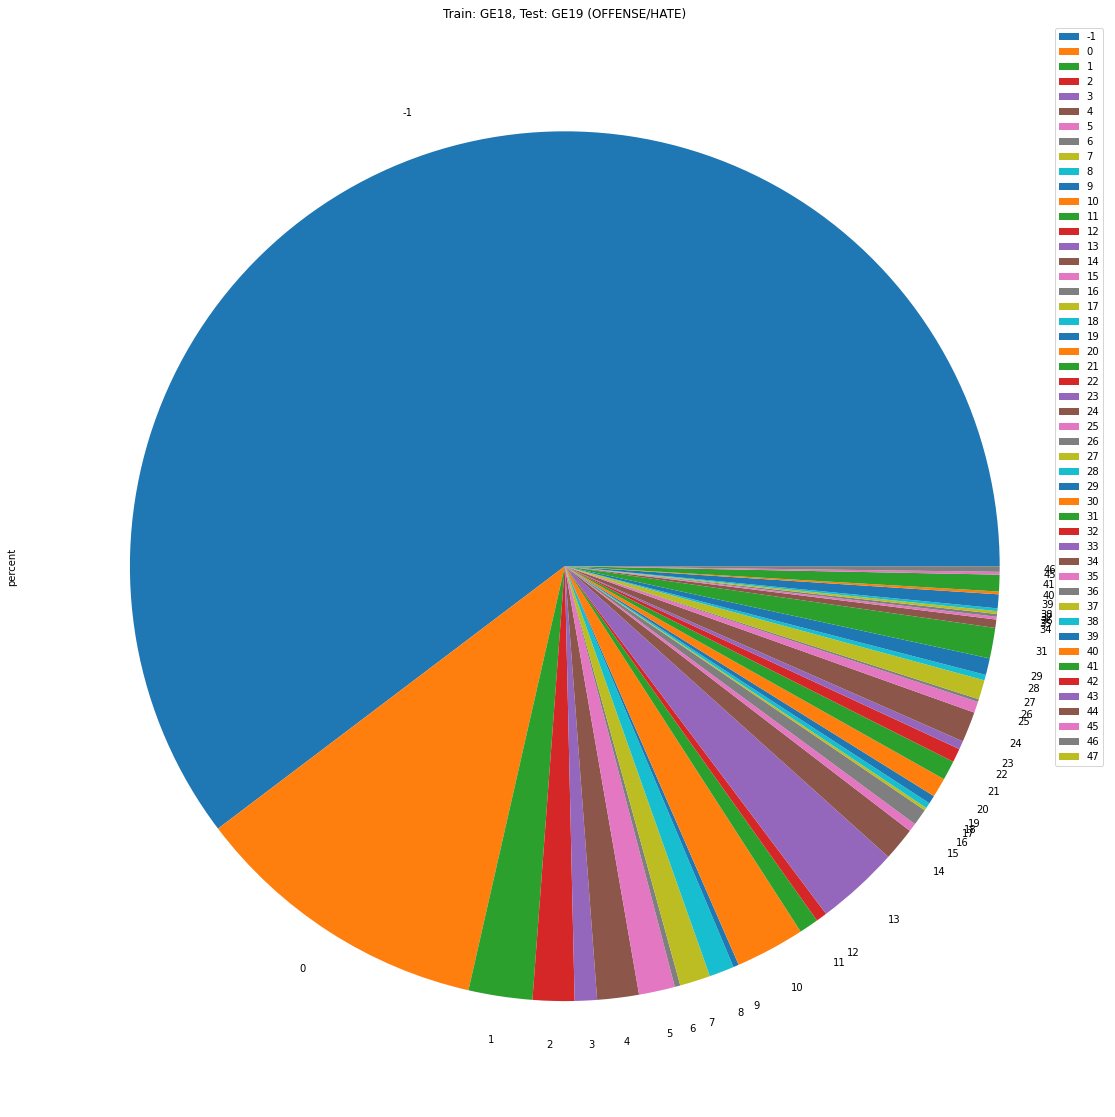

In [ ]:
plot = df_GE19_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: GE18, Test: GE19 (OFFENSE/HATE)')


In [ ]:
#plot = ge19_test_offense_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H19_Test

In [ ]:
h19_test_raw['pred'] = train_ge18_pred_h19[0]
h19_test_raw

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
..             ...                                                ...    ...   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  
0     HATE    -1  
1     NONE    -1  
2     NONE     0  
3     OFFN    -1  
4     OFFN    -1  
..     ...   ...  
845   OFFN    -1  
846   OFFN    24  
847   OFFN    -1  
848   OFFN    -1  
849   NONE     0  

[850 rows x 5 columns]

### H19_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h19_test_other = h19_test_raw.loc[h19_test_raw['task_1'] == 'NOT']
h19_test_other


text_id                                               text task_1  \
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
7    hasoc_de_5277  Und genau das macht er und lässt sich Scheiden...    NOT   
8    hasoc_de_5278  Dann wird das Konto gesperrt und Du musst wied...    NOT   
9    hasoc_de_5279         Dann bleib Single! https://t.co/TOP0spaU01    NOT   
..             ...                                                ...    ...   
837  hasoc_de_6107  @Uwe_Junge_MdL @Beatrix_vStorch  @lsvd  @Nicol...    NOT   
838  hasoc_de_6108  @Uwe_Junge_MdL Ihr streitet es zwar immer ab, ...    NOT   
839  hasoc_de_6109  @Uwe_Junge_MdL Oh die AFD als Vertreter der Ho...    NOT   
840  hasoc_de_6110                                   @Uwe_Junge_MdL 🤣    NOT   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  
1     NONE    -1  
2     NONE     0  
7     NONE    -1  
8     NONE    -1  
9     NONE     0  
..     ...   ...  
837   NONE    -1  
838   NONE    -1  
839   NONE     0  
840   NONE     0  
849   NONE     0  

[714 rows x 5 columns]

In [ ]:
h19_test_other_pred_values = pd.DataFrame(h19_test_other['pred'].value_counts())
h19_test_other_pred_values['percent'] = (h19_test_other_pred_values['pred'] / h19_test_other_pred_values['pred'].sum()) * 100
h19_test_other_pred_values

pred    percent
-1    367  51.400560
 0    157  21.988796
 1     34   4.761905
 8     15   2.100840
 7     12   1.680672
 2     12   1.680672
 5      9   1.260504
 23     8   1.120448
 12     7   0.980392
 13     7   0.980392
 46     7   0.980392
 3      7   0.980392
 4      6   0.840336
 31     5   0.700280
 15     5   0.700280
 22     4   0.560224
 26     4   0.560224
 20     4   0.560224
 18     4   0.560224
 44     4   0.560224
 35     3   0.420168
 25     3   0.420168
 24     3   0.420168
 21     3   0.420168
 6      3   0.420168
 30     3   0.420168
 16     2   0.280112
 19     2   0.280112
 10     2   0.280112
 11     2   0.280112
 43     2   0.280112
 27     2   0.280112
 17     1   0.140056
 40     1   0.140056
 34     1   0.140056
 14     1   0.140056
 39     1   0.140056
 45     1   0.140056

In [ ]:
df1 =  train_ge18_model_topics[['Topic','Name']]
h19_test_other_pred_values['Topic'] = h19_test_other_pred_values.index
df2 = h19_test_other_pred_values
data_frames = [df1, df2]
df_H19_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H19_OTHER_merged['percent'] = df_H19_OTHER_merged['percent'].astype(float)

In [ ]:
df_H19_OTHER_merged['pred'] = df_H19_OTHER_merged['pred'].astype(int)

In [ ]:
df_H19_OTHER_sorted = df_H19_OTHER_merged.sort_values('pred', ascending=False)
df_H19_OTHER_sorted

Topic                                               Name  pred    percent
0      -1              -1_deutschland_immer_merkel_deutschen   367  51.400560
1       0            0_merkel_deutschland_deutschen_deutsche   157  21.988796
2       1             1_flüchtlinge_asylanten_asyl_migranten    34   4.761905
9       8                       8_geld_zahlen_millionen_shop    15   2.100840
8       7                 7_tweet_twitter_facebook_retweeten    12   1.680672
3       2                2_islam_moslems_muslimischen_moslem    12   1.680672
6       5                            5_grünen_grüne_grün_rot     9   1.260504
24     23                 23_russland_putins_russischen_nato     8   1.120448
47     46     46_steuerzahler_griechen_steuergelder_schulden     7   0.980392
13     12         12_flüchtlinge_italien_italiener_migranten     7   0.980392
14     13                    13_nazis_nazi_sprechen_neonazis     7   0.980392
4       3          3_politiker_politik_politikern_demokratie     7   0.980392
5       4              4_medien_journalismus_propaganda_news     6   0.840336
32     31         31_kommunisten_linke_rebellion_kommunistin     5   0.700280
16     15                 15_neuwahlen_wähler_fdp_wahlsystem     5   0.700280
45     44              44_ausland_unsichere_hast_stromkosten     4   0.560224
27     26                  26_rainer_trinken_flaschen_wasser     4   0.560224
23     22                   22_afrikaner_afrika_china_europa     4   0.560224
19     18               18_syrien_afghanistan_syrer_afghanen     4   0.560224
21     20              20_polizei_polizisten_banner_polizist     4   0.560224
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen     3   0.420168
25     24                   24_fresse_gegessen_mad_schnitzel     3   0.420168
7       6                   6_türkei_türken_türke_türkischen     3   0.420168
31     30               30_jahr_neujahrsempfang_ändern_happy     3   0.420168
36     35                     35_fahren_rnv_autobahnen_hause     3   0.420168
26     25                      25_mord_märtyrer_töten_mörder     3   0.420168
44     43             43_jamaika_möglich_koalition_gespräche     2   0.280112
28     27   27_rassismus_rassisten_rassistischen_dargestellt     2   0.280112
20     19         19_spd_bundesparteitag_verhandlungen_union     2   0.280112
17     16                          16_bild_bilder_kunst_foto     2   0.280112
11     10                    10_idioten_dumm_dummheit_dummen     2   0.280112
12     11               11_islam_moslems_europa_kindergärten     2   0.280112
41     40            40_regierung_regieren_gewählt_charakter     1   0.140056
18     17             17_kirche_verrat_katholischen_religion     1   0.140056
46     45                   45_berlin_berliner_gipfel_ziehen     1   0.140056
35     34                  34_waffen_panzer_raketen_munition     1   0.140056
15     14          14_israel_jerusalem_palästinenser_israels     1   0.140056
40     39                       39_humor_witzig_satire_lacht     1   0.140056
10      9             9_macmike_bka_gutachten_kugelschreiber     0   0.000000
43     42  42_patriotismus_nationalismus_patriotisch_patriot     0   0.000000
42     41     41_antisemitismus_antisemitische_daher_artikel     0   0.000000
38     37                      37_sport_fußball_köln_abstieg     0   0.000000
39     38                38_geblockt_sofort_stunden_gesperrt     0   0.000000
29     28              28_türken_türkei_türkisch_jahrhundert     0   0.000000
37     36      36_familiennachzug_familien_subsidiär_familie     0   0.000000
34     33                   33_krieg_nationen_kämpfer_truppe     0   0.000000
33     32                         32_nacht_abend_gute_lieben     0   0.000000
30     29           29_terroristen_terror_unterstützung_dieb     0   0.000000
48     47             47_katalonien_spanien_spaniens_brüssel     0   0.000000

In [ ]:
df_H19_OTHER_merged_plt = df_H19_OTHER_merged.set_index('Topic')


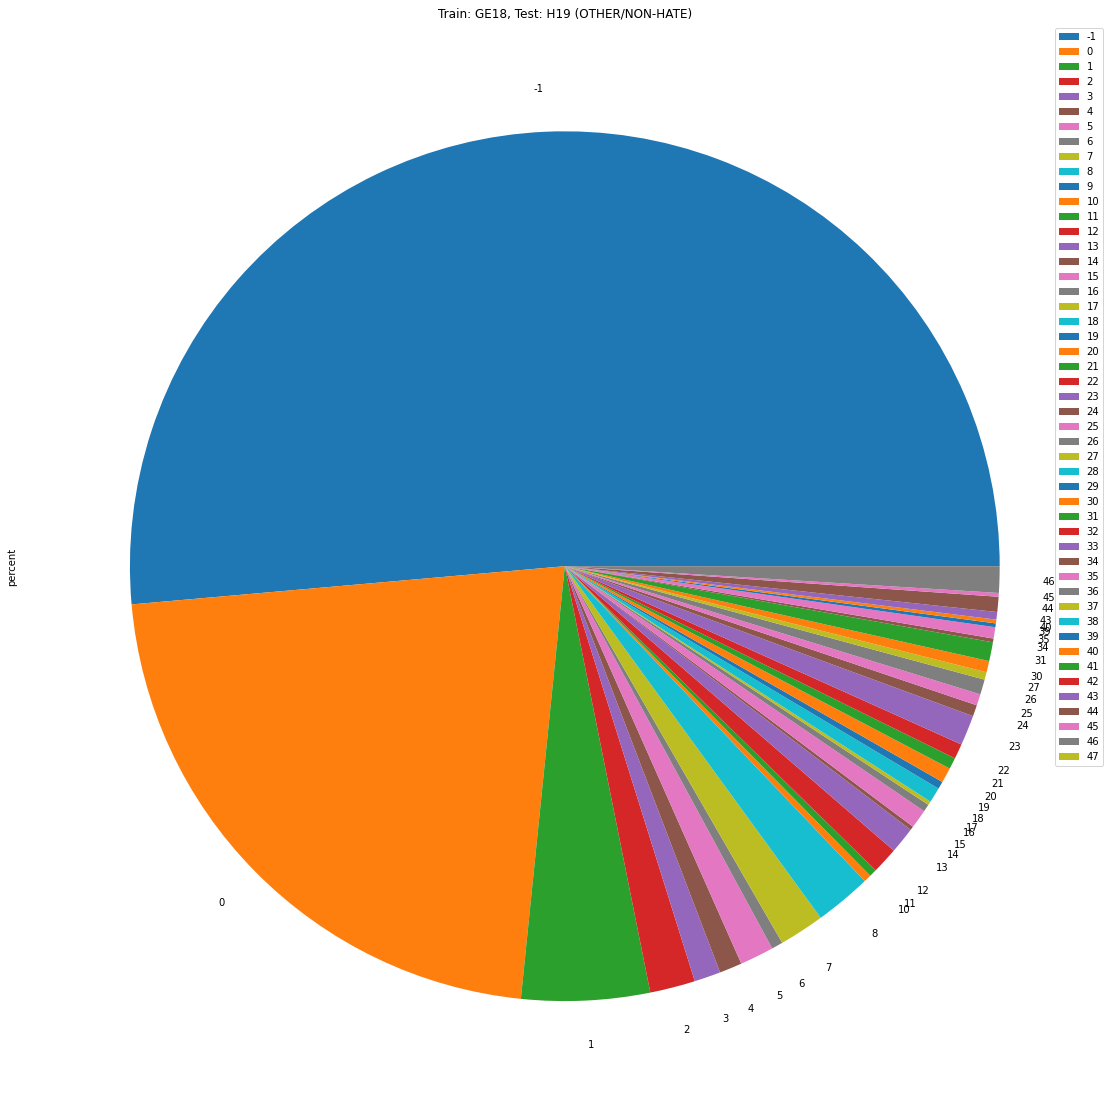

In [ ]:
plot = df_H19_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: GE18, Test: H19 (OTHER/NON-HATE)')


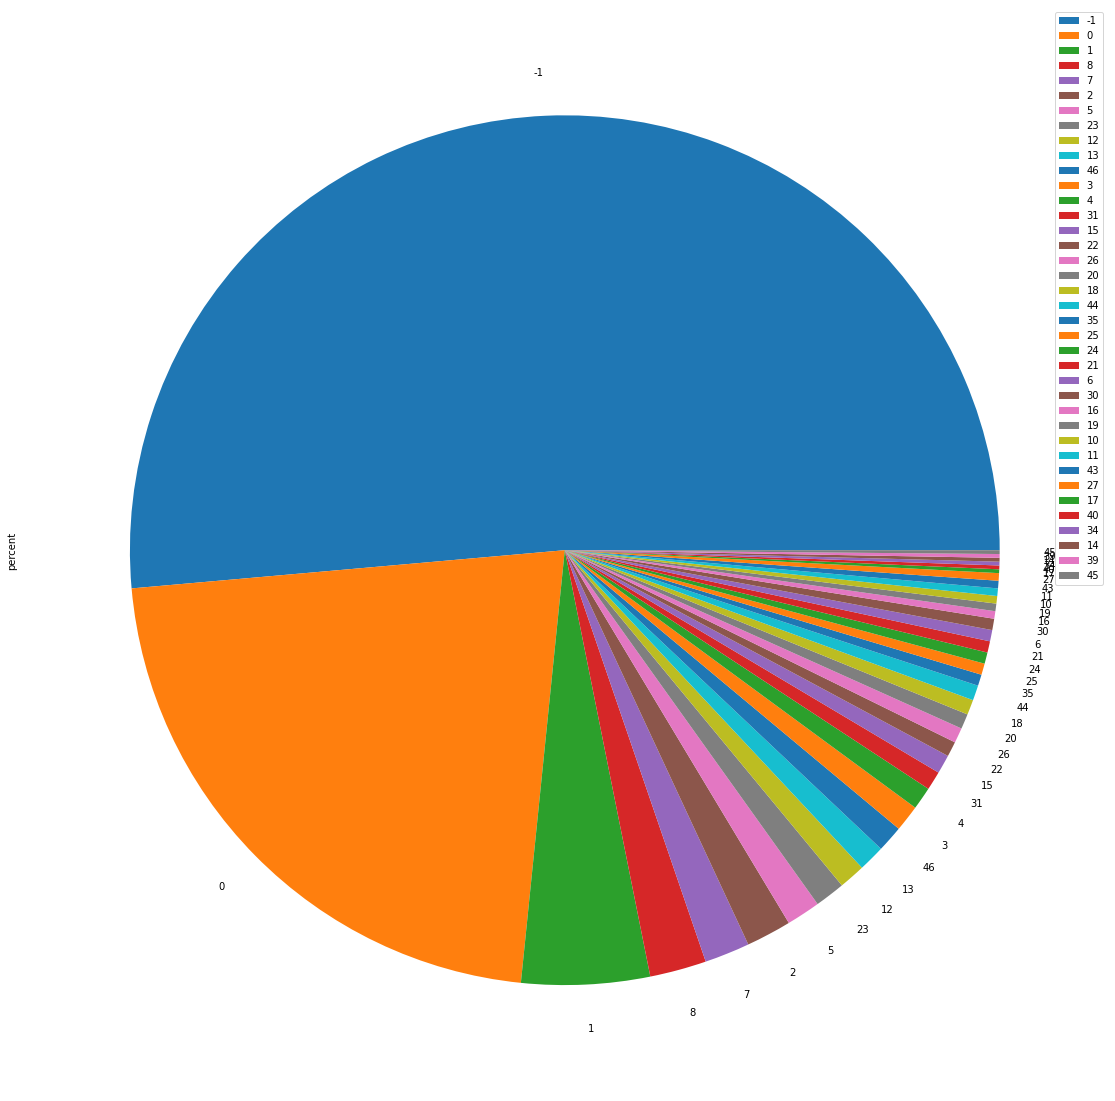

In [ ]:
plot = h19_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H19_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OFFENSE'-Tweets


In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h19_test_offense = h19_test_raw.loc[h19_test_raw['task_1'] == 'HOF']
h19_test_offense


text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
5    hasoc_de_5275  #Bundeswehr  erst überzeugen Politische Linke,...    HOF   
6    hasoc_de_5276  Du bist ein Rassist,Du erhöhst Dich über ander...    HOF   
..             ...                                                ...    ...   
844  hasoc_de_6114  Der/die/das große E ruft seine Mops wegen Unta...    HOF   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   

    task_2  pred  
0     HATE    -1  
3     OFFN    -1  
4     OFFN    -1  
5     HATE     3  
6     OFFN    27  
..     ...   ...  
844   OFFN    -1  
845   OFFN    -1  
846   OFFN    24  
847   OFFN    -1  
848   OFFN    -1  

[136 rows x 5 columns]

In [ ]:
h19_test_offense_pred_values = pd.DataFrame(h19_test_offense['pred'].value_counts())
h19_test_offense_pred_values['percent'] = (h19_test_offense_pred_values['pred'] / h19_test_offense_pred_values['pred'].sum()) * 100
h19_test_offense_pred_values

pred    percent
-1     76  55.882353
 0     16  11.764706
 1      6   4.411765
 2      4   2.941176
 3      4   2.941176
 13     4   2.941176
 27     3   2.205882
 23     3   2.205882
 4      2   1.470588
 5      2   1.470588
 12     2   1.470588
 11     2   1.470588
 24     2   1.470588
 7      1   0.735294
 16     1   0.735294
 22     1   0.735294
 31     1   0.735294
 6      1   0.735294
 44     1   0.735294
 20     1   0.735294
 46     1   0.735294
 18     1   0.735294
 39     1   0.735294

In [ ]:
df1 =  train_ge18_model_topics[['Topic','Name']]
h19_test_offense_pred_values['Topic'] = h19_test_offense_pred_values.index
df2 = h19_test_offense_pred_values
data_frames = [df1, df2]
df_H19_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H19_OFFENSE_merged['percent'] = df_H19_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_H19_OFFENSE_merged['pred'] = df_H19_OFFENSE_merged['pred'].astype(int)
df_H19_OFFENSE_merged


Topic                                               Name  pred    percent
0      -1              -1_deutschland_immer_merkel_deutschen    76  55.882353
1       0            0_merkel_deutschland_deutschen_deutsche    16  11.764706
2       1             1_flüchtlinge_asylanten_asyl_migranten     6   4.411765
3       2                2_islam_moslems_muslimischen_moslem     4   2.941176
4       3          3_politiker_politik_politikern_demokratie     4   2.941176
5       4              4_medien_journalismus_propaganda_news     2   1.470588
6       5                            5_grünen_grüne_grün_rot     2   1.470588
7       6                   6_türkei_türken_türke_türkischen     1   0.735294
8       7                 7_tweet_twitter_facebook_retweeten     1   0.735294
9       8                       8_geld_zahlen_millionen_shop     0   0.000000
10      9             9_macmike_bka_gutachten_kugelschreiber     0   0.000000
11     10                    10_idioten_dumm_dummheit_dummen     0   0.000000
12     11               11_islam_moslems_europa_kindergärten     2   1.470588
13     12         12_flüchtlinge_italien_italiener_migranten     2   1.470588
14     13                    13_nazis_nazi_sprechen_neonazis     4   2.941176
15     14          14_israel_jerusalem_palästinenser_israels     0   0.000000
16     15                 15_neuwahlen_wähler_fdp_wahlsystem     0   0.000000
17     16                          16_bild_bilder_kunst_foto     1   0.735294
18     17             17_kirche_verrat_katholischen_religion     0   0.000000
19     18               18_syrien_afghanistan_syrer_afghanen     1   0.735294
20     19         19_spd_bundesparteitag_verhandlungen_union     0   0.000000
21     20              20_polizei_polizisten_banner_polizist     1   0.735294
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen     0   0.000000
23     22                   22_afrikaner_afrika_china_europa     1   0.735294
24     23                 23_russland_putins_russischen_nato     3   2.205882
25     24                   24_fresse_gegessen_mad_schnitzel     2   1.470588
26     25                      25_mord_märtyrer_töten_mörder     0   0.000000
27     26                  26_rainer_trinken_flaschen_wasser     0   0.000000
28     27   27_rassismus_rassisten_rassistischen_dargestellt     3   2.205882
29     28              28_türken_türkei_türkisch_jahrhundert     0   0.000000
30     29           29_terroristen_terror_unterstützung_dieb     0   0.000000
31     30               30_jahr_neujahrsempfang_ändern_happy     0   0.000000
32     31         31_kommunisten_linke_rebellion_kommunistin     1   0.735294
33     32                         32_nacht_abend_gute_lieben     0   0.000000
34     33                   33_krieg_nationen_kämpfer_truppe     0   0.000000
35     34                  34_waffen_panzer_raketen_munition     0   0.000000
36     35                     35_fahren_rnv_autobahnen_hause     0   0.000000
37     36      36_familiennachzug_familien_subsidiär_familie     0   0.000000
38     37                      37_sport_fußball_köln_abstieg     0   0.000000
39     38                38_geblockt_sofort_stunden_gesperrt     0   0.000000
40     39                       39_humor_witzig_satire_lacht     1   0.735294
41     40            40_regierung_regieren_gewählt_charakter     0   0.000000
42     41     41_antisemitismus_antisemitische_daher_artikel     0   0.000000
43     42  42_patriotismus_nationalismus_patriotisch_patriot     0   0.000000
44     43             43_jamaika_möglich_koalition_gespräche     0   0.000000
45     44              44_ausland_unsichere_hast_stromkosten     1   0.735294
46     45                   45_berlin_berliner_gipfel_ziehen     0   0.000000
47     46     46_steuerzahler_griechen_steuergelder_schulden     1   0.735294
48     47             47_katalonien_spanien_spaniens_brüssel     0   0.000000

In [ ]:
df_H19_OFFENSE_sorted = df_H19_OFFENSE_merged.sort_values('pred', ascending=False)
df_H19_OFFENSE_sorted

Topic                                               Name  pred    percent
0      -1              -1_deutschland_immer_merkel_deutschen    76  55.882353
1       0            0_merkel_deutschland_deutschen_deutsche    16  11.764706
2       1             1_flüchtlinge_asylanten_asyl_migranten     6   4.411765
14     13                    13_nazis_nazi_sprechen_neonazis     4   2.941176
3       2                2_islam_moslems_muslimischen_moslem     4   2.941176
4       3          3_politiker_politik_politikern_demokratie     4   2.941176
28     27   27_rassismus_rassisten_rassistischen_dargestellt     3   2.205882
24     23                 23_russland_putins_russischen_nato     3   2.205882
5       4              4_medien_journalismus_propaganda_news     2   1.470588
12     11               11_islam_moslems_europa_kindergärten     2   1.470588
13     12         12_flüchtlinge_italien_italiener_migranten     2   1.470588
25     24                   24_fresse_gegessen_mad_schnitzel     2   1.470588
6       5                            5_grünen_grüne_grün_rot     2   1.470588
21     20              20_polizei_polizisten_banner_polizist     1   0.735294
47     46     46_steuerzahler_griechen_steuergelder_schulden     1   0.735294
45     44              44_ausland_unsichere_hast_stromkosten     1   0.735294
40     39                       39_humor_witzig_satire_lacht     1   0.735294
32     31         31_kommunisten_linke_rebellion_kommunistin     1   0.735294
23     22                   22_afrikaner_afrika_china_europa     1   0.735294
8       7                 7_tweet_twitter_facebook_retweeten     1   0.735294
17     16                          16_bild_bilder_kunst_foto     1   0.735294
7       6                   6_türkei_türken_türke_türkischen     1   0.735294
19     18               18_syrien_afghanistan_syrer_afghanen     1   0.735294
20     19         19_spd_bundesparteitag_verhandlungen_union     0   0.000000
36     35                     35_fahren_rnv_autobahnen_hause     0   0.000000
10      9             9_macmike_bka_gutachten_kugelschreiber     0   0.000000
46     45                   45_berlin_berliner_gipfel_ziehen     0   0.000000
11     10                    10_idioten_dumm_dummheit_dummen     0   0.000000
44     43             43_jamaika_möglich_koalition_gespräche     0   0.000000
43     42  42_patriotismus_nationalismus_patriotisch_patriot     0   0.000000
42     41     41_antisemitismus_antisemitische_daher_artikel     0   0.000000
41     40            40_regierung_regieren_gewählt_charakter     0   0.000000
39     38                38_geblockt_sofort_stunden_gesperrt     0   0.000000
38     37                      37_sport_fußball_köln_abstieg     0   0.000000
37     36      36_familiennachzug_familien_subsidiär_familie     0   0.000000
34     33                   33_krieg_nationen_kämpfer_truppe     0   0.000000
35     34                  34_waffen_panzer_raketen_munition     0   0.000000
33     32                         32_nacht_abend_gute_lieben     0   0.000000
15     14          14_israel_jerusalem_palästinenser_israels     0   0.000000
31     30               30_jahr_neujahrsempfang_ändern_happy     0   0.000000
30     29           29_terroristen_terror_unterstützung_dieb     0   0.000000
29     28              28_türken_türkei_türkisch_jahrhundert     0   0.000000
9       8                       8_geld_zahlen_millionen_shop     0   0.000000
27     26                  26_rainer_trinken_flaschen_wasser     0   0.000000
26     25                      25_mord_märtyrer_töten_mörder     0   0.000000
16     15                 15_neuwahlen_wähler_fdp_wahlsystem     0   0.000000
18     17             17_kirche_verrat_katholischen_religion     0   0.000000
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen     0   0.000000
48     47             47_katalonien_spanien_spaniens_brüssel     0   0.000000

In [ ]:
df_H19_OFFENSE_merged_plt = df_H19_OFFENSE_merged.set_index('Topic')


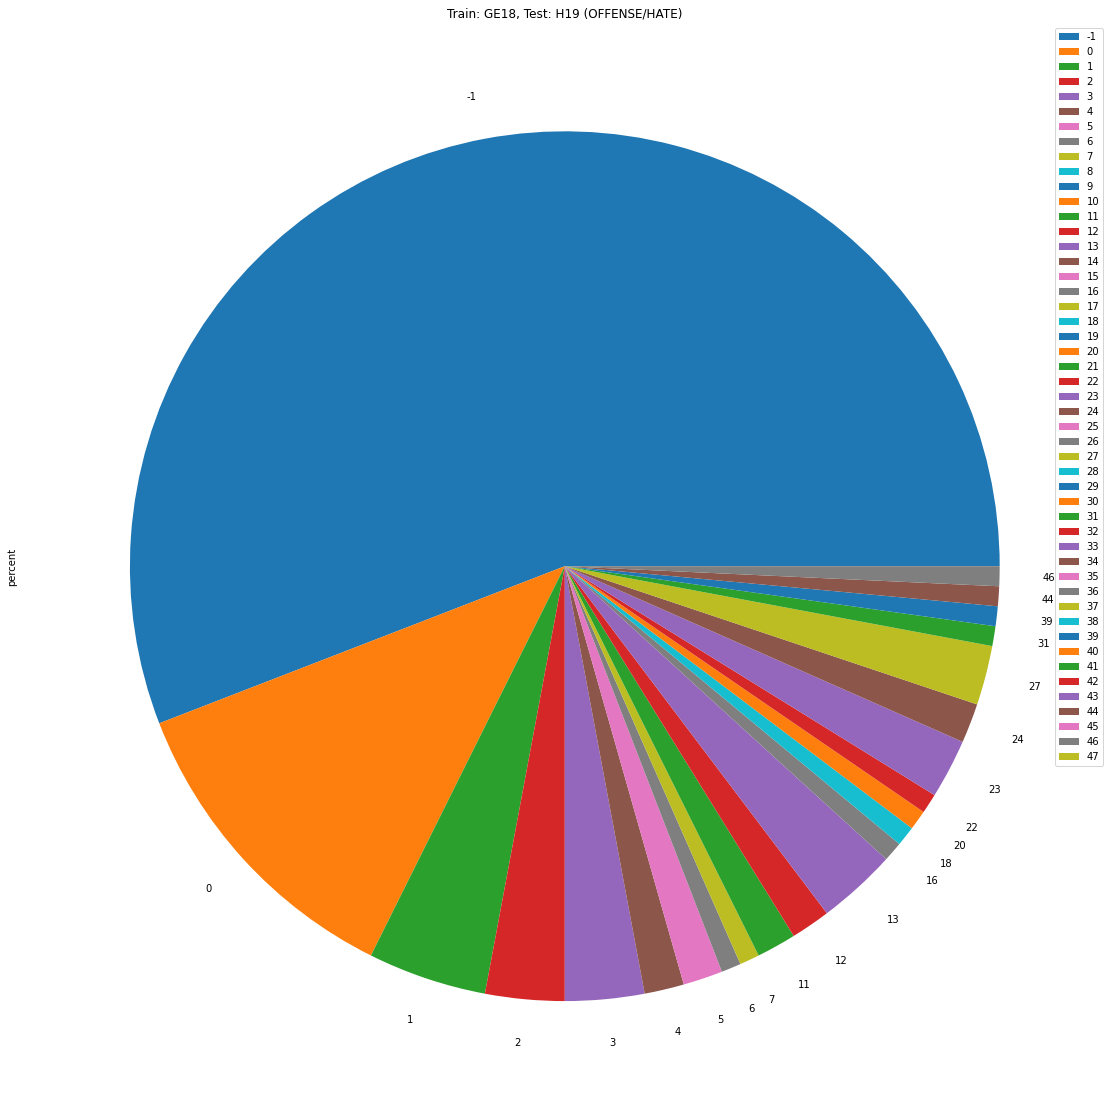

In [ ]:
plot = df_H19_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: GE18, Test: H19 (OFFENSE/HATE)')


In [ ]:
#plot = h19_test_offense_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H20_Test

In [ ]:
h20_test_raw['pred'] = train_ge18_pred_h20[0]
h20_test_raw

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  
0    hasoc_2020_de_1053    -1  
1     hasoc_2020_de_671     0  
2    hasoc_2020_de_2977    33  
3    hasoc_2020_de_1746    -1  
4    hasoc_2020_de_2416    -1  
..                  ...   ...  
521   hasoc_2020_de_486    -1  
522  hasoc_2020_de_3388     5  
523  hasoc_2020_de_2745    -1  
524   hasoc_2020_de_236    10  
525  hasoc_2020_de_2850    -1  

[526 rows x 7 columns]

### H20_Test: OTHER-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h20_test_other = h20_test_raw.loc[h20_test_raw['task1'] == 'NOT']
h20_test_other


Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  
0    hasoc_2020_de_1053    -1  
1     hasoc_2020_de_671     0  
2    hasoc_2020_de_2977    33  
3    hasoc_2020_de_1746    -1  
4    hasoc_2020_de_2416    -1  
..                  ...   ...  
521   hasoc_2020_de_486    -1  
522  hasoc_2020_de_3388     5  
523  hasoc_2020_de_2745    -1  
524   hasoc_2020_de_236    10  
525  hasoc_2020_de_2850    -1  

[365 rows x 7 columns]

In [ ]:
h20_test_other_pred_values = pd.DataFrame(h20_test_other['pred'].value_counts())
h20_test_other_pred_values['percent'] = (h20_test_other_pred_values['pred'] / h20_test_other_pred_values['pred'].sum()) * 100
h20_test_other_pred_values

pred    percent
-1    196  53.698630
 0     67  18.356164
 5     24   6.575342
 10    19   5.205479
 13    17   4.657534
 2      9   2.465753
 8      4   1.095890
 28     3   0.821918
 11     2   0.547945
 6      2   0.547945
 24     2   0.547945
 9      2   0.547945
 16     2   0.547945
 39     2   0.547945
 3      1   0.273973
 44     1   0.273973
 36     1   0.273973
 32     1   0.273973
 26     1   0.273973
 27     1   0.273973
 30     1   0.273973
 33     1   0.273973
 25     1   0.273973
 45     1   0.273973
 12     1   0.273973
 1      1   0.273973
 46     1   0.273973
 4      1   0.273973

In [ ]:
df1 =  train_ge18_model_topics[['Topic','Name']]
h20_test_other_pred_values['Topic'] = h20_test_other_pred_values.index
df2 = h20_test_other_pred_values
data_frames = [df1, df2]
df_H20_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H20_OTHER_merged['percent'] = df_H20_OTHER_merged['percent'].astype(float)

In [ ]:
df_H20_OTHER_merged['pred'] = df_H20_OTHER_merged['pred'].astype(int)

In [ ]:
df_H20_OTHER_sorted = df_H20_OTHER_merged.sort_values('pred', ascending=False)
df_H20_OTHER_sorted

Topic                                               Name  pred    percent
0      -1              -1_deutschland_immer_merkel_deutschen   196  53.698630
1       0            0_merkel_deutschland_deutschen_deutsche    67  18.356164
6       5                            5_grünen_grüne_grün_rot    24   6.575342
11     10                    10_idioten_dumm_dummheit_dummen    19   5.205479
14     13                    13_nazis_nazi_sprechen_neonazis    17   4.657534
3       2                2_islam_moslems_muslimischen_moslem     9   2.465753
9       8                       8_geld_zahlen_millionen_shop     4   1.095890
29     28              28_türken_türkei_türkisch_jahrhundert     3   0.821918
25     24                   24_fresse_gegessen_mad_schnitzel     2   0.547945
40     39                       39_humor_witzig_satire_lacht     2   0.547945
12     11               11_islam_moslems_europa_kindergärten     2   0.547945
17     16                          16_bild_bilder_kunst_foto     2   0.547945
10      9             9_macmike_bka_gutachten_kugelschreiber     2   0.547945
7       6                   6_türkei_türken_türke_türkischen     2   0.547945
5       4              4_medien_journalismus_propaganda_news     1   0.273973
33     32                         32_nacht_abend_gute_lieben     1   0.273973
37     36      36_familiennachzug_familien_subsidiär_familie     1   0.273973
31     30               30_jahr_neujahrsempfang_ändern_happy     1   0.273973
2       1             1_flüchtlinge_asylanten_asyl_migranten     1   0.273973
28     27   27_rassismus_rassisten_rassistischen_dargestellt     1   0.273973
27     26                  26_rainer_trinken_flaschen_wasser     1   0.273973
26     25                      25_mord_märtyrer_töten_mörder     1   0.273973
4       3          3_politiker_politik_politikern_demokratie     1   0.273973
34     33                   33_krieg_nationen_kämpfer_truppe     1   0.273973
13     12         12_flüchtlinge_italien_italiener_migranten     1   0.273973
45     44              44_ausland_unsichere_hast_stromkosten     1   0.273973
46     45                   45_berlin_berliner_gipfel_ziehen     1   0.273973
47     46     46_steuerzahler_griechen_steuergelder_schulden     1   0.273973
41     40            40_regierung_regieren_gewählt_charakter     0   0.000000
42     41     41_antisemitismus_antisemitische_daher_artikel     0   0.000000
43     42  42_patriotismus_nationalismus_patriotisch_patriot     0   0.000000
44     43             43_jamaika_möglich_koalition_gespräche     0   0.000000
36     35                     35_fahren_rnv_autobahnen_hause     0   0.000000
38     37                      37_sport_fußball_köln_abstieg     0   0.000000
39     38                38_geblockt_sofort_stunden_gesperrt     0   0.000000
24     23                 23_russland_putins_russischen_nato     0   0.000000
35     34                  34_waffen_panzer_raketen_munition     0   0.000000
32     31         31_kommunisten_linke_rebellion_kommunistin     0   0.000000
30     29           29_terroristen_terror_unterstützung_dieb     0   0.000000
23     22                   22_afrikaner_afrika_china_europa     0   0.000000
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen     0   0.000000
21     20              20_polizei_polizisten_banner_polizist     0   0.000000
20     19         19_spd_bundesparteitag_verhandlungen_union     0   0.000000
19     18               18_syrien_afghanistan_syrer_afghanen     0   0.000000
18     17             17_kirche_verrat_katholischen_religion     0   0.000000
16     15                 15_neuwahlen_wähler_fdp_wahlsystem     0   0.000000
15     14          14_israel_jerusalem_palästinenser_israels     0   0.000000
8       7                 7_tweet_twitter_facebook_retweeten     0   0.000000
48     47             47_katalonien_spanien_spaniens_brüssel     0   0.000000

In [ ]:
df_H20_OTHER_merged_plt = df_H20_OTHER_merged.set_index('Topic')


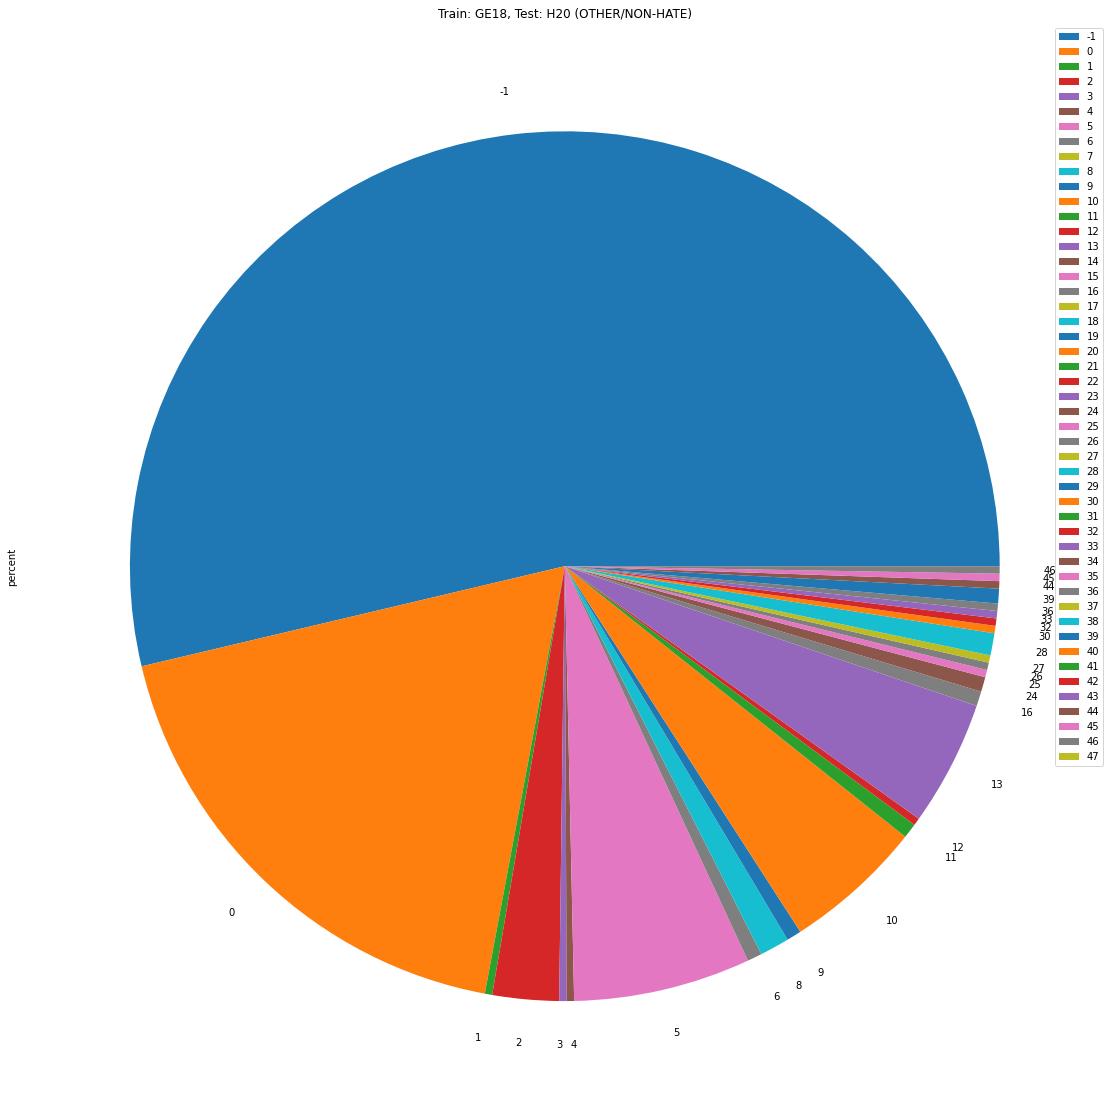

In [ ]:
plot = df_H20_OTHER_merged_plt.plot.pie(x = 'Name', y='percent', figsize=(20, 20),
                                    title = 'Train: GE18, Test: H20 (OTHER/NON-HATE)')


In [ ]:
#plot = h20_test_other_pred_values.plot.pie(y='percent', figsize=(20, 20))


### H20_Test: OFFENSE-Verteilung

In [ ]:
# Topic-Verteilung für 'OTHER'-Tweets
h20_test_offense = h20_test_raw.loc[h20_test_raw['task1'] == 'HOF']
h20_test_offense


Unnamed: 0             tweet_id  \
5             5  1129712298531184641   
6             6  1123981478361219073   
17           17  1126089577486323712   
21           21  1134130242786926592   
22           22  1134444350027509766   
..          ...                  ...   
500         500  1128321203075256320   
508         508  1129379774076473344   
511         511  1130096161212252162   
512         512  1124842568972288000   
517         517  1124379312264708101   

                                                  text task1 task2  \
5    RT @VonSchwer: Ein guter Patriot geht von Bord...   HOF  OFFN   
6    @yooli_derechte @MontanaBlack Mich wundert es ...   HOF  OFFN   
17   RT @CWBWElias: @TheresaGesperrt Wollte meine N...   HOF  PRFN   
21   @sgepeeti Verdursten ist aber auch ein scheiß ...   HOF  PRFN   
22                 Scheiß. Hurensohn gam @FortniteGame   HOF  PRFN   
..                                                 ...   ...   ...   
500                         @VizzionsXI halt dein maul   HOF  OFFN   
508                       Halt die fresse du hurensohn   HOF  PRFN   
511         @noelmgb_ @Sebbe2704 Richtiger Hurensohn 😂   HOF  PRFN   
512  Der Bass ist tief, die Atmosphäre sehr entspan...   HOF  PRFN   
517  RT @theunwantedpath: HABT IHR DEN ARSCH OFFEN ...   HOF  PRFN   

                     ID  pred  
5    hasoc_2020_de_1112    42  
6    hasoc_2020_de_2938    -1  
17   hasoc_2020_de_2545    -1  
21   hasoc_2020_de_1235    -1  
22   hasoc_2020_de_2487    -1  
..                  ...   ...  
500  hasoc_2020_de_1958    -1  
508  hasoc_2020_de_2465    -1  
511   hasoc_2020_de_958    -1  
512  hasoc_2020_de_2470    -1  
517   hasoc_2020_de_986    -1  

[161 rows x 7 columns]

In [ ]:
h20_test_offense_pred_values = pd.DataFrame(h20_test_offense['pred'].value_counts())
h20_test_offense_pred_values['percent'] = (h20_test_offense_pred_values['pred'] / h20_test_offense_pred_values['pred'].sum()) * 100
h20_test_offense_pred_values

pred    percent
-1     96  59.627329
 0     24  14.906832
 10    10   6.211180
 24     6   3.726708
 5      6   3.726708
 1      3   1.863354
 8      2   1.242236
 13     2   1.242236
 3      2   1.242236
 6      1   0.621118
 2      1   0.621118
 25     1   0.621118
 27     1   0.621118
 42     1   0.621118
 23     1   0.621118
 11     1   0.621118
 7      1   0.621118
 16     1   0.621118
 21     1   0.621118

In [ ]:
df1 =  train_ge18_model_topics[['Topic','Name']]
h20_test_offense_pred_values['Topic'] = h20_test_offense_pred_values.index
df2 = h20_test_offense_pred_values
data_frames = [df1, df2]
df_H20_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_H20_OFFENSE_merged['percent'] = df_H20_OFFENSE_merged['percent'].astype(float)

In [ ]:
df_H20_OFFENSE_merged['pred'] = df_H20_OFFENSE_merged['pred'].astype(int)
df_H20_OFFENSE_merged


Topic                                               Name  pred    percent
0      -1              -1_deutschland_immer_merkel_deutschen    96  59.627329
1       0            0_merkel_deutschland_deutschen_deutsche    24  14.906832
2       1             1_flüchtlinge_asylanten_asyl_migranten     3   1.863354
3       2                2_islam_moslems_muslimischen_moslem     1   0.621118
4       3          3_politiker_politik_politikern_demokratie     2   1.242236
5       4              4_medien_journalismus_propaganda_news     0   0.000000
6       5                            5_grünen_grüne_grün_rot     6   3.726708
7       6                   6_türkei_türken_türke_türkischen     1   0.621118
8       7                 7_tweet_twitter_facebook_retweeten     1   0.621118
9       8                       8_geld_zahlen_millionen_shop     2   1.242236
10      9             9_macmike_bka_gutachten_kugelschreiber     0   0.000000
11     10                    10_idioten_dumm_dummheit_dummen    10   6.211180
12     11               11_islam_moslems_europa_kindergärten     1   0.621118
13     12         12_flüchtlinge_italien_italiener_migranten     0   0.000000
14     13                    13_nazis_nazi_sprechen_neonazis     2   1.242236
15     14          14_israel_jerusalem_palästinenser_israels     0   0.000000
16     15                 15_neuwahlen_wähler_fdp_wahlsystem     0   0.000000
17     16                          16_bild_bilder_kunst_foto     1   0.621118
18     17             17_kirche_verrat_katholischen_religion     0   0.000000
19     18               18_syrien_afghanistan_syrer_afghanen     0   0.000000
20     19         19_spd_bundesparteitag_verhandlungen_union     0   0.000000
21     20              20_polizei_polizisten_banner_polizist     0   0.000000
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen     1   0.621118
23     22                   22_afrikaner_afrika_china_europa     0   0.000000
24     23                 23_russland_putins_russischen_nato     1   0.621118
25     24                   24_fresse_gegessen_mad_schnitzel     6   3.726708
26     25                      25_mord_märtyrer_töten_mörder     1   0.621118
27     26                  26_rainer_trinken_flaschen_wasser     0   0.000000
28     27   27_rassismus_rassisten_rassistischen_dargestellt     1   0.621118
29     28              28_türken_türkei_türkisch_jahrhundert     0   0.000000
30     29           29_terroristen_terror_unterstützung_dieb     0   0.000000
31     30               30_jahr_neujahrsempfang_ändern_happy     0   0.000000
32     31         31_kommunisten_linke_rebellion_kommunistin     0   0.000000
33     32                         32_nacht_abend_gute_lieben     0   0.000000
34     33                   33_krieg_nationen_kämpfer_truppe     0   0.000000
35     34                  34_waffen_panzer_raketen_munition     0   0.000000
36     35                     35_fahren_rnv_autobahnen_hause     0   0.000000
37     36      36_familiennachzug_familien_subsidiär_familie     0   0.000000
38     37                      37_sport_fußball_köln_abstieg     0   0.000000
39     38                38_geblockt_sofort_stunden_gesperrt     0   0.000000
40     39                       39_humor_witzig_satire_lacht     0   0.000000
41     40            40_regierung_regieren_gewählt_charakter     0   0.000000
42     41     41_antisemitismus_antisemitische_daher_artikel     0   0.000000
43     42  42_patriotismus_nationalismus_patriotisch_patriot     1   0.621118
44     43             43_jamaika_möglich_koalition_gespräche     0   0.000000
45     44              44_ausland_unsichere_hast_stromkosten     0   0.000000
46     45                   45_berlin_berliner_gipfel_ziehen     0   0.000000
47     46     46_steuerzahler_griechen_steuergelder_schulden     0   0.000000
48     47             47_katalonien_spanien_spaniens_brüssel     0   0.000000

In [ ]:
df_H20_OFFENSE_sorted = df_H20_OFFENSE_merged.sort_values('pred', ascending=False)
df_H20_OFFENSE_sorted

Topic                                               Name  pred    percent
0      -1              -1_deutschland_immer_merkel_deutschen    96  59.627329
1       0            0_merkel_deutschland_deutschen_deutsche    24  14.906832
11     10                    10_idioten_dumm_dummheit_dummen    10   6.211180
6       5                            5_grünen_grüne_grün_rot     6   3.726708
25     24                   24_fresse_gegessen_mad_schnitzel     6   3.726708
2       1             1_flüchtlinge_asylanten_asyl_migranten     3   1.863354
14     13                    13_nazis_nazi_sprechen_neonazis     2   1.242236
4       3          3_politiker_politik_politikern_demokratie     2   1.242236
9       8                       8_geld_zahlen_millionen_shop     2   1.242236
43     42  42_patriotismus_nationalismus_patriotisch_patriot     1   0.621118
28     27   27_rassismus_rassisten_rassistischen_dargestellt     1   0.621118
26     25                      25_mord_märtyrer_töten_mörder     1   0.621118
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen     1   0.621118
17     16                          16_bild_bilder_kunst_foto     1   0.621118
24     23                 23_russland_putins_russischen_nato     1   0.621118
8       7                 7_tweet_twitter_facebook_retweeten     1   0.621118
3       2                2_islam_moslems_muslimischen_moslem     1   0.621118
12     11               11_islam_moslems_europa_kindergärten     1   0.621118
7       6                   6_türkei_türken_türke_türkischen     1   0.621118
15     14          14_israel_jerusalem_palästinenser_israels     0   0.000000
36     35                     35_fahren_rnv_autobahnen_hause     0   0.000000
37     36      36_familiennachzug_familien_subsidiär_familie     0   0.000000
38     37                      37_sport_fußball_köln_abstieg     0   0.000000
39     38                38_geblockt_sofort_stunden_gesperrt     0   0.000000
40     39                       39_humor_witzig_satire_lacht     0   0.000000
41     40            40_regierung_regieren_gewählt_charakter     0   0.000000
34     33                   33_krieg_nationen_kämpfer_truppe     0   0.000000
42     41     41_antisemitismus_antisemitische_daher_artikel     0   0.000000
44     43             43_jamaika_möglich_koalition_gespräche     0   0.000000
45     44              44_ausland_unsichere_hast_stromkosten     0   0.000000
46     45                   45_berlin_berliner_gipfel_ziehen     0   0.000000
47     46     46_steuerzahler_griechen_steuergelder_schulden     0   0.000000
35     34                  34_waffen_panzer_raketen_munition     0   0.000000
32     31         31_kommunisten_linke_rebellion_kommunistin     0   0.000000
33     32                         32_nacht_abend_gute_lieben     0   0.000000
16     15                 15_neuwahlen_wähler_fdp_wahlsystem     0   0.000000
31     30               30_jahr_neujahrsempfang_ändern_happy     0   0.000000
30     29           29_terroristen_terror_unterstützung_dieb     0   0.000000
29     28              28_türken_türkei_türkisch_jahrhundert     0   0.000000
5       4              4_medien_journalismus_propaganda_news     0   0.000000
27     26                  26_rainer_trinken_flaschen_wasser     0   0.000000
10      9             9_macmike_bka_gutachten_kugelschreiber     0   0.000000
23     22                   22_afrikaner_afrika_china_europa     0   0.000000
21     20              20_polizei_polizisten_banner_polizist     0   0.000000
20     19         19_spd_bundesparteitag_verhandlungen_union     0   0.000000
19     18               18_syrien_afghanistan_syrer_afghanen     0   0.000000
18     17             17_kirche_verrat_katholischen_religion     0   0.000000
13     12         12_flüchtlinge_italien_italiener_migranten     0   0.000000
48     47             47_katalonien_spanien_spaniens_brüssel     0   0.000000

In [ ]:
df_H20_OFFENSE_merged_plt = df_H20_OFFENSE_merged.set_index('Topic')


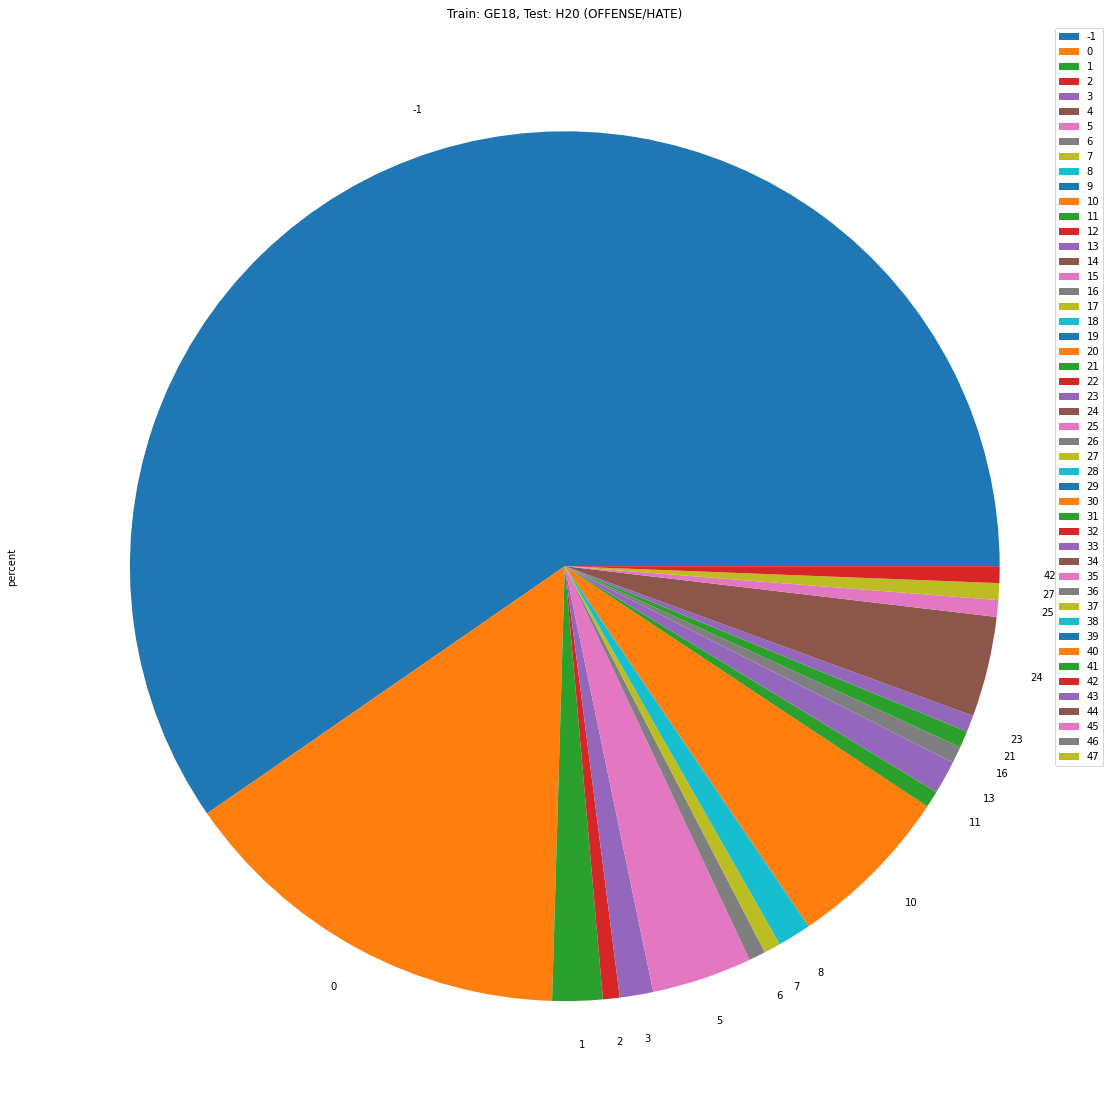

In [ ]:
plot = df_H20_OFFENSE_merged_plt.plot.pie(y='percent', figsize=(20, 20),
                                    title = 'Train: GE18, Test: H20 (OFFENSE/HATE)')


### Index richtig setzen: Kategorie OTHER bzw. NOT

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge18_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1              -1_deutschland_immer_merkel_deutschen
1       0            0_merkel_deutschland_deutschen_deutsche
2       1             1_flüchtlinge_asylanten_asyl_migranten
3       2                2_islam_moslems_muslimischen_moslem
4       3          3_politiker_politik_politikern_demokratie
5       4              4_medien_journalismus_propaganda_news
6       5                            5_grünen_grüne_grün_rot
7       6                   6_türkei_türken_türke_türkischen
8       7                 7_tweet_twitter_facebook_retweeten
9       8                       8_geld_zahlen_millionen_shop
10      9             9_macmike_bka_gutachten_kugelschreiber
11     10                    10_idioten_dumm_dummheit_dummen
12     11               11_islam_moslems_europa_kindergärten
13     12         12_flüchtlinge_italien_italiener_migranten
14     13                    13_nazis_nazi_sprechen_neonazis
15     14          14_israel_jerusalem_palästinenser_israels
16     15                 15_neuwahlen_wähler_fdp_wahlsystem
17     16                          16_bild_bilder_kunst_foto
18     17             17_kirche_verrat_katholischen_religion
19     18               18_syrien_afghanistan_syrer_afghanen
20     19         19_spd_bundesparteitag_verhandlungen_union
21     20              20_polizei_polizisten_banner_polizist
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen
23     22                   22_afrikaner_afrika_china_europa
24     23                 23_russland_putins_russischen_nato
25     24                   24_fresse_gegessen_mad_schnitzel
26     25                      25_mord_märtyrer_töten_mörder
27     26                  26_rainer_trinken_flaschen_wasser
28     27   27_rassismus_rassisten_rassistischen_dargestellt
29     28              28_türken_türkei_türkisch_jahrhundert
30     29           29_terroristen_terror_unterstützung_dieb
31     30               30_jahr_neujahrsempfang_ändern_happy
32     31         31_kommunisten_linke_rebellion_kommunistin
33     32                         32_nacht_abend_gute_lieben
34     33                   33_krieg_nationen_kämpfer_truppe
35     34                  34_waffen_panzer_raketen_munition
36     35                     35_fahren_rnv_autobahnen_hause
37     36      36_familiennachzug_familien_subsidiär_familie
38     37                      37_sport_fußball_köln_abstieg
39     38                38_geblockt_sofort_stunden_gesperrt
40     39                       39_humor_witzig_satire_lacht
41     40            40_regierung_regieren_gewählt_charakter
42     41     41_antisemitismus_antisemitische_daher_artikel
43     42  42_patriotismus_nationalismus_patriotisch_patriot
44     43             43_jamaika_möglich_koalition_gespräche
45     44              44_ausland_unsichere_hast_stromkosten
46     45                   45_berlin_berliner_gipfel_ziehen
47     46     46_steuerzahler_griechen_steuergelder_schulden
48     47             47_katalonien_spanien_spaniens_brüssel

In [ ]:
ge18_test_other_pred_values['Topic'] = ge18_test_other_pred_values.index
ge18_test_other_pred_values

pred    percent  Topic
-1   1354  58.111588     -1
 0    476  20.429185      0
 1     46   1.974249      1
 7     44   1.888412      7
 8     33   1.416309      8
 2     29   1.244635      2
 5     25   1.072961      5
 17    23   0.987124     17
 15    20   0.858369     15
 27    20   0.858369     27
 6     18   0.772532      6
 3     17   0.729614      3
 14    15   0.643777     14
 4     14   0.600858      4
 16    12   0.515021     16
 41    11   0.472103     41
 11    10   0.429185     11
 13    10   0.429185     13
 18     9   0.386266     18
 30     9   0.386266     30
 35     8   0.343348     35
 19     8   0.343348     19
 32     8   0.343348     32
 24     8   0.343348     24
 33     8   0.343348     33
 20     7   0.300429     20
 26     7   0.300429     26
 25     7   0.300429     25
 42     7   0.300429     42
 45     7   0.300429     45
 36     6   0.257511     36
 10     6   0.257511     10
 21     6   0.257511     21
 29     5   0.214592     29
 39     5   0.214592     39
 44     5   0.214592     44
 31     5   0.214592     31
 12     3   0.128755     12
 34     3   0.128755     34
 40     3   0.128755     40
 23     3   0.128755     23
 46     2   0.085837     46
 38     2   0.085837     38
 22     2   0.085837     22
 43     2   0.085837     43
 28     1   0.042918     28
 37     1   0.042918     37

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_other_pred_values 
df2 = df2.rename(columns={'pred':'predGE18', 'percent':'%GE18', 'Topic':'Topic'})

In [ ]:
ge19_test_other_pred_values['Topic'] = ge19_test_other_pred_values.index
ge19_test_other_pred_values

pred    percent  Topic
-1   1238  60.067928     -1
 0    342  16.593886      0
 7     70   3.396410      7
 8     39   1.892285      8
 31    31   1.504124     31
 13    22   1.067443     13
 1     22   1.067443      1
 14    21   1.018923     14
 27    19   0.921883     27
 3     17   0.824842      3
 44    17   0.824842     44
 26    17   0.824842     26
 4     15   0.727802      4
 16    14   0.679282     16
 2     14   0.679282      2
 24    13   0.630762     24
 39    12   0.582242     39
 20    11   0.533721     20
 6     10   0.485201      6
 15    10   0.485201     15
 35     9   0.436681     35
 41     8   0.388161     41
 33     7   0.339641     33
 32     7   0.339641     32
 23     6   0.291121     23
 10     6   0.291121     10
 29     6   0.291121     29
 25     6   0.291121     25
 19     5   0.242601     19
 9      5   0.242601      9
 12     5   0.242601     12
 42     4   0.194081     42
 34     4   0.194081     34
 11     4   0.194081     11
 5      4   0.194081      5
 38     3   0.145560     38
 36     3   0.145560     36
 18     3   0.145560     18
 30     3   0.145560     30
 46     2   0.097040     46
 40     2   0.097040     40
 22     2   0.097040     22
 17     1   0.048520     17
 21     1   0.048520     21
 45     1   0.048520     45

In [ ]:
df3 = ge19_test_other_pred_values
df3 = df3.rename(columns={'pred':'predGE19', 'percent':'%GE19', 'Topic':'Topic'})

In [ ]:
h19_test_other_pred_values['Topic'] = h19_test_other_pred_values.index
h19_test_other_pred_values

pred    percent  Topic
-1    367  51.400560     -1
 0    157  21.988796      0
 1     34   4.761905      1
 8     15   2.100840      8
 7     12   1.680672      7
 2     12   1.680672      2
 5      9   1.260504      5
 23     8   1.120448     23
 12     7   0.980392     12
 13     7   0.980392     13
 46     7   0.980392     46
 3      7   0.980392      3
 4      6   0.840336      4
 31     5   0.700280     31
 15     5   0.700280     15
 22     4   0.560224     22
 26     4   0.560224     26
 20     4   0.560224     20
 18     4   0.560224     18
 44     4   0.560224     44
 35     3   0.420168     35
 25     3   0.420168     25
 24     3   0.420168     24
 21     3   0.420168     21
 6      3   0.420168      6
 30     3   0.420168     30
 16     2   0.280112     16
 19     2   0.280112     19
 10     2   0.280112     10
 11     2   0.280112     11
 43     2   0.280112     43
 27     2   0.280112     27
 17     1   0.140056     17
 40     1   0.140056     40
 34     1   0.140056     34
 14     1   0.140056     14
 39     1   0.140056     39
 45     1   0.140056     45

In [ ]:
df4 = h19_test_other_pred_values
df4 = df4.rename(columns={'pred':'predH19', 'percent':'%H19', 'Topic':'Topic'})

In [ ]:
h20_test_other_pred_values['Topic'] = h20_test_other_pred_values.index
h20_test_other_pred_values

pred    percent  Topic
-1    196  53.698630     -1
 0     67  18.356164      0
 5     24   6.575342      5
 10    19   5.205479     10
 13    17   4.657534     13
 2      9   2.465753      2
 8      4   1.095890      8
 28     3   0.821918     28
 11     2   0.547945     11
 6      2   0.547945      6
 24     2   0.547945     24
 9      2   0.547945      9
 16     2   0.547945     16
 39     2   0.547945     39
 3      1   0.273973      3
 44     1   0.273973     44
 36     1   0.273973     36
 32     1   0.273973     32
 26     1   0.273973     26
 27     1   0.273973     27
 30     1   0.273973     30
 33     1   0.273973     33
 25     1   0.273973     25
 45     1   0.273973     45
 12     1   0.273973     12
 1      1   0.273973      1
 46     1   0.273973     46
 4      1   0.273973      4

In [ ]:
df5 = h20_test_other_pred_values
df5 = df5.rename(columns={'pred':'predH20', 'percent':'%H20', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_OTHER_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']] = df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']].astype(float).round(2)
df_OTHER_merged
#df_to_round = df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE18', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predGE18  %GE18  \
0      -1              -1_deutschland_immer_merkel_deutschen   1354.0  58.11   
1       0            0_merkel_deutschland_deutschen_deutsche    476.0  20.43   
2       1             1_flüchtlinge_asylanten_asyl_migranten     46.0   1.97   
3       2                2_islam_moslems_muslimischen_moslem     29.0   1.24   
4       3          3_politiker_politik_politikern_demokratie     17.0   0.73   
5       4              4_medien_journalismus_propaganda_news     14.0   0.60   
6       5                            5_grünen_grüne_grün_rot     25.0   1.07   
7       6                   6_türkei_türken_türke_türkischen     18.0   0.77   
8       7                 7_tweet_twitter_facebook_retweeten     44.0   1.89   
9       8                       8_geld_zahlen_millionen_shop     33.0   1.42   
10      9             9_macmike_bka_gutachten_kugelschreiber        0   0.00   
11     10                    10_idioten_dumm_dummheit_dummen      6.0   0.26   
12     11               11_islam_moslems_europa_kindergärten     10.0   0.43   
13     12         12_flüchtlinge_italien_italiener_migranten      3.0   0.13   
14     13                    13_nazis_nazi_sprechen_neonazis     10.0   0.43   
15     14          14_israel_jerusalem_palästinenser_israels     15.0   0.64   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem     20.0   0.86   
17     16                          16_bild_bilder_kunst_foto     12.0   0.52   
18     17             17_kirche_verrat_katholischen_religion     23.0   0.99   
19     18               18_syrien_afghanistan_syrer_afghanen      9.0   0.39   
20     19         19_spd_bundesparteitag_verhandlungen_union      8.0   0.34   
21     20              20_polizei_polizisten_banner_polizist      7.0   0.30   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen      6.0   0.26   
23     22                   22_afrikaner_afrika_china_europa      2.0   0.09   
24     23                 23_russland_putins_russischen_nato      3.0   0.13   
25     24                   24_fresse_gegessen_mad_schnitzel      8.0   0.34   
26     25                      25_mord_märtyrer_töten_mörder      7.0   0.30   
27     26                  26_rainer_trinken_flaschen_wasser      7.0   0.30   
28     27   27_rassismus_rassisten_rassistischen_dargestellt     20.0   0.86   
29     28              28_türken_türkei_türkisch_jahrhundert      1.0   0.04   
30     29           29_terroristen_terror_unterstützung_dieb      5.0   0.21   
31     30               30_jahr_neujahrsempfang_ändern_happy      9.0   0.39   
32     31         31_kommunisten_linke_rebellion_kommunistin      5.0   0.21   
33     32                         32_nacht_abend_gute_lieben      8.0   0.34   
34     33                   33_krieg_nationen_kämpfer_truppe      8.0   0.34   
35     34                  34_waffen_panzer_raketen_munition      3.0   0.13   
36     35                     35_fahren_rnv_autobahnen_hause      8.0   0.34   
37     36      36_familiennachzug_familien_subsidiär_familie      6.0   0.26   
38     37                      37_sport_fußball_köln_abstieg      1.0   0.04   
39     38                38_geblockt_sofort_stunden_gesperrt      2.0   0.09   
40     39                       39_humor_witzig_satire_lacht      5.0   0.21   
41     40            40_regierung_regieren_gewählt_charakter      3.0   0.13   
42     41     41_antisemitismus_antisemitische_daher_artikel     11.0   0.47   
43     42  42_patriotismus_nationalismus_patriotisch_patriot      7.0   0.30   
44     43             43_jamaika_möglich_koalition_gespräche      2.0   0.09   
45     44              44_ausland_unsichere_hast_stromkosten      5.0   0.21   
46     45                   45_berlin_berliner_gipfel_ziehen      7.0   0.30   
47     46     46_steuerzahler_griechen_steuergelder_schulden      2.0   0.09   
48     47             47_katalonien_spanien_spaniens_brüssel        0   0.00   

   

In [ ]:
df_OTHER_merged

Topic                                               Name predGE18  %GE18  \
0      -1              -1_deutschland_immer_merkel_deutschen   1354.0  58.11   
1       0            0_merkel_deutschland_deutschen_deutsche    476.0  20.43   
2       1             1_flüchtlinge_asylanten_asyl_migranten     46.0   1.97   
3       2                2_islam_moslems_muslimischen_moslem     29.0   1.24   
4       3          3_politiker_politik_politikern_demokratie     17.0   0.73   
5       4              4_medien_journalismus_propaganda_news     14.0   0.60   
6       5                            5_grünen_grüne_grün_rot     25.0   1.07   
7       6                   6_türkei_türken_türke_türkischen     18.0   0.77   
8       7                 7_tweet_twitter_facebook_retweeten     44.0   1.89   
9       8                       8_geld_zahlen_millionen_shop     33.0   1.42   
10      9             9_macmike_bka_gutachten_kugelschreiber        0   0.00   
11     10                    10_idioten_dumm_dummheit_dummen      6.0   0.26   
12     11               11_islam_moslems_europa_kindergärten     10.0   0.43   
13     12         12_flüchtlinge_italien_italiener_migranten      3.0   0.13   
14     13                    13_nazis_nazi_sprechen_neonazis     10.0   0.43   
15     14          14_israel_jerusalem_palästinenser_israels     15.0   0.64   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem     20.0   0.86   
17     16                          16_bild_bilder_kunst_foto     12.0   0.52   
18     17             17_kirche_verrat_katholischen_religion     23.0   0.99   
19     18               18_syrien_afghanistan_syrer_afghanen      9.0   0.39   
20     19         19_spd_bundesparteitag_verhandlungen_union      8.0   0.34   
21     20              20_polizei_polizisten_banner_polizist      7.0   0.30   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen      6.0   0.26   
23     22                   22_afrikaner_afrika_china_europa      2.0   0.09   
24     23                 23_russland_putins_russischen_nato      3.0   0.13   
25     24                   24_fresse_gegessen_mad_schnitzel      8.0   0.34   
26     25                      25_mord_märtyrer_töten_mörder      7.0   0.30   
27     26                  26_rainer_trinken_flaschen_wasser      7.0   0.30   
28     27   27_rassismus_rassisten_rassistischen_dargestellt     20.0   0.86   
29     28              28_türken_türkei_türkisch_jahrhundert      1.0   0.04   
30     29           29_terroristen_terror_unterstützung_dieb      5.0   0.21   
31     30               30_jahr_neujahrsempfang_ändern_happy      9.0   0.39   
32     31         31_kommunisten_linke_rebellion_kommunistin      5.0   0.21   
33     32                         32_nacht_abend_gute_lieben      8.0   0.34   
34     33                   33_krieg_nationen_kämpfer_truppe      8.0   0.34   
35     34                  34_waffen_panzer_raketen_munition      3.0   0.13   
36     35                     35_fahren_rnv_autobahnen_hause      8.0   0.34   
37     36      36_familiennachzug_familien_subsidiär_familie      6.0   0.26   
38     37                      37_sport_fußball_köln_abstieg      1.0   0.04   
39     38                38_geblockt_sofort_stunden_gesperrt      2.0   0.09   
40     39                       39_humor_witzig_satire_lacht      5.0   0.21   
41     40            40_regierung_regieren_gewählt_charakter      3.0   0.13   
42     41     41_antisemitismus_antisemitische_daher_artikel     11.0   0.47   
43     42  42_patriotismus_nationalismus_patriotisch_patriot      7.0   0.30   
44     43             43_jamaika_möglich_koalition_gespräche      2.0   0.09   
45     44              44_ausland_unsichere_hast_stromkosten      5.0   0.21   
46     45                   45_berlin_berliner_gipfel_ziehen      7.0   0.30   
47     46     46_steuerzahler_griechen_steuergelder_schulden      2.0   0.09   
48     47             47_katalonien_spanien_spaniens_brüssel        0   0.00   

   

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_OTHER_merged = df_OTHER_merged.astype({"predGE18": int, "predGE19":int, "predH19":int, "predH20":int})
df_OTHER_merged

Topic                                               Name  predGE18  %GE18  \
0      -1              -1_deutschland_immer_merkel_deutschen      1354  58.11   
1       0            0_merkel_deutschland_deutschen_deutsche       476  20.43   
2       1             1_flüchtlinge_asylanten_asyl_migranten        46   1.97   
3       2                2_islam_moslems_muslimischen_moslem        29   1.24   
4       3          3_politiker_politik_politikern_demokratie        17   0.73   
5       4              4_medien_journalismus_propaganda_news        14   0.60   
6       5                            5_grünen_grüne_grün_rot        25   1.07   
7       6                   6_türkei_türken_türke_türkischen        18   0.77   
8       7                 7_tweet_twitter_facebook_retweeten        44   1.89   
9       8                       8_geld_zahlen_millionen_shop        33   1.42   
10      9             9_macmike_bka_gutachten_kugelschreiber         0   0.00   
11     10                    10_idioten_dumm_dummheit_dummen         6   0.26   
12     11               11_islam_moslems_europa_kindergärten        10   0.43   
13     12         12_flüchtlinge_italien_italiener_migranten         3   0.13   
14     13                    13_nazis_nazi_sprechen_neonazis        10   0.43   
15     14          14_israel_jerusalem_palästinenser_israels        15   0.64   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem        20   0.86   
17     16                          16_bild_bilder_kunst_foto        12   0.52   
18     17             17_kirche_verrat_katholischen_religion        23   0.99   
19     18               18_syrien_afghanistan_syrer_afghanen         9   0.39   
20     19         19_spd_bundesparteitag_verhandlungen_union         8   0.34   
21     20              20_polizei_polizisten_banner_polizist         7   0.30   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen         6   0.26   
23     22                   22_afrikaner_afrika_china_europa         2   0.09   
24     23                 23_russland_putins_russischen_nato         3   0.13   
25     24                   24_fresse_gegessen_mad_schnitzel         8   0.34   
26     25                      25_mord_märtyrer_töten_mörder         7   0.30   
27     26                  26_rainer_trinken_flaschen_wasser         7   0.30   
28     27   27_rassismus_rassisten_rassistischen_dargestellt        20   0.86   
29     28              28_türken_türkei_türkisch_jahrhundert         1   0.04   
30     29           29_terroristen_terror_unterstützung_dieb         5   0.21   
31     30               30_jahr_neujahrsempfang_ändern_happy         9   0.39   
32     31         31_kommunisten_linke_rebellion_kommunistin         5   0.21   
33     32                         32_nacht_abend_gute_lieben         8   0.34   
34     33                   33_krieg_nationen_kämpfer_truppe         8   0.34   
35     34                  34_waffen_panzer_raketen_munition         3   0.13   
36     35                     35_fahren_rnv_autobahnen_hause         8   0.34   
37     36      36_familiennachzug_familien_subsidiär_familie         6   0.26   
38     37                      37_sport_fußball_köln_abstieg         1   0.04   
39     38                38_geblockt_sofort_stunden_gesperrt         2   0.09   
40     39                       39_humor_witzig_satire_lacht         5   0.21   
41     40            40_regierung_regieren_gewählt_charakter         3   0.13   
42     41     41_antisemitismus_antisemitische_daher_artikel        11   0.47   
43     42  42_patriotismus_nationalismus_patriotisch_patriot         7   0.30   
44     43             43_jamaika_möglich_koalition_gespräche         2   0.09   
45     44              44_ausland_unsichere_hast_stromkosten         5   0.21   
46     45                   45_berlin_berliner_gipfel_ziehen         7   0.30   
47     46     46_steuerzahler_griechen_steuergelder_schulden         2   0.09   
48     47             47_katalonien

In [ ]:
df_OTHER_percent = df_OTHER_merged[['Topic','%GE18','%GE19','%H19','%H20','Name']]
df_OTHER_percent

Topic  %GE18  %GE19   %H19   %H20  \
0      -1  58.11  60.07  51.40  53.70   
1       0  20.43  16.59  21.99  18.36   
2       1   1.97   1.07   4.76   0.27   
3       2   1.24   0.68   1.68   2.47   
4       3   0.73   0.82   0.98   0.27   
5       4   0.60   0.73   0.84   0.27   
6       5   1.07   0.19   1.26   6.58   
7       6   0.77   0.49   0.42   0.55   
8       7   1.89   3.40   1.68   0.00   
9       8   1.42   1.89   2.10   1.10   
10      9   0.00   0.24   0.00   0.55   
11     10   0.26   0.29   0.28   5.21   
12     11   0.43   0.19   0.28   0.55   
13     12   0.13   0.24   0.98   0.27   
14     13   0.43   1.07   0.98   4.66   
15     14   0.64   1.02   0.14   0.00   
16     15   0.86   0.49   0.70   0.00   
17     16   0.52   0.68   0.28   0.55   
18     17   0.99   0.05   0.14   0.00   
19     18   0.39   0.15   0.56   0.00   
20     19   0.34   0.24   0.28   0.00   
21     20   0.30   0.53   0.56   0.00   
22     21   0.26   0.05   0.42   0.00   
23     22   0.09   0.10   0.56   0.00   
24     23   0.13   0.29   1.12   0.00   
25     24   0.34   0.63   0.42   0.55   
26     25   0.30   0.29   0.42   0.27   
27     26   0.30   0.82   0.56   0.27   
28     27   0.86   0.92   0.28   0.27   
29     28   0.04   0.00   0.00   0.82   
30     29   0.21   0.29   0.00   0.00   
31     30   0.39   0.15   0.42   0.27   
32     31   0.21   1.50   0.70   0.00   
33     32   0.34   0.34   0.00   0.27   
34     33   0.34   0.34   0.00   0.27   
35     34   0.13   0.19   0.14   0.00   
36     35   0.34   0.44   0.42   0.00   
37     36   0.26   0.15   0.00   0.27   
38     37   0.04   0.00   0.00   0.00   
39     38   0.09   0.15   0.00   0.00   
40     39   0.21   0.58   0.14   0.55   
41     40   0.13   0.10   0.14   0.00   
42     41   0.47   0.39   0.00   0.00   
43     42   0.30   0.19   0.00   0.00   
44     43   0.09   0.00   0.28   0.00   
45     44   0.21   0.82   0.56   0.27   
46     45   0.30   0.05   0.14   0.27   
47     46   0.09   0.10   0.98   0.27   
48     47   0.00   0.00   0.00   0.00   

                                                 Name  
0               -1_deutschland_immer_merkel_deutschen  
1             0_merkel_deutschland_deutschen_deutsche  
2              1_flüchtlinge_asylanten_asyl_migranten  
3                 2_islam_moslems_muslimischen_moslem  
4           3_politiker_politik_politikern_demokratie  
5               4_medien_journalismus_propaganda_news  
6                             5_grünen_grüne_grün_rot  
7                    6_türkei_türken_türke_türkischen  
8                  7_tweet_twitter_facebook_retweeten  
9                        8_geld_zahlen_millionen_shop  
10             9_macmike_bka_gutachten_kugelschreiber  
11                    10_idioten_dumm_dummheit_dummen  
12               11_islam_moslems_europa_kindergärten  
13         12_flüchtlinge_italien_italiener_migranten  
14                    13_nazis_nazi_sprechen_neonazis  
15          14_israel_jerusalem_palästinenser_israels  
16                 15_neuwahlen_wähler_fdp_wahlsystem  
17                          16_bild_bilder_kunst_foto  
18             17_kirche_verrat_katholischen_religion  
19               18_syrien_afghanistan_syrer_afghanen  
20         19_spd_bundesparteitag_verhandlungen_union  
21              20_polizei_polizisten_banner_polizist  
22    21_schulabschluss_schulz_sitzengeblieben_sitzen  
23                   22_afrikaner_afrika_china_europa  
24                 23_russland_putins_russischen_nato  
25                   24_fresse_gegessen_mad_schnitzel  
26                      25_mord_märtyrer_töten_mörder  
27                  26_rainer_trinken_flaschen_wasser  
28   27_rassismus_rassisten_rassistischen_dargestellt  
29              28_türken_türkei_türkisch_jahrhundert  
30           29_terroristen_terror_unterstützung_dieb  
31               30_jahr_neujahrsempfang_ändern_happy  
32         31_kommunisten_linke_rebellion_kommunistin  
33                         32_nacht_abend_gute_li

### Index richtig setzen: Kategorie HATE bzw. OFFENSE

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge18_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1              -1_deutschland_immer_merkel_deutschen
1       0            0_merkel_deutschland_deutschen_deutsche
2       1             1_flüchtlinge_asylanten_asyl_migranten
3       2                2_islam_moslems_muslimischen_moslem
4       3          3_politiker_politik_politikern_demokratie
5       4              4_medien_journalismus_propaganda_news
6       5                            5_grünen_grüne_grün_rot
7       6                   6_türkei_türken_türke_türkischen
8       7                 7_tweet_twitter_facebook_retweeten
9       8                       8_geld_zahlen_millionen_shop
10      9             9_macmike_bka_gutachten_kugelschreiber
11     10                    10_idioten_dumm_dummheit_dummen
12     11               11_islam_moslems_europa_kindergärten
13     12         12_flüchtlinge_italien_italiener_migranten
14     13                    13_nazis_nazi_sprechen_neonazis
15     14          14_israel_jerusalem_palästinenser_israels
16     15                 15_neuwahlen_wähler_fdp_wahlsystem
17     16                          16_bild_bilder_kunst_foto
18     17             17_kirche_verrat_katholischen_religion
19     18               18_syrien_afghanistan_syrer_afghanen
20     19         19_spd_bundesparteitag_verhandlungen_union
21     20              20_polizei_polizisten_banner_polizist
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen
23     22                   22_afrikaner_afrika_china_europa
24     23                 23_russland_putins_russischen_nato
25     24                   24_fresse_gegessen_mad_schnitzel
26     25                      25_mord_märtyrer_töten_mörder
27     26                  26_rainer_trinken_flaschen_wasser
28     27   27_rassismus_rassisten_rassistischen_dargestellt
29     28              28_türken_türkei_türkisch_jahrhundert
30     29           29_terroristen_terror_unterstützung_dieb
31     30               30_jahr_neujahrsempfang_ändern_happy
32     31         31_kommunisten_linke_rebellion_kommunistin
33     32                         32_nacht_abend_gute_lieben
34     33                   33_krieg_nationen_kämpfer_truppe
35     34                  34_waffen_panzer_raketen_munition
36     35                     35_fahren_rnv_autobahnen_hause
37     36      36_familiennachzug_familien_subsidiär_familie
38     37                      37_sport_fußball_köln_abstieg
39     38                38_geblockt_sofort_stunden_gesperrt
40     39                       39_humor_witzig_satire_lacht
41     40            40_regierung_regieren_gewählt_charakter
42     41     41_antisemitismus_antisemitische_daher_artikel
43     42  42_patriotismus_nationalismus_patriotisch_patriot
44     43             43_jamaika_möglich_koalition_gespräche
45     44              44_ausland_unsichere_hast_stromkosten
46     45                   45_berlin_berliner_gipfel_ziehen
47     46     46_steuerzahler_griechen_steuergelder_schulden
48     47             47_katalonien_spanien_spaniens_brüssel

In [ ]:
ge18_test_offense_pred_values['Topic'] = ge18_test_offense_pred_values.index
ge18_test_offense_pred_values

pred    percent  Topic
-1    675  56.156406     -1
 0    221  18.386023      0
 2     55   4.575707      2
 1     44   3.660566      1
 5     30   2.495840      5
 13    17   1.414309     13
 10    15   1.247920     10
 11    12   0.998336     11
 4     11   0.915141      4
 27    11   0.915141     27
 3     10   0.831947      3
 12     9   0.748752     12
 6      9   0.748752      6
 24     8   0.665557     24
 14     7   0.582363     14
 8      6   0.499168      8
 22     6   0.499168     22
 32     5   0.415973     32
 39     5   0.415973     39
 20     4   0.332779     20
 33     4   0.332779     33
 29     3   0.249584     29
 7      3   0.249584      7
 17     3   0.249584     17
 18     3   0.249584     18
 21     3   0.249584     21
 15     2   0.166389     15
 40     2   0.166389     40
 28     2   0.166389     28
 43     2   0.166389     43
 26     2   0.166389     26
 41     2   0.166389     41
 35     1   0.083195     35
 16     1   0.083195     16
 19     1   0.083195     19
 23     1   0.083195     23
 38     1   0.083195     38
 45     1   0.083195     45
 42     1   0.083195     42
 46     1   0.083195     46
 31     1   0.083195     31
 37     1   0.083195     37
 34     1   0.083195     34

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_offense_pred_values 
df2 = df2.rename(columns={'pred':'predGE18', 'percent':'%GE18', 'Topic':'Topic'})

In [ ]:
ge19_test_offense_pred_values['Topic'] = ge19_test_offense_pred_values.index
ge19_test_offense_pred_values

pred    percent  Topic
-1    585  60.309278     -1
 0    108  11.134021      0
 13    30   3.092784     13
 10    25   2.577320     10
 1     23   2.371134      1
 2     15   1.546392      2
 4     15   1.546392      4
 5     13   1.340206      5
 14    12   1.237113     14
 24    11   1.134021     24
 31    11   1.134021     31
 7     11   1.134021      7
 8      9   0.927835      8
 3      8   0.824742      3
 11     7   0.721649     11
 21     7   0.721649     21
 20     7   0.721649     20
 27     7   0.721649     27
 41     6   0.618557     41
 16     6   0.618557     16
 29     6   0.618557     29
 39     5   0.515464     39
 22     5   0.515464     22
 12     4   0.412371     12
 25     4   0.412371     25
 23     3   0.309278     23
 15     3   0.309278     15
 34     3   0.309278     34
 19     3   0.309278     19
 9      2   0.206186      9
 18     2   0.206186     18
 28     2   0.206186     28
 6      2   0.206186      6
 46     2   0.206186     46
 36     1   0.103093     36
 38     1   0.103093     38
 17     1   0.103093     17
 40     1   0.103093     40
 45     1   0.103093     45
 35     1   0.103093     35
 26     1   0.103093     26
 37     1   0.103093     37

In [ ]:
df3 = ge19_test_offense_pred_values
df3 = df3.rename(columns={'pred':'predGE19', 'percent':'%GE19', 'Topic':'Topic'})

In [ ]:
h19_test_offense_pred_values['Topic'] = h19_test_offense_pred_values.index
h19_test_offense_pred_values

pred    percent  Topic
-1     76  55.882353     -1
 0     16  11.764706      0
 1      6   4.411765      1
 2      4   2.941176      2
 3      4   2.941176      3
 13     4   2.941176     13
 27     3   2.205882     27
 23     3   2.205882     23
 4      2   1.470588      4
 5      2   1.470588      5
 12     2   1.470588     12
 11     2   1.470588     11
 24     2   1.470588     24
 7      1   0.735294      7
 16     1   0.735294     16
 22     1   0.735294     22
 31     1   0.735294     31
 6      1   0.735294      6
 44     1   0.735294     44
 20     1   0.735294     20
 46     1   0.735294     46
 18     1   0.735294     18
 39     1   0.735294     39

In [ ]:
df4 = h19_test_offense_pred_values
df4 = df4.rename(columns={'pred':'predH19', 'percent':'%H19', 'Topic':'Topic'})

In [ ]:
h20_test_offense_pred_values['Topic'] = h20_test_offense_pred_values.index
h20_test_offense_pred_values

pred    percent  Topic
-1     96  59.627329     -1
 0     24  14.906832      0
 10    10   6.211180     10
 24     6   3.726708     24
 5      6   3.726708      5
 1      3   1.863354      1
 8      2   1.242236      8
 13     2   1.242236     13
 3      2   1.242236      3
 6      1   0.621118      6
 2      1   0.621118      2
 25     1   0.621118     25
 27     1   0.621118     27
 42     1   0.621118     42
 23     1   0.621118     23
 11     1   0.621118     11
 7      1   0.621118      7
 16     1   0.621118     16
 21     1   0.621118     21

In [ ]:
df5 = h20_test_offense_pred_values
df5 = df5.rename(columns={'pred':'predH20', 'percent':'%H20', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_OFFENSE_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_OFFENSE_merged[['%GE18', '%GE19','%H19', '%H20']] = df_OFFENSE_merged[['%GE18', '%GE19','%H19', '%H20']].astype(float).round(2)
df_OFFENSE_merged

Topic                                               Name predGE18  %GE18  \
0      -1              -1_deutschland_immer_merkel_deutschen    675.0  56.16   
1       0            0_merkel_deutschland_deutschen_deutsche    221.0  18.39   
2       1             1_flüchtlinge_asylanten_asyl_migranten     44.0   3.66   
3       2                2_islam_moslems_muslimischen_moslem     55.0   4.58   
4       3          3_politiker_politik_politikern_demokratie     10.0   0.83   
5       4              4_medien_journalismus_propaganda_news     11.0   0.92   
6       5                            5_grünen_grüne_grün_rot     30.0   2.50   
7       6                   6_türkei_türken_türke_türkischen      9.0   0.75   
8       7                 7_tweet_twitter_facebook_retweeten      3.0   0.25   
9       8                       8_geld_zahlen_millionen_shop      6.0   0.50   
10      9             9_macmike_bka_gutachten_kugelschreiber        0   0.00   
11     10                    10_idioten_dumm_dummheit_dummen     15.0   1.25   
12     11               11_islam_moslems_europa_kindergärten     12.0   1.00   
13     12         12_flüchtlinge_italien_italiener_migranten      9.0   0.75   
14     13                    13_nazis_nazi_sprechen_neonazis     17.0   1.41   
15     14          14_israel_jerusalem_palästinenser_israels      7.0   0.58   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem      2.0   0.17   
17     16                          16_bild_bilder_kunst_foto      1.0   0.08   
18     17             17_kirche_verrat_katholischen_religion      3.0   0.25   
19     18               18_syrien_afghanistan_syrer_afghanen      3.0   0.25   
20     19         19_spd_bundesparteitag_verhandlungen_union      1.0   0.08   
21     20              20_polizei_polizisten_banner_polizist      4.0   0.33   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen      3.0   0.25   
23     22                   22_afrikaner_afrika_china_europa      6.0   0.50   
24     23                 23_russland_putins_russischen_nato      1.0   0.08   
25     24                   24_fresse_gegessen_mad_schnitzel      8.0   0.67   
26     25                      25_mord_märtyrer_töten_mörder        0   0.00   
27     26                  26_rainer_trinken_flaschen_wasser      2.0   0.17   
28     27   27_rassismus_rassisten_rassistischen_dargestellt     11.0   0.92   
29     28              28_türken_türkei_türkisch_jahrhundert      2.0   0.17   
30     29           29_terroristen_terror_unterstützung_dieb      3.0   0.25   
31     30               30_jahr_neujahrsempfang_ändern_happy        0   0.00   
32     31         31_kommunisten_linke_rebellion_kommunistin      1.0   0.08   
33     32                         32_nacht_abend_gute_lieben      5.0   0.42   
34     33                   33_krieg_nationen_kämpfer_truppe      4.0   0.33   
35     34                  34_waffen_panzer_raketen_munition      1.0   0.08   
36     35                     35_fahren_rnv_autobahnen_hause      1.0   0.08   
37     36      36_familiennachzug_familien_subsidiär_familie        0   0.00   
38     37                      37_sport_fußball_köln_abstieg      1.0   0.08   
39     38                38_geblockt_sofort_stunden_gesperrt      1.0   0.08   
40     39                       39_humor_witzig_satire_lacht      5.0   0.42   
41     40            40_regierung_regieren_gewählt_charakter      2.0   0.17   
42     41     41_antisemitismus_antisemitische_daher_artikel      2.0   0.17   
43     42  42_patriotismus_nationalismus_patriotisch_patriot      1.0   0.08   
44     43             43_jamaika_möglich_koalition_gespräche      2.0   0.17   
45     44              44_ausland_unsichere_hast_stromkosten        0   0.00   
46     45                   45_berlin_berliner_gipfel_ziehen      1.0   0.08   
47     46     46_steuerzahler_griechen_steuergelder_schulden      1.0   0.08   
48     47             47_katalonien_spanien_spaniens_brüssel        0   0.00   

   

In [ ]:
df_OFFENSE_merged

Topic                                               Name predGE18  %GE18  \
0      -1              -1_deutschland_immer_merkel_deutschen    675.0  56.16   
1       0            0_merkel_deutschland_deutschen_deutsche    221.0  18.39   
2       1             1_flüchtlinge_asylanten_asyl_migranten     44.0   3.66   
3       2                2_islam_moslems_muslimischen_moslem     55.0   4.58   
4       3          3_politiker_politik_politikern_demokratie     10.0   0.83   
5       4              4_medien_journalismus_propaganda_news     11.0   0.92   
6       5                            5_grünen_grüne_grün_rot     30.0   2.50   
7       6                   6_türkei_türken_türke_türkischen      9.0   0.75   
8       7                 7_tweet_twitter_facebook_retweeten      3.0   0.25   
9       8                       8_geld_zahlen_millionen_shop      6.0   0.50   
10      9             9_macmike_bka_gutachten_kugelschreiber        0   0.00   
11     10                    10_idioten_dumm_dummheit_dummen     15.0   1.25   
12     11               11_islam_moslems_europa_kindergärten     12.0   1.00   
13     12         12_flüchtlinge_italien_italiener_migranten      9.0   0.75   
14     13                    13_nazis_nazi_sprechen_neonazis     17.0   1.41   
15     14          14_israel_jerusalem_palästinenser_israels      7.0   0.58   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem      2.0   0.17   
17     16                          16_bild_bilder_kunst_foto      1.0   0.08   
18     17             17_kirche_verrat_katholischen_religion      3.0   0.25   
19     18               18_syrien_afghanistan_syrer_afghanen      3.0   0.25   
20     19         19_spd_bundesparteitag_verhandlungen_union      1.0   0.08   
21     20              20_polizei_polizisten_banner_polizist      4.0   0.33   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen      3.0   0.25   
23     22                   22_afrikaner_afrika_china_europa      6.0   0.50   
24     23                 23_russland_putins_russischen_nato      1.0   0.08   
25     24                   24_fresse_gegessen_mad_schnitzel      8.0   0.67   
26     25                      25_mord_märtyrer_töten_mörder        0   0.00   
27     26                  26_rainer_trinken_flaschen_wasser      2.0   0.17   
28     27   27_rassismus_rassisten_rassistischen_dargestellt     11.0   0.92   
29     28              28_türken_türkei_türkisch_jahrhundert      2.0   0.17   
30     29           29_terroristen_terror_unterstützung_dieb      3.0   0.25   
31     30               30_jahr_neujahrsempfang_ändern_happy        0   0.00   
32     31         31_kommunisten_linke_rebellion_kommunistin      1.0   0.08   
33     32                         32_nacht_abend_gute_lieben      5.0   0.42   
34     33                   33_krieg_nationen_kämpfer_truppe      4.0   0.33   
35     34                  34_waffen_panzer_raketen_munition      1.0   0.08   
36     35                     35_fahren_rnv_autobahnen_hause      1.0   0.08   
37     36      36_familiennachzug_familien_subsidiär_familie        0   0.00   
38     37                      37_sport_fußball_köln_abstieg      1.0   0.08   
39     38                38_geblockt_sofort_stunden_gesperrt      1.0   0.08   
40     39                       39_humor_witzig_satire_lacht      5.0   0.42   
41     40            40_regierung_regieren_gewählt_charakter      2.0   0.17   
42     41     41_antisemitismus_antisemitische_daher_artikel      2.0   0.17   
43     42  42_patriotismus_nationalismus_patriotisch_patriot      1.0   0.08   
44     43             43_jamaika_möglich_koalition_gespräche      2.0   0.17   
45     44              44_ausland_unsichere_hast_stromkosten        0   0.00   
46     45                   45_berlin_berliner_gipfel_ziehen      1.0   0.08   
47     46     46_steuerzahler_griechen_steuergelder_schulden      1.0   0.08   
48     47             47_katalonien_spanien_spaniens_brüssel        0   0.00   

   

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_OFFENSE_merged = df_OFFENSE_merged.astype({"predGE18": int, "predGE19":int, "predH19":int, "predH20":int})
df_OFFENSE_merged

Topic                                               Name  predGE18  %GE18  \
0      -1              -1_deutschland_immer_merkel_deutschen       675  56.16   
1       0            0_merkel_deutschland_deutschen_deutsche       221  18.39   
2       1             1_flüchtlinge_asylanten_asyl_migranten        44   3.66   
3       2                2_islam_moslems_muslimischen_moslem        55   4.58   
4       3          3_politiker_politik_politikern_demokratie        10   0.83   
5       4              4_medien_journalismus_propaganda_news        11   0.92   
6       5                            5_grünen_grüne_grün_rot        30   2.50   
7       6                   6_türkei_türken_türke_türkischen         9   0.75   
8       7                 7_tweet_twitter_facebook_retweeten         3   0.25   
9       8                       8_geld_zahlen_millionen_shop         6   0.50   
10      9             9_macmike_bka_gutachten_kugelschreiber         0   0.00   
11     10                    10_idioten_dumm_dummheit_dummen        15   1.25   
12     11               11_islam_moslems_europa_kindergärten        12   1.00   
13     12         12_flüchtlinge_italien_italiener_migranten         9   0.75   
14     13                    13_nazis_nazi_sprechen_neonazis        17   1.41   
15     14          14_israel_jerusalem_palästinenser_israels         7   0.58   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem         2   0.17   
17     16                          16_bild_bilder_kunst_foto         1   0.08   
18     17             17_kirche_verrat_katholischen_religion         3   0.25   
19     18               18_syrien_afghanistan_syrer_afghanen         3   0.25   
20     19         19_spd_bundesparteitag_verhandlungen_union         1   0.08   
21     20              20_polizei_polizisten_banner_polizist         4   0.33   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen         3   0.25   
23     22                   22_afrikaner_afrika_china_europa         6   0.50   
24     23                 23_russland_putins_russischen_nato         1   0.08   
25     24                   24_fresse_gegessen_mad_schnitzel         8   0.67   
26     25                      25_mord_märtyrer_töten_mörder         0   0.00   
27     26                  26_rainer_trinken_flaschen_wasser         2   0.17   
28     27   27_rassismus_rassisten_rassistischen_dargestellt        11   0.92   
29     28              28_türken_türkei_türkisch_jahrhundert         2   0.17   
30     29           29_terroristen_terror_unterstützung_dieb         3   0.25   
31     30               30_jahr_neujahrsempfang_ändern_happy         0   0.00   
32     31         31_kommunisten_linke_rebellion_kommunistin         1   0.08   
33     32                         32_nacht_abend_gute_lieben         5   0.42   
34     33                   33_krieg_nationen_kämpfer_truppe         4   0.33   
35     34                  34_waffen_panzer_raketen_munition         1   0.08   
36     35                     35_fahren_rnv_autobahnen_hause         1   0.08   
37     36      36_familiennachzug_familien_subsidiär_familie         0   0.00   
38     37                      37_sport_fußball_köln_abstieg         1   0.08   
39     38                38_geblockt_sofort_stunden_gesperrt         1   0.08   
40     39                       39_humor_witzig_satire_lacht         5   0.42   
41     40            40_regierung_regieren_gewählt_charakter         2   0.17   
42     41     41_antisemitismus_antisemitische_daher_artikel         2   0.17   
43     42  42_patriotismus_nationalismus_patriotisch_patriot         1   0.08   
44     43             43_jamaika_möglich_koalition_gespräche         2   0.17   
45     44              44_ausland_unsichere_hast_stromkosten         0   0.00   
46     45                   45_berlin_berliner_gipfel_ziehen         1   0.08   
47     46     46_steuerzahler_griechen_steuergelder_schulden         1   0.08   
48     47             47_katalonien

In [ ]:
df_OFFENSE_percent = df_OFFENSE_merged[['Topic','%GE18','%GE19','%H19','%H20','Name']]
df_OFFENSE_percent

Topic  %GE18  %GE19   %H19   %H20  \
0      -1  56.16  60.31  55.88  59.63   
1       0  18.39  11.13  11.76  14.91   
2       1   3.66   2.37   4.41   1.86   
3       2   4.58   1.55   2.94   0.62   
4       3   0.83   0.82   2.94   1.24   
5       4   0.92   1.55   1.47   0.00   
6       5   2.50   1.34   1.47   3.73   
7       6   0.75   0.21   0.74   0.62   
8       7   0.25   1.13   0.74   0.62   
9       8   0.50   0.93   0.00   1.24   
10      9   0.00   0.21   0.00   0.00   
11     10   1.25   2.58   0.00   6.21   
12     11   1.00   0.72   1.47   0.62   
13     12   0.75   0.41   1.47   0.00   
14     13   1.41   3.09   2.94   1.24   
15     14   0.58   1.24   0.00   0.00   
16     15   0.17   0.31   0.00   0.00   
17     16   0.08   0.62   0.74   0.62   
18     17   0.25   0.10   0.00   0.00   
19     18   0.25   0.21   0.74   0.00   
20     19   0.08   0.31   0.00   0.00   
21     20   0.33   0.72   0.74   0.00   
22     21   0.25   0.72   0.00   0.62   
23     22   0.50   0.52   0.74   0.00   
24     23   0.08   0.31   2.21   0.62   
25     24   0.67   1.13   1.47   3.73   
26     25   0.00   0.41   0.00   0.62   
27     26   0.17   0.10   0.00   0.00   
28     27   0.92   0.72   2.21   0.62   
29     28   0.17   0.21   0.00   0.00   
30     29   0.25   0.62   0.00   0.00   
31     30   0.00   0.00   0.00   0.00   
32     31   0.08   1.13   0.74   0.00   
33     32   0.42   0.00   0.00   0.00   
34     33   0.33   0.00   0.00   0.00   
35     34   0.08   0.31   0.00   0.00   
36     35   0.08   0.10   0.00   0.00   
37     36   0.00   0.10   0.00   0.00   
38     37   0.08   0.10   0.00   0.00   
39     38   0.08   0.10   0.00   0.00   
40     39   0.42   0.52   0.74   0.00   
41     40   0.17   0.10   0.00   0.00   
42     41   0.17   0.62   0.00   0.00   
43     42   0.08   0.00   0.00   0.62   
44     43   0.17   0.00   0.00   0.00   
45     44   0.00   0.00   0.74   0.00   
46     45   0.08   0.10   0.00   0.00   
47     46   0.08   0.21   0.74   0.00   
48     47   0.00   0.00   0.00   0.00   

                                                 Name  
0               -1_deutschland_immer_merkel_deutschen  
1             0_merkel_deutschland_deutschen_deutsche  
2              1_flüchtlinge_asylanten_asyl_migranten  
3                 2_islam_moslems_muslimischen_moslem  
4           3_politiker_politik_politikern_demokratie  
5               4_medien_journalismus_propaganda_news  
6                             5_grünen_grüne_grün_rot  
7                    6_türkei_türken_türke_türkischen  
8                  7_tweet_twitter_facebook_retweeten  
9                        8_geld_zahlen_millionen_shop  
10             9_macmike_bka_gutachten_kugelschreiber  
11                    10_idioten_dumm_dummheit_dummen  
12               11_islam_moslems_europa_kindergärten  
13         12_flüchtlinge_italien_italiener_migranten  
14                    13_nazis_nazi_sprechen_neonazis  
15          14_israel_jerusalem_palästinenser_israels  
16                 15_neuwahlen_wähler_fdp_wahlsystem  
17                          16_bild_bilder_kunst_foto  
18             17_kirche_verrat_katholischen_religion  
19               18_syrien_afghanistan_syrer_afghanen  
20         19_spd_bundesparteitag_verhandlungen_union  
21              20_polizei_polizisten_banner_polizist  
22    21_schulabschluss_schulz_sitzengeblieben_sitzen  
23                   22_afrikaner_afrika_china_europa  
24                 23_russland_putins_russischen_nato  
25                   24_fresse_gegessen_mad_schnitzel  
26                      25_mord_märtyrer_töten_mörder  
27                  26_rainer_trinken_flaschen_wasser  
28   27_rassismus_rassisten_rassistischen_dargestellt  
29              28_türken_türkei_türkisch_jahrhundert  
30           29_terroristen_terror_unterstützung_dieb  
31               30_jahr_neujahrsempfang_ändern_happy  
32         31_kommunisten_linke_rebellion_kommunistin  
33                         32_nacht_abend_gute_li

### Gegenüberstellung von OTHER- und HATE-Anteilen

In [ ]:
df_OTHER_percent

Topic  %GE18  %GE19   %H19   %H20  \
0      -1  58.11  60.07  51.40  53.70   
1       0  20.43  16.59  21.99  18.36   
2       1   1.97   1.07   4.76   0.27   
3       2   1.24   0.68   1.68   2.47   
4       3   0.73   0.82   0.98   0.27   
5       4   0.60   0.73   0.84   0.27   
6       5   1.07   0.19   1.26   6.58   
7       6   0.77   0.49   0.42   0.55   
8       7   1.89   3.40   1.68   0.00   
9       8   1.42   1.89   2.10   1.10   
10      9   0.00   0.24   0.00   0.55   
11     10   0.26   0.29   0.28   5.21   
12     11   0.43   0.19   0.28   0.55   
13     12   0.13   0.24   0.98   0.27   
14     13   0.43   1.07   0.98   4.66   
15     14   0.64   1.02   0.14   0.00   
16     15   0.86   0.49   0.70   0.00   
17     16   0.52   0.68   0.28   0.55   
18     17   0.99   0.05   0.14   0.00   
19     18   0.39   0.15   0.56   0.00   
20     19   0.34   0.24   0.28   0.00   
21     20   0.30   0.53   0.56   0.00   
22     21   0.26   0.05   0.42   0.00   
23     22   0.09   0.10   0.56   0.00   
24     23   0.13   0.29   1.12   0.00   
25     24   0.34   0.63   0.42   0.55   
26     25   0.30   0.29   0.42   0.27   
27     26   0.30   0.82   0.56   0.27   
28     27   0.86   0.92   0.28   0.27   
29     28   0.04   0.00   0.00   0.82   
30     29   0.21   0.29   0.00   0.00   
31     30   0.39   0.15   0.42   0.27   
32     31   0.21   1.50   0.70   0.00   
33     32   0.34   0.34   0.00   0.27   
34     33   0.34   0.34   0.00   0.27   
35     34   0.13   0.19   0.14   0.00   
36     35   0.34   0.44   0.42   0.00   
37     36   0.26   0.15   0.00   0.27   
38     37   0.04   0.00   0.00   0.00   
39     38   0.09   0.15   0.00   0.00   
40     39   0.21   0.58   0.14   0.55   
41     40   0.13   0.10   0.14   0.00   
42     41   0.47   0.39   0.00   0.00   
43     42   0.30   0.19   0.00   0.00   
44     43   0.09   0.00   0.28   0.00   
45     44   0.21   0.82   0.56   0.27   
46     45   0.30   0.05   0.14   0.27   
47     46   0.09   0.10   0.98   0.27   
48     47   0.00   0.00   0.00   0.00   

                                                 Name  
0               -1_deutschland_immer_merkel_deutschen  
1             0_merkel_deutschland_deutschen_deutsche  
2              1_flüchtlinge_asylanten_asyl_migranten  
3                 2_islam_moslems_muslimischen_moslem  
4           3_politiker_politik_politikern_demokratie  
5               4_medien_journalismus_propaganda_news  
6                             5_grünen_grüne_grün_rot  
7                    6_türkei_türken_türke_türkischen  
8                  7_tweet_twitter_facebook_retweeten  
9                        8_geld_zahlen_millionen_shop  
10             9_macmike_bka_gutachten_kugelschreiber  
11                    10_idioten_dumm_dummheit_dummen  
12               11_islam_moslems_europa_kindergärten  
13         12_flüchtlinge_italien_italiener_migranten  
14                    13_nazis_nazi_sprechen_neonazis  
15          14_israel_jerusalem_palästinenser_israels  
16                 15_neuwahlen_wähler_fdp_wahlsystem  
17                          16_bild_bilder_kunst_foto  
18             17_kirche_verrat_katholischen_religion  
19               18_syrien_afghanistan_syrer_afghanen  
20         19_spd_bundesparteitag_verhandlungen_union  
21              20_polizei_polizisten_banner_polizist  
22    21_schulabschluss_schulz_sitzengeblieben_sitzen  
23                   22_afrikaner_afrika_china_europa  
24                 23_russland_putins_russischen_nato  
25                   24_fresse_gegessen_mad_schnitzel  
26                      25_mord_märtyrer_töten_mörder  
27                  26_rainer_trinken_flaschen_wasser  
28   27_rassismus_rassisten_rassistischen_dargestellt  
29              28_türken_türkei_türkisch_jahrhundert  
30           29_terroristen_terror_unterstützung_dieb  
31               30_jahr_neujahrsempfang_ändern_happy  
32         31_kommunisten_linke_rebellion_kommunistin  
33                         32_nacht_abend_gute_li

In [ ]:
train_ge18_df_OTHER_percent_plt = df_OTHER_percent.set_index('Name')

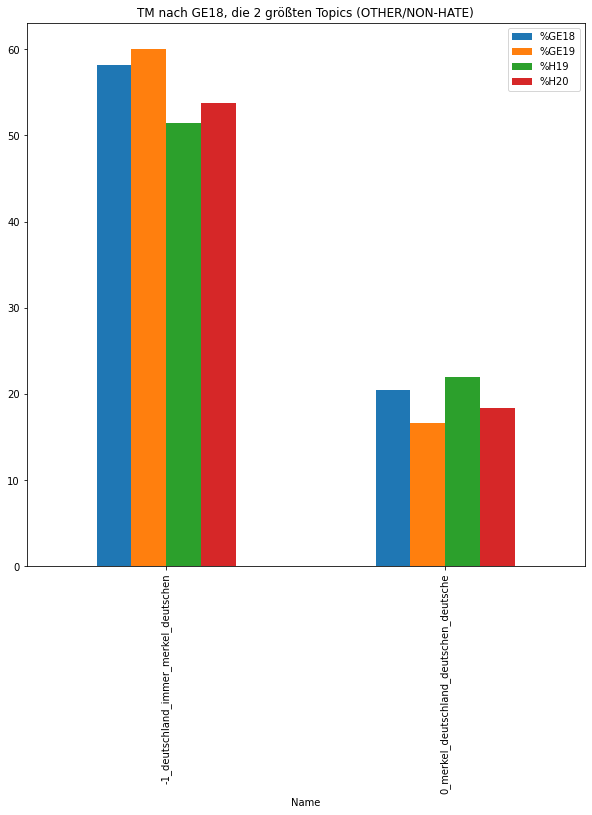

In [ ]:
train_ge18_df_OTHER_percent_plt[0:2].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach GE18, die 2 größten Topics (OTHER/NON-HATE)")

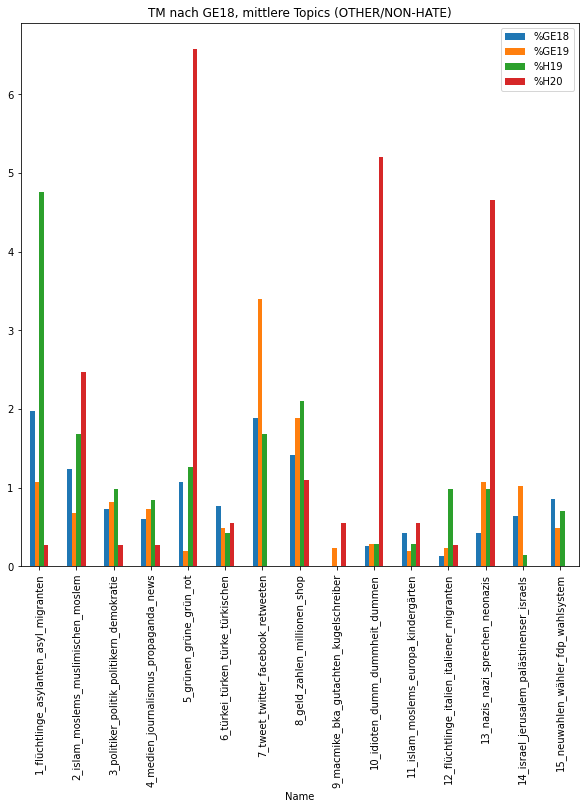

In [ ]:
train_ge18_df_OTHER_percent_plt[2:17].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach GE18, mittlere Topics (OTHER/NON-HATE)")

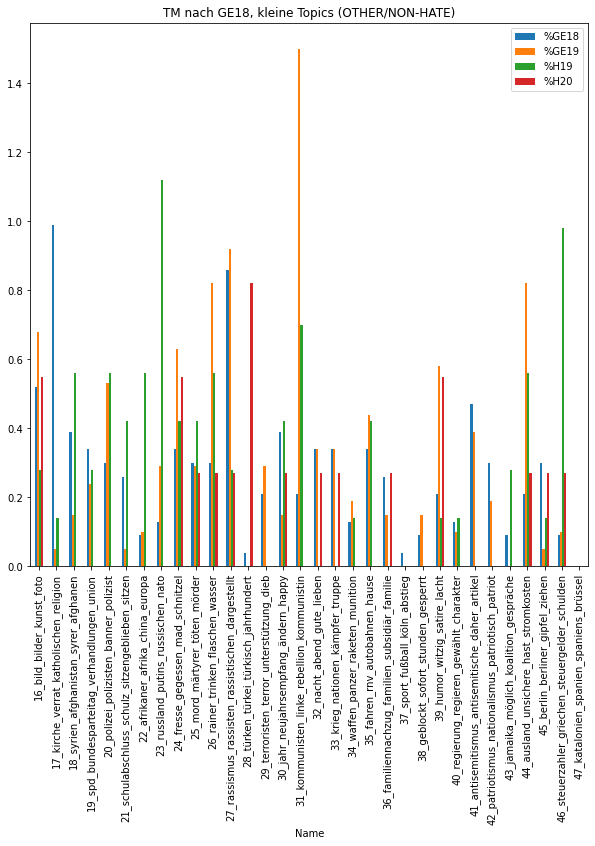

In [ ]:
train_ge18_df_OTHER_percent_plt[17:].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach GE18, kleine Topics (OTHER/NON-HATE)")



In [ ]:
df_OFFENSE_percent

Topic  %GE18  %GE19   %H19   %H20  \
0      -1  56.16  60.31  55.88  59.63   
1       0  18.39  11.13  11.76  14.91   
2       1   3.66   2.37   4.41   1.86   
3       2   4.58   1.55   2.94   0.62   
4       3   0.83   0.82   2.94   1.24   
5       4   0.92   1.55   1.47   0.00   
6       5   2.50   1.34   1.47   3.73   
7       6   0.75   0.21   0.74   0.62   
8       7   0.25   1.13   0.74   0.62   
9       8   0.50   0.93   0.00   1.24   
10      9   0.00   0.21   0.00   0.00   
11     10   1.25   2.58   0.00   6.21   
12     11   1.00   0.72   1.47   0.62   
13     12   0.75   0.41   1.47   0.00   
14     13   1.41   3.09   2.94   1.24   
15     14   0.58   1.24   0.00   0.00   
16     15   0.17   0.31   0.00   0.00   
17     16   0.08   0.62   0.74   0.62   
18     17   0.25   0.10   0.00   0.00   
19     18   0.25   0.21   0.74   0.00   
20     19   0.08   0.31   0.00   0.00   
21     20   0.33   0.72   0.74   0.00   
22     21   0.25   0.72   0.00   0.62   
23     22   0.50   0.52   0.74   0.00   
24     23   0.08   0.31   2.21   0.62   
25     24   0.67   1.13   1.47   3.73   
26     25   0.00   0.41   0.00   0.62   
27     26   0.17   0.10   0.00   0.00   
28     27   0.92   0.72   2.21   0.62   
29     28   0.17   0.21   0.00   0.00   
30     29   0.25   0.62   0.00   0.00   
31     30   0.00   0.00   0.00   0.00   
32     31   0.08   1.13   0.74   0.00   
33     32   0.42   0.00   0.00   0.00   
34     33   0.33   0.00   0.00   0.00   
35     34   0.08   0.31   0.00   0.00   
36     35   0.08   0.10   0.00   0.00   
37     36   0.00   0.10   0.00   0.00   
38     37   0.08   0.10   0.00   0.00   
39     38   0.08   0.10   0.00   0.00   
40     39   0.42   0.52   0.74   0.00   
41     40   0.17   0.10   0.00   0.00   
42     41   0.17   0.62   0.00   0.00   
43     42   0.08   0.00   0.00   0.62   
44     43   0.17   0.00   0.00   0.00   
45     44   0.00   0.00   0.74   0.00   
46     45   0.08   0.10   0.00   0.00   
47     46   0.08   0.21   0.74   0.00   
48     47   0.00   0.00   0.00   0.00   

                                                 Name  
0               -1_deutschland_immer_merkel_deutschen  
1             0_merkel_deutschland_deutschen_deutsche  
2              1_flüchtlinge_asylanten_asyl_migranten  
3                 2_islam_moslems_muslimischen_moslem  
4           3_politiker_politik_politikern_demokratie  
5               4_medien_journalismus_propaganda_news  
6                             5_grünen_grüne_grün_rot  
7                    6_türkei_türken_türke_türkischen  
8                  7_tweet_twitter_facebook_retweeten  
9                        8_geld_zahlen_millionen_shop  
10             9_macmike_bka_gutachten_kugelschreiber  
11                    10_idioten_dumm_dummheit_dummen  
12               11_islam_moslems_europa_kindergärten  
13         12_flüchtlinge_italien_italiener_migranten  
14                    13_nazis_nazi_sprechen_neonazis  
15          14_israel_jerusalem_palästinenser_israels  
16                 15_neuwahlen_wähler_fdp_wahlsystem  
17                          16_bild_bilder_kunst_foto  
18             17_kirche_verrat_katholischen_religion  
19               18_syrien_afghanistan_syrer_afghanen  
20         19_spd_bundesparteitag_verhandlungen_union  
21              20_polizei_polizisten_banner_polizist  
22    21_schulabschluss_schulz_sitzengeblieben_sitzen  
23                   22_afrikaner_afrika_china_europa  
24                 23_russland_putins_russischen_nato  
25                   24_fresse_gegessen_mad_schnitzel  
26                      25_mord_märtyrer_töten_mörder  
27                  26_rainer_trinken_flaschen_wasser  
28   27_rassismus_rassisten_rassistischen_dargestellt  
29              28_türken_türkei_türkisch_jahrhundert  
30           29_terroristen_terror_unterstützung_dieb  
31               30_jahr_neujahrsempfang_ändern_happy  
32         31_kommunisten_linke_rebellion_kommunistin  
33                         32_nacht_abend_gute_li

In [ ]:
train_ge18_df_OFFENSE_percent_plt = df_OFFENSE_percent.set_index('Name')

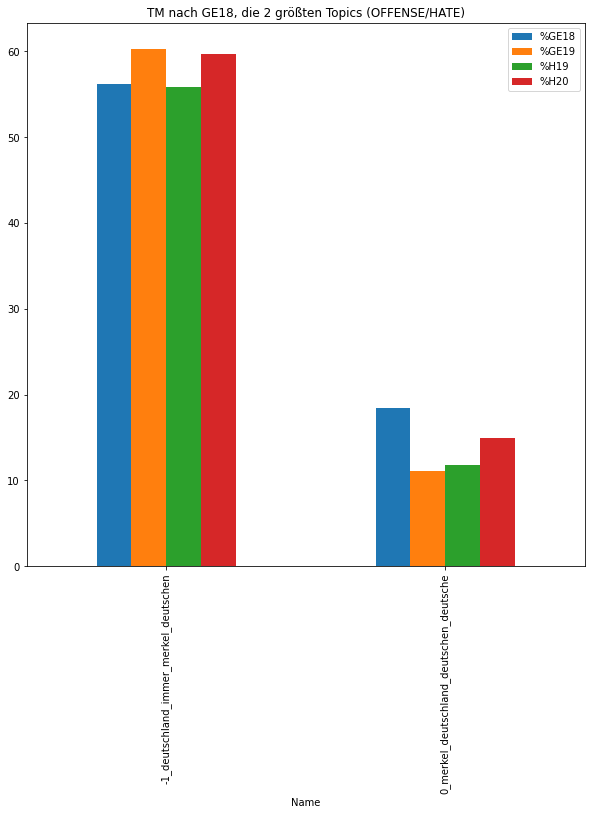

In [ ]:
train_ge18_df_OFFENSE_percent_plt[0:2].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach GE18, die 2 größten Topics (OFFENSE/HATE)")


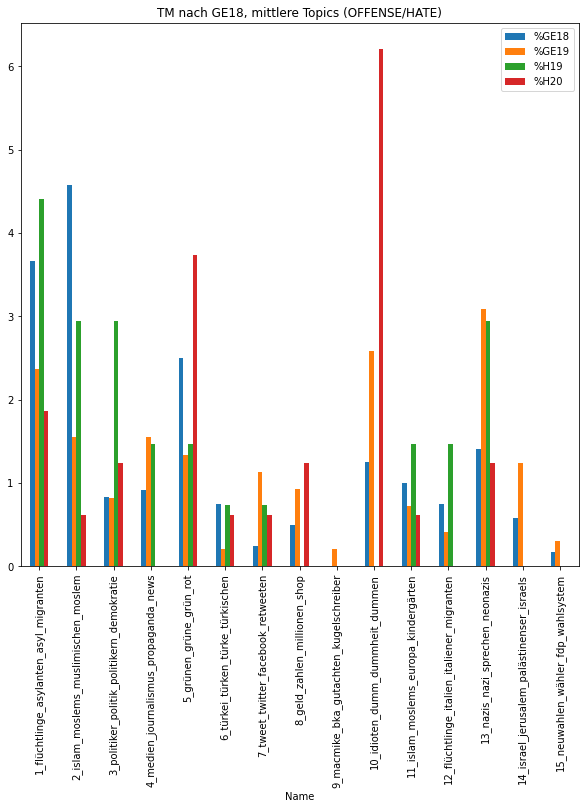

In [ ]:
train_ge18_df_OFFENSE_percent_plt[2:17].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach GE18, mittlere Topics (OFFENSE/HATE)")


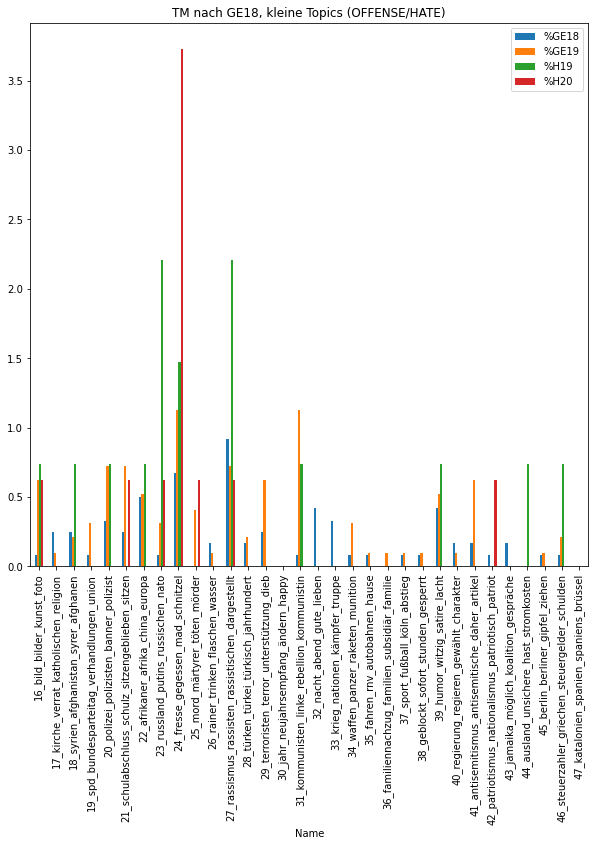

In [ ]:
train_ge18_df_OFFENSE_percent_plt[17:].plot(y=["%GE18", "%GE19", "%H19", "%H20"], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM nach GE18, kleine Topics (OFFENSE/HATE)")

## Klassifikation HASOCOne, trainiert auf GERMEVAL2018

### Test GE2018

In [ ]:
train_ge18_class_ge18 = pd.read_csv('/content/submission_DE_A_HASOCOne_german_task_a_GermEval2018.csv')
train_ge18_class_ge18

index_col    task1  index_col.1
0             0    OTHER            0
1             1  OFFENSE            1
2             2    OTHER            2
3             3    OTHER            3
4             4    OTHER            4
...         ...      ...          ...
3527       3527    OTHER         3527
3528       3528  OFFENSE         3528
3529       3529  OFFENSE         3529
3530       3530    OTHER         3530
3531       3531    OTHER         3531

[3532 rows x 3 columns]

In [ ]:
ge18_test_class_values = pd.DataFrame(train_ge18_class_ge18['task1'].value_counts())
ge18_test_class_values

task1
OTHER     2755
OFFENSE    777

In [ ]:
ge18_test_class_values['task1']

OTHER      2755
OFFENSE     777
Name: task1, dtype: int64

In [ ]:
ge18_test_raw['class'] = train_ge18_class_ge18['task1']
ge18_test_raw

TWEET      OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...    OTHER  OTHER    -1   
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...    OTHER  OTHER     2   
2     #Merkel rollt dem Emir von #Katar, der islamis...    OTHER  OTHER    -1   
3     „Merle ist kein junges unschuldiges Mädchen“ K...    OTHER  OTHER     0   
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE  ABUSE    12   
...                                                 ...      ...    ...   ...   
3527  @schlabonski tja, es können einen nicht alle L...    OTHER  OTHER     0   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE  ABUSE    -1   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE  ABUSE    -1   
3530  @stephanweil was ist nun mit kostenlosen Kitas...    OTHER  OTHER    -1   
3531  @Bartzissey Denn Minderheiten sind für Linke j...    OTHER  OTHER    -1   

        class  
0       OTHER  
1     OFFENSE  
2       OTHER  
3       OTHER  
4       OTHER  
...       ...  
3527    OTHER  
3528  OFFENSE  
3529  OFFENSE  
3530    OTHER  
3531    OTHER  

[3532 rows x 5 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge18_test_true_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 'OFFENSE')]
ge18_test_true_pos

TWEET      OFF     CAT  \
16    @heuteshow Besser einen schwarz arbeiten zu la...  OFFENSE   ABUSE   
30    @FobiMania @ManuelaSchwesig @MartinSchulz Ich ...  OFFENSE  INSULT   
35    der Dummschwätzer Herr #Dobrindt gehört nicht ...  OFFENSE  INSULT   
37    @stefanolix @Tevsa Das kommt davon wenn die Ge...  OFFENSE   ABUSE   
50    Logik 2017: |LBR| Es gibt dreiundzwölfzig Gesc...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
3497  @AfD_Support |LBR| Nur Jauche durch die Asylan...  OFFENSE   ABUSE   
3517  @Alltags_Kotze Dein Feminismus und Genderquats...  OFFENSE   ABUSE   
3526  @SteinbachErika Ich finde AFD Wähler besser al...  OFFENSE  INSULT   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE   ABUSE   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE   ABUSE   

      pred    class  
16      27  OFFENSE  
30       0  OFFENSE  
35      -1  OFFENSE  
37       3  OFFENSE  
50       2  OFFENSE  
...    ...      ...  
3497     1  OFFENSE  
3517     0  OFFENSE  
3526    24  OFFENSE  
3528    -1  OFFENSE  
3529    -1  OFFENSE  

[564 rows x 5 columns]

In [ ]:
ge18_test_pred_values_true_pos = pd.DataFrame(ge18_test_true_pos['pred'].value_counts())
ge18_test_pred_values_true_pos['percent'] = (ge18_test_pred_values_true_pos['pred'] / ge18_test_pred_values_true_pos['pred'].sum()) * 100
ge18_test_pred_values_true_pos

pred    percent
-1    315  55.851064
 0     92  16.312057
 1     26   4.609929
 2     21   3.723404
 5     16   2.836879
 13    13   2.304965
 10    10   1.773050
 11     8   1.418440
 3      7   1.241135
 27     6   1.063830
 12     6   1.063830
 6      4   0.709220
 24     4   0.709220
 17     3   0.531915
 8      3   0.531915
 39     3   0.531915
 26     2   0.354610
 21     2   0.354610
 32     2   0.354610
 20     2   0.354610
 29     2   0.354610
 4      2   0.354610
 7      2   0.354610
 22     2   0.354610
 18     2   0.354610
 23     1   0.177305
 14     1   0.177305
 31     1   0.177305
 19     1   0.177305
 42     1   0.177305
 43     1   0.177305
 15     1   0.177305
 40     1   0.177305
 33     1   0.177305

In [ ]:
ge18_test_false_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 'OFFENSE')]
ge18_test_false_pos

TWEET    OFF    CAT  pred  \
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...  OTHER  OTHER     2   
22    Entsetzlich und traurig. So viele Tote und Ver...  OTHER  OTHER    -1   
51    @WlerNr ich mache einen neuen Tweet auf, damit...  OTHER  OTHER     7   
60    @Tom174_ @ThiloAdamitz Nicht jeder tauscht sei...  OTHER  OTHER     0   
66    @Joerg_Meuthen @JoeyGerlach AfD an die Macht. ...  OTHER  OTHER     0   
...                                                 ...    ...    ...   ...   
3472  @FAZ_Politik Das kath Polen sieht das anders ....  OTHER  OTHER    -1   
3478  @Tweet_van_Vleet @DerBerliiner |LBR| Genau so ...  OTHER  OTHER    -1   
3481  @freeWorld2 @rspctfl @NoBurkaverbot @m8Flo @Th...  OTHER  OTHER    -1   
3511  @m8Flo @everlast_fs @rspctfl @BolzAndrea @Inne...  OTHER  OTHER    -1   
3522  Heil dir im Siegerkranz,Herrscher des Vaterlan...  OTHER  OTHER     0   

        class  
1     OFFENSE  
22    OFFENSE  
51    OFFENSE  
60    OFFENSE  
66    OFFENSE  
...       ...  
3472  OFFENSE  
3478  OFFENSE  
3481  OFFENSE  
3511  OFFENSE  
3522  OFFENSE  

[213 rows x 5 columns]

In [ ]:
ge18_test_pred_values_false_pos = pd.DataFrame(ge18_test_false_pos['pred'].value_counts())
ge18_test_pred_values_false_pos['percent'] = (ge18_test_pred_values_false_pos['pred'] / ge18_test_pred_values_false_pos['pred'].sum()) * 100
ge18_test_pred_values_false_pos

pred    percent
-1    113  53.051643
 0     51  23.943662
 1      9   4.225352
 5      6   2.816901
 2      5   2.347418
 26     3   1.408451
 8      3   1.408451
 27     3   1.408451
 11     2   0.938967
 45     2   0.938967
 7      2   0.938967
 18     2   0.938967
 13     2   0.938967
 23     1   0.469484
 31     1   0.469484
 39     1   0.469484
 21     1   0.469484
 12     1   0.469484
 14     1   0.469484
 24     1   0.469484
 46     1   0.469484
 33     1   0.469484
 16     1   0.469484

In [ ]:
ge18_test_true_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 'OTHER')]
ge18_test_true_neg

TWEET    OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...  OTHER  OTHER    -1   
2     #Merkel rollt dem Emir von #Katar, der islamis...  OTHER  OTHER    -1   
3     „Merle ist kein junges unschuldiges Mädchen“ K...  OTHER  OTHER     0   
5     @_StultaMundi Die Bibel enthält ebenfalls Gese...  OTHER  OTHER    -1   
6     @Thueringen_ @Miquwarchar @Pontifex_de Man mun...  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
3523  @rspctfl @everlast_fs @m8Flo @BolzAndrea @Inne...  OTHER  OTHER    -1   
3524  #Grüne bestehen auf Sanktionen gegen #Russland...  OTHER  OTHER    -1   
3527  @schlabonski tja, es können einen nicht alle L...  OTHER  OTHER     0   
3530  @stephanweil was ist nun mit kostenlosen Kitas...  OTHER  OTHER    -1   
3531  @Bartzissey Denn Minderheiten sind für Linke j...  OTHER  OTHER    -1   

      class  
0     OTHER  
2     OTHER  
3     OTHER  
5     OTHER  
6     OTHER  
...     ...  
3523  OTHER  
3524  OTHER  
3527  OTHER  
3530  OTHER  
3531  OTHER  

[2117 rows x 5 columns]

In [ ]:
ge18_test_pred_values_true_neg = pd.DataFrame(ge18_test_true_neg['pred'].value_counts())
ge18_test_pred_values_true_neg['percent'] = (ge18_test_pred_values_true_neg['pred'] / ge18_test_pred_values_true_neg['pred'].sum()) * 100
ge18_test_pred_values_true_neg

pred    percent
-1   1241  58.620690
 0    425  20.075579
 7     42   1.983940
 1     37   1.747756
 8     30   1.417100
 2     24   1.133680
 17    23   1.086443
 15    20   0.944733
 5     19   0.897496
 6     18   0.850260
 3     17   0.803023
 27    17   0.803023
 4     14   0.661313
 14    14   0.661313
 16    11   0.519603
 41    11   0.519603
 30     9   0.425130
 32     8   0.377893
 13     8   0.377893
 11     8   0.377893
 19     8   0.377893
 35     8   0.377893
 42     7   0.330657
 25     7   0.330657
 20     7   0.330657
 24     7   0.330657
 33     7   0.330657
 18     7   0.330657
 10     6   0.283420
 36     6   0.283420
 29     5   0.236183
 44     5   0.236183
 21     5   0.236183
 45     5   0.236183
 39     4   0.188947
 26     4   0.188947
 31     4   0.188947
 34     3   0.141710
 40     3   0.141710
 22     2   0.094473
 12     2   0.094473
 38     2   0.094473
 43     2   0.094473
 23     2   0.094473
 28     1   0.047237
 37     1   0.047237
 46     1   0.047237

In [ ]:
ge18_test_false_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 'OTHER')]
ge18_test_false_neg

TWEET      OFF     CAT  \
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE   ABUSE   
9     @FeePatzer Frauen zu einem "Ja" zu überreden, ...  OFFENSE   ABUSE   
10    @IvyandWoe Ich weiß halt, wie man Frauen zum M...  OFFENSE   ABUSE   
11     Liebe Freunde, Gauck,das Symbol des Sklaventums!  OFFENSE   ABUSE   
13    wen interessiert denn die Meinung des Außenmin...  OFFENSE  INSULT   
...                                                 ...      ...     ...   
3513  Deutschland geht unter und Merkel ist der Tote...  OFFENSE  INSULT   
3514  wie immer die Moderatorin der @AktuelleStunde ...  OFFENSE  INSULT   
3519    Feminismus ist der Islamismus der Weiblichkeit.  OFFENSE   ABUSE   
3521  @UdoUlfkotte Hauptsache den Asylanten gehts ge...  OFFENSE   ABUSE   
3525  @ThomasMichael71 @mountainman1977 @houelle_bec...  OFFENSE   ABUSE   

      pred  class  
4       12  OTHER  
9       -1  OTHER  
10       0  OTHER  
11      -1  OTHER  
13      -1  OTHER  
...    ...    ...  
3513     0  OTHER  
3514    -1  OTHER  
3519     2  OTHER  
3521    12  OTHER  
3525    41  OTHER  

[638 rows x 5 columns]

In [ ]:
ge18_test_pred_values_false_neg = pd.DataFrame(ge18_test_false_neg['pred'].value_counts())
ge18_test_pred_values_false_neg['percent'] = (ge18_test_pred_values_false_neg['pred'] / ge18_test_pred_values_false_neg['pred'].sum()) * 100
ge18_test_pred_values_false_neg

pred    percent
-1    360  56.426332
 0    129  20.219436
 2     34   5.329154
 1     18   2.821317
 5     14   2.194357
 4      9   1.410658
 14     6   0.940439
 27     5   0.783699
 10     5   0.783699
 6      5   0.783699
 11     4   0.626959
 22     4   0.626959
 24     4   0.626959
 13     4   0.626959
 3      3   0.470219
 32     3   0.470219
 12     3   0.470219
 8      3   0.470219
 33     3   0.470219
 28     2   0.313480
 20     2   0.313480
 39     2   0.313480
 41     2   0.313480
 16     1   0.156740
 18     1   0.156740
 15     1   0.156740
 35     1   0.156740
 34     1   0.156740
 21     1   0.156740
 40     1   0.156740
 43     1   0.156740
 38     1   0.156740
 45     1   0.156740
 37     1   0.156740
 46     1   0.156740
 29     1   0.156740
 7      1   0.156740

In [ ]:
ge18_test_raw['cat_bin_actual'] = ge18_test_raw['OFF'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)
ge18_test_raw['cat_bin_predicted'] = ge18_test_raw['class'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)


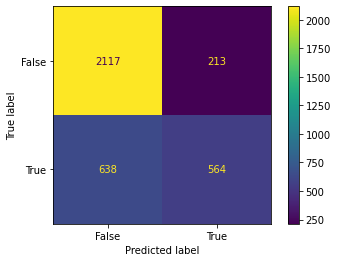

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = ge18_test_raw['cat_bin_actual']
predicted = ge18_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.7590600226500567

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.7258687258687259

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.46921797004991683

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.9085836909871244

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.5699848408287015

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.7590600226500567, 'Precision': 0.7258687258687259, 'Sensitivity_recall': 0.46921797004991683, 'Specificity': 0.9085836909871244, 'F1_score': 0.5699848408287015}


### TEST GE2018 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge18_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1              -1_deutschland_immer_merkel_deutschen
1       0            0_merkel_deutschland_deutschen_deutsche
2       1             1_flüchtlinge_asylanten_asyl_migranten
3       2                2_islam_moslems_muslimischen_moslem
4       3          3_politiker_politik_politikern_demokratie
5       4              4_medien_journalismus_propaganda_news
6       5                            5_grünen_grüne_grün_rot
7       6                   6_türkei_türken_türke_türkischen
8       7                 7_tweet_twitter_facebook_retweeten
9       8                       8_geld_zahlen_millionen_shop
10      9             9_macmike_bka_gutachten_kugelschreiber
11     10                    10_idioten_dumm_dummheit_dummen
12     11               11_islam_moslems_europa_kindergärten
13     12         12_flüchtlinge_italien_italiener_migranten
14     13                    13_nazis_nazi_sprechen_neonazis
15     14          14_israel_jerusalem_palästinenser_israels
16     15                 15_neuwahlen_wähler_fdp_wahlsystem
17     16                          16_bild_bilder_kunst_foto
18     17             17_kirche_verrat_katholischen_religion
19     18               18_syrien_afghanistan_syrer_afghanen
20     19         19_spd_bundesparteitag_verhandlungen_union
21     20              20_polizei_polizisten_banner_polizist
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen
23     22                   22_afrikaner_afrika_china_europa
24     23                 23_russland_putins_russischen_nato
25     24                   24_fresse_gegessen_mad_schnitzel
26     25                      25_mord_märtyrer_töten_mörder
27     26                  26_rainer_trinken_flaschen_wasser
28     27   27_rassismus_rassisten_rassistischen_dargestellt
29     28              28_türken_türkei_türkisch_jahrhundert
30     29           29_terroristen_terror_unterstützung_dieb
31     30               30_jahr_neujahrsempfang_ändern_happy
32     31         31_kommunisten_linke_rebellion_kommunistin
33     32                         32_nacht_abend_gute_lieben
34     33                   33_krieg_nationen_kämpfer_truppe
35     34                  34_waffen_panzer_raketen_munition
36     35                     35_fahren_rnv_autobahnen_hause
37     36      36_familiennachzug_familien_subsidiär_familie
38     37                      37_sport_fußball_köln_abstieg
39     38                38_geblockt_sofort_stunden_gesperrt
40     39                       39_humor_witzig_satire_lacht
41     40            40_regierung_regieren_gewählt_charakter
42     41     41_antisemitismus_antisemitische_daher_artikel
43     42  42_patriotismus_nationalismus_patriotisch_patriot
44     43             43_jamaika_möglich_koalition_gespräche
45     44              44_ausland_unsichere_hast_stromkosten
46     45                   45_berlin_berliner_gipfel_ziehen
47     46     46_steuerzahler_griechen_steuergelder_schulden
48     47             47_katalonien_spanien_spaniens_brüssel

In [ ]:
ge18_test_pred_values_true_pos['Topic'] = ge18_test_pred_values_true_pos.index
ge18_test_pred_values_true_pos

pred    percent  Topic
-1    315  55.851064     -1
 0     92  16.312057      0
 1     26   4.609929      1
 2     21   3.723404      2
 5     16   2.836879      5
 13    13   2.304965     13
 10    10   1.773050     10
 11     8   1.418440     11
 3      7   1.241135      3
 27     6   1.063830     27
 12     6   1.063830     12
 6      4   0.709220      6
 24     4   0.709220     24
 17     3   0.531915     17
 8      3   0.531915      8
 39     3   0.531915     39
 26     2   0.354610     26
 21     2   0.354610     21
 32     2   0.354610     32
 20     2   0.354610     20
 29     2   0.354610     29
 4      2   0.354610      4
 7      2   0.354610      7
 22     2   0.354610     22
 18     2   0.354610     18
 23     1   0.177305     23
 14     1   0.177305     14
 31     1   0.177305     31
 19     1   0.177305     19
 42     1   0.177305     42
 43     1   0.177305     43
 15     1   0.177305     15
 40     1   0.177305     40
 33     1   0.177305     33

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE18TP', 'percent':'%GE18TP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_pos['Topic'] = ge18_test_pred_values_false_pos.index
ge18_test_pred_values_false_pos

pred    percent  Topic
-1    113  53.051643     -1
 0     51  23.943662      0
 1      9   4.225352      1
 5      6   2.816901      5
 2      5   2.347418      2
 26     3   1.408451     26
 8      3   1.408451      8
 27     3   1.408451     27
 11     2   0.938967     11
 45     2   0.938967     45
 7      2   0.938967      7
 18     2   0.938967     18
 13     2   0.938967     13
 23     1   0.469484     23
 31     1   0.469484     31
 39     1   0.469484     39
 21     1   0.469484     21
 12     1   0.469484     12
 14     1   0.469484     14
 24     1   0.469484     24
 46     1   0.469484     46
 33     1   0.469484     33
 16     1   0.469484     16

In [ ]:
df3 = ge18_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE18FP', 'percent':'%GE18FP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_true_neg['Topic'] = ge18_test_pred_values_true_neg.index
ge18_test_pred_values_true_neg

pred    percent  Topic
-1   1241  58.620690     -1
 0    425  20.075579      0
 7     42   1.983940      7
 1     37   1.747756      1
 8     30   1.417100      8
 2     24   1.133680      2
 17    23   1.086443     17
 15    20   0.944733     15
 5     19   0.897496      5
 6     18   0.850260      6
 3     17   0.803023      3
 27    17   0.803023     27
 4     14   0.661313      4
 14    14   0.661313     14
 16    11   0.519603     16
 41    11   0.519603     41
 30     9   0.425130     30
 32     8   0.377893     32
 13     8   0.377893     13
 11     8   0.377893     11
 19     8   0.377893     19
 35     8   0.377893     35
 42     7   0.330657     42
 25     7   0.330657     25
 20     7   0.330657     20
 24     7   0.330657     24
 33     7   0.330657     33
 18     7   0.330657     18
 10     6   0.283420     10
 36     6   0.283420     36
 29     5   0.236183     29
 44     5   0.236183     44
 21     5   0.236183     21
 45     5   0.236183     45
 39     4   0.188947     39
 26     4   0.188947     26
 31     4   0.188947     31
 34     3   0.141710     34
 40     3   0.141710     40
 22     2   0.094473     22
 12     2   0.094473     12
 38     2   0.094473     38
 43     2   0.094473     43
 23     2   0.094473     23
 28     1   0.047237     28
 37     1   0.047237     37
 46     1   0.047237     46

In [ ]:
df4 = ge18_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE18TN', 'percent':'%GE18TN', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_neg['Topic'] = ge18_test_pred_values_false_neg.index
ge18_test_pred_values_false_neg

pred    percent  Topic
-1    360  56.426332     -1
 0    129  20.219436      0
 2     34   5.329154      2
 1     18   2.821317      1
 5     14   2.194357      5
 4      9   1.410658      4
 14     6   0.940439     14
 27     5   0.783699     27
 10     5   0.783699     10
 6      5   0.783699      6
 11     4   0.626959     11
 22     4   0.626959     22
 24     4   0.626959     24
 13     4   0.626959     13
 3      3   0.470219      3
 32     3   0.470219     32
 12     3   0.470219     12
 8      3   0.470219      8
 33     3   0.470219     33
 28     2   0.313480     28
 20     2   0.313480     20
 39     2   0.313480     39
 41     2   0.313480     41
 16     1   0.156740     16
 18     1   0.156740     18
 15     1   0.156740     15
 35     1   0.156740     35
 34     1   0.156740     34
 21     1   0.156740     21
 40     1   0.156740     40
 43     1   0.156740     43
 38     1   0.156740     38
 45     1   0.156740     45
 37     1   0.156740     37
 46     1   0.156740     46
 29     1   0.156740     29
 7      1   0.156740      7

In [ ]:
df5 = ge18_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE18FN', 'percent':'%GE18FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']] = df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%GE18', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE18', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predGE18TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      315.0   
1       0            0_merkel_deutschland_deutschen_deutsche       92.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten       26.0   
3       2                2_islam_moslems_muslimischen_moslem       21.0   
4       3          3_politiker_politik_politikern_demokratie        7.0   
5       4              4_medien_journalismus_propaganda_news        2.0   
6       5                            5_grünen_grüne_grün_rot       16.0   
7       6                   6_türkei_türken_türke_türkischen        4.0   
8       7                 7_tweet_twitter_facebook_retweeten        2.0   
9       8                       8_geld_zahlen_millionen_shop        3.0   
10      9             9_macmike_bka_gutachten_kugelschreiber          0   
11     10                    10_idioten_dumm_dummheit_dummen       10.0   
12     11               11_islam_moslems_europa_kindergärten        8.0   
13     12         12_flüchtlinge_italien_italiener_migranten        6.0   
14     13                    13_nazis_nazi_sprechen_neonazis       13.0   
15     14          14_israel_jerusalem_palästinenser_israels        1.0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem        1.0   
17     16                          16_bild_bilder_kunst_foto          0   
18     17             17_kirche_verrat_katholischen_religion        3.0   
19     18               18_syrien_afghanistan_syrer_afghanen        2.0   
20     19         19_spd_bundesparteitag_verhandlungen_union        1.0   
21     20              20_polizei_polizisten_banner_polizist        2.0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen        2.0   
23     22                   22_afrikaner_afrika_china_europa        2.0   
24     23                 23_russland_putins_russischen_nato        1.0   
25     24                   24_fresse_gegessen_mad_schnitzel        4.0   
26     25                      25_mord_märtyrer_töten_mörder          0   
27     26                  26_rainer_trinken_flaschen_wasser        2.0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt        6.0   
29     28              28_türken_türkei_türkisch_jahrhundert          0   
30     29           29_terroristen_terror_unterstützung_dieb        2.0   
31     30               30_jahr_neujahrsempfang_ändern_happy          0   
32     31         31_kommunisten_linke_rebellion_kommunistin        1.0   
33     32                         32_nacht_abend_gute_lieben        2.0   
34     33                   33_krieg_nationen_kämpfer_truppe        1.0   
35     34                  34_waffen_panzer_raketen_munition          0   
36     35                     35_fahren_rnv_autobahnen_hause          0   
37     36      36_familiennachzug_familien_subsidiär_familie          0   
38     37                      37_sport_fußball_köln_abstieg          0   
39     38                38_geblockt_sofort_stunden_gesperrt          0   
40     39                       39_humor_witzig_satire_lacht        3.0   
41     40            40_regierung_regieren_gewählt_charakter        1.0   
42     41     41_antisemitismus_antisemitische_daher_artikel          0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot        1.0   
44     43             43_jamaika_möglich_koalition_gespräche        1.0   
45     44              44_ausland_unsichere_hast_stromkosten          0   
46     45                   45_berlin_berliner_gipfel_ziehen          0   
47     46     46_steuerzahler_griechen_steuergelder_schulden          0   
48     47             47_katalonien_spanien_spaniens_brüssel          0   

    %GE18TP predGE18FP  %GE18FP predGE18TN  %GE18TN predGE18FN  %GE18FN  
0     55.85      113.0    53.05     1241.0    58.62      360.0    56.43  
1     16.31       51.0    23.94      425.0    20.08      129.0    20.22  
2      4.61        9.0     4.23

In [ ]:
df_merged

Topic                                               Name predGE18TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      315.0   
1       0            0_merkel_deutschland_deutschen_deutsche       92.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten       26.0   
3       2                2_islam_moslems_muslimischen_moslem       21.0   
4       3          3_politiker_politik_politikern_demokratie        7.0   
5       4              4_medien_journalismus_propaganda_news        2.0   
6       5                            5_grünen_grüne_grün_rot       16.0   
7       6                   6_türkei_türken_türke_türkischen        4.0   
8       7                 7_tweet_twitter_facebook_retweeten        2.0   
9       8                       8_geld_zahlen_millionen_shop        3.0   
10      9             9_macmike_bka_gutachten_kugelschreiber          0   
11     10                    10_idioten_dumm_dummheit_dummen       10.0   
12     11               11_islam_moslems_europa_kindergärten        8.0   
13     12         12_flüchtlinge_italien_italiener_migranten        6.0   
14     13                    13_nazis_nazi_sprechen_neonazis       13.0   
15     14          14_israel_jerusalem_palästinenser_israels        1.0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem        1.0   
17     16                          16_bild_bilder_kunst_foto          0   
18     17             17_kirche_verrat_katholischen_religion        3.0   
19     18               18_syrien_afghanistan_syrer_afghanen        2.0   
20     19         19_spd_bundesparteitag_verhandlungen_union        1.0   
21     20              20_polizei_polizisten_banner_polizist        2.0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen        2.0   
23     22                   22_afrikaner_afrika_china_europa        2.0   
24     23                 23_russland_putins_russischen_nato        1.0   
25     24                   24_fresse_gegessen_mad_schnitzel        4.0   
26     25                      25_mord_märtyrer_töten_mörder          0   
27     26                  26_rainer_trinken_flaschen_wasser        2.0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt        6.0   
29     28              28_türken_türkei_türkisch_jahrhundert          0   
30     29           29_terroristen_terror_unterstützung_dieb        2.0   
31     30               30_jahr_neujahrsempfang_ändern_happy          0   
32     31         31_kommunisten_linke_rebellion_kommunistin        1.0   
33     32                         32_nacht_abend_gute_lieben        2.0   
34     33                   33_krieg_nationen_kämpfer_truppe        1.0   
35     34                  34_waffen_panzer_raketen_munition          0   
36     35                     35_fahren_rnv_autobahnen_hause          0   
37     36      36_familiennachzug_familien_subsidiär_familie          0   
38     37                      37_sport_fußball_köln_abstieg          0   
39     38                38_geblockt_sofort_stunden_gesperrt          0   
40     39                       39_humor_witzig_satire_lacht        3.0   
41     40            40_regierung_regieren_gewählt_charakter        1.0   
42     41     41_antisemitismus_antisemitische_daher_artikel          0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot        1.0   
44     43             43_jamaika_möglich_koalition_gespräche        1.0   
45     44              44_ausland_unsichere_hast_stromkosten          0   
46     45                   45_berlin_berliner_gipfel_ziehen          0   
47     46     46_steuerzahler_griechen_steuergelder_schulden          0   
48     47             47_katalonien_spanien_spaniens_brüssel          0   

    %GE18TP predGE18FP  %GE18FP predGE18TN  %GE18TN predGE18FN  %GE18FN  
0     55.85      113.0    53.05     1241.0    58.62      360.0    56.43  
1     16.31       51.0    23.94      425.0    20.08      129.0    20.22  
2      4.61        9.0     4.23

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE18TP": int, "predGE18TN":int, "predGE18FP":int, "predGE18FN":int})
df_merged

Topic                                               Name  predGE18TP  \
0      -1              -1_deutschland_immer_merkel_deutschen         315   
1       0            0_merkel_deutschland_deutschen_deutsche          92   
2       1             1_flüchtlinge_asylanten_asyl_migranten          26   
3       2                2_islam_moslems_muslimischen_moslem          21   
4       3          3_politiker_politik_politikern_demokratie           7   
5       4              4_medien_journalismus_propaganda_news           2   
6       5                            5_grünen_grüne_grün_rot          16   
7       6                   6_türkei_türken_türke_türkischen           4   
8       7                 7_tweet_twitter_facebook_retweeten           2   
9       8                       8_geld_zahlen_millionen_shop           3   
10      9             9_macmike_bka_gutachten_kugelschreiber           0   
11     10                    10_idioten_dumm_dummheit_dummen          10   
12     11               11_islam_moslems_europa_kindergärten           8   
13     12         12_flüchtlinge_italien_italiener_migranten           6   
14     13                    13_nazis_nazi_sprechen_neonazis          13   
15     14          14_israel_jerusalem_palästinenser_israels           1   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem           1   
17     16                          16_bild_bilder_kunst_foto           0   
18     17             17_kirche_verrat_katholischen_religion           3   
19     18               18_syrien_afghanistan_syrer_afghanen           2   
20     19         19_spd_bundesparteitag_verhandlungen_union           1   
21     20              20_polizei_polizisten_banner_polizist           2   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen           2   
23     22                   22_afrikaner_afrika_china_europa           2   
24     23                 23_russland_putins_russischen_nato           1   
25     24                   24_fresse_gegessen_mad_schnitzel           4   
26     25                      25_mord_märtyrer_töten_mörder           0   
27     26                  26_rainer_trinken_flaschen_wasser           2   
28     27   27_rassismus_rassisten_rassistischen_dargestellt           6   
29     28              28_türken_türkei_türkisch_jahrhundert           0   
30     29           29_terroristen_terror_unterstützung_dieb           2   
31     30               30_jahr_neujahrsempfang_ändern_happy           0   
32     31         31_kommunisten_linke_rebellion_kommunistin           1   
33     32                         32_nacht_abend_gute_lieben           2   
34     33                   33_krieg_nationen_kämpfer_truppe           1   
35     34                  34_waffen_panzer_raketen_munition           0   
36     35                     35_fahren_rnv_autobahnen_hause           0   
37     36      36_familiennachzug_familien_subsidiär_familie           0   
38     37                      37_sport_fußball_köln_abstieg           0   
39     38                38_geblockt_sofort_stunden_gesperrt           0   
40     39                       39_humor_witzig_satire_lacht           3   
41     40            40_regierung_regieren_gewählt_charakter           1   
42     41     41_antisemitismus_antisemitische_daher_artikel           0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot           1   
44     43             43_jamaika_möglich_koalition_gespräche           1   
45     44              44_ausland_unsichere_hast_stromkosten           0   
46     45                   45_berlin_berliner_gipfel_ziehen           0   
47     46     46_steuerzahler_griechen_steuergelder_schulden           0   
48     47             47_katalonien_spanien_spaniens_brüssel           0   

    %GE18TP  predGE18FP  %GE18FP  predGE18TN  %GE18TN  predGE18FN  %GE18FN  
0     55.85         113    53.05        1241    58.62         360    56.43  
1     16.31          51    23.94         425    2

In [ ]:
df_percent = df_merged[['Topic','%GE18TP', '%GE18TN','%GE18FP', '%GE18FN','Name']]
df_percent

Topic  %GE18TP  %GE18TN  %GE18FP  %GE18FN  \
0      -1    55.85    58.62    53.05    56.43   
1       0    16.31    20.08    23.94    20.22   
2       1     4.61     1.75     4.23     2.82   
3       2     3.72     1.13     2.35     5.33   
4       3     1.24     0.80     0.00     0.47   
5       4     0.35     0.66     0.00     1.41   
6       5     2.84     0.90     2.82     2.19   
7       6     0.71     0.85     0.00     0.78   
8       7     0.35     1.98     0.94     0.16   
9       8     0.53     1.42     1.41     0.47   
10      9     0.00     0.00     0.00     0.00   
11     10     1.77     0.28     0.00     0.78   
12     11     1.42     0.38     0.94     0.63   
13     12     1.06     0.09     0.47     0.47   
14     13     2.30     0.38     0.94     0.63   
15     14     0.18     0.66     0.47     0.94   
16     15     0.18     0.94     0.00     0.16   
17     16     0.00     0.52     0.47     0.16   
18     17     0.53     1.09     0.00     0.00   
19     18     0.35     0.33     0.94     0.16   
20     19     0.18     0.38     0.00     0.00   
21     20     0.35     0.33     0.00     0.31   
22     21     0.35     0.24     0.47     0.16   
23     22     0.35     0.09     0.00     0.63   
24     23     0.18     0.09     0.47     0.00   
25     24     0.71     0.33     0.47     0.63   
26     25     0.00     0.33     0.00     0.00   
27     26     0.35     0.19     1.41     0.00   
28     27     1.06     0.80     1.41     0.78   
29     28     0.00     0.05     0.00     0.31   
30     29     0.35     0.24     0.00     0.16   
31     30     0.00     0.43     0.00     0.00   
32     31     0.18     0.19     0.47     0.00   
33     32     0.35     0.38     0.00     0.47   
34     33     0.18     0.33     0.47     0.47   
35     34     0.00     0.14     0.00     0.16   
36     35     0.00     0.38     0.00     0.16   
37     36     0.00     0.28     0.00     0.00   
38     37     0.00     0.05     0.00     0.16   
39     38     0.00     0.09     0.00     0.16   
40     39     0.53     0.19     0.47     0.31   
41     40     0.18     0.14     0.00     0.16   
42     41     0.00     0.52     0.00     0.31   
43     42     0.18     0.33     0.00     0.00   
44     43     0.18     0.09     0.00     0.16   
45     44     0.00     0.24     0.00     0.00   
46     45     0.00     0.24     0.94     0.16   
47     46     0.00     0.05     0.47     0.16   
48     47     0.00     0.00     0.00     0.00   

                                                 Name  
0               -1_deutschland_immer_merkel_deutschen  
1             0_merkel_deutschland_deutschen_deutsche  
2              1_flüchtlinge_asylanten_asyl_migranten  
3                 2_islam_moslems_muslimischen_moslem  
4           3_politiker_politik_politikern_demokratie  
5               4_medien_journalismus_propaganda_news  
6                             5_grünen_grüne_grün_rot  
7                    6_türkei_türken_türke_türkischen  
8                  7_tweet_twitter_facebook_retweeten  
9                        8_geld_zahlen_millionen_shop  
10             9_macmike_bka_gutachten_kugelschreiber  
11                    10_idioten_dumm_dummheit_dummen  
12               11_islam_moslems_europa_kindergärten  
13         12_flüchtlinge_italien_italiener_migranten  
14                    13_nazis_nazi_sprechen_neonazis  
15          14_israel_jerusalem_palästinenser_israels  
16                 15_neuwahlen_wähler_fdp_wahlsystem  
17                          16_bild_bilder_kunst_foto  
18             17_kirche_verrat_katholischen_religion  
19               18_syrien_afghanistan_syrer_afghanen  
20         19_spd_bundesparteitag_verhandlungen_union  
21              20_polizei_polizisten_banner_polizist  
22    21_schulabschluss_schulz_sitzengeblieben_sitzen  
23                   22_afrikaner_afrika_china_europa  
24                 23_russland_putins_russischen_nato  
25                   24_fresse_gegessen_mad_schnitzel  
26                      25_mord_märtyrer_

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

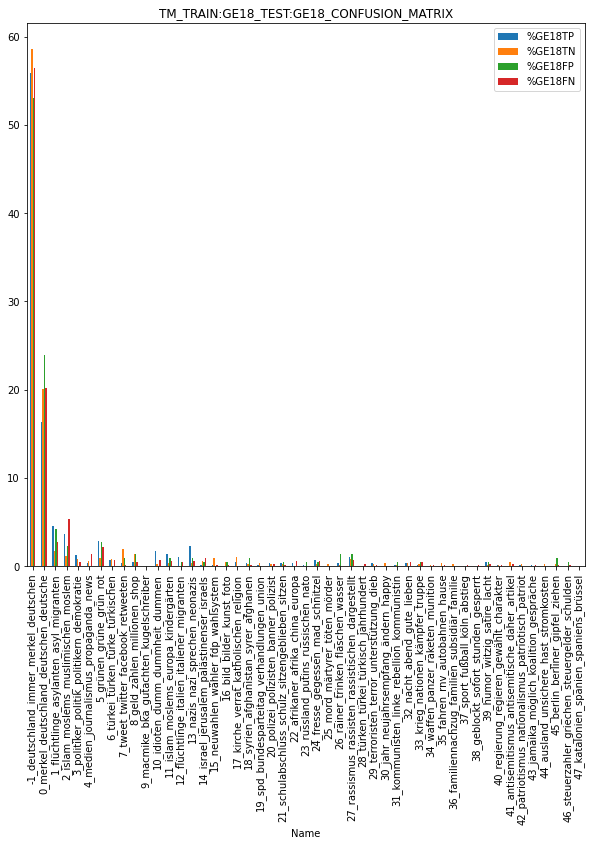

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX.plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:GE18_CONFUSION_MATRIX")

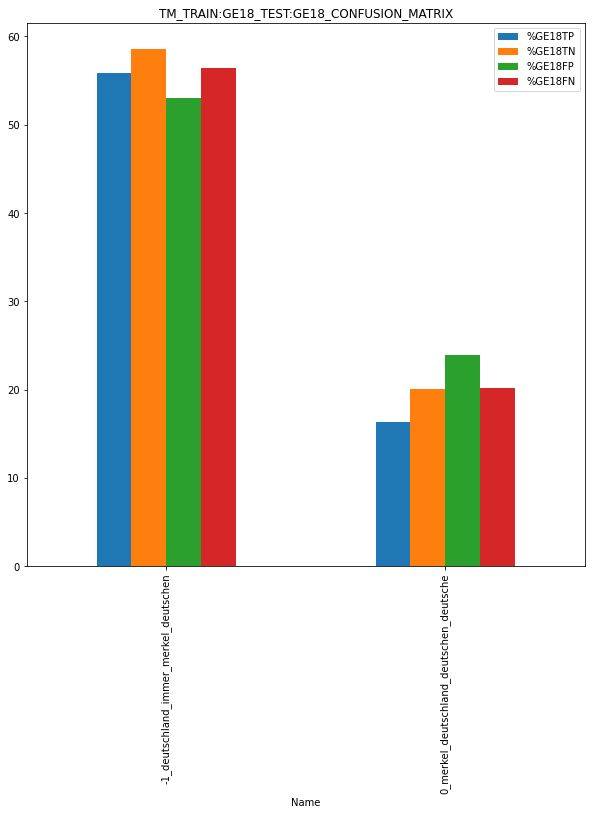

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:GE18_CONFUSION_MATRIX")

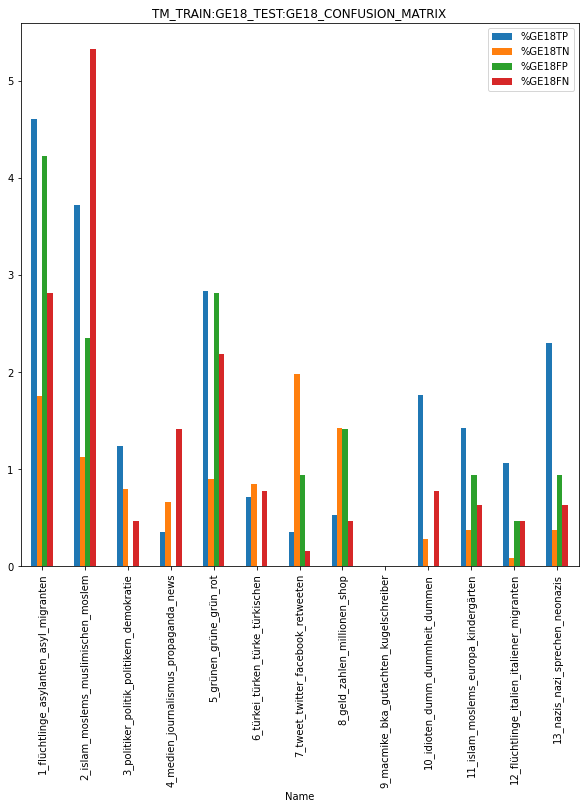

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:GE18_CONFUSION_MATRIX")

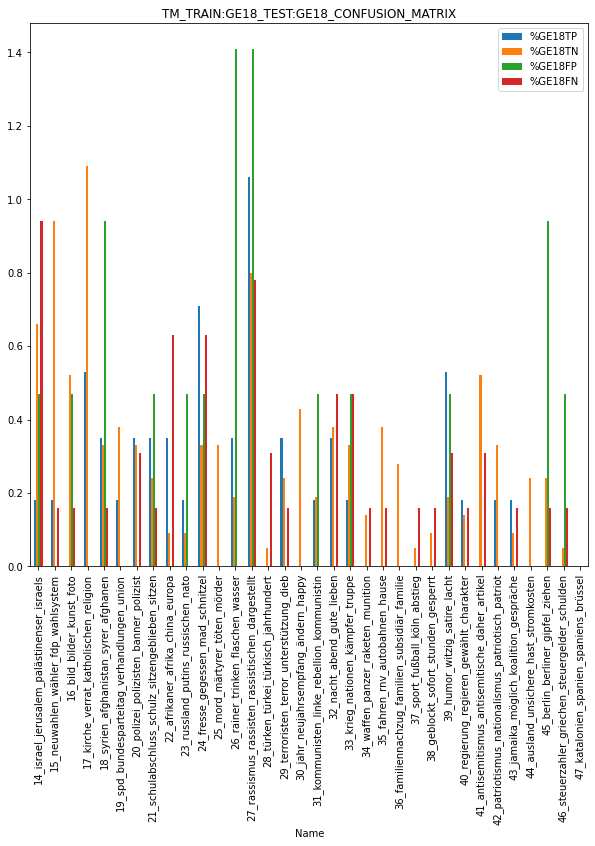

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:GE18_CONFUSION_MATRIX")

### Test GE2019

In [ ]:
train_ge18_class_ge19 = pd.read_csv('/content/submission_DE_A_HASOCOne_german_task_a_GermEval2018_GE2019.csv')
train_ge18_class_ge19

index_col    task1  index_col.1
0             0    OTHER            0
1             1    OTHER            1
2             2    OTHER            2
3             3    OTHER            3
4             4  OFFENSE            4
...         ...      ...          ...
3026       3026    OTHER         3026
3027       3027    OTHER         3027
3028       3028    OTHER         3028
3029       3029    OTHER         3029
3030       3030    OTHER         3030

[3031 rows x 3 columns]

In [ ]:
ge19_test_class_values = pd.DataFrame(train_ge18_class_ge19['task1'].value_counts())
ge19_test_class_values

task1
OTHER     2413
OFFENSE    618

In [ ]:

ge19_test_raw['class'] = train_ge18_class_ge19['task1']
ge19_test_raw

TWEET      OFF     CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE  INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE   ABUSE   
2     @DLFNachrichten Die Gesichter, Namen, Religion...    OTHER   OTHER   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE   ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
3026  Es fand aber nie eine Emanzipierungs-Phase der...    OTHER   OTHER   
3027  Um es klar zu stellen: Ich will hier kein Whit...    OTHER   OTHER   
3028  Und dann habe ich da noch die McArthur-Briefe ...    OTHER   OTHER   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...    OTHER   OTHER   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...    OTHER   OTHER   

      pred    class  
0       -1    OTHER  
1       -1    OTHER  
2        0    OTHER  
3       -1    OTHER  
4       -1  OFFENSE  
...    ...      ...  
3026     6    OTHER  
3027    -1    OTHER  
3028    -1    OTHER  
3029    -1    OTHER  
3030    -1    OTHER  

[3031 rows x 5 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge19_test_true_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 'OFFENSE')]
ge19_test_true_pos

TWEET      OFF     CAT  \
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE   ABUSE   
7     @StZ_NEWS Schäuble wird wissen woher dieses Na...  OFFENSE   ABUSE   
8     @welt Komisch, wäre dieser Betrug in der Nähe ...  OFFENSE   ABUSE   
14    @focusonline Wie war noch der Stasi Auftrag vo...  OFFENSE   ABUSE   
16    @hessenschau Komisch, wäre es die AfD gebe es ...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
2864  So wie ich das sehe wenn ich mir die Bilder vo...  OFFENSE   ABUSE   
2881  Während #Merkel #CemOEzdemir #Steinmeier mit #...  OFFENSE   ABUSE   
2884  Sogenannte Aktivisten im #HambacherForst sind ...  OFFENSE  INSULT   
2886  Ich kann nachvollziehen dass seriöse Medien ka...  OFFENSE  INSULT   
2976  @sixtus Irgend so ein charakterloser brauner M...  OFFENSE  INSULT   

      pred    class  
4       -1  OFFENSE  
7       13  OFFENSE  
8       10  OFFENSE  
14      -1  OFFENSE  
16      -1  OFFENSE  
...    ...      ...  
2864    20  OFFENSE  
2881    29  OFFENSE  
2884    -1  OFFENSE  
2886    -1  OFFENSE  
2976    24  OFFENSE  

[432 rows x 5 columns]

In [ ]:
ge19_test_pred_values_true_pos = pd.DataFrame(ge19_test_true_pos['pred'].value_counts())
ge19_test_pred_values_true_pos['percent'] = (ge19_test_pred_values_true_pos['pred'] / ge19_test_pred_values_true_pos['pred'].sum()) * 100
ge19_test_pred_values_true_pos

pred    percent
-1    268  62.037037
 0     42   9.722222
 13    22   5.092593
 10    11   2.546296
 2     10   2.314815
 1      8   1.851852
 5      7   1.620370
 27     6   1.388889
 14     4   0.925926
 11     4   0.925926
 3      4   0.925926
 29     3   0.694444
 41     3   0.694444
 24     3   0.694444
 16     3   0.694444
 20     3   0.694444
 7      3   0.694444
 4      2   0.462963
 9      2   0.462963
 28     2   0.462963
 19     2   0.462963
 8      2   0.462963
 12     2   0.462963
 34     2   0.462963
 23     2   0.462963
 31     1   0.231481
 25     1   0.231481
 37     1   0.231481
 46     1   0.231481
 6      1   0.231481
 15     1   0.231481
 45     1   0.231481
 21     1   0.231481
 38     1   0.231481
 18     1   0.231481
 26     1   0.231481
 39     1   0.231481

In [ ]:
ge19_test_false_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 'OFFENSE')]
ge19_test_false_pos

TWEET    OFF    CAT  pred  \
97    @bzberlin Klar dass dies den linken Missfällt....  OTHER  OTHER    -1   
112   @SPIEGELONLINE Mann kann es nicht mehr hören s...  OTHER  OTHER    -1   
144   Dem muss sich eine Genderbeauftragende dringen...  OTHER  OTHER    -1   
151   @gundel_gaukeley @KoyamaMichi Ihr versteht hal...  OTHER  OTHER     2   
156   Europa ist bunt genug. |LBR| Rothaarige, Blond...  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
2805  @MelaK96 @welt Klar, wissen wir doch, dass die...  OTHER  OTHER    -1   
2836  Was ein Dummgeschwätz mal wieder bei #hartaber...  OTHER  OTHER    -1   
2921  An Uni #Bochum sammelten Islamisten Spenden vo...  OTHER  OTHER     2   
2941  Vormerken: 11.12., CafeExzess #Ffm: POETRY SLA...  OTHER  OTHER    -1   
3019  Und btw. es gibt Juden/Muslime, die das NICHT ...  OTHER  OTHER    -1   

        class  
97    OFFENSE  
112   OFFENSE  
144   OFFENSE  
151   OFFENSE  
156   OFFENSE  
...       ...  
2805  OFFENSE  
2836  OFFENSE  
2921  OFFENSE  
2941  OFFENSE  
3019  OFFENSE  

[186 rows x 5 columns]

In [ ]:
ge19_test_pred_values_false_pos = pd.DataFrame(ge19_test_false_pos['pred'].value_counts())
ge19_test_pred_values_false_pos['percent'] = (ge19_test_pred_values_false_pos['pred'] / ge19_test_pred_values_false_pos['pred'].sum()) * 100
ge19_test_pred_values_false_pos

pred    percent
-1    122  65.591398
 0     24  12.903226
 13     7   3.763441
 2      7   3.763441
 31     5   2.688172
 27     5   2.688172
 1      2   1.075269
 22     2   1.075269
 23     2   1.075269
 7      2   1.075269
 3      2   1.075269
 26     1   0.537634
 8      1   0.537634
 9      1   0.537634
 10     1   0.537634
 4      1   0.537634
 11     1   0.537634

In [ ]:
ge19_test_true_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 'OTHER')]
ge19_test_true_neg

TWEET    OFF    CAT  pred  \
2     @DLFNachrichten Die Gesichter, Namen, Religion...  OTHER  OTHER     0   
5     @aktuelle_stunde Also beim Fall Birmingham, En...  OTHER  OTHER    -1   
6     @StZ_NEWS Aber bei läppischen 130.000 Euro der...  OTHER  OTHER    -1   
12    @BR24 Wie viele werden durch Gas Unfälle getöt...  OTHER  OTHER    35   
25    @TAG24LE Wenn sich Linke Linke zu Feinden mach...  OTHER  OTHER     0   
...                                                 ...    ...    ...   ...   
3026  Es fand aber nie eine Emanzipierungs-Phase der...  OTHER  OTHER     6   
3027  Um es klar zu stellen: Ich will hier kein Whit...  OTHER  OTHER    -1   
3028  Und dann habe ich da noch die McArthur-Briefe ...  OTHER  OTHER    -1   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...  OTHER  OTHER    -1   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...  OTHER  OTHER    -1   

      class  
2     OTHER  
5     OTHER  
6     OTHER  
12    OTHER  
25    OTHER  
...     ...  
3026  OTHER  
3027  OTHER  
3028  OTHER  
3029  OTHER  
3030  OTHER  

[1875 rows x 5 columns]

In [ ]:
ge19_test_pred_values_true_neg = pd.DataFrame(ge19_test_true_neg['pred'].value_counts())
ge19_test_pred_values_true_neg['percent'] = (ge19_test_pred_values_true_neg['pred'] / ge19_test_pred_values_true_neg['pred'].sum()) * 100
ge19_test_pred_values_true_neg

pred    percent
-1   1116  59.520000
 0    318  16.960000
 7     68   3.626667
 8     38   2.026667
 31    26   1.386667
 14    21   1.120000
 1     20   1.066667
 44    17   0.906667
 26    16   0.853333
 3     15   0.800000
 13    15   0.800000
 4     14   0.746667
 16    14   0.746667
 27    14   0.746667
 24    13   0.693333
 39    12   0.640000
 20    11   0.586667
 15    10   0.533333
 6     10   0.533333
 35     9   0.480000
 41     8   0.426667
 2      7   0.373333
 32     7   0.373333
 33     7   0.373333
 29     6   0.320000
 25     6   0.320000
 10     5   0.266667
 19     5   0.266667
 12     5   0.266667
 9      4   0.213333
 42     4   0.213333
 34     4   0.213333
 5      4   0.213333
 23     4   0.213333
 36     3   0.160000
 18     3   0.160000
 30     3   0.160000
 11     3   0.160000
 38     3   0.160000
 46     2   0.106667
 40     2   0.106667
 17     1   0.053333
 21     1   0.053333
 45     1   0.053333

In [ ]:
ge19_test_false_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 'OTHER')]
ge19_test_false_neg

TWEET      OFF        CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE     INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE      ABUSE   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE      ABUSE   
9     @investigativ_de @welt @Tim_Roehn @ChSchweppe ...  OFFENSE      ABUSE   
10    @rbbabendschau Nun, Eigentum verpflichtet, das...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
2888  Einfach nur peinlich wie sich sogenannte Aktiv...  OFFENSE     INSULT   
2889  Diese sogenannten Aktivisten sind Straftäter d...  OFFENSE      ABUSE   
2949    #Erdogan ist einfach eine Pest für die #Türkei.  OFFENSE     INSULT   
2978  Das mag dem einen oder anderen harsch vorkomme...  OFFENSE     INSULT   
2988  Ich frage mich mittlerweile was Saudi Arabien ...  OFFENSE  PROFANITY   

      pred  class  
0       -1  OTHER  
1       -1  OTHER  
3       -1  OTHER  
9       -1  OTHER  
10       0  OTHER  
...    ...    ...  
2888    -1  OTHER  
2889    -1  OTHER  
2949     6  OTHER  
2978    -1  OTHER  
2988    -1  OTHER  

[538 rows x 5 columns]

In [ ]:
ge19_test_pred_values_false_neg = pd.DataFrame(ge19_test_false_neg['pred'].value_counts())
ge19_test_pred_values_false_neg['percent'] = (ge19_test_pred_values_false_neg['pred'] / ge19_test_pred_values_false_neg['pred'].sum()) * 100
ge19_test_pred_values_false_neg

pred    percent
-1    317  58.921933
 0     66  12.267658
 1     15   2.788104
 10    14   2.602230
 4     13   2.416357
 31    10   1.858736
 24     8   1.486989
 14     8   1.486989
 13     8   1.486989
 7      8   1.486989
 8      7   1.301115
 21     6   1.115242
 5      6   1.115242
 2      5   0.929368
 22     5   0.929368
 39     4   0.743494
 20     4   0.743494
 3      4   0.743494
 16     3   0.557621
 29     3   0.557621
 11     3   0.557621
 25     3   0.557621
 41     3   0.557621
 15     2   0.371747
 12     2   0.371747
 18     1   0.185874
 27     1   0.185874
 19     1   0.185874
 36     1   0.185874
 35     1   0.185874
 34     1   0.185874
 23     1   0.185874
 17     1   0.185874
 46     1   0.185874
 40     1   0.185874
 6      1   0.185874

In [ ]:
ge19_test_raw['cat_bin_actual'] = ge19_test_raw['OFF'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)
ge19_test_raw['cat_bin_predicted'] = ge19_test_raw['class'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)


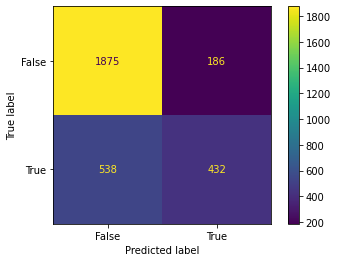

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
#import matplotlib.pyplot as plt
#import numpy
#from sklearn import metrics

actual = ge19_test_raw['cat_bin_actual']
predicted = ge19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.7611349389640383

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.6990291262135923

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.44536082474226807

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.9097525473071325

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.5440806045340051

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.7611349389640383, 'Precision': 0.6990291262135923, 'Sensitivity_recall': 0.44536082474226807, 'Specificity': 0.9097525473071325, 'F1_score': 0.5440806045340051}


### TEST GE2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge18_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1              -1_deutschland_immer_merkel_deutschen
1       0            0_merkel_deutschland_deutschen_deutsche
2       1             1_flüchtlinge_asylanten_asyl_migranten
3       2                2_islam_moslems_muslimischen_moslem
4       3          3_politiker_politik_politikern_demokratie
5       4              4_medien_journalismus_propaganda_news
6       5                            5_grünen_grüne_grün_rot
7       6                   6_türkei_türken_türke_türkischen
8       7                 7_tweet_twitter_facebook_retweeten
9       8                       8_geld_zahlen_millionen_shop
10      9             9_macmike_bka_gutachten_kugelschreiber
11     10                    10_idioten_dumm_dummheit_dummen
12     11               11_islam_moslems_europa_kindergärten
13     12         12_flüchtlinge_italien_italiener_migranten
14     13                    13_nazis_nazi_sprechen_neonazis
15     14          14_israel_jerusalem_palästinenser_israels
16     15                 15_neuwahlen_wähler_fdp_wahlsystem
17     16                          16_bild_bilder_kunst_foto
18     17             17_kirche_verrat_katholischen_religion
19     18               18_syrien_afghanistan_syrer_afghanen
20     19         19_spd_bundesparteitag_verhandlungen_union
21     20              20_polizei_polizisten_banner_polizist
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen
23     22                   22_afrikaner_afrika_china_europa
24     23                 23_russland_putins_russischen_nato
25     24                   24_fresse_gegessen_mad_schnitzel
26     25                      25_mord_märtyrer_töten_mörder
27     26                  26_rainer_trinken_flaschen_wasser
28     27   27_rassismus_rassisten_rassistischen_dargestellt
29     28              28_türken_türkei_türkisch_jahrhundert
30     29           29_terroristen_terror_unterstützung_dieb
31     30               30_jahr_neujahrsempfang_ändern_happy
32     31         31_kommunisten_linke_rebellion_kommunistin
33     32                         32_nacht_abend_gute_lieben
34     33                   33_krieg_nationen_kämpfer_truppe
35     34                  34_waffen_panzer_raketen_munition
36     35                     35_fahren_rnv_autobahnen_hause
37     36      36_familiennachzug_familien_subsidiär_familie
38     37                      37_sport_fußball_köln_abstieg
39     38                38_geblockt_sofort_stunden_gesperrt
40     39                       39_humor_witzig_satire_lacht
41     40            40_regierung_regieren_gewählt_charakter
42     41     41_antisemitismus_antisemitische_daher_artikel
43     42  42_patriotismus_nationalismus_patriotisch_patriot
44     43             43_jamaika_möglich_koalition_gespräche
45     44              44_ausland_unsichere_hast_stromkosten
46     45                   45_berlin_berliner_gipfel_ziehen
47     46     46_steuerzahler_griechen_steuergelder_schulden
48     47             47_katalonien_spanien_spaniens_brüssel

In [ ]:
ge19_test_pred_values_true_pos['Topic'] = ge19_test_pred_values_true_pos.index
ge19_test_pred_values_true_pos

pred    percent  Topic
-1    268  62.037037     -1
 0     42   9.722222      0
 13    22   5.092593     13
 10    11   2.546296     10
 2     10   2.314815      2
 1      8   1.851852      1
 5      7   1.620370      5
 27     6   1.388889     27
 14     4   0.925926     14
 11     4   0.925926     11
 3      4   0.925926      3
 29     3   0.694444     29
 41     3   0.694444     41
 24     3   0.694444     24
 16     3   0.694444     16
 20     3   0.694444     20
 7      3   0.694444      7
 4      2   0.462963      4
 9      2   0.462963      9
 28     2   0.462963     28
 19     2   0.462963     19
 8      2   0.462963      8
 12     2   0.462963     12
 34     2   0.462963     34
 23     2   0.462963     23
 31     1   0.231481     31
 25     1   0.231481     25
 37     1   0.231481     37
 46     1   0.231481     46
 6      1   0.231481      6
 15     1   0.231481     15
 45     1   0.231481     45
 21     1   0.231481     21
 38     1   0.231481     38
 18     1   0.231481     18
 26     1   0.231481     26
 39     1   0.231481     39

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE19TP', 'percent':'%GE19TP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_pos['Topic'] = ge19_test_pred_values_false_pos.index
ge19_test_pred_values_false_pos

pred    percent  Topic
-1    122  65.591398     -1
 0     24  12.903226      0
 13     7   3.763441     13
 2      7   3.763441      2
 31     5   2.688172     31
 27     5   2.688172     27
 1      2   1.075269      1
 22     2   1.075269     22
 23     2   1.075269     23
 7      2   1.075269      7
 3      2   1.075269      3
 26     1   0.537634     26
 8      1   0.537634      8
 9      1   0.537634      9
 10     1   0.537634     10
 4      1   0.537634      4
 11     1   0.537634     11

In [ ]:
df3 = ge19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE19FP', 'percent':'%GE19FP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_true_neg['Topic'] = ge19_test_pred_values_true_neg.index
ge19_test_pred_values_true_neg

pred    percent  Topic
-1   1116  59.520000     -1
 0    318  16.960000      0
 7     68   3.626667      7
 8     38   2.026667      8
 31    26   1.386667     31
 14    21   1.120000     14
 1     20   1.066667      1
 44    17   0.906667     44
 26    16   0.853333     26
 3     15   0.800000      3
 13    15   0.800000     13
 4     14   0.746667      4
 16    14   0.746667     16
 27    14   0.746667     27
 24    13   0.693333     24
 39    12   0.640000     39
 20    11   0.586667     20
 15    10   0.533333     15
 6     10   0.533333      6
 35     9   0.480000     35
 41     8   0.426667     41
 2      7   0.373333      2
 32     7   0.373333     32
 33     7   0.373333     33
 29     6   0.320000     29
 25     6   0.320000     25
 10     5   0.266667     10
 19     5   0.266667     19
 12     5   0.266667     12
 9      4   0.213333      9
 42     4   0.213333     42
 34     4   0.213333     34
 5      4   0.213333      5
 23     4   0.213333     23
 36     3   0.160000     36
 18     3   0.160000     18
 30     3   0.160000     30
 11     3   0.160000     11
 38     3   0.160000     38
 46     2   0.106667     46
 40     2   0.106667     40
 17     1   0.053333     17
 21     1   0.053333     21
 45     1   0.053333     45

In [ ]:
df4 = ge19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE19TN', 'percent':'%GE19TN', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_neg['Topic'] = ge19_test_pred_values_false_neg.index
ge19_test_pred_values_false_neg

pred    percent  Topic
-1    317  58.921933     -1
 0     66  12.267658      0
 1     15   2.788104      1
 10    14   2.602230     10
 4     13   2.416357      4
 31    10   1.858736     31
 24     8   1.486989     24
 14     8   1.486989     14
 13     8   1.486989     13
 7      8   1.486989      7
 8      7   1.301115      8
 21     6   1.115242     21
 5      6   1.115242      5
 2      5   0.929368      2
 22     5   0.929368     22
 39     4   0.743494     39
 20     4   0.743494     20
 3      4   0.743494      3
 16     3   0.557621     16
 29     3   0.557621     29
 11     3   0.557621     11
 25     3   0.557621     25
 41     3   0.557621     41
 15     2   0.371747     15
 12     2   0.371747     12
 18     1   0.185874     18
 27     1   0.185874     27
 19     1   0.185874     19
 36     1   0.185874     36
 35     1   0.185874     35
 34     1   0.185874     34
 23     1   0.185874     23
 17     1   0.185874     17
 46     1   0.185874     46
 40     1   0.185874     40
 6      1   0.185874      6

In [ ]:
df5 = ge19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE19FN', 'percent':'%GE19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']] = df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%GE19', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE19', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predGE19TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      268.0   
1       0            0_merkel_deutschland_deutschen_deutsche       42.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten        8.0   
3       2                2_islam_moslems_muslimischen_moslem       10.0   
4       3          3_politiker_politik_politikern_demokratie        4.0   
5       4              4_medien_journalismus_propaganda_news        2.0   
6       5                            5_grünen_grüne_grün_rot        7.0   
7       6                   6_türkei_türken_türke_türkischen        1.0   
8       7                 7_tweet_twitter_facebook_retweeten        3.0   
9       8                       8_geld_zahlen_millionen_shop        2.0   
10      9             9_macmike_bka_gutachten_kugelschreiber        2.0   
11     10                    10_idioten_dumm_dummheit_dummen       11.0   
12     11               11_islam_moslems_europa_kindergärten        4.0   
13     12         12_flüchtlinge_italien_italiener_migranten        2.0   
14     13                    13_nazis_nazi_sprechen_neonazis       22.0   
15     14          14_israel_jerusalem_palästinenser_israels        4.0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem        1.0   
17     16                          16_bild_bilder_kunst_foto        3.0   
18     17             17_kirche_verrat_katholischen_religion          0   
19     18               18_syrien_afghanistan_syrer_afghanen        1.0   
20     19         19_spd_bundesparteitag_verhandlungen_union        2.0   
21     20              20_polizei_polizisten_banner_polizist        3.0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen        1.0   
23     22                   22_afrikaner_afrika_china_europa          0   
24     23                 23_russland_putins_russischen_nato        2.0   
25     24                   24_fresse_gegessen_mad_schnitzel        3.0   
26     25                      25_mord_märtyrer_töten_mörder        1.0   
27     26                  26_rainer_trinken_flaschen_wasser        1.0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt        6.0   
29     28              28_türken_türkei_türkisch_jahrhundert        2.0   
30     29           29_terroristen_terror_unterstützung_dieb        3.0   
31     30               30_jahr_neujahrsempfang_ändern_happy          0   
32     31         31_kommunisten_linke_rebellion_kommunistin        1.0   
33     32                         32_nacht_abend_gute_lieben          0   
34     33                   33_krieg_nationen_kämpfer_truppe          0   
35     34                  34_waffen_panzer_raketen_munition        2.0   
36     35                     35_fahren_rnv_autobahnen_hause          0   
37     36      36_familiennachzug_familien_subsidiär_familie          0   
38     37                      37_sport_fußball_köln_abstieg        1.0   
39     38                38_geblockt_sofort_stunden_gesperrt        1.0   
40     39                       39_humor_witzig_satire_lacht        1.0   
41     40            40_regierung_regieren_gewählt_charakter          0   
42     41     41_antisemitismus_antisemitische_daher_artikel        3.0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot          0   
44     43             43_jamaika_möglich_koalition_gespräche          0   
45     44              44_ausland_unsichere_hast_stromkosten          0   
46     45                   45_berlin_berliner_gipfel_ziehen        1.0   
47     46     46_steuerzahler_griechen_steuergelder_schulden        1.0   
48     47             47_katalonien_spanien_spaniens_brüssel          0   

    %GE19TP predGE19FP  %GE19FP predGE19TN  %GE19TN predGE19FN  %GE19FN  
0     62.04      122.0    65.59     1116.0    59.52      317.0    58.92  
1      9.72       24.0    12.90      318.0    16.96       66.0    12.27  
2      1.85        2.0     1.08

In [ ]:
df_merged

Topic                                               Name predGE19TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      268.0   
1       0            0_merkel_deutschland_deutschen_deutsche       42.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten        8.0   
3       2                2_islam_moslems_muslimischen_moslem       10.0   
4       3          3_politiker_politik_politikern_demokratie        4.0   
5       4              4_medien_journalismus_propaganda_news        2.0   
6       5                            5_grünen_grüne_grün_rot        7.0   
7       6                   6_türkei_türken_türke_türkischen        1.0   
8       7                 7_tweet_twitter_facebook_retweeten        3.0   
9       8                       8_geld_zahlen_millionen_shop        2.0   
10      9             9_macmike_bka_gutachten_kugelschreiber        2.0   
11     10                    10_idioten_dumm_dummheit_dummen       11.0   
12     11               11_islam_moslems_europa_kindergärten        4.0   
13     12         12_flüchtlinge_italien_italiener_migranten        2.0   
14     13                    13_nazis_nazi_sprechen_neonazis       22.0   
15     14          14_israel_jerusalem_palästinenser_israels        4.0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem        1.0   
17     16                          16_bild_bilder_kunst_foto        3.0   
18     17             17_kirche_verrat_katholischen_religion          0   
19     18               18_syrien_afghanistan_syrer_afghanen        1.0   
20     19         19_spd_bundesparteitag_verhandlungen_union        2.0   
21     20              20_polizei_polizisten_banner_polizist        3.0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen        1.0   
23     22                   22_afrikaner_afrika_china_europa          0   
24     23                 23_russland_putins_russischen_nato        2.0   
25     24                   24_fresse_gegessen_mad_schnitzel        3.0   
26     25                      25_mord_märtyrer_töten_mörder        1.0   
27     26                  26_rainer_trinken_flaschen_wasser        1.0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt        6.0   
29     28              28_türken_türkei_türkisch_jahrhundert        2.0   
30     29           29_terroristen_terror_unterstützung_dieb        3.0   
31     30               30_jahr_neujahrsempfang_ändern_happy          0   
32     31         31_kommunisten_linke_rebellion_kommunistin        1.0   
33     32                         32_nacht_abend_gute_lieben          0   
34     33                   33_krieg_nationen_kämpfer_truppe          0   
35     34                  34_waffen_panzer_raketen_munition        2.0   
36     35                     35_fahren_rnv_autobahnen_hause          0   
37     36      36_familiennachzug_familien_subsidiär_familie          0   
38     37                      37_sport_fußball_köln_abstieg        1.0   
39     38                38_geblockt_sofort_stunden_gesperrt        1.0   
40     39                       39_humor_witzig_satire_lacht        1.0   
41     40            40_regierung_regieren_gewählt_charakter          0   
42     41     41_antisemitismus_antisemitische_daher_artikel        3.0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot          0   
44     43             43_jamaika_möglich_koalition_gespräche          0   
45     44              44_ausland_unsichere_hast_stromkosten          0   
46     45                   45_berlin_berliner_gipfel_ziehen        1.0   
47     46     46_steuerzahler_griechen_steuergelder_schulden        1.0   
48     47             47_katalonien_spanien_spaniens_brüssel          0   

    %GE19TP predGE19FP  %GE19FP predGE19TN  %GE19TN predGE19FN  %GE19FN  
0     62.04      122.0    65.59     1116.0    59.52      317.0    58.92  
1      9.72       24.0    12.90      318.0    16.96       66.0    12.27  
2      1.85        2.0     1.08

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE19TP": int, "predGE19TN":int, "predGE19FP":int, "predGE19FN":int})
df_merged

Topic                                               Name  predGE19TP  \
0      -1              -1_deutschland_immer_merkel_deutschen         268   
1       0            0_merkel_deutschland_deutschen_deutsche          42   
2       1             1_flüchtlinge_asylanten_asyl_migranten           8   
3       2                2_islam_moslems_muslimischen_moslem          10   
4       3          3_politiker_politik_politikern_demokratie           4   
5       4              4_medien_journalismus_propaganda_news           2   
6       5                            5_grünen_grüne_grün_rot           7   
7       6                   6_türkei_türken_türke_türkischen           1   
8       7                 7_tweet_twitter_facebook_retweeten           3   
9       8                       8_geld_zahlen_millionen_shop           2   
10      9             9_macmike_bka_gutachten_kugelschreiber           2   
11     10                    10_idioten_dumm_dummheit_dummen          11   
12     11               11_islam_moslems_europa_kindergärten           4   
13     12         12_flüchtlinge_italien_italiener_migranten           2   
14     13                    13_nazis_nazi_sprechen_neonazis          22   
15     14          14_israel_jerusalem_palästinenser_israels           4   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem           1   
17     16                          16_bild_bilder_kunst_foto           3   
18     17             17_kirche_verrat_katholischen_religion           0   
19     18               18_syrien_afghanistan_syrer_afghanen           1   
20     19         19_spd_bundesparteitag_verhandlungen_union           2   
21     20              20_polizei_polizisten_banner_polizist           3   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen           1   
23     22                   22_afrikaner_afrika_china_europa           0   
24     23                 23_russland_putins_russischen_nato           2   
25     24                   24_fresse_gegessen_mad_schnitzel           3   
26     25                      25_mord_märtyrer_töten_mörder           1   
27     26                  26_rainer_trinken_flaschen_wasser           1   
28     27   27_rassismus_rassisten_rassistischen_dargestellt           6   
29     28              28_türken_türkei_türkisch_jahrhundert           2   
30     29           29_terroristen_terror_unterstützung_dieb           3   
31     30               30_jahr_neujahrsempfang_ändern_happy           0   
32     31         31_kommunisten_linke_rebellion_kommunistin           1   
33     32                         32_nacht_abend_gute_lieben           0   
34     33                   33_krieg_nationen_kämpfer_truppe           0   
35     34                  34_waffen_panzer_raketen_munition           2   
36     35                     35_fahren_rnv_autobahnen_hause           0   
37     36      36_familiennachzug_familien_subsidiär_familie           0   
38     37                      37_sport_fußball_köln_abstieg           1   
39     38                38_geblockt_sofort_stunden_gesperrt           1   
40     39                       39_humor_witzig_satire_lacht           1   
41     40            40_regierung_regieren_gewählt_charakter           0   
42     41     41_antisemitismus_antisemitische_daher_artikel           3   
43     42  42_patriotismus_nationalismus_patriotisch_patriot           0   
44     43             43_jamaika_möglich_koalition_gespräche           0   
45     44              44_ausland_unsichere_hast_stromkosten           0   
46     45                   45_berlin_berliner_gipfel_ziehen           1   
47     46     46_steuerzahler_griechen_steuergelder_schulden           1   
48     47             47_katalonien_spanien_spaniens_brüssel           0   

    %GE19TP  predGE19FP  %GE19FP  predGE19TN  %GE19TN  predGE19FN  %GE19FN  
0     62.04         122    65.59        1116    59.52         317    58.92  
1      9.72          24    12.90         318    1

In [ ]:
df_percent = df_merged[['Topic','%GE19TP', '%GE19TN','%GE19FP', '%GE19FN','Name']]
df_percent

Topic  %GE19TP  %GE19TN  %GE19FP  %GE19FN  \
0      -1    62.04    59.52    65.59    58.92   
1       0     9.72    16.96    12.90    12.27   
2       1     1.85     1.07     1.08     2.79   
3       2     2.31     0.37     3.76     0.93   
4       3     0.93     0.80     1.08     0.74   
5       4     0.46     0.75     0.54     2.42   
6       5     1.62     0.21     0.00     1.12   
7       6     0.23     0.53     0.00     0.19   
8       7     0.69     3.63     1.08     1.49   
9       8     0.46     2.03     0.54     1.30   
10      9     0.46     0.21     0.54     0.00   
11     10     2.55     0.27     0.54     2.60   
12     11     0.93     0.16     0.54     0.56   
13     12     0.46     0.27     0.00     0.37   
14     13     5.09     0.80     3.76     1.49   
15     14     0.93     1.12     0.00     1.49   
16     15     0.23     0.53     0.00     0.37   
17     16     0.69     0.75     0.00     0.56   
18     17     0.00     0.05     0.00     0.19   
19     18     0.23     0.16     0.00     0.19   
20     19     0.46     0.27     0.00     0.19   
21     20     0.69     0.59     0.00     0.74   
22     21     0.23     0.05     0.00     1.12   
23     22     0.00     0.00     1.08     0.93   
24     23     0.46     0.21     1.08     0.19   
25     24     0.69     0.69     0.00     1.49   
26     25     0.23     0.32     0.00     0.56   
27     26     0.23     0.85     0.54     0.00   
28     27     1.39     0.75     2.69     0.19   
29     28     0.46     0.00     0.00     0.00   
30     29     0.69     0.32     0.00     0.56   
31     30     0.00     0.16     0.00     0.00   
32     31     0.23     1.39     2.69     1.86   
33     32     0.00     0.37     0.00     0.00   
34     33     0.00     0.37     0.00     0.00   
35     34     0.46     0.21     0.00     0.19   
36     35     0.00     0.48     0.00     0.19   
37     36     0.00     0.16     0.00     0.19   
38     37     0.23     0.00     0.00     0.00   
39     38     0.23     0.16     0.00     0.00   
40     39     0.23     0.64     0.00     0.74   
41     40     0.00     0.11     0.00     0.19   
42     41     0.69     0.43     0.00     0.56   
43     42     0.00     0.21     0.00     0.00   
44     43     0.00     0.00     0.00     0.00   
45     44     0.00     0.91     0.00     0.00   
46     45     0.23     0.05     0.00     0.00   
47     46     0.23     0.11     0.00     0.19   
48     47     0.00     0.00     0.00     0.00   

                                                 Name  
0               -1_deutschland_immer_merkel_deutschen  
1             0_merkel_deutschland_deutschen_deutsche  
2              1_flüchtlinge_asylanten_asyl_migranten  
3                 2_islam_moslems_muslimischen_moslem  
4           3_politiker_politik_politikern_demokratie  
5               4_medien_journalismus_propaganda_news  
6                             5_grünen_grüne_grün_rot  
7                    6_türkei_türken_türke_türkischen  
8                  7_tweet_twitter_facebook_retweeten  
9                        8_geld_zahlen_millionen_shop  
10             9_macmike_bka_gutachten_kugelschreiber  
11                    10_idioten_dumm_dummheit_dummen  
12               11_islam_moslems_europa_kindergärten  
13         12_flüchtlinge_italien_italiener_migranten  
14                    13_nazis_nazi_sprechen_neonazis  
15          14_israel_jerusalem_palästinenser_israels  
16                 15_neuwahlen_wähler_fdp_wahlsystem  
17                          16_bild_bilder_kunst_foto  
18             17_kirche_verrat_katholischen_religion  
19               18_syrien_afghanistan_syrer_afghanen  
20         19_spd_bundesparteitag_verhandlungen_union  
21              20_polizei_polizisten_banner_polizist  
22    21_schulabschluss_schulz_sitzengeblieben_sitzen  
23                   22_afrikaner_afrika_china_europa  
24                 23_russland_putins_russischen_nato  
25                   24_fresse_gegessen_mad_schnitzel  
26                      25_mord_märtyrer_

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

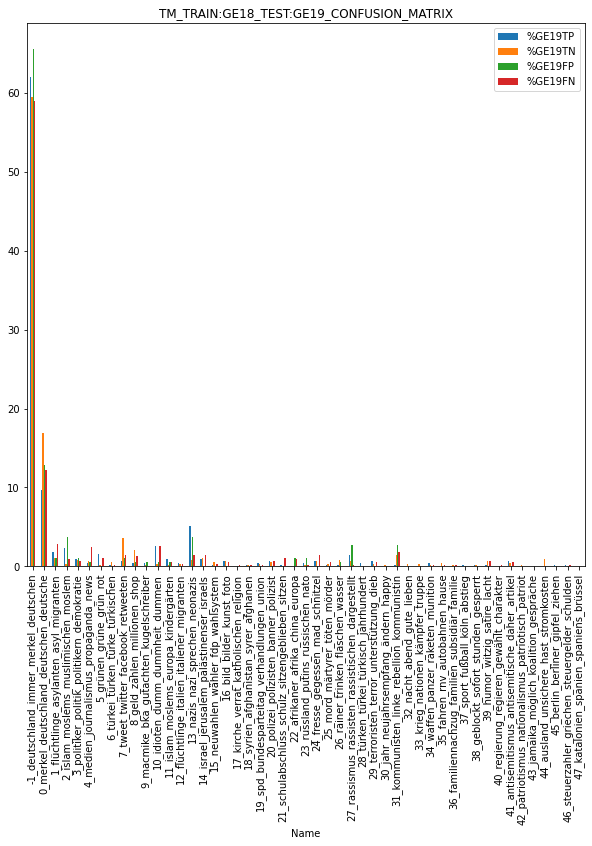

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX.plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:GE19_CONFUSION_MATRIX")

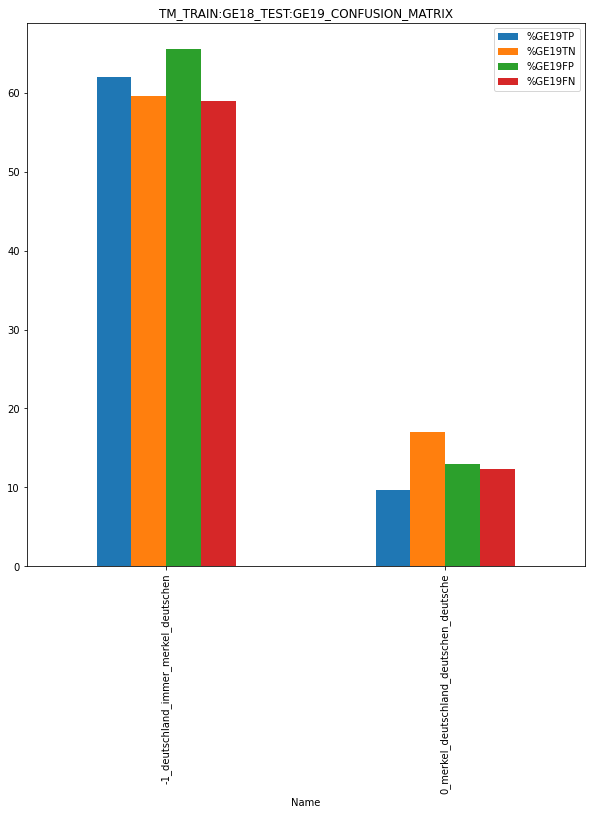

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:GE19_CONFUSION_MATRIX")

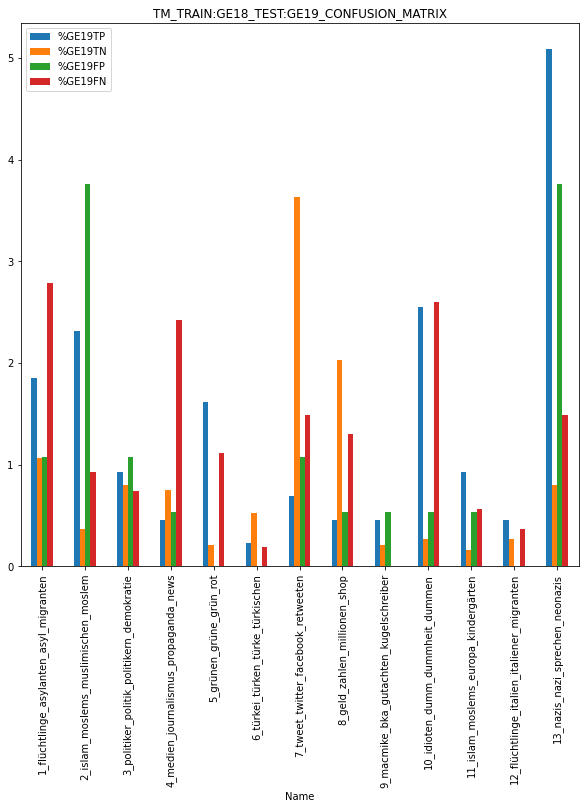

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:GE19_CONFUSION_MATRIX")

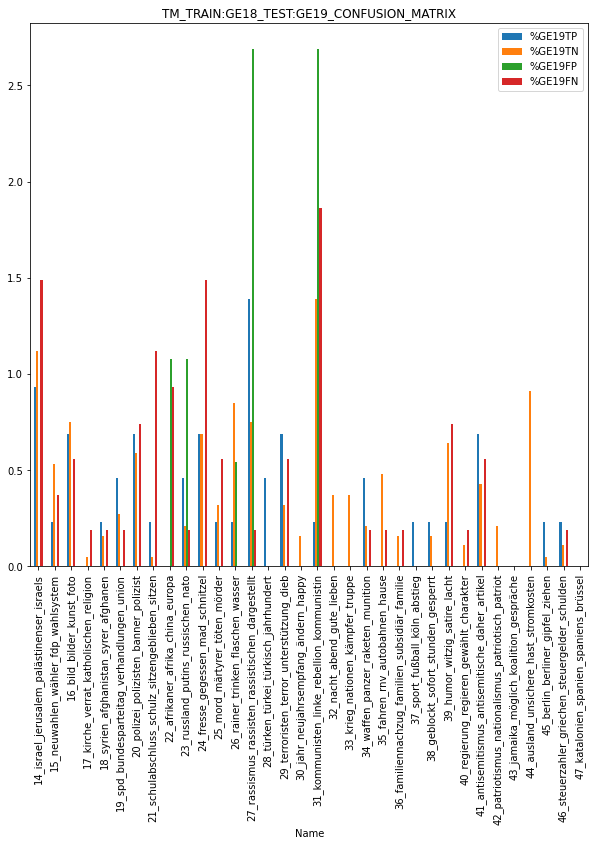

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:GE19_CONFUSION_MATRIX")

### Test H2019

In [ ]:
train_ge18_class_h19 = pd.read_csv('/content/submission_DE_A_HASOCOne_german_task_a_GermEval2018_HASOC2019.csv')
train_ge18_class_h19

index_col    task1  index_col.1
0            1    OTHER            1
1            2    OTHER            2
2            3    OTHER            3
3            4  OFFENSE            4
4            5    OTHER            5
..         ...      ...          ...
845        846    OTHER          846
846        847    OTHER          847
847        848    OTHER          848
848        849    OTHER          849
849        850    OTHER          850

[850 rows x 3 columns]

In [ ]:
h19_test_class_values = pd.DataFrame(train_ge18_class_h19['task1'].value_counts())
h19_test_class_values

task1
OTHER      746
OFFENSE    104

In [ ]:

h19_test_raw['class'] = train_ge18_class_h19['task1']
h19_test_raw

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
..             ...                                                ...    ...   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred    class  
0     HATE    -1    OTHER  
1     NONE    -1    OTHER  
2     NONE     0    OTHER  
3     OFFN    -1  OFFENSE  
4     OFFN    -1    OTHER  
..     ...   ...      ...  
845   OFFN    -1    OTHER  
846   OFFN    24    OTHER  
847   OFFN    -1    OTHER  
848   OFFN    -1    OTHER  
849   NONE     0    OTHER  

[850 rows x 6 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h19_test_true_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 'OFFENSE')]
h19_test_true_pos

text_id                                               text task_1  \
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
46   hasoc_de_5316  @MichaelaKorte @chris_hiv @derCharlie_ @scheid...    HOF   
53   hasoc_de_5323  Kein Wunder,er ist wahrscheinlich,ein Psychopa...    HOF   
69   hasoc_de_5339  Anerkannte Asylanten, flüchten zur Türkei!  Si...    HOF   
77   hasoc_de_5347  Ich wäre auch für die Abschaffung von Plastikv...    HOF   
78   hasoc_de_5348  Dreimal sagen,'Allah Akbars ' und dann noch 'i...    HOF   
113  hasoc_de_5383  @BlondJedi @akk Sehr guter Vorschlag! Am beste...    HOF   
153  hasoc_de_5423  @BlondJedi Da frage ich mich:  Es gibt so viel...    HOF   
161  hasoc_de_5431  @Ralf64904117 @ab19868 Wer soll diese Lügen gl...    HOF   
184  hasoc_de_5454  @Ralf64904117 Ich versteh die Betonung 'weißer...    HOF   
205  hasoc_de_5475  @Ralf64904117 Auf dem Frame (ich habe das Vide...    HOF   
221  hasoc_de_5491  @Ralf64904117 Seh nichts... Nur Schwarz...    ...    HOF   
224  hasoc_de_5494  2/2  Gelegenheit so richtig in die Fresse zu t...    HOF   
344  hasoc_de_5614  Brexit Befürworter,sind der Meinung,'es gibt z...    HOF   
392  hasoc_de_5662  Was für eine widerliche Scheisse!    Ich hab n...    HOF   
452  hasoc_de_5722  Was für eine armselige Kreatur! Kein Mitgefühl...    HOF   
553  hasoc_de_5823  Nach tagelanger Skandalisierung von #Gauland's...    HOF   
590  hasoc_de_5860  Das ist der absolute Gipfel! Lächerliche 2,5 J...    HOF   
618  hasoc_de_5888  Die ersten Prognosen deuten an, dass es bei de...    HOF   
643  hasoc_de_5913  @Uwe_Junge_MdL Nach dem der Neoliberalismus  u...    HOF   
670  hasoc_de_5940  @Uwe_Junge_MdL Ja, Schutz vor euch drecks Fasc...    HOF   
683  hasoc_de_5953  @Uwe_Junge_MdL Aha  Reichsbürger...  Was ist m...    HOF   
709  hasoc_de_5979  @Uwe_Junge_MdL ...ist das nicht der Schwule de...    HOF   
710  hasoc_de_5980  @Uwe_Junge_MdL Alles nette Schwule, die nie ei...    HOF   
720  hasoc_de_5990  @Uwe_Junge_MdL War da nicht mal was in deinem ...    HOF   
721  hasoc_de_5991  @Uwe_Junge_MdL Um die AfD zu zerstören, juckt ...    HOF   
760  hasoc_de_6030  Bessermenschen wollen, dass wir halbe Welt auf...    HOF   
789  hasoc_de_6059  Was ist denn mit der sonst verkehrten 'Welt' l...    HOF   
829  hasoc_de_6099  Neues aus 'Schlag die Merkel'  Mit einem angeb...    HOF   

    task_2  pred    class  
3     OFFN    -1  OFFENSE  
46    HATE     0  OFFENSE  
53    OFFN     0  OFFENSE  
69    HATE    12  OFFENSE  
77    HATE     1  OFFENSE  
78    HATE    -1  OFFENSE  
113   HATE     1  OFFENSE  
153   HATE     2  OFFENSE  
161   HATE    -1  OFFENSE  
184   HATE    27  OFFENSE  
205   HATE     0  OFFENSE  
221   HATE    -1  OFFENSE  
224   OFFN    -1  OFFENSE  
344   OFFN    -1  OFFENSE  
392   HATE    -1  OFFENSE  
452   OFFN    13  OFFENSE  
553   OFFN     4  OFFENSE  
590   PRFN    -1  OFFENSE  
618   PRFN    -1  OFFENSE  
643   PRFN    -1  OFFENSE  
670   HATE    -1  OFFENSE  
683   HATE    -1  OFFENSE  
709   HATE    -1  OFFENSE  
710   HATE     0  OFFENSE  
720   OFFN     2  OFFENSE  
721   HATE    -1  OFFENSE  
760   OFFN     1  OFFENSE  
789   OFFN    -1  OFFENSE  
829   OFFN    -1  OFFENSE

In [ ]:
h19_test_pred_values_true_pos = pd.DataFrame(h19_test_true_pos['pred'].value_counts())
h19_test_pred_values_true_pos['percent'] = (h19_test_pred_values_true_pos['pred'] / h19_test_pred_values_true_pos['pred'].sum()) * 100
h19_test_pred_values_true_pos

pred    percent
-1     16  55.172414
 0      4  13.793103
 1      3  10.344828
 2      2   6.896552
 12     1   3.448276
 27     1   3.448276
 13     1   3.448276
 4      1   3.448276

In [ ]:
h19_test_false_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 'OFFENSE')]
h19_test_false_pos

text_id                                               text task_1  \
13   hasoc_de_5283  @EUDebate wir haben die Flüchtlinge nicht geru...    NOT   
26   hasoc_de_5296  Das immer der kleinste,die größte Schnauze hat...    NOT   
27   hasoc_de_5297  Unserer   eigenen Überlegungen nachgehen,auf u...    NOT   
34   hasoc_de_5304  Dann scheint es ja den richtigen getroffen zu ...    NOT   
35   hasoc_de_5305  Heinrich der Löwe,  158 cm klein!  Hitler hat ...    NOT   
..             ...                                                ...    ...   
762  hasoc_de_6032  Bessermenschen regen sich über Kinder auf, die...    NOT   
764  hasoc_de_6034  Bessermenschen wollen   #Feuerwerksverbot in I...    NOT   
769  hasoc_de_6039  Traurig, traurig, traurig, so ein Gesocks, was...    NOT   
774  hasoc_de_6044  Man sollte natürlich zu den Klatschis auch erw...    NOT   
787  hasoc_de_6057  Deutschland sei stark in der Entwicklung, aber...    NOT   

    task_2  pred    class  
13    NONE     1  OFFENSE  
26    NONE    -1  OFFENSE  
27    NONE     0  OFFENSE  
34    NONE     1  OFFENSE  
35    NONE    -1  OFFENSE  
..     ...   ...      ...  
762   NONE    26  OFFENSE  
764   NONE    45  OFFENSE  
769   NONE    -1  OFFENSE  
774   NONE    21  OFFENSE  
787   NONE    -1  OFFENSE  

[75 rows x 6 columns]

In [ ]:
h19_test_pred_values_false_pos = pd.DataFrame(h19_test_false_pos['pred'].value_counts())
h19_test_pred_values_false_pos['percent'] = (h19_test_pred_values_false_pos['pred'] / h19_test_pred_values_false_pos['pred'].sum()) * 100
h19_test_pred_values_false_pos

pred    percent
-1     44  58.666667
 0     11  14.666667
 26     3   4.000000
 1      2   2.666667
 8      2   2.666667
 2      2   2.666667
 13     2   2.666667
 20     2   2.666667
 23     1   1.333333
 6      1   1.333333
 10     1   1.333333
 5      1   1.333333
 15     1   1.333333
 45     1   1.333333
 21     1   1.333333

In [ ]:
h19_test_true_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 'OTHER')]
h19_test_true_neg

text_id                                               text task_1  \
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
7    hasoc_de_5277  Und genau das macht er und lässt sich Scheiden...    NOT   
8    hasoc_de_5278  Dann wird das Konto gesperrt und Du musst wied...    NOT   
9    hasoc_de_5279         Dann bleib Single! https://t.co/TOP0spaU01    NOT   
..             ...                                                ...    ...   
837  hasoc_de_6107  @Uwe_Junge_MdL @Beatrix_vStorch  @lsvd  @Nicol...    NOT   
838  hasoc_de_6108  @Uwe_Junge_MdL Ihr streitet es zwar immer ab, ...    NOT   
839  hasoc_de_6109  @Uwe_Junge_MdL Oh die AFD als Vertreter der Ho...    NOT   
840  hasoc_de_6110                                   @Uwe_Junge_MdL 🤣    NOT   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  class  
1     NONE    -1  OTHER  
2     NONE     0  OTHER  
7     NONE    -1  OTHER  
8     NONE    -1  OTHER  
9     NONE     0  OTHER  
..     ...   ...    ...  
837   NONE    -1  OTHER  
838   NONE    -1  OTHER  
839   NONE     0  OTHER  
840   NONE     0  OTHER  
849   NONE     0  OTHER  

[639 rows x 6 columns]

In [ ]:
h19_test_pred_values_true_neg = pd.DataFrame(h19_test_true_neg['pred'].value_counts())
h19_test_pred_values_true_neg['percent'] = (h19_test_pred_values_true_neg['pred'] / h19_test_pred_values_true_neg['pred'].sum()) * 100
h19_test_pred_values_true_neg

pred    percent
-1    323  50.547731
 0    146  22.848200
 1     32   5.007825
 8     13   2.034429
 7     12   1.877934
 2     10   1.564945
 5      8   1.251956
 3      7   1.095462
 23     7   1.095462
 46     7   1.095462
 12     7   1.095462
 4      6   0.938967
 31     5   0.782473
 13     5   0.782473
 18     4   0.625978
 22     4   0.625978
 44     4   0.625978
 15     4   0.625978
 24     3   0.469484
 35     3   0.469484
 30     3   0.469484
 25     3   0.469484
 27     2   0.312989
 16     2   0.312989
 19     2   0.312989
 6      2   0.312989
 43     2   0.312989
 20     2   0.312989
 21     2   0.312989
 11     2   0.312989
 14     1   0.156495
 40     1   0.156495
 26     1   0.156495
 10     1   0.156495
 34     1   0.156495
 17     1   0.156495
 39     1   0.156495

In [ ]:
h19_test_false_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 'OTHER')]
h19_test_false_neg

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
5    hasoc_de_5275  #Bundeswehr  erst überzeugen Politische Linke,...    HOF   
6    hasoc_de_5276  Du bist ein Rassist,Du erhöhst Dich über ander...    HOF   
41   hasoc_de_5311  Lanz und Schwarzer,  neuerdings AfD Befürworte...    HOF   
..             ...                                                ...    ...   
844  hasoc_de_6114  Der/die/das große E ruft seine Mops wegen Unta...    HOF   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   

    task_2  pred  class  
0     HATE    -1  OTHER  
4     OFFN    -1  OTHER  
5     HATE     3  OTHER  
6     OFFN    27  OTHER  
41    HATE    -1  OTHER  
..     ...   ...    ...  
844   OFFN    -1  OTHER  
845   OFFN    -1  OTHER  
846   OFFN    24  OTHER  
847   OFFN    -1  OTHER  
848   OFFN    -1  OTHER  

[107 rows x 6 columns]

In [ ]:
h19_test_pred_values_false_neg = pd.DataFrame(h19_test_false_neg['pred'].value_counts())
h19_test_pred_values_false_neg['percent'] = (h19_test_pred_values_false_neg['pred'] / h19_test_pred_values_false_neg['pred'].sum()) * 100
h19_test_pred_values_false_neg

pred    percent
-1     60  56.074766
 0     12  11.214953
 3      4   3.738318
 23     3   2.803738
 13     3   2.803738
 1      3   2.803738
 27     2   1.869159
 5      2   1.869159
 11     2   1.869159
 2      2   1.869159
 24     2   1.869159
 12     1   0.934579
 7      1   0.934579
 16     1   0.934579
 22     1   0.934579
 44     1   0.934579
 4      1   0.934579
 6      1   0.934579
 31     1   0.934579
 20     1   0.934579
 46     1   0.934579
 18     1   0.934579
 39     1   0.934579

In [ ]:
h19_test_raw['cat_bin_actual'] = h19_test_raw['task_1'].map({'HOF': 1, 'NOT': 0}).astype(int)
h19_test_raw['cat_bin_predicted'] = h19_test_raw['class'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)


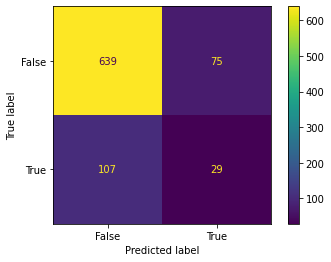

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h19_test_raw['cat_bin_actual']
predicted = h19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.7858823529411765

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.27884615384615385

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.21323529411764705

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.8949579831932774

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.24166666666666664

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.7858823529411765, 'Precision': 0.27884615384615385, 'Sensitivity_recall': 0.21323529411764705, 'Specificity': 0.8949579831932774, 'F1_score': 0.24166666666666664}


### TEST H2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge18_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1              -1_deutschland_immer_merkel_deutschen
1       0            0_merkel_deutschland_deutschen_deutsche
2       1             1_flüchtlinge_asylanten_asyl_migranten
3       2                2_islam_moslems_muslimischen_moslem
4       3          3_politiker_politik_politikern_demokratie
5       4              4_medien_journalismus_propaganda_news
6       5                            5_grünen_grüne_grün_rot
7       6                   6_türkei_türken_türke_türkischen
8       7                 7_tweet_twitter_facebook_retweeten
9       8                       8_geld_zahlen_millionen_shop
10      9             9_macmike_bka_gutachten_kugelschreiber
11     10                    10_idioten_dumm_dummheit_dummen
12     11               11_islam_moslems_europa_kindergärten
13     12         12_flüchtlinge_italien_italiener_migranten
14     13                    13_nazis_nazi_sprechen_neonazis
15     14          14_israel_jerusalem_palästinenser_israels
16     15                 15_neuwahlen_wähler_fdp_wahlsystem
17     16                          16_bild_bilder_kunst_foto
18     17             17_kirche_verrat_katholischen_religion
19     18               18_syrien_afghanistan_syrer_afghanen
20     19         19_spd_bundesparteitag_verhandlungen_union
21     20              20_polizei_polizisten_banner_polizist
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen
23     22                   22_afrikaner_afrika_china_europa
24     23                 23_russland_putins_russischen_nato
25     24                   24_fresse_gegessen_mad_schnitzel
26     25                      25_mord_märtyrer_töten_mörder
27     26                  26_rainer_trinken_flaschen_wasser
28     27   27_rassismus_rassisten_rassistischen_dargestellt
29     28              28_türken_türkei_türkisch_jahrhundert
30     29           29_terroristen_terror_unterstützung_dieb
31     30               30_jahr_neujahrsempfang_ändern_happy
32     31         31_kommunisten_linke_rebellion_kommunistin
33     32                         32_nacht_abend_gute_lieben
34     33                   33_krieg_nationen_kämpfer_truppe
35     34                  34_waffen_panzer_raketen_munition
36     35                     35_fahren_rnv_autobahnen_hause
37     36      36_familiennachzug_familien_subsidiär_familie
38     37                      37_sport_fußball_köln_abstieg
39     38                38_geblockt_sofort_stunden_gesperrt
40     39                       39_humor_witzig_satire_lacht
41     40            40_regierung_regieren_gewählt_charakter
42     41     41_antisemitismus_antisemitische_daher_artikel
43     42  42_patriotismus_nationalismus_patriotisch_patriot
44     43             43_jamaika_möglich_koalition_gespräche
45     44              44_ausland_unsichere_hast_stromkosten
46     45                   45_berlin_berliner_gipfel_ziehen
47     46     46_steuerzahler_griechen_steuergelder_schulden
48     47             47_katalonien_spanien_spaniens_brüssel

In [ ]:
h19_test_pred_values_true_pos['Topic'] = h19_test_pred_values_true_pos.index
h19_test_pred_values_true_pos

pred    percent  Topic
-1     16  55.172414     -1
 0      4  13.793103      0
 1      3  10.344828      1
 2      2   6.896552      2
 12     1   3.448276     12
 27     1   3.448276     27
 13     1   3.448276     13
 4      1   3.448276      4

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH19TP', 'percent':'%H19TP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_pos['Topic'] = h19_test_pred_values_false_pos.index
h19_test_pred_values_false_pos

pred    percent  Topic
-1     44  58.666667     -1
 0     11  14.666667      0
 26     3   4.000000     26
 1      2   2.666667      1
 8      2   2.666667      8
 2      2   2.666667      2
 13     2   2.666667     13
 20     2   2.666667     20
 23     1   1.333333     23
 6      1   1.333333      6
 10     1   1.333333     10
 5      1   1.333333      5
 15     1   1.333333     15
 45     1   1.333333     45
 21     1   1.333333     21

In [ ]:
df3 = h19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH19FP', 'percent':'%H19FP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_true_neg['Topic'] = h19_test_pred_values_true_neg.index
h19_test_pred_values_true_neg

pred    percent  Topic
-1    323  50.547731     -1
 0    146  22.848200      0
 1     32   5.007825      1
 8     13   2.034429      8
 7     12   1.877934      7
 2     10   1.564945      2
 5      8   1.251956      5
 3      7   1.095462      3
 23     7   1.095462     23
 46     7   1.095462     46
 12     7   1.095462     12
 4      6   0.938967      4
 31     5   0.782473     31
 13     5   0.782473     13
 18     4   0.625978     18
 22     4   0.625978     22
 44     4   0.625978     44
 15     4   0.625978     15
 24     3   0.469484     24
 35     3   0.469484     35
 30     3   0.469484     30
 25     3   0.469484     25
 27     2   0.312989     27
 16     2   0.312989     16
 19     2   0.312989     19
 6      2   0.312989      6
 43     2   0.312989     43
 20     2   0.312989     20
 21     2   0.312989     21
 11     2   0.312989     11
 14     1   0.156495     14
 40     1   0.156495     40
 26     1   0.156495     26
 10     1   0.156495     10
 34     1   0.156495     34
 17     1   0.156495     17
 39     1   0.156495     39

In [ ]:
df4 = h19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH19TN', 'percent':'%H19TN', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_neg['Topic'] = h19_test_pred_values_false_neg.index
h19_test_pred_values_false_neg

pred    percent  Topic
-1     60  56.074766     -1
 0     12  11.214953      0
 3      4   3.738318      3
 23     3   2.803738     23
 13     3   2.803738     13
 1      3   2.803738      1
 27     2   1.869159     27
 5      2   1.869159      5
 11     2   1.869159     11
 2      2   1.869159      2
 24     2   1.869159     24
 12     1   0.934579     12
 7      1   0.934579      7
 16     1   0.934579     16
 22     1   0.934579     22
 44     1   0.934579     44
 4      1   0.934579      4
 6      1   0.934579      6
 31     1   0.934579     31
 20     1   0.934579     20
 46     1   0.934579     46
 18     1   0.934579     18
 39     1   0.934579     39

In [ ]:
df5 = h19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH19FN', 'percent':'%H19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']] = df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H19', '%H19','%H19', '%H20']]
#df_to_round = df_to_round[['%H19', '%H19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predH19TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      16.0   
1       0            0_merkel_deutschland_deutschen_deutsche       4.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten       3.0   
3       2                2_islam_moslems_muslimischen_moslem       2.0   
4       3          3_politiker_politik_politikern_demokratie         0   
5       4              4_medien_journalismus_propaganda_news       1.0   
6       5                            5_grünen_grüne_grün_rot         0   
7       6                   6_türkei_türken_türke_türkischen         0   
8       7                 7_tweet_twitter_facebook_retweeten         0   
9       8                       8_geld_zahlen_millionen_shop         0   
10      9             9_macmike_bka_gutachten_kugelschreiber         0   
11     10                    10_idioten_dumm_dummheit_dummen         0   
12     11               11_islam_moslems_europa_kindergärten         0   
13     12         12_flüchtlinge_italien_italiener_migranten       1.0   
14     13                    13_nazis_nazi_sprechen_neonazis       1.0   
15     14          14_israel_jerusalem_palästinenser_israels         0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem         0   
17     16                          16_bild_bilder_kunst_foto         0   
18     17             17_kirche_verrat_katholischen_religion         0   
19     18               18_syrien_afghanistan_syrer_afghanen         0   
20     19         19_spd_bundesparteitag_verhandlungen_union         0   
21     20              20_polizei_polizisten_banner_polizist         0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen         0   
23     22                   22_afrikaner_afrika_china_europa         0   
24     23                 23_russland_putins_russischen_nato         0   
25     24                   24_fresse_gegessen_mad_schnitzel         0   
26     25                      25_mord_märtyrer_töten_mörder         0   
27     26                  26_rainer_trinken_flaschen_wasser         0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt       1.0   
29     28              28_türken_türkei_türkisch_jahrhundert         0   
30     29           29_terroristen_terror_unterstützung_dieb         0   
31     30               30_jahr_neujahrsempfang_ändern_happy         0   
32     31         31_kommunisten_linke_rebellion_kommunistin         0   
33     32                         32_nacht_abend_gute_lieben         0   
34     33                   33_krieg_nationen_kämpfer_truppe         0   
35     34                  34_waffen_panzer_raketen_munition         0   
36     35                     35_fahren_rnv_autobahnen_hause         0   
37     36      36_familiennachzug_familien_subsidiär_familie         0   
38     37                      37_sport_fußball_köln_abstieg         0   
39     38                38_geblockt_sofort_stunden_gesperrt         0   
40     39                       39_humor_witzig_satire_lacht         0   
41     40            40_regierung_regieren_gewählt_charakter         0   
42     41     41_antisemitismus_antisemitische_daher_artikel         0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot         0   
44     43             43_jamaika_möglich_koalition_gespräche         0   
45     44              44_ausland_unsichere_hast_stromkosten         0   
46     45                   45_berlin_berliner_gipfel_ziehen         0   
47     46     46_steuerzahler_griechen_steuergelder_schulden         0   
48     47             47_katalonien_spanien_spaniens_brüssel         0   

    %H19TP predH19FP  %H19FP predH19TN  %H19TN predH19FN  %H19FN  
0    55.17      44.0   58.67     323.0   50.55      60.0   56.07  
1    13.79      11.0   14.67     146.0   22.85      12.0   11.21  
2    10.34       2.0    2.67      32.0    5.01       3.0    2.80  
3     6.90       2.0    2.67      1

In [ ]:
df_merged

Topic                                               Name predH19TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      16.0   
1       0            0_merkel_deutschland_deutschen_deutsche       4.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten       3.0   
3       2                2_islam_moslems_muslimischen_moslem       2.0   
4       3          3_politiker_politik_politikern_demokratie         0   
5       4              4_medien_journalismus_propaganda_news       1.0   
6       5                            5_grünen_grüne_grün_rot         0   
7       6                   6_türkei_türken_türke_türkischen         0   
8       7                 7_tweet_twitter_facebook_retweeten         0   
9       8                       8_geld_zahlen_millionen_shop         0   
10      9             9_macmike_bka_gutachten_kugelschreiber         0   
11     10                    10_idioten_dumm_dummheit_dummen         0   
12     11               11_islam_moslems_europa_kindergärten         0   
13     12         12_flüchtlinge_italien_italiener_migranten       1.0   
14     13                    13_nazis_nazi_sprechen_neonazis       1.0   
15     14          14_israel_jerusalem_palästinenser_israels         0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem         0   
17     16                          16_bild_bilder_kunst_foto         0   
18     17             17_kirche_verrat_katholischen_religion         0   
19     18               18_syrien_afghanistan_syrer_afghanen         0   
20     19         19_spd_bundesparteitag_verhandlungen_union         0   
21     20              20_polizei_polizisten_banner_polizist         0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen         0   
23     22                   22_afrikaner_afrika_china_europa         0   
24     23                 23_russland_putins_russischen_nato         0   
25     24                   24_fresse_gegessen_mad_schnitzel         0   
26     25                      25_mord_märtyrer_töten_mörder         0   
27     26                  26_rainer_trinken_flaschen_wasser         0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt       1.0   
29     28              28_türken_türkei_türkisch_jahrhundert         0   
30     29           29_terroristen_terror_unterstützung_dieb         0   
31     30               30_jahr_neujahrsempfang_ändern_happy         0   
32     31         31_kommunisten_linke_rebellion_kommunistin         0   
33     32                         32_nacht_abend_gute_lieben         0   
34     33                   33_krieg_nationen_kämpfer_truppe         0   
35     34                  34_waffen_panzer_raketen_munition         0   
36     35                     35_fahren_rnv_autobahnen_hause         0   
37     36      36_familiennachzug_familien_subsidiär_familie         0   
38     37                      37_sport_fußball_köln_abstieg         0   
39     38                38_geblockt_sofort_stunden_gesperrt         0   
40     39                       39_humor_witzig_satire_lacht         0   
41     40            40_regierung_regieren_gewählt_charakter         0   
42     41     41_antisemitismus_antisemitische_daher_artikel         0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot         0   
44     43             43_jamaika_möglich_koalition_gespräche         0   
45     44              44_ausland_unsichere_hast_stromkosten         0   
46     45                   45_berlin_berliner_gipfel_ziehen         0   
47     46     46_steuerzahler_griechen_steuergelder_schulden         0   
48     47             47_katalonien_spanien_spaniens_brüssel         0   

    %H19TP predH19FP  %H19FP predH19TN  %H19TN predH19FN  %H19FN  
0    55.17      44.0   58.67     323.0   50.55      60.0   56.07  
1    13.79      11.0   14.67     146.0   22.85      12.0   11.21  
2    10.34       2.0    2.67      32.0    5.01       3.0    2.80  
3     6.90       2.0    2.67      1

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH19TP": int, "predH19TN":int, "predH19FP":int, "predH19FN":int})
df_merged

Topic                                               Name  predH19TP  \
0      -1              -1_deutschland_immer_merkel_deutschen         16   
1       0            0_merkel_deutschland_deutschen_deutsche          4   
2       1             1_flüchtlinge_asylanten_asyl_migranten          3   
3       2                2_islam_moslems_muslimischen_moslem          2   
4       3          3_politiker_politik_politikern_demokratie          0   
5       4              4_medien_journalismus_propaganda_news          1   
6       5                            5_grünen_grüne_grün_rot          0   
7       6                   6_türkei_türken_türke_türkischen          0   
8       7                 7_tweet_twitter_facebook_retweeten          0   
9       8                       8_geld_zahlen_millionen_shop          0   
10      9             9_macmike_bka_gutachten_kugelschreiber          0   
11     10                    10_idioten_dumm_dummheit_dummen          0   
12     11               11_islam_moslems_europa_kindergärten          0   
13     12         12_flüchtlinge_italien_italiener_migranten          1   
14     13                    13_nazis_nazi_sprechen_neonazis          1   
15     14          14_israel_jerusalem_palästinenser_israels          0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem          0   
17     16                          16_bild_bilder_kunst_foto          0   
18     17             17_kirche_verrat_katholischen_religion          0   
19     18               18_syrien_afghanistan_syrer_afghanen          0   
20     19         19_spd_bundesparteitag_verhandlungen_union          0   
21     20              20_polizei_polizisten_banner_polizist          0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen          0   
23     22                   22_afrikaner_afrika_china_europa          0   
24     23                 23_russland_putins_russischen_nato          0   
25     24                   24_fresse_gegessen_mad_schnitzel          0   
26     25                      25_mord_märtyrer_töten_mörder          0   
27     26                  26_rainer_trinken_flaschen_wasser          0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt          1   
29     28              28_türken_türkei_türkisch_jahrhundert          0   
30     29           29_terroristen_terror_unterstützung_dieb          0   
31     30               30_jahr_neujahrsempfang_ändern_happy          0   
32     31         31_kommunisten_linke_rebellion_kommunistin          0   
33     32                         32_nacht_abend_gute_lieben          0   
34     33                   33_krieg_nationen_kämpfer_truppe          0   
35     34                  34_waffen_panzer_raketen_munition          0   
36     35                     35_fahren_rnv_autobahnen_hause          0   
37     36      36_familiennachzug_familien_subsidiär_familie          0   
38     37                      37_sport_fußball_köln_abstieg          0   
39     38                38_geblockt_sofort_stunden_gesperrt          0   
40     39                       39_humor_witzig_satire_lacht          0   
41     40            40_regierung_regieren_gewählt_charakter          0   
42     41     41_antisemitismus_antisemitische_daher_artikel          0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot          0   
44     43             43_jamaika_möglich_koalition_gespräche          0   
45     44              44_ausland_unsichere_hast_stromkosten          0   
46     45                   45_berlin_berliner_gipfel_ziehen          0   
47     46     46_steuerzahler_griechen_steuergelder_schulden          0   
48     47             47_katalonien_spanien_spaniens_brüssel          0   

    %H19TP  predH19FP  %H19FP  predH19TN  %H19TN  predH19FN  %H19FN  
0    55.17         44   58.67        323   50.55         60   56.07  
1    13.79         11   14.67        146   22.85         12   11.21  
2    10.34          2    2.67         32   

In [ ]:
df_percent = df_merged[['Topic','%H19TP', '%H19TN','%H19FP', '%H19FN','Name']]
df_percent

Topic  %H19TP  %H19TN  %H19FP  %H19FN  \
0      -1   55.17   50.55   58.67   56.07   
1       0   13.79   22.85   14.67   11.21   
2       1   10.34    5.01    2.67    2.80   
3       2    6.90    1.56    2.67    1.87   
4       3    0.00    1.10    0.00    3.74   
5       4    3.45    0.94    0.00    0.93   
6       5    0.00    1.25    1.33    1.87   
7       6    0.00    0.31    1.33    0.93   
8       7    0.00    1.88    0.00    0.93   
9       8    0.00    2.03    2.67    0.00   
10      9    0.00    0.00    0.00    0.00   
11     10    0.00    0.16    1.33    0.00   
12     11    0.00    0.31    0.00    1.87   
13     12    3.45    1.10    0.00    0.93   
14     13    3.45    0.78    2.67    2.80   
15     14    0.00    0.16    0.00    0.00   
16     15    0.00    0.63    1.33    0.00   
17     16    0.00    0.31    0.00    0.93   
18     17    0.00    0.16    0.00    0.00   
19     18    0.00    0.63    0.00    0.93   
20     19    0.00    0.31    0.00    0.00   
21     20    0.00    0.31    2.67    0.93   
22     21    0.00    0.31    1.33    0.00   
23     22    0.00    0.63    0.00    0.93   
24     23    0.00    1.10    1.33    2.80   
25     24    0.00    0.47    0.00    1.87   
26     25    0.00    0.47    0.00    0.00   
27     26    0.00    0.16    4.00    0.00   
28     27    3.45    0.31    0.00    1.87   
29     28    0.00    0.00    0.00    0.00   
30     29    0.00    0.00    0.00    0.00   
31     30    0.00    0.47    0.00    0.00   
32     31    0.00    0.78    0.00    0.93   
33     32    0.00    0.00    0.00    0.00   
34     33    0.00    0.00    0.00    0.00   
35     34    0.00    0.16    0.00    0.00   
36     35    0.00    0.47    0.00    0.00   
37     36    0.00    0.00    0.00    0.00   
38     37    0.00    0.00    0.00    0.00   
39     38    0.00    0.00    0.00    0.00   
40     39    0.00    0.16    0.00    0.93   
41     40    0.00    0.16    0.00    0.00   
42     41    0.00    0.00    0.00    0.00   
43     42    0.00    0.00    0.00    0.00   
44     43    0.00    0.31    0.00    0.00   
45     44    0.00    0.63    0.00    0.93   
46     45    0.00    0.00    1.33    0.00   
47     46    0.00    1.10    0.00    0.93   
48     47    0.00    0.00    0.00    0.00   

                                                 Name  
0               -1_deutschland_immer_merkel_deutschen  
1             0_merkel_deutschland_deutschen_deutsche  
2              1_flüchtlinge_asylanten_asyl_migranten  
3                 2_islam_moslems_muslimischen_moslem  
4           3_politiker_politik_politikern_demokratie  
5               4_medien_journalismus_propaganda_news  
6                             5_grünen_grüne_grün_rot  
7                    6_türkei_türken_türke_türkischen  
8                  7_tweet_twitter_facebook_retweeten  
9                        8_geld_zahlen_millionen_shop  
10             9_macmike_bka_gutachten_kugelschreiber  
11                    10_idioten_dumm_dummheit_dummen  
12               11_islam_moslems_europa_kindergärten  
13         12_flüchtlinge_italien_italiener_migranten  
14                    13_nazis_nazi_sprechen_neonazis  
15          14_israel_jerusalem_palästinenser_israels  
16                 15_neuwahlen_wähler_fdp_wahlsystem  
17                          16_bild_bilder_kunst_foto  
18             17_kirche_verrat_katholischen_religion  
19               18_syrien_afghanistan_syrer_afghanen  
20         19_spd_bundesparteitag_verhandlungen_union  
21              20_polizei_polizisten_banner_polizist  
22    21_schulabschluss_schulz_sitzengeblieben_sitzen  
23                   22_afrikaner_afrika_china_europa  
24                 23_russland_putins_russischen_nato  
25                   24_fresse_gegessen_mad_schnitzel  
26                      25_mord_märtyrer_töten_mörder  
27                  26_rainer_trinken_flaschen_wasser  
28   27_rassismus_rassisten_rassistischen_dargestellt  
29              28_türken_türkei_türkisch_jahrhundert  
30           29_t

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

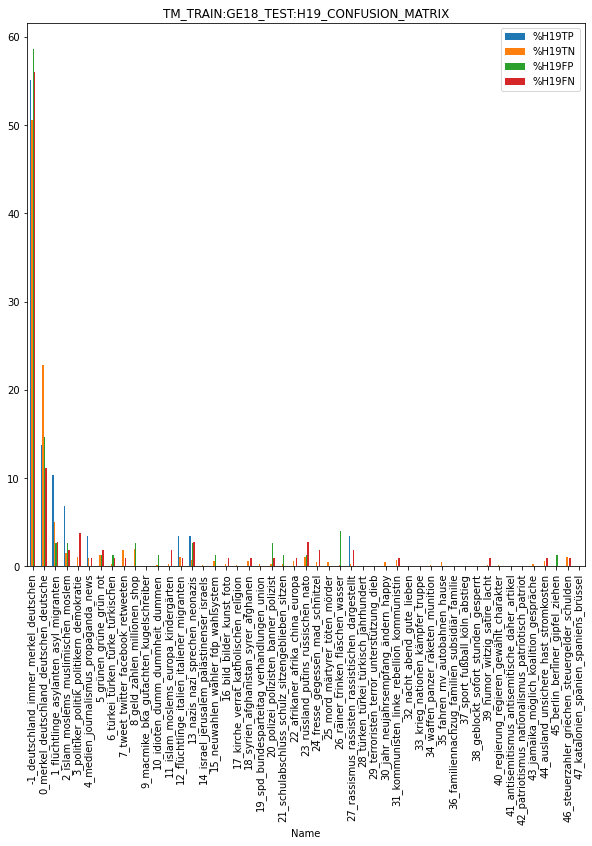

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX.plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:H19_CONFUSION_MATRIX")

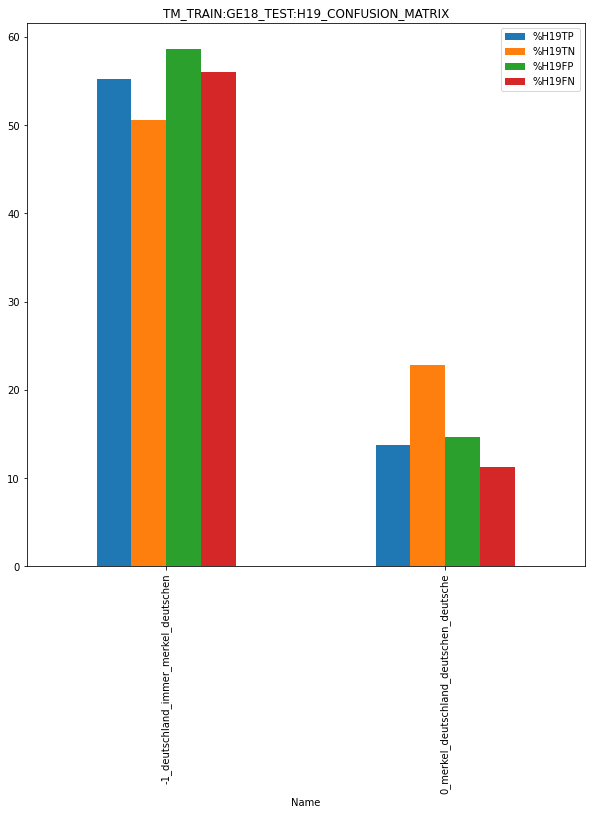

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:H19_CONFUSION_MATRIX")

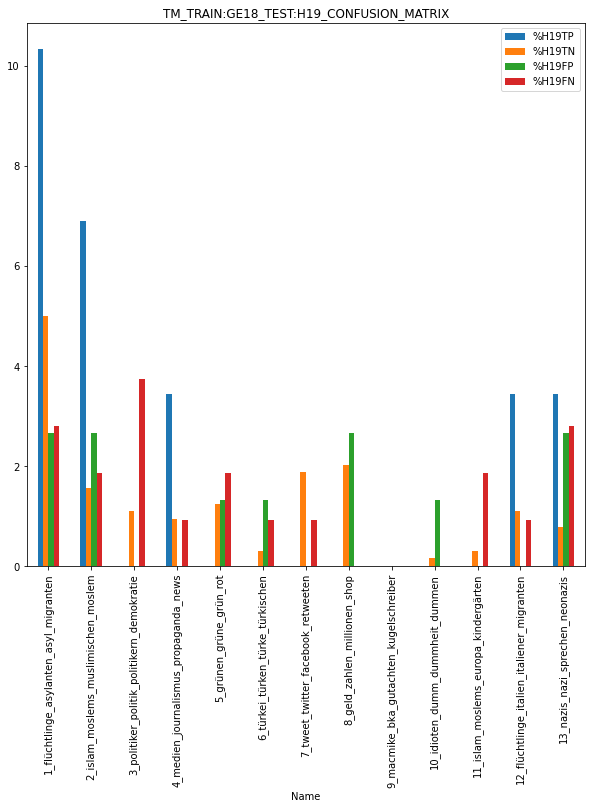

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:H19_CONFUSION_MATRIX")

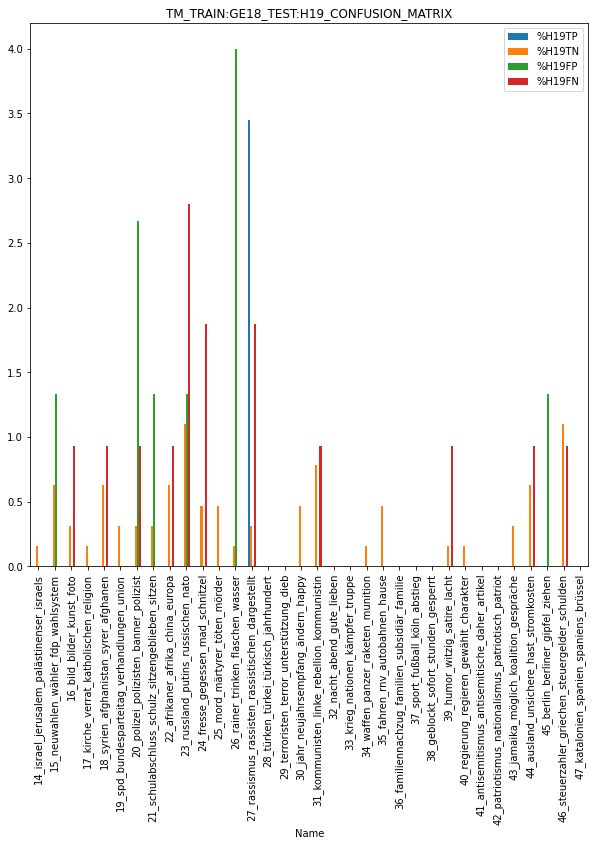

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:H19_CONFUSION_MATRIX")

### Test H2020

In [ ]:
train_ge18_class_h20 = pd.read_csv('/content/submission_DE_A_HASOCOne_german_task_a_GermEval2018_HASOC2020.csv')
train_ge18_class_h20

index_col    task1  index_col.1
0            0    OTHER            0
1            1    OTHER            1
2            2    OTHER            2
3            3    OTHER            3
4            4    OTHER            4
..         ...      ...          ...
521        521  OFFENSE          521
522        522  OFFENSE          522
523        523    OTHER          523
524        524  OFFENSE          524
525        525    OTHER          525

[526 rows x 3 columns]

In [ ]:
h20_test_class_values = pd.DataFrame(train_ge18_class_h20['task1'].value_counts())
h20_test_class_values

task1
OTHER      279
OFFENSE    247

In [ ]:

h20_test_raw['class'] = train_ge18_class_h20['task1']
h20_test_raw

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred    class  
0    hasoc_2020_de_1053    -1    OTHER  
1     hasoc_2020_de_671     0    OTHER  
2    hasoc_2020_de_2977    33    OTHER  
3    hasoc_2020_de_1746    -1    OTHER  
4    hasoc_2020_de_2416    -1    OTHER  
..                  ...   ...      ...  
521   hasoc_2020_de_486    -1  OFFENSE  
522  hasoc_2020_de_3388     5  OFFENSE  
523  hasoc_2020_de_2745    -1    OTHER  
524   hasoc_2020_de_236    10  OFFENSE  
525  hasoc_2020_de_2850    -1    OTHER  

[526 rows x 8 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h20_test_true_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 'OFFENSE')]
h20_test_true_pos

Unnamed: 0             tweet_id  \
5             5  1129712298531184641   
6             6  1123981478361219073   
17           17  1126089577486323712   
21           21  1134130242786926592   
24           24  1124210944534614016   
..          ...                  ...   
486         486  1128516649236217856   
492         492  1130047717005242371   
496         496  1131274676741836800   
508         508  1129379774076473344   
512         512  1124842568972288000   

                                                  text task1 task2  \
5    RT @VonSchwer: Ein guter Patriot geht von Bord...   HOF  OFFN   
6    @yooli_derechte @MontanaBlack Mich wundert es ...   HOF  OFFN   
17   RT @CWBWElias: @TheresaGesperrt Wollte meine N...   HOF  PRFN   
21   @sgepeeti Verdursten ist aber auch ein scheiß ...   HOF  PRFN   
24   @HyperBushido fr ich streu den scheiß überall ...   HOF  PRFN   
..                                                 ...   ...   ...   
486  @MaXXXPorco @bareholebitch So  ein  Riesen Toy...   HOF  PRFN   
492  @Ralf_Stegner obacht ralle!\ndumm und korrupt ...   HOF  HATE   
496  RT @can65schalke: „Göt“ ist türkisch und heißt...   HOF  PRFN   
508                       Halt die fresse du hurensohn   HOF  PRFN   
512  Der Bass ist tief, die Atmosphäre sehr entspan...   HOF  PRFN   

                     ID  pred    class  
5    hasoc_2020_de_1112    42  OFFENSE  
6    hasoc_2020_de_2938    -1  OFFENSE  
17   hasoc_2020_de_2545    -1  OFFENSE  
21   hasoc_2020_de_1235    -1  OFFENSE  
24   hasoc_2020_de_1691    -1  OFFENSE  
..                  ...   ...      ...  
486  hasoc_2020_de_1068    -1  OFFENSE  
492  hasoc_2020_de_2676    -1  OFFENSE  
496  hasoc_2020_de_1993     6  OFFENSE  
508  hasoc_2020_de_2465    -1  OFFENSE  
512  hasoc_2020_de_2470    -1  OFFENSE  

[125 rows x 8 columns]

In [ ]:
h20_test_pred_values_true_pos = pd.DataFrame(h20_test_true_pos['pred'].value_counts())
h20_test_pred_values_true_pos['percent'] = (h20_test_pred_values_true_pos['pred'] / h20_test_pred_values_true_pos['pred'].sum()) * 100
h20_test_pred_values_true_pos

pred  percent
-1     75     60.0
 0     17     13.6
 10     8      6.4
 5      5      4.0
 24     4      3.2
 8      2      1.6
 13     2      1.6
 1      2      1.6
 3      1      0.8
 2      1      0.8
 25     1      0.8
 27     1      0.8
 42     1      0.8
 23     1      0.8
 11     1      0.8
 7      1      0.8
 16     1      0.8
 6      1      0.8

In [ ]:
h20_test_false_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 'OFFENSE')]
h20_test_false_pos

Unnamed: 0             tweet_id  \
7             7  1124978296628961287   
10           10  1125872002147991553   
12           12  1124265143335104512   
16           16  1129426301515960320   
20           20  1129770037290708992   
..          ...                  ...   
516         516  1124210369923297280   
518         518  1128653081556787205   
521         521  1124809878546128897   
522         522  1132433240000798720   
524         524  1124362090460975105   

                                                  text task1 task2  \
7    Da war #SPD #Kuehnert und am Ende auch #Nahles...   NOT  NONE   
10   @mknhofheim @Backstage0000 @Graubaer1953 @DDur...   NOT  NONE   
12   @monsieur_belier @swiftxcited @arsenal_lady Sc...   NOT  NONE   
16   @welt Holzen wir halt den ganzen Amazonas ab !...   NOT  NONE   
20   Wäre ich froh, wenn die scheiß Saison schon vo...   NOT  NONE   
..                                                 ...   ...   ...   
516  ARD-Doku über Europakrise zeigt Merkels Machtp...   NOT  NONE   
518           Vegetarisch essen um die Nazis zu ärgern   NOT  NONE   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   

                     ID  pred    class  
7    hasoc_2020_de_2205    10  OFFENSE  
10    hasoc_2020_de_584    -1  OFFENSE  
12    hasoc_2020_de_478    -1  OFFENSE  
16   hasoc_2020_de_1064    -1  OFFENSE  
20   hasoc_2020_de_2393    30  OFFENSE  
..                  ...   ...      ...  
516   hasoc_2020_de_973    -1  OFFENSE  
518  hasoc_2020_de_1179    13  OFFENSE  
521   hasoc_2020_de_486    -1  OFFENSE  
522  hasoc_2020_de_3388     5  OFFENSE  
524   hasoc_2020_de_236    10  OFFENSE  

[122 rows x 8 columns]

In [ ]:
h20_test_pred_values_false_pos = pd.DataFrame(h20_test_false_pos['pred'].value_counts())
h20_test_pred_values_false_pos['percent'] = (h20_test_pred_values_false_pos['pred'] / h20_test_pred_values_false_pos['pred'].sum()) * 100
h20_test_pred_values_false_pos

pred    percent
-1     61  50.000000
 0     15  12.295082
 10    13  10.655738
 13    11   9.016393
 2      7   5.737705
 5      5   4.098361
 39     2   1.639344
 11     2   1.639344
 6      2   1.639344
 30     1   0.819672
 27     1   0.819672
 24     1   0.819672
 28     1   0.819672

In [ ]:
h20_test_true_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 'OTHER')]
h20_test_true_neg

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
514         514  1127595013867745290   
519         519  1131124025734979586   
520         520  1123589659047731201   
523         523  1127366294255357958   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
514       https://t.co/zeG1NZTFnn\n\nMerkel muss weg !   NOT  NONE   
519  @GaramSalami @graf_persephone Denk ich mir jed...   NOT  NONE   
520        Einfach einladend 😉 https://t.co/kRHAoshmxY   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  class  
0    hasoc_2020_de_1053    -1  OTHER  
1     hasoc_2020_de_671     0  OTHER  
2    hasoc_2020_de_2977    33  OTHER  
3    hasoc_2020_de_1746    -1  OTHER  
4    hasoc_2020_de_2416    -1  OTHER  
..                  ...   ...    ...  
514    hasoc_2020_de_88     0  OTHER  
519  hasoc_2020_de_1295    -1  OTHER  
520  hasoc_2020_de_2794     0  OTHER  
523  hasoc_2020_de_2745    -1  OTHER  
525  hasoc_2020_de_2850    -1  OTHER  

[243 rows x 8 columns]

In [ ]:
h20_test_pred_values_true_neg = pd.DataFrame(h20_test_true_neg['pred'].value_counts())
h20_test_pred_values_true_neg['percent'] = (h20_test_pred_values_true_neg['pred'] / h20_test_pred_values_true_neg['pred'].sum()) * 100
h20_test_pred_values_true_neg

pred    percent
-1    135  55.555556
 0     52  21.399177
 5     19   7.818930
 10     6   2.469136
 13     6   2.469136
 8      4   1.646091
 2      2   0.823045
 9      2   0.823045
 16     2   0.823045
 28     2   0.823045
 44     1   0.411523
 25     1   0.411523
 46     1   0.411523
 1      1   0.411523
 12     1   0.411523
 45     1   0.411523
 26     1   0.411523
 24     1   0.411523
 3      1   0.411523
 36     1   0.411523
 33     1   0.411523
 32     1   0.411523
 4      1   0.411523

In [ ]:
h20_test_false_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 'OTHER')]
h20_test_false_neg

Unnamed: 0             tweet_id  \
22           22  1134444350027509766   
37           37  1129807773473091586   
47           47  1131973145789902850   
81           81  1126860150806142976   
93           93  1130925320591351808   
158         158  1128717736752893952   
170         170  1133214705923842049   
175         175  1130075063867383808   
191         191  1132750077699809286   
198         198  1134366872831504384   
206         206  1133563151914602496   
211         211  1128445077628641280   
223         223  1131497012610912257   
231         231  1131312698120167424   
238         238  1127924044429504513   
256         256  1134178607335661568   
268         268  1134492962006679557   
273         273  1125144818898878464   
286         286  1132209901705584640   
303         303  1131608664979255296   
305         305  1128001819408519171   
312         312  1133160054163628032   
336         336  1132747066181079040   
339         339  1124756510217781248   
401         401  1124699102774726656   
414         414  1130116130306179072   
421         421  1132249445603643393   
425         425  1131564591257935874   
450         450  1123971936315486215   
463         463  1130745288493293568   
485         485  1132868847797710853   
497         497  1134619244107370496   
498         498  1129818645109116928   
500         500  1128321203075256320   
511         511  1130096161212252162   
517         517  1124379312264708101   

                                                  text task1 task2  \
22                 Scheiß. Hurensohn gam @FortniteGame   HOF  PRFN   
37   @PandabrchenThe1 Keine Ahnung, die sind richti...   HOF  PRFN   
47   russische frauen nackt porno deutsche alte fra...   HOF  PRFN   
81   @stayawakexo @IcyS0da @KongStrongRU @Saskia_Ha...   HOF  OFFN   
93   Ruth Townsley erst einmal gefeuert. Wollte Sae...   HOF  OFFN   
158                    @gnocchi_mane halt deine fresse   HOF  PRFN   
170  RT @DirkHafermann: Darf man die Bild-Kippa eig...   HOF  NONE   
175  RT @PhilippKirchbe2: @RegSprecher_AT PEINLICHE...   HOF  OFFN   
191  deutsche wichsvorlage teen groe schwnze gratis...   HOF  PRFN   
198     @vazhnicza76765 @TamaraBerlin85 Geiler arsch 😋   HOF  PRFN   
206  Porno berraschend puff deutsche ficken in thri...   HOF  PRFN   
211  RT @isariuzCS: erstmal bissel klinik am hurens...   HOF  PRFN   
223  Der Bürgerrechtler Carsten Schulz: Der Moralap...   HOF  OFFN   
231  pornofoto sveta belochkina deutsche jugendlich...   HOF  PRFN   
238                       @berxe auf mein geilen arsch   HOF  PRFN   
256  Deutsche frauen anal pornos, fahrschlerin porn...   HOF  PRFN   
268  @aidrieeen #Merkel Es reicht!!! Sie haben uns ...   HOF  HATE   
273  @jackcaroni @_metastabil @mateundottdrei schei...   HOF  PRFN   
286  RT @Tsuga1453: @ehrensackhaar Da aber Politike...   HOF  HATE   
303           @tagesschau @aktuelle_stunde Weg damit!🤮   HOF  PRFN   
305  RT @SirSchnee: #Merkel trinkt aus dem Reagenzg...   HOF  OFFN   
312  deutsche milf free kostenlose porrno kostenlos...   HOF  PRFN   
336   RT @KibaSeasons: Mein Patronus ist ein Hurensohn   HOF  PRFN   
339      @hornyturkgerman Was für ein Hammer arsch 😍😍😍   HOF  OFFN   
401                 ABSCHAUM … https://t.co/CARbSUUHp6   HOF  PRFN   
414  @cem_oezdemir Und die #Grünen in #Europa sind ...   HOF  HATE   
421  RT @luvtigbiddies: wenn deine freundin sagt ha...   HOF  PRFN   
425  @KaliDreadful Dachte eher mit dem arsch zuerst...   HOF  PRFN   
450  RT @CanellaBini: Ich glaube, die meisten Brüst...   HOF  PRFN   
463  @Der_MAXimalist Trump spinnt einfach,  wenn ei...   HOF  OFFN   
485  @RablPeter Genau deswegen ist die #ÖVP erfolgr...   HOF  HATE   
497  RT @maxotte_says: #Harvard war mal eine #Elite...   HOF  OFFN   
498  @ChHuegel @ManfredWeber Man kann doch den über...   HOF  HATE   
500                         @VizzionsXI halt dein maul   HOF  OFFN   
511         @noelmgb_ @Sebbe2704 Richtiger Hurensohn 😂   HOF  PRFN   
517 

In [ ]:
h20_test_pred_values_false_neg = pd.DataFrame(h20_test_false_neg['pred'].value_counts())
h20_test_pred_values_false_neg['percent'] = (h20_test_pred_values_false_neg['pred'] / h20_test_pred_values_false_neg['pred'].sum()) * 100
h20_test_pred_values_false_neg

pred    percent
-1     21  58.333333
 0      7  19.444444
 10     2   5.555556
 24     2   5.555556
 1      1   2.777778
 3      1   2.777778
 21     1   2.777778
 5      1   2.777778

In [ ]:
h20_test_raw['cat_bin_actual'] = h20_test_raw['task1'].map({'HOF': 1, 'NOT': 0}).astype(int)
h20_test_raw['cat_bin_predicted'] = h20_test_raw['class'].map({'OFFENSE': 1, 'OTHER': 0}).astype(int)


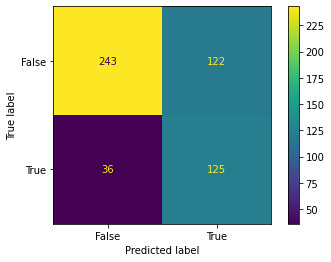

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h20_test_raw['cat_bin_actual']
predicted = h20_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.6996197718631179

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.5060728744939271

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.7763975155279503

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.6657534246575343

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.6127450980392157

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.6996197718631179, 'Precision': 0.5060728744939271, 'Sensitivity_recall': 0.7763975155279503, 'Specificity': 0.6657534246575343, 'F1_score': 0.6127450980392157}


### TEST H2020 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge18_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1              -1_deutschland_immer_merkel_deutschen
1       0            0_merkel_deutschland_deutschen_deutsche
2       1             1_flüchtlinge_asylanten_asyl_migranten
3       2                2_islam_moslems_muslimischen_moslem
4       3          3_politiker_politik_politikern_demokratie
5       4              4_medien_journalismus_propaganda_news
6       5                            5_grünen_grüne_grün_rot
7       6                   6_türkei_türken_türke_türkischen
8       7                 7_tweet_twitter_facebook_retweeten
9       8                       8_geld_zahlen_millionen_shop
10      9             9_macmike_bka_gutachten_kugelschreiber
11     10                    10_idioten_dumm_dummheit_dummen
12     11               11_islam_moslems_europa_kindergärten
13     12         12_flüchtlinge_italien_italiener_migranten
14     13                    13_nazis_nazi_sprechen_neonazis
15     14          14_israel_jerusalem_palästinenser_israels
16     15                 15_neuwahlen_wähler_fdp_wahlsystem
17     16                          16_bild_bilder_kunst_foto
18     17             17_kirche_verrat_katholischen_religion
19     18               18_syrien_afghanistan_syrer_afghanen
20     19         19_spd_bundesparteitag_verhandlungen_union
21     20              20_polizei_polizisten_banner_polizist
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen
23     22                   22_afrikaner_afrika_china_europa
24     23                 23_russland_putins_russischen_nato
25     24                   24_fresse_gegessen_mad_schnitzel
26     25                      25_mord_märtyrer_töten_mörder
27     26                  26_rainer_trinken_flaschen_wasser
28     27   27_rassismus_rassisten_rassistischen_dargestellt
29     28              28_türken_türkei_türkisch_jahrhundert
30     29           29_terroristen_terror_unterstützung_dieb
31     30               30_jahr_neujahrsempfang_ändern_happy
32     31         31_kommunisten_linke_rebellion_kommunistin
33     32                         32_nacht_abend_gute_lieben
34     33                   33_krieg_nationen_kämpfer_truppe
35     34                  34_waffen_panzer_raketen_munition
36     35                     35_fahren_rnv_autobahnen_hause
37     36      36_familiennachzug_familien_subsidiär_familie
38     37                      37_sport_fußball_köln_abstieg
39     38                38_geblockt_sofort_stunden_gesperrt
40     39                       39_humor_witzig_satire_lacht
41     40            40_regierung_regieren_gewählt_charakter
42     41     41_antisemitismus_antisemitische_daher_artikel
43     42  42_patriotismus_nationalismus_patriotisch_patriot
44     43             43_jamaika_möglich_koalition_gespräche
45     44              44_ausland_unsichere_hast_stromkosten
46     45                   45_berlin_berliner_gipfel_ziehen
47     46     46_steuerzahler_griechen_steuergelder_schulden
48     47             47_katalonien_spanien_spaniens_brüssel

In [ ]:
h20_test_pred_values_true_pos['Topic'] = h20_test_pred_values_true_pos.index
h20_test_pred_values_true_pos

pred  percent  Topic
-1     75     60.0     -1
 0     17     13.6      0
 10     8      6.4     10
 5      5      4.0      5
 24     4      3.2     24
 8      2      1.6      8
 13     2      1.6     13
 1      2      1.6      1
 3      1      0.8      3
 2      1      0.8      2
 25     1      0.8     25
 27     1      0.8     27
 42     1      0.8     42
 23     1      0.8     23
 11     1      0.8     11
 7      1      0.8      7
 16     1      0.8     16
 6      1      0.8      6

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h20_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH20TP', 'percent':'%H20TP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_pos['Topic'] = h20_test_pred_values_false_pos.index
h20_test_pred_values_false_pos

pred    percent  Topic
-1     61  50.000000     -1
 0     15  12.295082      0
 10    13  10.655738     10
 13    11   9.016393     13
 2      7   5.737705      2
 5      5   4.098361      5
 39     2   1.639344     39
 11     2   1.639344     11
 6      2   1.639344      6
 30     1   0.819672     30
 27     1   0.819672     27
 24     1   0.819672     24
 28     1   0.819672     28

In [ ]:
df3 = h20_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH20FP', 'percent':'%H20FP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_true_neg['Topic'] = h20_test_pred_values_true_neg.index
h20_test_pred_values_true_neg

pred    percent  Topic
-1    135  55.555556     -1
 0     52  21.399177      0
 5     19   7.818930      5
 10     6   2.469136     10
 13     6   2.469136     13
 8      4   1.646091      8
 2      2   0.823045      2
 9      2   0.823045      9
 16     2   0.823045     16
 28     2   0.823045     28
 44     1   0.411523     44
 25     1   0.411523     25
 46     1   0.411523     46
 1      1   0.411523      1
 12     1   0.411523     12
 45     1   0.411523     45
 26     1   0.411523     26
 24     1   0.411523     24
 3      1   0.411523      3
 36     1   0.411523     36
 33     1   0.411523     33
 32     1   0.411523     32
 4      1   0.411523      4

In [ ]:
df4 = h20_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH20TN', 'percent':'%H20TN', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_neg['Topic'] = h20_test_pred_values_false_neg.index
h20_test_pred_values_false_neg

pred    percent  Topic
-1     21  58.333333     -1
 0      7  19.444444      0
 10     2   5.555556     10
 24     2   5.555556     24
 1      1   2.777778      1
 3      1   2.777778      3
 21     1   2.777778     21
 5      1   2.777778      5

In [ ]:
df5 = h20_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH20FN', 'percent':'%H20FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']] = df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H20', '%H20','%H20', '%H20']]
#df_to_round = df_to_round[['%H20', '%H20','%H20', '%H20']].round(2)
#df_to_round

Topic                                               Name predH20TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      75.0   
1       0            0_merkel_deutschland_deutschen_deutsche      17.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten       2.0   
3       2                2_islam_moslems_muslimischen_moslem       1.0   
4       3          3_politiker_politik_politikern_demokratie       1.0   
5       4              4_medien_journalismus_propaganda_news         0   
6       5                            5_grünen_grüne_grün_rot       5.0   
7       6                   6_türkei_türken_türke_türkischen       1.0   
8       7                 7_tweet_twitter_facebook_retweeten       1.0   
9       8                       8_geld_zahlen_millionen_shop       2.0   
10      9             9_macmike_bka_gutachten_kugelschreiber         0   
11     10                    10_idioten_dumm_dummheit_dummen       8.0   
12     11               11_islam_moslems_europa_kindergärten       1.0   
13     12         12_flüchtlinge_italien_italiener_migranten         0   
14     13                    13_nazis_nazi_sprechen_neonazis       2.0   
15     14          14_israel_jerusalem_palästinenser_israels         0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem         0   
17     16                          16_bild_bilder_kunst_foto       1.0   
18     17             17_kirche_verrat_katholischen_religion         0   
19     18               18_syrien_afghanistan_syrer_afghanen         0   
20     19         19_spd_bundesparteitag_verhandlungen_union         0   
21     20              20_polizei_polizisten_banner_polizist         0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen         0   
23     22                   22_afrikaner_afrika_china_europa         0   
24     23                 23_russland_putins_russischen_nato       1.0   
25     24                   24_fresse_gegessen_mad_schnitzel       4.0   
26     25                      25_mord_märtyrer_töten_mörder       1.0   
27     26                  26_rainer_trinken_flaschen_wasser         0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt       1.0   
29     28              28_türken_türkei_türkisch_jahrhundert         0   
30     29           29_terroristen_terror_unterstützung_dieb         0   
31     30               30_jahr_neujahrsempfang_ändern_happy         0   
32     31         31_kommunisten_linke_rebellion_kommunistin         0   
33     32                         32_nacht_abend_gute_lieben         0   
34     33                   33_krieg_nationen_kämpfer_truppe         0   
35     34                  34_waffen_panzer_raketen_munition         0   
36     35                     35_fahren_rnv_autobahnen_hause         0   
37     36      36_familiennachzug_familien_subsidiär_familie         0   
38     37                      37_sport_fußball_köln_abstieg         0   
39     38                38_geblockt_sofort_stunden_gesperrt         0   
40     39                       39_humor_witzig_satire_lacht         0   
41     40            40_regierung_regieren_gewählt_charakter         0   
42     41     41_antisemitismus_antisemitische_daher_artikel         0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot       1.0   
44     43             43_jamaika_möglich_koalition_gespräche         0   
45     44              44_ausland_unsichere_hast_stromkosten         0   
46     45                   45_berlin_berliner_gipfel_ziehen         0   
47     46     46_steuerzahler_griechen_steuergelder_schulden         0   
48     47             47_katalonien_spanien_spaniens_brüssel         0   

    %H20TP predH20FP  %H20FP predH20TN  %H20TN predH20FN  %H20FN  
0     60.0      61.0   50.00     135.0   55.56      21.0   58.33  
1     13.6      15.0   12.30      52.0   21.40       7.0   19.44  
2      1.6         0    0.00       1.0    0.41       1.0    2.78  
3      0.8       7.0    5.74       

In [ ]:
df_merged

Topic                                               Name predH20TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      75.0   
1       0            0_merkel_deutschland_deutschen_deutsche      17.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten       2.0   
3       2                2_islam_moslems_muslimischen_moslem       1.0   
4       3          3_politiker_politik_politikern_demokratie       1.0   
5       4              4_medien_journalismus_propaganda_news         0   
6       5                            5_grünen_grüne_grün_rot       5.0   
7       6                   6_türkei_türken_türke_türkischen       1.0   
8       7                 7_tweet_twitter_facebook_retweeten       1.0   
9       8                       8_geld_zahlen_millionen_shop       2.0   
10      9             9_macmike_bka_gutachten_kugelschreiber         0   
11     10                    10_idioten_dumm_dummheit_dummen       8.0   
12     11               11_islam_moslems_europa_kindergärten       1.0   
13     12         12_flüchtlinge_italien_italiener_migranten         0   
14     13                    13_nazis_nazi_sprechen_neonazis       2.0   
15     14          14_israel_jerusalem_palästinenser_israels         0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem         0   
17     16                          16_bild_bilder_kunst_foto       1.0   
18     17             17_kirche_verrat_katholischen_religion         0   
19     18               18_syrien_afghanistan_syrer_afghanen         0   
20     19         19_spd_bundesparteitag_verhandlungen_union         0   
21     20              20_polizei_polizisten_banner_polizist         0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen         0   
23     22                   22_afrikaner_afrika_china_europa         0   
24     23                 23_russland_putins_russischen_nato       1.0   
25     24                   24_fresse_gegessen_mad_schnitzel       4.0   
26     25                      25_mord_märtyrer_töten_mörder       1.0   
27     26                  26_rainer_trinken_flaschen_wasser         0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt       1.0   
29     28              28_türken_türkei_türkisch_jahrhundert         0   
30     29           29_terroristen_terror_unterstützung_dieb         0   
31     30               30_jahr_neujahrsempfang_ändern_happy         0   
32     31         31_kommunisten_linke_rebellion_kommunistin         0   
33     32                         32_nacht_abend_gute_lieben         0   
34     33                   33_krieg_nationen_kämpfer_truppe         0   
35     34                  34_waffen_panzer_raketen_munition         0   
36     35                     35_fahren_rnv_autobahnen_hause         0   
37     36      36_familiennachzug_familien_subsidiär_familie         0   
38     37                      37_sport_fußball_köln_abstieg         0   
39     38                38_geblockt_sofort_stunden_gesperrt         0   
40     39                       39_humor_witzig_satire_lacht         0   
41     40            40_regierung_regieren_gewählt_charakter         0   
42     41     41_antisemitismus_antisemitische_daher_artikel         0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot       1.0   
44     43             43_jamaika_möglich_koalition_gespräche         0   
45     44              44_ausland_unsichere_hast_stromkosten         0   
46     45                   45_berlin_berliner_gipfel_ziehen         0   
47     46     46_steuerzahler_griechen_steuergelder_schulden         0   
48     47             47_katalonien_spanien_spaniens_brüssel         0   

    %H20TP predH20FP  %H20FP predH20TN  %H20TN predH20FN  %H20FN  
0     60.0      61.0   50.00     135.0   55.56      21.0   58.33  
1     13.6      15.0   12.30      52.0   21.40       7.0   19.44  
2      1.6         0    0.00       1.0    0.41       1.0    2.78  
3      0.8       7.0    5.74       

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH20TP": int, "predH20TN":int, "predH20FP":int, "predH20FN":int})
df_merged

Topic                                               Name  predH20TP  \
0      -1              -1_deutschland_immer_merkel_deutschen         75   
1       0            0_merkel_deutschland_deutschen_deutsche         17   
2       1             1_flüchtlinge_asylanten_asyl_migranten          2   
3       2                2_islam_moslems_muslimischen_moslem          1   
4       3          3_politiker_politik_politikern_demokratie          1   
5       4              4_medien_journalismus_propaganda_news          0   
6       5                            5_grünen_grüne_grün_rot          5   
7       6                   6_türkei_türken_türke_türkischen          1   
8       7                 7_tweet_twitter_facebook_retweeten          1   
9       8                       8_geld_zahlen_millionen_shop          2   
10      9             9_macmike_bka_gutachten_kugelschreiber          0   
11     10                    10_idioten_dumm_dummheit_dummen          8   
12     11               11_islam_moslems_europa_kindergärten          1   
13     12         12_flüchtlinge_italien_italiener_migranten          0   
14     13                    13_nazis_nazi_sprechen_neonazis          2   
15     14          14_israel_jerusalem_palästinenser_israels          0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem          0   
17     16                          16_bild_bilder_kunst_foto          1   
18     17             17_kirche_verrat_katholischen_religion          0   
19     18               18_syrien_afghanistan_syrer_afghanen          0   
20     19         19_spd_bundesparteitag_verhandlungen_union          0   
21     20              20_polizei_polizisten_banner_polizist          0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen          0   
23     22                   22_afrikaner_afrika_china_europa          0   
24     23                 23_russland_putins_russischen_nato          1   
25     24                   24_fresse_gegessen_mad_schnitzel          4   
26     25                      25_mord_märtyrer_töten_mörder          1   
27     26                  26_rainer_trinken_flaschen_wasser          0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt          1   
29     28              28_türken_türkei_türkisch_jahrhundert          0   
30     29           29_terroristen_terror_unterstützung_dieb          0   
31     30               30_jahr_neujahrsempfang_ändern_happy          0   
32     31         31_kommunisten_linke_rebellion_kommunistin          0   
33     32                         32_nacht_abend_gute_lieben          0   
34     33                   33_krieg_nationen_kämpfer_truppe          0   
35     34                  34_waffen_panzer_raketen_munition          0   
36     35                     35_fahren_rnv_autobahnen_hause          0   
37     36      36_familiennachzug_familien_subsidiär_familie          0   
38     37                      37_sport_fußball_köln_abstieg          0   
39     38                38_geblockt_sofort_stunden_gesperrt          0   
40     39                       39_humor_witzig_satire_lacht          0   
41     40            40_regierung_regieren_gewählt_charakter          0   
42     41     41_antisemitismus_antisemitische_daher_artikel          0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot          1   
44     43             43_jamaika_möglich_koalition_gespräche          0   
45     44              44_ausland_unsichere_hast_stromkosten          0   
46     45                   45_berlin_berliner_gipfel_ziehen          0   
47     46     46_steuerzahler_griechen_steuergelder_schulden          0   
48     47             47_katalonien_spanien_spaniens_brüssel          0   

    %H20TP  predH20FP  %H20FP  predH20TN  %H20TN  predH20FN  %H20FN  
0     60.0         61   50.00        135   55.56         21   58.33  
1     13.6         15   12.30         52   21.40          7   19.44  
2      1.6          0    0.00          1   

In [ ]:
df_percent = df_merged[['Topic','%H20TP', '%H20TN','%H20FP', '%H20FN','Name']]
df_percent

Topic  %H20TP  %H20TN  %H20FP  %H20FN  \
0      -1    60.0   55.56   50.00   58.33   
1       0    13.6   21.40   12.30   19.44   
2       1     1.6    0.41    0.00    2.78   
3       2     0.8    0.82    5.74    0.00   
4       3     0.8    0.41    0.00    2.78   
5       4     0.0    0.41    0.00    0.00   
6       5     4.0    7.82    4.10    2.78   
7       6     0.8    0.00    1.64    0.00   
8       7     0.8    0.00    0.00    0.00   
9       8     1.6    1.65    0.00    0.00   
10      9     0.0    0.82    0.00    0.00   
11     10     6.4    2.47   10.66    5.56   
12     11     0.8    0.00    1.64    0.00   
13     12     0.0    0.41    0.00    0.00   
14     13     1.6    2.47    9.02    0.00   
15     14     0.0    0.00    0.00    0.00   
16     15     0.0    0.00    0.00    0.00   
17     16     0.8    0.82    0.00    0.00   
18     17     0.0    0.00    0.00    0.00   
19     18     0.0    0.00    0.00    0.00   
20     19     0.0    0.00    0.00    0.00   
21     20     0.0    0.00    0.00    0.00   
22     21     0.0    0.00    0.00    2.78   
23     22     0.0    0.00    0.00    0.00   
24     23     0.8    0.00    0.00    0.00   
25     24     3.2    0.41    0.82    5.56   
26     25     0.8    0.41    0.00    0.00   
27     26     0.0    0.41    0.00    0.00   
28     27     0.8    0.00    0.82    0.00   
29     28     0.0    0.82    0.82    0.00   
30     29     0.0    0.00    0.00    0.00   
31     30     0.0    0.00    0.82    0.00   
32     31     0.0    0.00    0.00    0.00   
33     32     0.0    0.41    0.00    0.00   
34     33     0.0    0.41    0.00    0.00   
35     34     0.0    0.00    0.00    0.00   
36     35     0.0    0.00    0.00    0.00   
37     36     0.0    0.41    0.00    0.00   
38     37     0.0    0.00    0.00    0.00   
39     38     0.0    0.00    0.00    0.00   
40     39     0.0    0.00    1.64    0.00   
41     40     0.0    0.00    0.00    0.00   
42     41     0.0    0.00    0.00    0.00   
43     42     0.8    0.00    0.00    0.00   
44     43     0.0    0.00    0.00    0.00   
45     44     0.0    0.41    0.00    0.00   
46     45     0.0    0.41    0.00    0.00   
47     46     0.0    0.41    0.00    0.00   
48     47     0.0    0.00    0.00    0.00   

                                                 Name  
0               -1_deutschland_immer_merkel_deutschen  
1             0_merkel_deutschland_deutschen_deutsche  
2              1_flüchtlinge_asylanten_asyl_migranten  
3                 2_islam_moslems_muslimischen_moslem  
4           3_politiker_politik_politikern_demokratie  
5               4_medien_journalismus_propaganda_news  
6                             5_grünen_grüne_grün_rot  
7                    6_türkei_türken_türke_türkischen  
8                  7_tweet_twitter_facebook_retweeten  
9                        8_geld_zahlen_millionen_shop  
10             9_macmike_bka_gutachten_kugelschreiber  
11                    10_idioten_dumm_dummheit_dummen  
12               11_islam_moslems_europa_kindergärten  
13         12_flüchtlinge_italien_italiener_migranten  
14                    13_nazis_nazi_sprechen_neonazis  
15          14_israel_jerusalem_palästinenser_israels  
16                 15_neuwahlen_wähler_fdp_wahlsystem  
17                          16_bild_bilder_kunst_foto  
18             17_kirche_verrat_katholischen_religion  
19               18_syrien_afghanistan_syrer_afghanen  
20         19_spd_bundesparteitag_verhandlungen_union  
21              20_polizei_polizisten_banner_polizist  
22    21_schulabschluss_schulz_sitzengeblieben_sitzen  
23                   22_afrikaner_afrika_china_europa  
24                 23_russland_putins_russischen_nato  
25                   24_fresse_gegessen_mad_schnitzel  
26                      25_mord_märtyrer_töten_mörder  
27                  26_rainer_trinken_flaschen_wasser  
28   27_rassismus_rassisten_rassistischen_dargestellt  
29              28_türken_türkei_türkisch_jahrhundert  
30           29_t

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

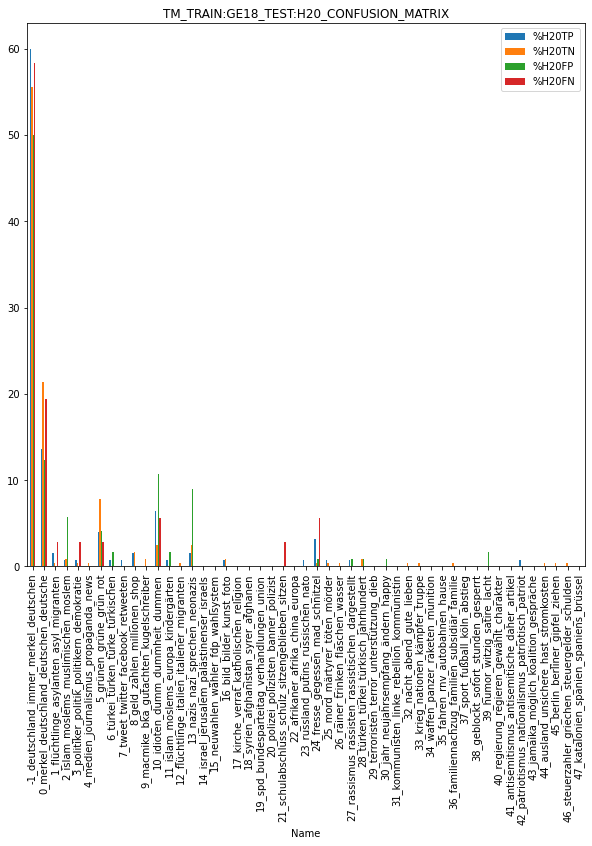

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX.plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:H20_CONFUSION_MATRIX")

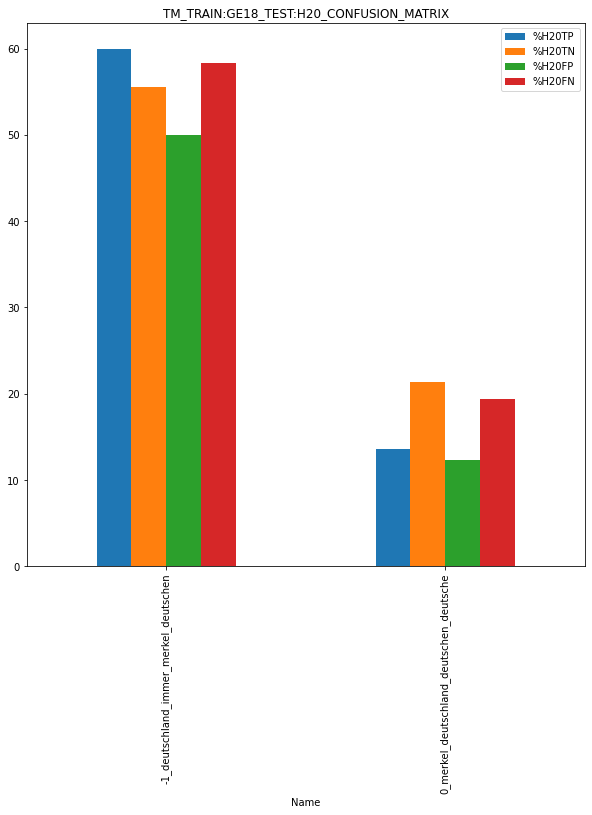

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:H20_CONFUSION_MATRIX")

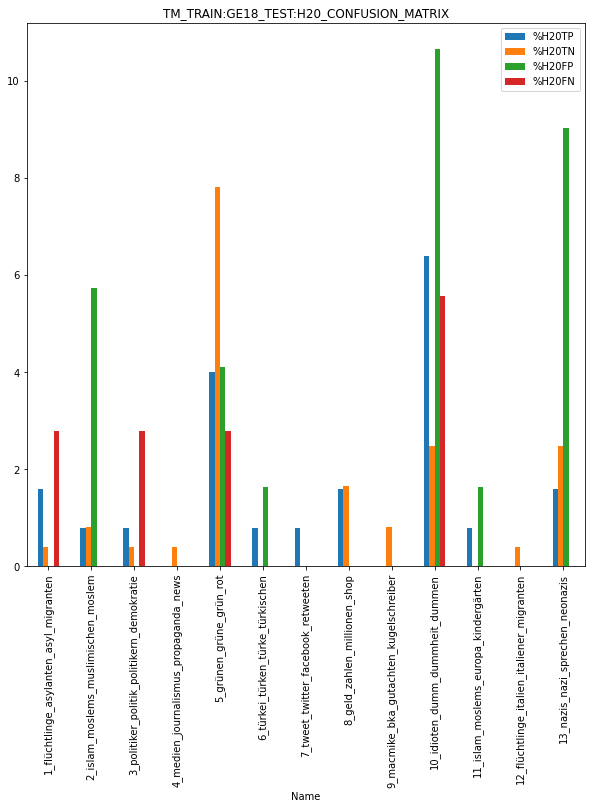

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:H20_CONFUSION_MATRIX")

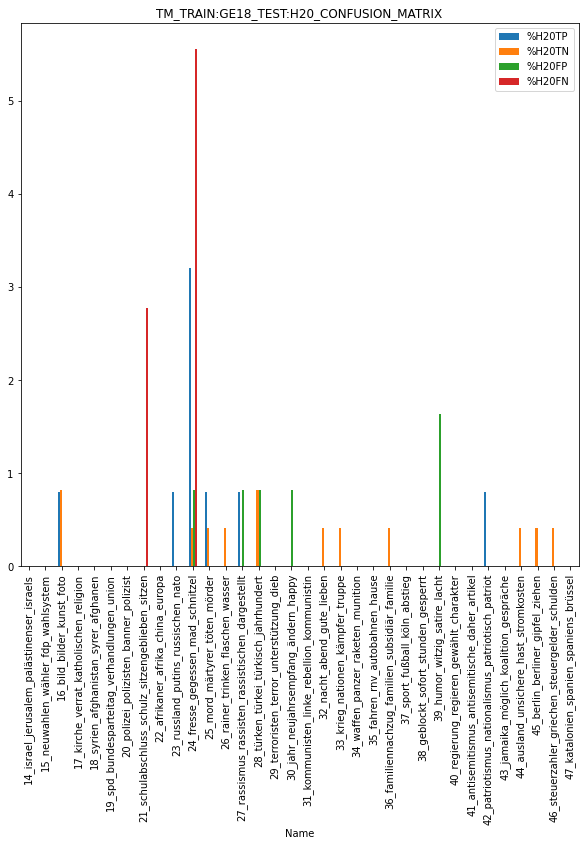

In [ ]:
train_ge18_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:H20_CONFUSION_MATRIX")

## Klassifikation ML_Geeks, trainiert auf GERMEVAL2018

### Test GE2018

In [ ]:
train_ge18_class_ge18 = pd.read_csv('/content/NSIT_GERMEVAL2018_Task_A_submission_DE_A.csv')
train_ge18_class_ge18


task1
0         1
1         0
2         0
3         1
4         0
...     ...
3527      1
3528      1
3529      1
3530      1
3531      0

[3532 rows x 1 columns]

In [ ]:
train_ge18_class_ge18['task1'] = train_ge18_class_ge18['task1'].map({0: 1, 1: 0}).astype(int)
train_ge18_class_ge18

task1
0         0
1         1
2         1
3         0
4         1
...     ...
3527      0
3528      0
3529      0
3530      0
3531      1

[3532 rows x 1 columns]

In [ ]:
ge18_test_class_values = pd.DataFrame(train_ge18_class_ge18['task1'].value_counts())
ge18_test_class_values

task1
0   2699
1    833

In [ ]:
ge18_test_class_values['task1']

0    2699
1     833
Name: task1, dtype: int64

In [ ]:
ge18_test_raw['class'] = train_ge18_class_ge18['task1']
ge18_test_raw

TWEET      OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...    OTHER  OTHER    -1   
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...    OTHER  OTHER     2   
2     #Merkel rollt dem Emir von #Katar, der islamis...    OTHER  OTHER    -1   
3     „Merle ist kein junges unschuldiges Mädchen“ K...    OTHER  OTHER     0   
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE  ABUSE    12   
...                                                 ...      ...    ...   ...   
3527  @schlabonski tja, es können einen nicht alle L...    OTHER  OTHER     0   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE  ABUSE    -1   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE  ABUSE    -1   
3530  @stephanweil was ist nun mit kostenlosen Kitas...    OTHER  OTHER    -1   
3531  @Bartzissey Denn Minderheiten sind für Linke j...    OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
0         0               0                  0  
1         1               0                  1  
2         1               0                  0  
3         0               0                  0  
4         1               1                  0  
...     ...             ...                ...  
3527      0               0                  0  
3528      0               1                  1  
3529      0               1                  1  
3530      0               0                  0  
3531      1               0                  0  

[3532 rows x 7 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge18_test_true_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 1)]
ge18_test_true_pos

TWEET      OFF     CAT  \
4     @umweltundaktiv Asylantenflut bringt eben nur ...  OFFENSE   ABUSE   
10    @IvyandWoe Ich weiß halt, wie man Frauen zum M...  OFFENSE   ABUSE   
15    @LWaff @UnzufriedenerB |LBR| Laßt doch endlich...  OFFENSE   ABUSE   
16    @heuteshow Besser einen schwarz arbeiten zu la...  OFFENSE   ABUSE   
17    @elmo31226 @MartinSchulz @Ralf_Stegner Von mir...  OFFENSE  INSULT   
...                                                 ...      ...     ...   
3497  @AfD_Support |LBR| Nur Jauche durch die Asylan...  OFFENSE   ABUSE   
3505  @JoeHellBack @ThomasMichael71 @alexa_jung60 @T...  OFFENSE   ABUSE   
3507  Merkel zerstört den bürgerlich-konservativen K...  OFFENSE   ABUSE   
3519    Feminismus ist der Islamismus der Weiblichkeit.  OFFENSE   ABUSE   
3526  @SteinbachErika Ich finde AFD Wähler besser al...  OFFENSE  INSULT   

      pred  class  cat_bin_actual  cat_bin_predicted  
4       12      1               1                  0  
10       0      1               1                  0  
15      13      1               1                  0  
16      27      1               1                  1  
17      -1      1               1                  0  
...    ...    ...             ...                ...  
3497     1      1               1                  1  
3505     2      1               1                  0  
3507    -1      1               1                  0  
3519     2      1               1                  0  
3526    24      1               1                  1  

[478 rows x 7 columns]

In [ ]:
ge18_test_pred_values_true_pos = pd.DataFrame(ge18_test_true_pos['pred'].value_counts())
ge18_test_pred_values_true_pos['percent'] = (ge18_test_pred_values_true_pos['pred'] / ge18_test_pred_values_true_pos['pred'].sum()) * 100
ge18_test_pred_values_true_pos

pred    percent
-1    274  57.322176
 0     68  14.225941
 1     21   4.393305
 2     19   3.974895
 5     17   3.556485
 10     9   1.882845
 13     7   1.464435
 6      6   1.255230
 14     5   1.046025
 11     5   1.046025
 3      5   1.046025
 4      4   0.836820
 24     4   0.836820
 8      4   0.836820
 17     3   0.627615
 12     3   0.627615
 22     3   0.627615
 27     3   0.627615
 32     2   0.418410
 39     2   0.418410
 40     1   0.209205
 21     1   0.209205
 34     1   0.209205
 26     1   0.209205
 15     1   0.209205
 7      1   0.209205
 46     1   0.209205
 31     1   0.209205
 20     1   0.209205
 19     1   0.209205
 38     1   0.209205
 37     1   0.209205
 28     1   0.209205
 18     1   0.209205

In [ ]:
ge18_test_false_pos = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 1)]
ge18_test_false_pos

TWEET    OFF    CAT  pred  \
1     @Tom174_ @davidbest95 Meine Reaktion; |LBR| Ni...  OTHER  OTHER     2   
2     #Merkel rollt dem Emir von #Katar, der islamis...  OTHER  OTHER    -1   
21    @Beatrix_vStorch @c_lindner @nicolabeerfdp Glä...  OTHER  OTHER    11   
29    @Namiimon @CayVL @mountainman1977 @zeitonline ...  OTHER  OTHER     0   
31    Früher hatte man Sex. |LBR| Heute hat man sexu...  OTHER  OTHER     0   
...                                                 ...    ...    ...   ...   
3481  @freeWorld2 @rspctfl @NoBurkaverbot @m8Flo @Th...  OTHER  OTHER    -1   
3508  @klick Sorry, ich sehe den Zusammenhang zwisch...  OTHER  OTHER     2   
3518  Wer nur in den Rückspiegel schaut, fährt den K...  OTHER  OTHER    -1   
3522  Heil dir im Siegerkranz,Herrscher des Vaterlan...  OTHER  OTHER     0   
3531  @Bartzissey Denn Minderheiten sind für Linke j...  OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
1         1               0                  1  
2         1               0                  0  
21        1               0                  0  
29        1               0                  0  
31        1               0                  0  
...     ...             ...                ...  
3481      1               0                  1  
3508      1               0                  0  
3518      1               0                  0  
3522      1               0                  1  
3531      1               0                  0  

[355 rows x 7 columns]

In [ ]:
ge18_test_pred_values_false_pos = pd.DataFrame(ge18_test_false_pos['pred'].value_counts())
ge18_test_pred_values_false_pos['percent'] = (ge18_test_pred_values_false_pos['pred'] / ge18_test_pred_values_false_pos['pred'].sum()) * 100
ge18_test_pred_values_false_pos

pred    percent
-1    203  57.183099
 0     59  16.619718
 2     13   3.661972
 1     12   3.380282
 5      7   1.971831
 8      6   1.690141
 33     5   1.408451
 7      5   1.408451
 6      4   1.126761
 14     4   1.126761
 3      3   0.845070
 32     3   0.845070
 11     3   0.845070
 4      3   0.845070
 17     3   0.845070
 27     3   0.845070
 13     2   0.563380
 18     2   0.563380
 26     2   0.563380
 42     2   0.563380
 39     1   0.281690
 22     1   0.281690
 29     1   0.281690
 34     1   0.281690
 45     1   0.281690
 23     1   0.281690
 21     1   0.281690
 10     1   0.281690
 44     1   0.281690
 12     1   0.281690
 15     1   0.281690

In [ ]:
ge18_test_true_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OTHER') & (ge18_test_raw['class'] == 0)]
ge18_test_true_neg

TWEET    OFF    CAT  pred  \
0     Meine Mutter hat mir erzählt, dass mein Vater ...  OTHER  OTHER    -1   
3     „Merle ist kein junges unschuldiges Mädchen“ K...  OTHER  OTHER     0   
5     @_StultaMundi Die Bibel enthält ebenfalls Gese...  OTHER  OTHER    -1   
6     @Thueringen_ @Miquwarchar @Pontifex_de Man mun...  OTHER  OTHER    -1   
7     @hugresch @saltomentale Seit dem ist die Gesel...  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
3520           @gabonn Wer lacht denn da so dreckig ???  OTHER  OTHER    39   
3523  @rspctfl @everlast_fs @m8Flo @BolzAndrea @Inne...  OTHER  OTHER    -1   
3524  #Grüne bestehen auf Sanktionen gegen #Russland...  OTHER  OTHER    -1   
3527  @schlabonski tja, es können einen nicht alle L...  OTHER  OTHER     0   
3530  @stephanweil was ist nun mit kostenlosen Kitas...  OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
0         0               0                  0  
3         0               0                  0  
5         0               0                  0  
6         0               0                  0  
7         0               0                  0  
...     ...             ...                ...  
3520      0               0                  0  
3523      0               0                  0  
3524      0               0                  0  
3527      0               0                  0  
3530      0               0                  0  

[1975 rows x 7 columns]

In [ ]:
ge18_test_pred_values_true_neg = pd.DataFrame(ge18_test_true_neg['pred'].value_counts())
ge18_test_pred_values_true_neg['percent'] = (ge18_test_pred_values_true_neg['pred'] / ge18_test_pred_values_true_neg['pred'].sum()) * 100
ge18_test_pred_values_true_neg

pred    percent
-1   1151  58.278481
 0    417  21.113924
 7     39   1.974684
 1     34   1.721519
 8     27   1.367089
 17    20   1.012658
 15    19   0.962025
 5     18   0.911392
 27    17   0.860759
 2     16   0.810127
 3     14   0.708861
 6     14   0.708861
 16    12   0.607595
 41    11   0.556962
 14    11   0.556962
 4     11   0.556962
 30     9   0.455696
 13     8   0.405063
 35     8   0.405063
 19     8   0.405063
 24     8   0.405063
 25     7   0.354430
 18     7   0.354430
 11     7   0.354430
 20     7   0.354430
 36     6   0.303797
 45     6   0.303797
 10     5   0.253165
 42     5   0.253165
 32     5   0.253165
 31     5   0.253165
 26     5   0.253165
 21     5   0.253165
 44     4   0.202532
 29     4   0.202532
 39     4   0.202532
 40     3   0.151899
 33     3   0.151899
 46     2   0.101266
 38     2   0.101266
 43     2   0.101266
 23     2   0.101266
 12     2   0.101266
 34     2   0.101266
 22     1   0.050633
 28     1   0.050633
 37     1   0.050633

In [ ]:
ge18_test_false_neg = ge18_test_raw.loc[(ge18_test_raw['OFF'] == 'OFFENSE') & (ge18_test_raw['class'] == 0)]
ge18_test_false_neg

TWEET      OFF     CAT  \
9     @FeePatzer Frauen zu einem "Ja" zu überreden, ...  OFFENSE   ABUSE   
11     Liebe Freunde, Gauck,das Symbol des Sklaventums!  OFFENSE   ABUSE   
13    wen interessiert denn die Meinung des Außenmin...  OFFENSE  INSULT   
18    @BlondJedi @dittmar_katrin Zum Mond? Da sind d...  OFFENSE  INSULT   
27    @Namiimon @CayVL @mountainman1977 @zeitonline ...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
3517  @Alltags_Kotze Dein Feminismus und Genderquats...  OFFENSE   ABUSE   
3521  @UdoUlfkotte Hauptsache den Asylanten gehts ge...  OFFENSE   ABUSE   
3525  @ThomasMichael71 @mountainman1977 @houelle_bec...  OFFENSE   ABUSE   
3528  @RKnillmann @lawyerberlin @AfD Aha, der Islam ...  OFFENSE   ABUSE   
3529  @podilein Mannheim, weltoffen und kunterbunt. ...  OFFENSE   ABUSE   

      pred  class  cat_bin_actual  cat_bin_predicted  
9       -1      0               1                  0  
11      -1      0               1                  0  
13      -1      0               1                  0  
18      -1      0               1                  0  
27       0      0               1                  0  
...    ...    ...             ...                ...  
3517     0      0               1                  1  
3521    12      0               1                  0  
3525    41      0               1                  0  
3528    -1      0               1                  1  
3529    -1      0               1                  1  

[724 rows x 7 columns]

In [ ]:
ge18_test_pred_values_false_neg = pd.DataFrame(ge18_test_false_neg['pred'].value_counts())
ge18_test_pred_values_false_neg['percent'] = (ge18_test_pred_values_false_neg['pred'] / ge18_test_pred_values_false_neg['pred'].sum()) * 100
ge18_test_pred_values_false_neg

pred    percent
-1    401  55.386740
 0    153  21.132597
 2     36   4.972376
 1     23   3.176796
 5     13   1.795580
 13    10   1.381215
 27     8   1.104972
 4      7   0.966851
 11     7   0.966851
 10     6   0.828729
 12     6   0.828729
 3      5   0.690608
 33     4   0.552486
 24     4   0.552486
 29     3   0.414365
 22     3   0.414365
 6      3   0.414365
 32     3   0.414365
 20     3   0.414365
 39     3   0.414365
 14     2   0.276243
 18     2   0.276243
 43     2   0.276243
 21     2   0.276243
 41     2   0.276243
 7      2   0.276243
 8      2   0.276243
 45     1   0.138122
 40     1   0.138122
 15     1   0.138122
 28     1   0.138122
 35     1   0.138122
 16     1   0.138122
 42     1   0.138122
 26     1   0.138122
 23     1   0.138122

In [ ]:
ge18_test_raw['cat_bin_actual'] = ge18_test_raw['OFF'].map({'OTHER': 0, 'OFFENSE': 1}).astype(int)
#ge18_test_raw['cat_bin_predicted'] = ge18_test_raw['class'].map({1: 1, 0: 0}).astype(int)
ge18_test_raw['cat_bin_predicted'] = ge18_test_raw['class'].astype(int)


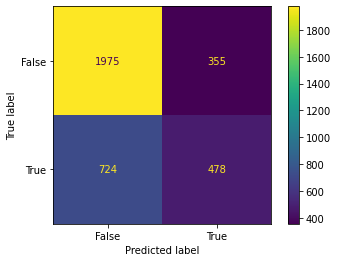

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = ge18_test_raw['cat_bin_actual']
predicted = ge18_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.6945073612684032

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.5738295318127251

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.39767054908485855

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.8476394849785408

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.4697788697788698

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.6945073612684032, 'Precision': 0.5738295318127251, 'Sensitivity_recall': 0.39767054908485855, 'Specificity': 0.8476394849785408, 'F1_score': 0.4697788697788698}


### TEST GE2018 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge18_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1              -1_deutschland_immer_merkel_deutschen
1       0            0_merkel_deutschland_deutschen_deutsche
2       1             1_flüchtlinge_asylanten_asyl_migranten
3       2                2_islam_moslems_muslimischen_moslem
4       3          3_politiker_politik_politikern_demokratie
5       4              4_medien_journalismus_propaganda_news
6       5                            5_grünen_grüne_grün_rot
7       6                   6_türkei_türken_türke_türkischen
8       7                 7_tweet_twitter_facebook_retweeten
9       8                       8_geld_zahlen_millionen_shop
10      9             9_macmike_bka_gutachten_kugelschreiber
11     10                    10_idioten_dumm_dummheit_dummen
12     11               11_islam_moslems_europa_kindergärten
13     12         12_flüchtlinge_italien_italiener_migranten
14     13                    13_nazis_nazi_sprechen_neonazis
15     14          14_israel_jerusalem_palästinenser_israels
16     15                 15_neuwahlen_wähler_fdp_wahlsystem
17     16                          16_bild_bilder_kunst_foto
18     17             17_kirche_verrat_katholischen_religion
19     18               18_syrien_afghanistan_syrer_afghanen
20     19         19_spd_bundesparteitag_verhandlungen_union
21     20              20_polizei_polizisten_banner_polizist
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen
23     22                   22_afrikaner_afrika_china_europa
24     23                 23_russland_putins_russischen_nato
25     24                   24_fresse_gegessen_mad_schnitzel
26     25                      25_mord_märtyrer_töten_mörder
27     26                  26_rainer_trinken_flaschen_wasser
28     27   27_rassismus_rassisten_rassistischen_dargestellt
29     28              28_türken_türkei_türkisch_jahrhundert
30     29           29_terroristen_terror_unterstützung_dieb
31     30               30_jahr_neujahrsempfang_ändern_happy
32     31         31_kommunisten_linke_rebellion_kommunistin
33     32                         32_nacht_abend_gute_lieben
34     33                   33_krieg_nationen_kämpfer_truppe
35     34                  34_waffen_panzer_raketen_munition
36     35                     35_fahren_rnv_autobahnen_hause
37     36      36_familiennachzug_familien_subsidiär_familie
38     37                      37_sport_fußball_köln_abstieg
39     38                38_geblockt_sofort_stunden_gesperrt
40     39                       39_humor_witzig_satire_lacht
41     40            40_regierung_regieren_gewählt_charakter
42     41     41_antisemitismus_antisemitische_daher_artikel
43     42  42_patriotismus_nationalismus_patriotisch_patriot
44     43             43_jamaika_möglich_koalition_gespräche
45     44              44_ausland_unsichere_hast_stromkosten
46     45                   45_berlin_berliner_gipfel_ziehen
47     46     46_steuerzahler_griechen_steuergelder_schulden
48     47             47_katalonien_spanien_spaniens_brüssel

In [ ]:
ge18_test_pred_values_true_pos['Topic'] = ge18_test_pred_values_true_pos.index
ge18_test_pred_values_true_pos

pred    percent  Topic
-1    274  57.322176     -1
 0     68  14.225941      0
 1     21   4.393305      1
 2     19   3.974895      2
 5     17   3.556485      5
 10     9   1.882845     10
 13     7   1.464435     13
 6      6   1.255230      6
 14     5   1.046025     14
 11     5   1.046025     11
 3      5   1.046025      3
 4      4   0.836820      4
 24     4   0.836820     24
 8      4   0.836820      8
 17     3   0.627615     17
 12     3   0.627615     12
 22     3   0.627615     22
 27     3   0.627615     27
 32     2   0.418410     32
 39     2   0.418410     39
 40     1   0.209205     40
 21     1   0.209205     21
 34     1   0.209205     34
 26     1   0.209205     26
 15     1   0.209205     15
 7      1   0.209205      7
 46     1   0.209205     46
 31     1   0.209205     31
 20     1   0.209205     20
 19     1   0.209205     19
 38     1   0.209205     38
 37     1   0.209205     37
 28     1   0.209205     28
 18     1   0.209205     18

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge18_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE18TP', 'percent':'%GE18TP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_pos['Topic'] = ge18_test_pred_values_false_pos.index
ge18_test_pred_values_false_pos

pred    percent  Topic
-1    203  57.183099     -1
 0     59  16.619718      0
 2     13   3.661972      2
 1     12   3.380282      1
 5      7   1.971831      5
 8      6   1.690141      8
 33     5   1.408451     33
 7      5   1.408451      7
 6      4   1.126761      6
 14     4   1.126761     14
 3      3   0.845070      3
 32     3   0.845070     32
 11     3   0.845070     11
 4      3   0.845070      4
 17     3   0.845070     17
 27     3   0.845070     27
 13     2   0.563380     13
 18     2   0.563380     18
 26     2   0.563380     26
 42     2   0.563380     42
 39     1   0.281690     39
 22     1   0.281690     22
 29     1   0.281690     29
 34     1   0.281690     34
 45     1   0.281690     45
 23     1   0.281690     23
 21     1   0.281690     21
 10     1   0.281690     10
 44     1   0.281690     44
 12     1   0.281690     12
 15     1   0.281690     15

In [ ]:
df3 = ge18_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE18FP', 'percent':'%GE18FP', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_true_neg['Topic'] = ge18_test_pred_values_true_neg.index
ge18_test_pred_values_true_neg

pred    percent  Topic
-1   1151  58.278481     -1
 0    417  21.113924      0
 7     39   1.974684      7
 1     34   1.721519      1
 8     27   1.367089      8
 17    20   1.012658     17
 15    19   0.962025     15
 5     18   0.911392      5
 27    17   0.860759     27
 2     16   0.810127      2
 3     14   0.708861      3
 6     14   0.708861      6
 16    12   0.607595     16
 41    11   0.556962     41
 14    11   0.556962     14
 4     11   0.556962      4
 30     9   0.455696     30
 13     8   0.405063     13
 35     8   0.405063     35
 19     8   0.405063     19
 24     8   0.405063     24
 25     7   0.354430     25
 18     7   0.354430     18
 11     7   0.354430     11
 20     7   0.354430     20
 36     6   0.303797     36
 45     6   0.303797     45
 10     5   0.253165     10
 42     5   0.253165     42
 32     5   0.253165     32
 31     5   0.253165     31
 26     5   0.253165     26
 21     5   0.253165     21
 44     4   0.202532     44
 29     4   0.202532     29
 39     4   0.202532     39
 40     3   0.151899     40
 33     3   0.151899     33
 46     2   0.101266     46
 38     2   0.101266     38
 43     2   0.101266     43
 23     2   0.101266     23
 12     2   0.101266     12
 34     2   0.101266     34
 22     1   0.050633     22
 28     1   0.050633     28
 37     1   0.050633     37

In [ ]:
df4 = ge18_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE18TN', 'percent':'%GE18TN', 'Topic':'Topic'})

In [ ]:
ge18_test_pred_values_false_neg['Topic'] = ge18_test_pred_values_false_neg.index
ge18_test_pred_values_false_neg

pred    percent  Topic
-1    401  55.386740     -1
 0    153  21.132597      0
 2     36   4.972376      2
 1     23   3.176796      1
 5     13   1.795580      5
 13    10   1.381215     13
 27     8   1.104972     27
 4      7   0.966851      4
 11     7   0.966851     11
 10     6   0.828729     10
 12     6   0.828729     12
 3      5   0.690608      3
 33     4   0.552486     33
 24     4   0.552486     24
 29     3   0.414365     29
 22     3   0.414365     22
 6      3   0.414365      6
 32     3   0.414365     32
 20     3   0.414365     20
 39     3   0.414365     39
 14     2   0.276243     14
 18     2   0.276243     18
 43     2   0.276243     43
 21     2   0.276243     21
 41     2   0.276243     41
 7      2   0.276243      7
 8      2   0.276243      8
 45     1   0.138122     45
 40     1   0.138122     40
 15     1   0.138122     15
 28     1   0.138122     28
 35     1   0.138122     35
 16     1   0.138122     16
 42     1   0.138122     42
 26     1   0.138122     26
 23     1   0.138122     23

In [ ]:
df5 = ge18_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE18FN', 'percent':'%GE18FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']] = df_merged[['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN']].astype(float).round(2)
df_merged
#df_to_round = df_OTHER_merged[['%GE18', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE18', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predGE18TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      274.0   
1       0            0_merkel_deutschland_deutschen_deutsche       68.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten       21.0   
3       2                2_islam_moslems_muslimischen_moslem       19.0   
4       3          3_politiker_politik_politikern_demokratie        5.0   
5       4              4_medien_journalismus_propaganda_news        4.0   
6       5                            5_grünen_grüne_grün_rot       17.0   
7       6                   6_türkei_türken_türke_türkischen        6.0   
8       7                 7_tweet_twitter_facebook_retweeten        1.0   
9       8                       8_geld_zahlen_millionen_shop        4.0   
10      9             9_macmike_bka_gutachten_kugelschreiber          0   
11     10                    10_idioten_dumm_dummheit_dummen        9.0   
12     11               11_islam_moslems_europa_kindergärten        5.0   
13     12         12_flüchtlinge_italien_italiener_migranten        3.0   
14     13                    13_nazis_nazi_sprechen_neonazis        7.0   
15     14          14_israel_jerusalem_palästinenser_israels        5.0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem        1.0   
17     16                          16_bild_bilder_kunst_foto          0   
18     17             17_kirche_verrat_katholischen_religion        3.0   
19     18               18_syrien_afghanistan_syrer_afghanen        1.0   
20     19         19_spd_bundesparteitag_verhandlungen_union        1.0   
21     20              20_polizei_polizisten_banner_polizist        1.0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen        1.0   
23     22                   22_afrikaner_afrika_china_europa        3.0   
24     23                 23_russland_putins_russischen_nato          0   
25     24                   24_fresse_gegessen_mad_schnitzel        4.0   
26     25                      25_mord_märtyrer_töten_mörder          0   
27     26                  26_rainer_trinken_flaschen_wasser        1.0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt        3.0   
29     28              28_türken_türkei_türkisch_jahrhundert        1.0   
30     29           29_terroristen_terror_unterstützung_dieb          0   
31     30               30_jahr_neujahrsempfang_ändern_happy          0   
32     31         31_kommunisten_linke_rebellion_kommunistin        1.0   
33     32                         32_nacht_abend_gute_lieben        2.0   
34     33                   33_krieg_nationen_kämpfer_truppe          0   
35     34                  34_waffen_panzer_raketen_munition        1.0   
36     35                     35_fahren_rnv_autobahnen_hause          0   
37     36      36_familiennachzug_familien_subsidiär_familie          0   
38     37                      37_sport_fußball_köln_abstieg        1.0   
39     38                38_geblockt_sofort_stunden_gesperrt        1.0   
40     39                       39_humor_witzig_satire_lacht        2.0   
41     40            40_regierung_regieren_gewählt_charakter        1.0   
42     41     41_antisemitismus_antisemitische_daher_artikel          0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot          0   
44     43             43_jamaika_möglich_koalition_gespräche          0   
45     44              44_ausland_unsichere_hast_stromkosten          0   
46     45                   45_berlin_berliner_gipfel_ziehen          0   
47     46     46_steuerzahler_griechen_steuergelder_schulden        1.0   
48     47             47_katalonien_spanien_spaniens_brüssel          0   

    %GE18TP predGE18FP  %GE18FP predGE18TN  %GE18TN predGE18FN  %GE18FN  
0     57.32      203.0    57.18     1151.0    58.28      401.0    55.39  
1     14.23       59.0    16.62      417.0    21.11      153.0    21.13  
2      4.39       12.0     3.38

In [ ]:
df_merged

Topic                                               Name predGE18TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      274.0   
1       0            0_merkel_deutschland_deutschen_deutsche       68.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten       21.0   
3       2                2_islam_moslems_muslimischen_moslem       19.0   
4       3          3_politiker_politik_politikern_demokratie        5.0   
5       4              4_medien_journalismus_propaganda_news        4.0   
6       5                            5_grünen_grüne_grün_rot       17.0   
7       6                   6_türkei_türken_türke_türkischen        6.0   
8       7                 7_tweet_twitter_facebook_retweeten        1.0   
9       8                       8_geld_zahlen_millionen_shop        4.0   
10      9             9_macmike_bka_gutachten_kugelschreiber          0   
11     10                    10_idioten_dumm_dummheit_dummen        9.0   
12     11               11_islam_moslems_europa_kindergärten        5.0   
13     12         12_flüchtlinge_italien_italiener_migranten        3.0   
14     13                    13_nazis_nazi_sprechen_neonazis        7.0   
15     14          14_israel_jerusalem_palästinenser_israels        5.0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem        1.0   
17     16                          16_bild_bilder_kunst_foto          0   
18     17             17_kirche_verrat_katholischen_religion        3.0   
19     18               18_syrien_afghanistan_syrer_afghanen        1.0   
20     19         19_spd_bundesparteitag_verhandlungen_union        1.0   
21     20              20_polizei_polizisten_banner_polizist        1.0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen        1.0   
23     22                   22_afrikaner_afrika_china_europa        3.0   
24     23                 23_russland_putins_russischen_nato          0   
25     24                   24_fresse_gegessen_mad_schnitzel        4.0   
26     25                      25_mord_märtyrer_töten_mörder          0   
27     26                  26_rainer_trinken_flaschen_wasser        1.0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt        3.0   
29     28              28_türken_türkei_türkisch_jahrhundert        1.0   
30     29           29_terroristen_terror_unterstützung_dieb          0   
31     30               30_jahr_neujahrsempfang_ändern_happy          0   
32     31         31_kommunisten_linke_rebellion_kommunistin        1.0   
33     32                         32_nacht_abend_gute_lieben        2.0   
34     33                   33_krieg_nationen_kämpfer_truppe          0   
35     34                  34_waffen_panzer_raketen_munition        1.0   
36     35                     35_fahren_rnv_autobahnen_hause          0   
37     36      36_familiennachzug_familien_subsidiär_familie          0   
38     37                      37_sport_fußball_köln_abstieg        1.0   
39     38                38_geblockt_sofort_stunden_gesperrt        1.0   
40     39                       39_humor_witzig_satire_lacht        2.0   
41     40            40_regierung_regieren_gewählt_charakter        1.0   
42     41     41_antisemitismus_antisemitische_daher_artikel          0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot          0   
44     43             43_jamaika_möglich_koalition_gespräche          0   
45     44              44_ausland_unsichere_hast_stromkosten          0   
46     45                   45_berlin_berliner_gipfel_ziehen          0   
47     46     46_steuerzahler_griechen_steuergelder_schulden        1.0   
48     47             47_katalonien_spanien_spaniens_brüssel          0   

    %GE18TP predGE18FP  %GE18FP predGE18TN  %GE18TN predGE18FN  %GE18FN  
0     57.32      203.0    57.18     1151.0    58.28      401.0    55.39  
1     14.23       59.0    16.62      417.0    21.11      153.0    21.13  
2      4.39       12.0     3.38

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE18TP": int, "predGE18TN":int, "predGE18FP":int, "predGE18FN":int})
df_merged

Topic                                               Name  predGE18TP  \
0      -1              -1_deutschland_immer_merkel_deutschen         274   
1       0            0_merkel_deutschland_deutschen_deutsche          68   
2       1             1_flüchtlinge_asylanten_asyl_migranten          21   
3       2                2_islam_moslems_muslimischen_moslem          19   
4       3          3_politiker_politik_politikern_demokratie           5   
5       4              4_medien_journalismus_propaganda_news           4   
6       5                            5_grünen_grüne_grün_rot          17   
7       6                   6_türkei_türken_türke_türkischen           6   
8       7                 7_tweet_twitter_facebook_retweeten           1   
9       8                       8_geld_zahlen_millionen_shop           4   
10      9             9_macmike_bka_gutachten_kugelschreiber           0   
11     10                    10_idioten_dumm_dummheit_dummen           9   
12     11               11_islam_moslems_europa_kindergärten           5   
13     12         12_flüchtlinge_italien_italiener_migranten           3   
14     13                    13_nazis_nazi_sprechen_neonazis           7   
15     14          14_israel_jerusalem_palästinenser_israels           5   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem           1   
17     16                          16_bild_bilder_kunst_foto           0   
18     17             17_kirche_verrat_katholischen_religion           3   
19     18               18_syrien_afghanistan_syrer_afghanen           1   
20     19         19_spd_bundesparteitag_verhandlungen_union           1   
21     20              20_polizei_polizisten_banner_polizist           1   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen           1   
23     22                   22_afrikaner_afrika_china_europa           3   
24     23                 23_russland_putins_russischen_nato           0   
25     24                   24_fresse_gegessen_mad_schnitzel           4   
26     25                      25_mord_märtyrer_töten_mörder           0   
27     26                  26_rainer_trinken_flaschen_wasser           1   
28     27   27_rassismus_rassisten_rassistischen_dargestellt           3   
29     28              28_türken_türkei_türkisch_jahrhundert           1   
30     29           29_terroristen_terror_unterstützung_dieb           0   
31     30               30_jahr_neujahrsempfang_ändern_happy           0   
32     31         31_kommunisten_linke_rebellion_kommunistin           1   
33     32                         32_nacht_abend_gute_lieben           2   
34     33                   33_krieg_nationen_kämpfer_truppe           0   
35     34                  34_waffen_panzer_raketen_munition           1   
36     35                     35_fahren_rnv_autobahnen_hause           0   
37     36      36_familiennachzug_familien_subsidiär_familie           0   
38     37                      37_sport_fußball_köln_abstieg           1   
39     38                38_geblockt_sofort_stunden_gesperrt           1   
40     39                       39_humor_witzig_satire_lacht           2   
41     40            40_regierung_regieren_gewählt_charakter           1   
42     41     41_antisemitismus_antisemitische_daher_artikel           0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot           0   
44     43             43_jamaika_möglich_koalition_gespräche           0   
45     44              44_ausland_unsichere_hast_stromkosten           0   
46     45                   45_berlin_berliner_gipfel_ziehen           0   
47     46     46_steuerzahler_griechen_steuergelder_schulden           1   
48     47             47_katalonien_spanien_spaniens_brüssel           0   

    %GE18TP  predGE18FP  %GE18FP  predGE18TN  %GE18TN  predGE18FN  %GE18FN  
0     57.32         203    57.18        1151    58.28         401    55.39  
1     14.23          59    16.62         417    2

In [ ]:
df_percent = df_merged[['Topic','%GE18TP', '%GE18TN','%GE18FP', '%GE18FN','Name']]
df_percent

Topic  %GE18TP  %GE18TN  %GE18FP  %GE18FN  \
0      -1    57.32    58.28    57.18    55.39   
1       0    14.23    21.11    16.62    21.13   
2       1     4.39     1.72     3.38     3.18   
3       2     3.97     0.81     3.66     4.97   
4       3     1.05     0.71     0.85     0.69   
5       4     0.84     0.56     0.85     0.97   
6       5     3.56     0.91     1.97     1.80   
7       6     1.26     0.71     1.13     0.41   
8       7     0.21     1.97     1.41     0.28   
9       8     0.84     1.37     1.69     0.28   
10      9     0.00     0.00     0.00     0.00   
11     10     1.88     0.25     0.28     0.83   
12     11     1.05     0.35     0.85     0.97   
13     12     0.63     0.10     0.28     0.83   
14     13     1.46     0.41     0.56     1.38   
15     14     1.05     0.56     1.13     0.28   
16     15     0.21     0.96     0.28     0.14   
17     16     0.00     0.61     0.00     0.14   
18     17     0.63     1.01     0.85     0.00   
19     18     0.21     0.35     0.56     0.28   
20     19     0.21     0.41     0.00     0.00   
21     20     0.21     0.35     0.00     0.41   
22     21     0.21     0.25     0.28     0.28   
23     22     0.63     0.05     0.28     0.41   
24     23     0.00     0.10     0.28     0.14   
25     24     0.84     0.41     0.00     0.55   
26     25     0.00     0.35     0.00     0.00   
27     26     0.21     0.25     0.56     0.14   
28     27     0.63     0.86     0.85     1.10   
29     28     0.21     0.05     0.00     0.14   
30     29     0.00     0.20     0.28     0.41   
31     30     0.00     0.46     0.00     0.00   
32     31     0.21     0.25     0.00     0.00   
33     32     0.42     0.25     0.85     0.41   
34     33     0.00     0.15     1.41     0.55   
35     34     0.21     0.10     0.28     0.00   
36     35     0.00     0.41     0.00     0.14   
37     36     0.00     0.30     0.00     0.00   
38     37     0.21     0.05     0.00     0.00   
39     38     0.21     0.10     0.00     0.00   
40     39     0.42     0.20     0.28     0.41   
41     40     0.21     0.15     0.00     0.14   
42     41     0.00     0.56     0.00     0.28   
43     42     0.00     0.25     0.56     0.14   
44     43     0.00     0.10     0.00     0.28   
45     44     0.00     0.20     0.28     0.00   
46     45     0.00     0.30     0.28     0.14   
47     46     0.21     0.10     0.00     0.00   
48     47     0.00     0.00     0.00     0.00   

                                                 Name  
0               -1_deutschland_immer_merkel_deutschen  
1             0_merkel_deutschland_deutschen_deutsche  
2              1_flüchtlinge_asylanten_asyl_migranten  
3                 2_islam_moslems_muslimischen_moslem  
4           3_politiker_politik_politikern_demokratie  
5               4_medien_journalismus_propaganda_news  
6                             5_grünen_grüne_grün_rot  
7                    6_türkei_türken_türke_türkischen  
8                  7_tweet_twitter_facebook_retweeten  
9                        8_geld_zahlen_millionen_shop  
10             9_macmike_bka_gutachten_kugelschreiber  
11                    10_idioten_dumm_dummheit_dummen  
12               11_islam_moslems_europa_kindergärten  
13         12_flüchtlinge_italien_italiener_migranten  
14                    13_nazis_nazi_sprechen_neonazis  
15          14_israel_jerusalem_palästinenser_israels  
16                 15_neuwahlen_wähler_fdp_wahlsystem  
17                          16_bild_bilder_kunst_foto  
18             17_kirche_verrat_katholischen_religion  
19               18_syrien_afghanistan_syrer_afghanen  
20         19_spd_bundesparteitag_verhandlungen_union  
21              20_polizei_polizisten_banner_polizist  
22    21_schulabschluss_schulz_sitzengeblieben_sitzen  
23                   22_afrikaner_afrika_china_europa  
24                 23_russland_putins_russischen_nato  
25                   24_fresse_gegessen_mad_schnitzel  
26                      25_mord_märtyrer_

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

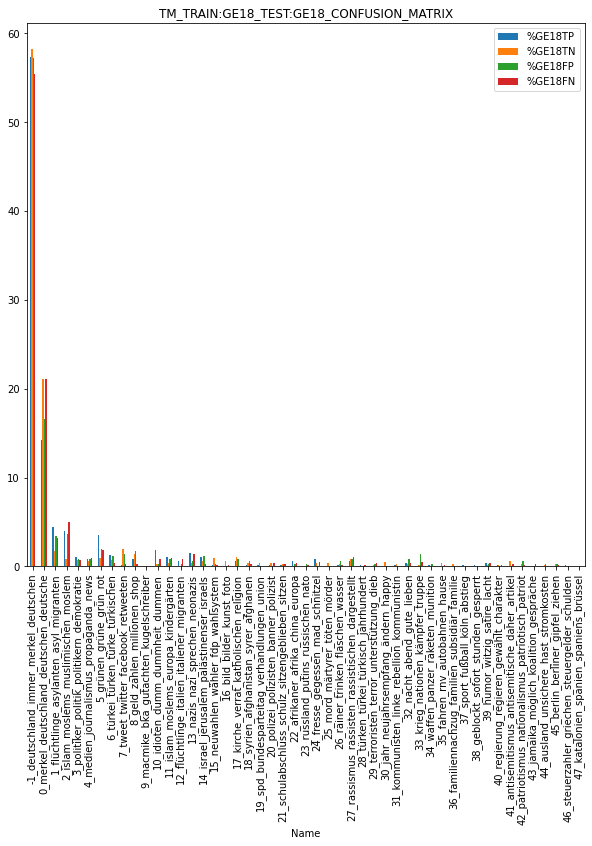

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX.plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:GE18_CONFUSION_MATRIX")

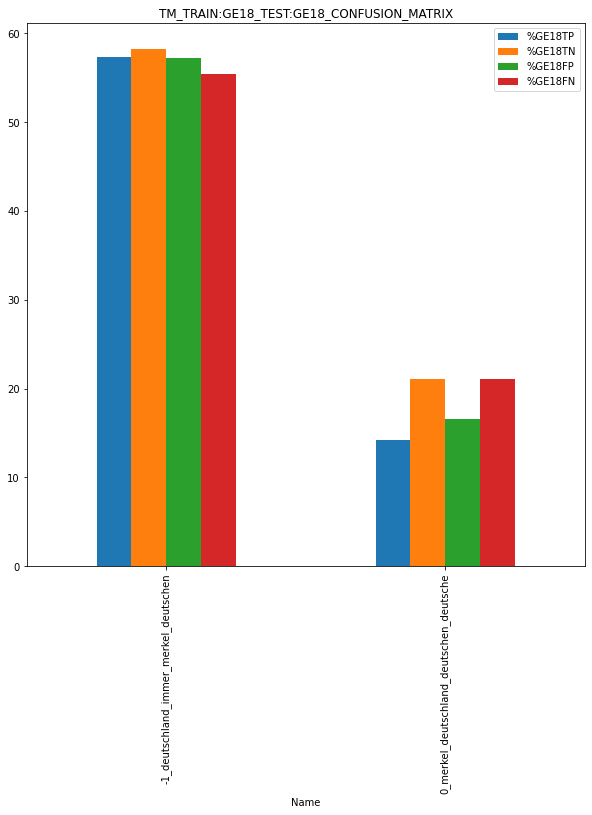

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:GE18_CONFUSION_MATRIX")

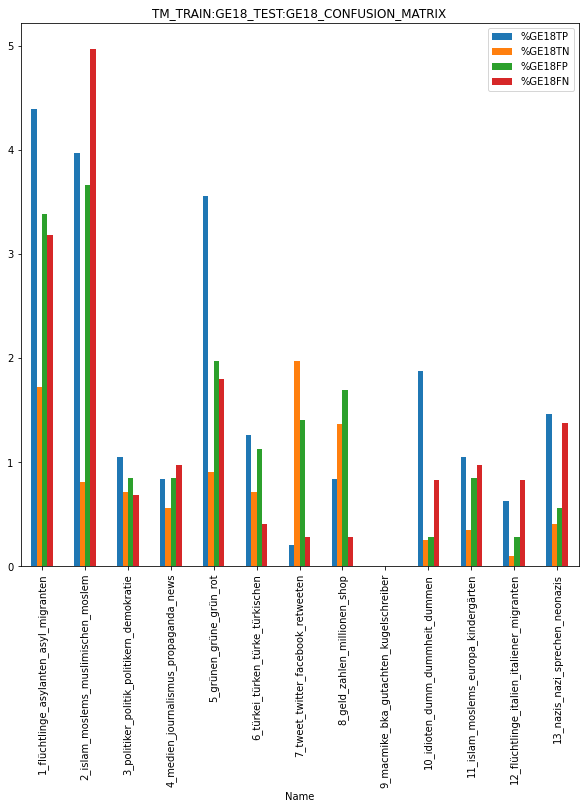

In [ ]:
test_ge18_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:GE18_CONFUSION_MATRIX")

In [ ]:
#test_ge18_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE18TP', '%GE18TN','%GE18FP', '%GE18FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:GE18_TEST:GE18_CONFUSION_MATRIX")

### Test GE2019

In [ ]:
train_ge18_class_ge19 = pd.read_csv('/content/NSIT_submission_Train_GERMEVAL2018_Test_GERMEVAL2019_TASK_A_DE_A.csv')
train_ge18_class_ge19

task1
0         1
1         1
2         1
3         0
4         1
...     ...
3026      1
3027      1
3028      1
3029      1
3030      0

[3031 rows x 1 columns]

In [ ]:
train_ge18_class_ge19['task1'] = train_ge18_class_ge19['task1'].map({0: 1, 1: 0}).astype(int)
train_ge18_class_ge19

task1
0         0
1         0
2         0
3         1
4         0
...     ...
3026      0
3027      0
3028      0
3029      0
3030      1

[3031 rows x 1 columns]

In [ ]:
ge19_test_class_values = pd.DataFrame(train_ge18_class_ge19['task1'].value_counts())
ge19_test_class_values

task1
0   2326
1    705

In [ ]:

ge19_test_raw['class'] = train_ge18_class_ge19['task1']
ge19_test_raw

TWEET      OFF     CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE  INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE   ABUSE   
2     @DLFNachrichten Die Gesichter, Namen, Religion...    OTHER   OTHER   
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE   ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE   ABUSE   
...                                                 ...      ...     ...   
3026  Es fand aber nie eine Emanzipierungs-Phase der...    OTHER   OTHER   
3027  Um es klar zu stellen: Ich will hier kein Whit...    OTHER   OTHER   
3028  Und dann habe ich da noch die McArthur-Briefe ...    OTHER   OTHER   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...    OTHER   OTHER   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...    OTHER   OTHER   

      pred  class  cat_bin_actual  cat_bin_predicted  
0       -1      0               1                  0  
1       -1      0               1                  0  
2        0      0               0                  0  
3       -1      1               1                  0  
4       -1      0               1                  1  
...    ...    ...             ...                ...  
3026     6      0               0                  0  
3027    -1      0               0                  0  
3028    -1      0               0                  0  
3029    -1      0               0                  0  
3030    -1      1               0                  0  

[3031 rows x 7 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
ge19_test_true_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 1)]
ge19_test_true_pos

TWEET      OFF     CAT  \
3     @welt Wie verwirrt muss man sein um sich zu we...  OFFENSE   ABUSE   
8     @welt Komisch, wäre dieser Betrug in der Nähe ...  OFFENSE   ABUSE   
9     @investigativ_de @welt @Tim_Roehn @ChSchweppe ...  OFFENSE   ABUSE   
14    @focusonline Wie war noch der Stasi Auftrag vo...  OFFENSE   ABUSE   
18    @RegSprecher @peteraltmaier Wie der widerliche...  OFFENSE  INSULT   
...                                                 ...      ...     ...   
2882  Kann man diesen #Erdogan nicht als #Polizei ve...  OFFENSE   ABUSE   
2886  Ich kann nachvollziehen dass seriöse Medien ka...  OFFENSE  INSULT   
2949    #Erdogan ist einfach eine Pest für die #Türkei.  OFFENSE  INSULT   
2976  @sixtus Irgend so ein charakterloser brauner M...  OFFENSE  INSULT   
2978  Das mag dem einen oder anderen harsch vorkomme...  OFFENSE  INSULT   

      pred  class  cat_bin_actual  cat_bin_predicted  
3       -1      1               1                  0  
8       10      1               1                  1  
9       -1      1               1                  0  
14      -1      1               1                  1  
18      -1      1               1                  1  
...    ...    ...             ...                ...  
2882    -1      1               1                  0  
2886    -1      1               1                  1  
2949     6      1               1                  0  
2976    24      1               1                  1  
2978    -1      1               1                  0  

[373 rows x 7 columns]

In [ ]:
ge19_test_pred_values_true_pos = pd.DataFrame(ge19_test_true_pos['pred'].value_counts())
ge19_test_pred_values_true_pos['percent'] = (ge19_test_pred_values_true_pos['pred'] / ge19_test_pred_values_true_pos['pred'].sum()) * 100
ge19_test_pred_values_true_pos

pred    percent
-1    237  63.538874
 0     34   9.115282
 13    15   4.021448
 10    15   4.021448
 5      8   2.144772
 24     6   1.608579
 2      6   1.608579
 1      5   1.340483
 11     5   1.340483
 20     4   1.072386
 4      4   1.072386
 27     4   1.072386
 14     3   0.804290
 29     3   0.804290
 8      3   0.804290
 21     2   0.536193
 12     2   0.536193
 3      2   0.536193
 41     2   0.536193
 9      2   0.536193
 19     1   0.268097
 17     1   0.268097
 28     1   0.268097
 31     1   0.268097
 22     1   0.268097
 25     1   0.268097
 34     1   0.268097
 37     1   0.268097
 39     1   0.268097
 16     1   0.268097
 6      1   0.268097

In [ ]:
ge19_test_false_pos = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 1)]
ge19_test_false_pos

TWEET    OFF    CAT  pred  \
25    @TAG24LE Wenn sich Linke Linke zu Feinden mach...  OTHER  OTHER     0   
30    @faznet In England, Birmingham war mehr Täter,...  OTHER  OTHER    -1   
97    @bzberlin Klar dass dies den linken Missfällt....  OTHER  OTHER    -1   
109   @welt Wenn es erlich ist und nicht zum vorteil...  OTHER  OTHER     4   
110   @RolandTichy Alle bitte wir können das nicht m...  OTHER  OTHER     0   
...                                                 ...    ...    ...   ...   
2983  @PatrickGensing Naja, Nazikommunist haben die ...  OTHER  OTHER    13   
3003  @RojRev69 Ich sehe es nicht anders als dass di...  OTHER  OTHER    33   
3006  @Antimyon106 Guck mal auf YT nach @SciManDan. ...  OTHER  OTHER    -1   
3016  @nouripour @Twinnz4you @HeikoMaas Setzt ein Kr...  OTHER  OTHER    33   
3030  @JKasek Oder die Bäume. Bin mal in 'nem Wald s...  OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
25        1               0                  0  
30        1               0                  0  
97        1               0                  1  
109       1               0                  0  
110       1               0                  0  
...     ...             ...                ...  
2983      1               0                  0  
3003      1               0                  0  
3006      1               0                  0  
3016      1               0                  0  
3030      1               0                  0  

[332 rows x 7 columns]

In [ ]:
ge19_test_pred_values_false_pos = pd.DataFrame(ge19_test_false_pos['pred'].value_counts())
ge19_test_pred_values_false_pos['percent'] = (ge19_test_pred_values_false_pos['pred'] / ge19_test_pred_values_false_pos['pred'].sum()) * 100
ge19_test_pred_values_false_pos

pred    percent
-1    194  58.433735
 0     54  16.265060
 31     9   2.710843
 2      7   2.108434
 27     7   2.108434
 13     7   2.108434
 14     6   1.807229
 7      6   1.807229
 4      4   1.204819
 3      4   1.204819
 26     3   0.903614
 33     3   0.903614
 23     3   0.903614
 44     3   0.903614
 39     3   0.903614
 15     2   0.602410
 25     2   0.602410
 1      2   0.602410
 5      2   0.602410
 46     1   0.301205
 36     1   0.301205
 38     1   0.301205
 20     1   0.301205
 29     1   0.301205
 10     1   0.301205
 8      1   0.301205
 41     1   0.301205
 16     1   0.301205
 24     1   0.301205
 6      1   0.301205

In [ ]:
ge19_test_true_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OTHER') & (ge19_test_raw['class'] == 0)]
ge19_test_true_neg

TWEET    OFF    CAT  pred  \
2     @DLFNachrichten Die Gesichter, Namen, Religion...  OTHER  OTHER     0   
5     @aktuelle_stunde Also beim Fall Birmingham, En...  OTHER  OTHER    -1   
6     @StZ_NEWS Aber bei läppischen 130.000 Euro der...  OTHER  OTHER    -1   
12    @BR24 Wie viele werden durch Gas Unfälle getöt...  OTHER  OTHER    35   
48    @mz_quedlinburg @mzwebde Warum genau muss man ...  OTHER  OTHER    -1   
...                                                 ...    ...    ...   ...   
3025  Und ich bin überzeugt, dass Atatürk den Blick ...  OTHER  OTHER    -1   
3026  Es fand aber nie eine Emanzipierungs-Phase der...  OTHER  OTHER     6   
3027  Um es klar zu stellen: Ich will hier kein Whit...  OTHER  OTHER    -1   
3028  Und dann habe ich da noch die McArthur-Briefe ...  OTHER  OTHER    -1   
3029  al sehen wer der Ersatzmann wird. Hier könnte ...  OTHER  OTHER    -1   

      class  cat_bin_actual  cat_bin_predicted  
2         0               0                  0  
5         0               0                  0  
6         0               0                  0  
12        0               0                  0  
48        0               0                  0  
...     ...             ...                ...  
3025      0               0                  0  
3026      0               0                  0  
3027      0               0                  0  
3028      0               0                  0  
3029      0               0                  0  

[1729 rows x 7 columns]

In [ ]:
ge19_test_pred_values_true_neg = pd.DataFrame(ge19_test_true_neg['pred'].value_counts())
ge19_test_pred_values_true_neg['percent'] = (ge19_test_pred_values_true_neg['pred'] / ge19_test_pred_values_true_neg['pred'].sum()) * 100
ge19_test_pred_values_true_neg

pred    percent
-1   1044  60.381724
 0    288  16.657027
 7     64   3.701562
 8     38   2.197802
 31    22   1.272412
 1     20   1.156738
 14    15   0.867553
 13    15   0.867553
 44    14   0.809717
 26    14   0.809717
 16    13   0.751880
 3     13   0.751880
 27    12   0.694043
 24    12   0.694043
 4     11   0.636206
 20    10   0.578369
 6      9   0.520532
 35     9   0.520532
 39     9   0.520532
 15     8   0.462695
 2      7   0.404858
 41     7   0.404858
 32     7   0.404858
 29     5   0.289184
 10     5   0.289184
 19     5   0.289184
 12     5   0.289184
 9      5   0.289184
 34     4   0.231348
 11     4   0.231348
 42     4   0.231348
 33     4   0.231348
 25     4   0.231348
 18     3   0.173511
 30     3   0.173511
 23     3   0.173511
 36     2   0.115674
 5      2   0.115674
 38     2   0.115674
 40     2   0.115674
 22     2   0.115674
 17     1   0.057837
 21     1   0.057837
 46     1   0.057837
 45     1   0.057837

In [ ]:
ge19_test_false_neg = ge19_test_raw.loc[(ge19_test_raw['OFF'] == 'OFFENSE') & (ge19_test_raw['class'] == 0)]
ge19_test_false_neg

TWEET      OFF        CAT  \
0     @JanZimmHHB @mopo Komisch das die Realitätsver...  OFFENSE     INSULT   
1     @faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...  OFFENSE      ABUSE   
4     @hacker_1991 @torben_braga Weil die AfD den Fe...  OFFENSE      ABUSE   
7     @StZ_NEWS Schäuble wird wissen woher dieses Na...  OFFENSE      ABUSE   
10    @rbbabendschau Nun, Eigentum verpflichtet, das...  OFFENSE      ABUSE   
...                                                 ...      ...        ...   
2885  Ob Erdogan nun hier ist oder nicht, der erste ...  OFFENSE      ABUSE   
2887  Sogenannte Aktivisten würden sich selbst im Pa...  OFFENSE      ABUSE   
2888  Einfach nur peinlich wie sich sogenannte Aktiv...  OFFENSE     INSULT   
2889  Diese sogenannten Aktivisten sind Straftäter d...  OFFENSE      ABUSE   
2988  Ich frage mich mittlerweile was Saudi Arabien ...  OFFENSE  PROFANITY   

      pred  class  cat_bin_actual  cat_bin_predicted  
0       -1      0               1                  0  
1       -1      0               1                  0  
4       -1      0               1                  1  
7       13      0               1                  1  
10       0      0               1                  0  
...    ...    ...             ...                ...  
2885    -1      0               1                  0  
2887    -1      0               1                  0  
2888    -1      0               1                  0  
2889    -1      0               1                  0  
2988    -1      0               1                  0  

[597 rows x 7 columns]

In [ ]:
ge19_test_pred_values_false_neg = pd.DataFrame(ge19_test_false_neg['pred'].value_counts())
ge19_test_pred_values_false_neg['percent'] = (ge19_test_pred_values_false_neg['pred'] / ge19_test_pred_values_false_neg['pred'].sum()) * 100
ge19_test_pred_values_false_neg

pred    percent
-1    348  58.291457
 0     74  12.395310
 1     18   3.015075
 13    15   2.512563
 4     11   1.842546
 7     11   1.842546
 31    10   1.675042
 10    10   1.675042
 14     9   1.507538
 2      9   1.507538
 8      6   1.005025
 3      6   1.005025
 16     5   0.837521
 5      5   0.837521
 21     5   0.837521
 24     5   0.837521
 41     4   0.670017
 22     4   0.670017
 39     4   0.670017
 29     3   0.502513
 23     3   0.502513
 20     3   0.502513
 15     3   0.502513
 25     3   0.502513
 27     3   0.502513
 46     2   0.335008
 18     2   0.335008
 34     2   0.335008
 12     2   0.335008
 19     2   0.335008
 11     2   0.335008
 40     1   0.167504
 38     1   0.167504
 45     1   0.167504
 36     1   0.167504
 6      1   0.167504
 35     1   0.167504
 28     1   0.167504
 26     1   0.167504

In [ ]:
ge19_test_raw['cat_bin_actual'] = ge19_test_raw['OFF'].map({'OTHER': 0, 'OFFENSE': 1}).astype(int)
ge19_test_raw['cat_bin_predicted'] = ge19_test_raw['class'].astype(int)


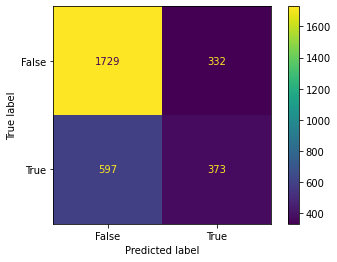

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
#import matplotlib.pyplot as plt
#import numpy
#from sklearn import metrics

actual = ge19_test_raw['cat_bin_actual']
predicted = ge19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.6935004948861762

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.5290780141843971

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.3845360824742268

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.8389131489568171

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.4453731343283583

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.6935004948861762, 'Precision': 0.5290780141843971, 'Sensitivity_recall': 0.3845360824742268, 'Specificity': 0.8389131489568171, 'F1_score': 0.4453731343283583}


### TEST GE2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge18_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1              -1_deutschland_immer_merkel_deutschen
1       0            0_merkel_deutschland_deutschen_deutsche
2       1             1_flüchtlinge_asylanten_asyl_migranten
3       2                2_islam_moslems_muslimischen_moslem
4       3          3_politiker_politik_politikern_demokratie
5       4              4_medien_journalismus_propaganda_news
6       5                            5_grünen_grüne_grün_rot
7       6                   6_türkei_türken_türke_türkischen
8       7                 7_tweet_twitter_facebook_retweeten
9       8                       8_geld_zahlen_millionen_shop
10      9             9_macmike_bka_gutachten_kugelschreiber
11     10                    10_idioten_dumm_dummheit_dummen
12     11               11_islam_moslems_europa_kindergärten
13     12         12_flüchtlinge_italien_italiener_migranten
14     13                    13_nazis_nazi_sprechen_neonazis
15     14          14_israel_jerusalem_palästinenser_israels
16     15                 15_neuwahlen_wähler_fdp_wahlsystem
17     16                          16_bild_bilder_kunst_foto
18     17             17_kirche_verrat_katholischen_religion
19     18               18_syrien_afghanistan_syrer_afghanen
20     19         19_spd_bundesparteitag_verhandlungen_union
21     20              20_polizei_polizisten_banner_polizist
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen
23     22                   22_afrikaner_afrika_china_europa
24     23                 23_russland_putins_russischen_nato
25     24                   24_fresse_gegessen_mad_schnitzel
26     25                      25_mord_märtyrer_töten_mörder
27     26                  26_rainer_trinken_flaschen_wasser
28     27   27_rassismus_rassisten_rassistischen_dargestellt
29     28              28_türken_türkei_türkisch_jahrhundert
30     29           29_terroristen_terror_unterstützung_dieb
31     30               30_jahr_neujahrsempfang_ändern_happy
32     31         31_kommunisten_linke_rebellion_kommunistin
33     32                         32_nacht_abend_gute_lieben
34     33                   33_krieg_nationen_kämpfer_truppe
35     34                  34_waffen_panzer_raketen_munition
36     35                     35_fahren_rnv_autobahnen_hause
37     36      36_familiennachzug_familien_subsidiär_familie
38     37                      37_sport_fußball_köln_abstieg
39     38                38_geblockt_sofort_stunden_gesperrt
40     39                       39_humor_witzig_satire_lacht
41     40            40_regierung_regieren_gewählt_charakter
42     41     41_antisemitismus_antisemitische_daher_artikel
43     42  42_patriotismus_nationalismus_patriotisch_patriot
44     43             43_jamaika_möglich_koalition_gespräche
45     44              44_ausland_unsichere_hast_stromkosten
46     45                   45_berlin_berliner_gipfel_ziehen
47     46     46_steuerzahler_griechen_steuergelder_schulden
48     47             47_katalonien_spanien_spaniens_brüssel

In [ ]:
ge19_test_pred_values_true_pos['Topic'] = ge19_test_pred_values_true_pos.index
ge19_test_pred_values_true_pos

pred    percent  Topic
-1    237  63.538874     -1
 0     34   9.115282      0
 13    15   4.021448     13
 10    15   4.021448     10
 5      8   2.144772      5
 24     6   1.608579     24
 2      6   1.608579      2
 1      5   1.340483      1
 11     5   1.340483     11
 20     4   1.072386     20
 4      4   1.072386      4
 27     4   1.072386     27
 14     3   0.804290     14
 29     3   0.804290     29
 8      3   0.804290      8
 21     2   0.536193     21
 12     2   0.536193     12
 3      2   0.536193      3
 41     2   0.536193     41
 9      2   0.536193      9
 19     1   0.268097     19
 17     1   0.268097     17
 28     1   0.268097     28
 31     1   0.268097     31
 22     1   0.268097     22
 25     1   0.268097     25
 34     1   0.268097     34
 37     1   0.268097     37
 39     1   0.268097     39
 16     1   0.268097     16
 6      1   0.268097      6

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = ge19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predGE19TP', 'percent':'%GE19TP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_pos['Topic'] = ge19_test_pred_values_false_pos.index
ge19_test_pred_values_false_pos

pred    percent  Topic
-1    194  58.433735     -1
 0     54  16.265060      0
 31     9   2.710843     31
 2      7   2.108434      2
 27     7   2.108434     27
 13     7   2.108434     13
 14     6   1.807229     14
 7      6   1.807229      7
 4      4   1.204819      4
 3      4   1.204819      3
 26     3   0.903614     26
 33     3   0.903614     33
 23     3   0.903614     23
 44     3   0.903614     44
 39     3   0.903614     39
 15     2   0.602410     15
 25     2   0.602410     25
 1      2   0.602410      1
 5      2   0.602410      5
 46     1   0.301205     46
 36     1   0.301205     36
 38     1   0.301205     38
 20     1   0.301205     20
 29     1   0.301205     29
 10     1   0.301205     10
 8      1   0.301205      8
 41     1   0.301205     41
 16     1   0.301205     16
 24     1   0.301205     24
 6      1   0.301205      6

In [ ]:
df3 = ge19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predGE19FP', 'percent':'%GE19FP', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_true_neg['Topic'] = ge19_test_pred_values_true_neg.index
ge19_test_pred_values_true_neg

pred    percent  Topic
-1   1044  60.381724     -1
 0    288  16.657027      0
 7     64   3.701562      7
 8     38   2.197802      8
 31    22   1.272412     31
 1     20   1.156738      1
 14    15   0.867553     14
 13    15   0.867553     13
 44    14   0.809717     44
 26    14   0.809717     26
 16    13   0.751880     16
 3     13   0.751880      3
 27    12   0.694043     27
 24    12   0.694043     24
 4     11   0.636206      4
 20    10   0.578369     20
 6      9   0.520532      6
 35     9   0.520532     35
 39     9   0.520532     39
 15     8   0.462695     15
 2      7   0.404858      2
 41     7   0.404858     41
 32     7   0.404858     32
 29     5   0.289184     29
 10     5   0.289184     10
 19     5   0.289184     19
 12     5   0.289184     12
 9      5   0.289184      9
 34     4   0.231348     34
 11     4   0.231348     11
 42     4   0.231348     42
 33     4   0.231348     33
 25     4   0.231348     25
 18     3   0.173511     18
 30     3   0.173511     30
 23     3   0.173511     23
 36     2   0.115674     36
 5      2   0.115674      5
 38     2   0.115674     38
 40     2   0.115674     40
 22     2   0.115674     22
 17     1   0.057837     17
 21     1   0.057837     21
 46     1   0.057837     46
 45     1   0.057837     45

In [ ]:
df4 = ge19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predGE19TN', 'percent':'%GE19TN', 'Topic':'Topic'})

In [ ]:
ge19_test_pred_values_false_neg['Topic'] = ge19_test_pred_values_false_neg.index
ge19_test_pred_values_false_neg

pred    percent  Topic
-1    348  58.291457     -1
 0     74  12.395310      0
 1     18   3.015075      1
 13    15   2.512563     13
 4     11   1.842546      4
 7     11   1.842546      7
 31    10   1.675042     31
 10    10   1.675042     10
 14     9   1.507538     14
 2      9   1.507538      2
 8      6   1.005025      8
 3      6   1.005025      3
 16     5   0.837521     16
 5      5   0.837521      5
 21     5   0.837521     21
 24     5   0.837521     24
 41     4   0.670017     41
 22     4   0.670017     22
 39     4   0.670017     39
 29     3   0.502513     29
 23     3   0.502513     23
 20     3   0.502513     20
 15     3   0.502513     15
 25     3   0.502513     25
 27     3   0.502513     27
 46     2   0.335008     46
 18     2   0.335008     18
 34     2   0.335008     34
 12     2   0.335008     12
 19     2   0.335008     19
 11     2   0.335008     11
 40     1   0.167504     40
 38     1   0.167504     38
 45     1   0.167504     45
 36     1   0.167504     36
 6      1   0.167504      6
 35     1   0.167504     35
 28     1   0.167504     28
 26     1   0.167504     26

In [ ]:
df5 = ge19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predGE19FN', 'percent':'%GE19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']] = df_merged[['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%GE19', '%GE19','%H19', '%H20']]
#df_to_round = df_to_round[['%GE19', '%GE19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predGE19TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      237.0   
1       0            0_merkel_deutschland_deutschen_deutsche       34.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten        5.0   
3       2                2_islam_moslems_muslimischen_moslem        6.0   
4       3          3_politiker_politik_politikern_demokratie        2.0   
5       4              4_medien_journalismus_propaganda_news        4.0   
6       5                            5_grünen_grüne_grün_rot        8.0   
7       6                   6_türkei_türken_türke_türkischen        1.0   
8       7                 7_tweet_twitter_facebook_retweeten          0   
9       8                       8_geld_zahlen_millionen_shop        3.0   
10      9             9_macmike_bka_gutachten_kugelschreiber        2.0   
11     10                    10_idioten_dumm_dummheit_dummen       15.0   
12     11               11_islam_moslems_europa_kindergärten        5.0   
13     12         12_flüchtlinge_italien_italiener_migranten        2.0   
14     13                    13_nazis_nazi_sprechen_neonazis       15.0   
15     14          14_israel_jerusalem_palästinenser_israels        3.0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem          0   
17     16                          16_bild_bilder_kunst_foto        1.0   
18     17             17_kirche_verrat_katholischen_religion        1.0   
19     18               18_syrien_afghanistan_syrer_afghanen          0   
20     19         19_spd_bundesparteitag_verhandlungen_union        1.0   
21     20              20_polizei_polizisten_banner_polizist        4.0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen        2.0   
23     22                   22_afrikaner_afrika_china_europa        1.0   
24     23                 23_russland_putins_russischen_nato          0   
25     24                   24_fresse_gegessen_mad_schnitzel        6.0   
26     25                      25_mord_märtyrer_töten_mörder        1.0   
27     26                  26_rainer_trinken_flaschen_wasser          0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt        4.0   
29     28              28_türken_türkei_türkisch_jahrhundert        1.0   
30     29           29_terroristen_terror_unterstützung_dieb        3.0   
31     30               30_jahr_neujahrsempfang_ändern_happy          0   
32     31         31_kommunisten_linke_rebellion_kommunistin        1.0   
33     32                         32_nacht_abend_gute_lieben          0   
34     33                   33_krieg_nationen_kämpfer_truppe          0   
35     34                  34_waffen_panzer_raketen_munition        1.0   
36     35                     35_fahren_rnv_autobahnen_hause          0   
37     36      36_familiennachzug_familien_subsidiär_familie          0   
38     37                      37_sport_fußball_köln_abstieg        1.0   
39     38                38_geblockt_sofort_stunden_gesperrt          0   
40     39                       39_humor_witzig_satire_lacht        1.0   
41     40            40_regierung_regieren_gewählt_charakter          0   
42     41     41_antisemitismus_antisemitische_daher_artikel        2.0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot          0   
44     43             43_jamaika_möglich_koalition_gespräche          0   
45     44              44_ausland_unsichere_hast_stromkosten          0   
46     45                   45_berlin_berliner_gipfel_ziehen          0   
47     46     46_steuerzahler_griechen_steuergelder_schulden          0   
48     47             47_katalonien_spanien_spaniens_brüssel          0   

    %GE19TP predGE19FP  %GE19FP predGE19TN  %GE19TN predGE19FN  %GE19FN  
0     63.54      194.0    58.43     1044.0    60.38      348.0    58.29  
1      9.12       54.0    16.27      288.0    16.66       74.0    12.40  
2      1.34        2.0     0.60

In [ ]:
df_merged

Topic                                               Name predGE19TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      237.0   
1       0            0_merkel_deutschland_deutschen_deutsche       34.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten        5.0   
3       2                2_islam_moslems_muslimischen_moslem        6.0   
4       3          3_politiker_politik_politikern_demokratie        2.0   
5       4              4_medien_journalismus_propaganda_news        4.0   
6       5                            5_grünen_grüne_grün_rot        8.0   
7       6                   6_türkei_türken_türke_türkischen        1.0   
8       7                 7_tweet_twitter_facebook_retweeten          0   
9       8                       8_geld_zahlen_millionen_shop        3.0   
10      9             9_macmike_bka_gutachten_kugelschreiber        2.0   
11     10                    10_idioten_dumm_dummheit_dummen       15.0   
12     11               11_islam_moslems_europa_kindergärten        5.0   
13     12         12_flüchtlinge_italien_italiener_migranten        2.0   
14     13                    13_nazis_nazi_sprechen_neonazis       15.0   
15     14          14_israel_jerusalem_palästinenser_israels        3.0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem          0   
17     16                          16_bild_bilder_kunst_foto        1.0   
18     17             17_kirche_verrat_katholischen_religion        1.0   
19     18               18_syrien_afghanistan_syrer_afghanen          0   
20     19         19_spd_bundesparteitag_verhandlungen_union        1.0   
21     20              20_polizei_polizisten_banner_polizist        4.0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen        2.0   
23     22                   22_afrikaner_afrika_china_europa        1.0   
24     23                 23_russland_putins_russischen_nato          0   
25     24                   24_fresse_gegessen_mad_schnitzel        6.0   
26     25                      25_mord_märtyrer_töten_mörder        1.0   
27     26                  26_rainer_trinken_flaschen_wasser          0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt        4.0   
29     28              28_türken_türkei_türkisch_jahrhundert        1.0   
30     29           29_terroristen_terror_unterstützung_dieb        3.0   
31     30               30_jahr_neujahrsempfang_ändern_happy          0   
32     31         31_kommunisten_linke_rebellion_kommunistin        1.0   
33     32                         32_nacht_abend_gute_lieben          0   
34     33                   33_krieg_nationen_kämpfer_truppe          0   
35     34                  34_waffen_panzer_raketen_munition        1.0   
36     35                     35_fahren_rnv_autobahnen_hause          0   
37     36      36_familiennachzug_familien_subsidiär_familie          0   
38     37                      37_sport_fußball_köln_abstieg        1.0   
39     38                38_geblockt_sofort_stunden_gesperrt          0   
40     39                       39_humor_witzig_satire_lacht        1.0   
41     40            40_regierung_regieren_gewählt_charakter          0   
42     41     41_antisemitismus_antisemitische_daher_artikel        2.0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot          0   
44     43             43_jamaika_möglich_koalition_gespräche          0   
45     44              44_ausland_unsichere_hast_stromkosten          0   
46     45                   45_berlin_berliner_gipfel_ziehen          0   
47     46     46_steuerzahler_griechen_steuergelder_schulden          0   
48     47             47_katalonien_spanien_spaniens_brüssel          0   

    %GE19TP predGE19FP  %GE19FP predGE19TN  %GE19TN predGE19FN  %GE19FN  
0     63.54      194.0    58.43     1044.0    60.38      348.0    58.29  
1      9.12       54.0    16.27      288.0    16.66       74.0    12.40  
2      1.34        2.0     0.60

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predGE19TP": int, "predGE19TN":int, "predGE19FP":int, "predGE19FN":int})
df_merged

Topic                                               Name  predGE19TP  \
0      -1              -1_deutschland_immer_merkel_deutschen         237   
1       0            0_merkel_deutschland_deutschen_deutsche          34   
2       1             1_flüchtlinge_asylanten_asyl_migranten           5   
3       2                2_islam_moslems_muslimischen_moslem           6   
4       3          3_politiker_politik_politikern_demokratie           2   
5       4              4_medien_journalismus_propaganda_news           4   
6       5                            5_grünen_grüne_grün_rot           8   
7       6                   6_türkei_türken_türke_türkischen           1   
8       7                 7_tweet_twitter_facebook_retweeten           0   
9       8                       8_geld_zahlen_millionen_shop           3   
10      9             9_macmike_bka_gutachten_kugelschreiber           2   
11     10                    10_idioten_dumm_dummheit_dummen          15   
12     11               11_islam_moslems_europa_kindergärten           5   
13     12         12_flüchtlinge_italien_italiener_migranten           2   
14     13                    13_nazis_nazi_sprechen_neonazis          15   
15     14          14_israel_jerusalem_palästinenser_israels           3   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem           0   
17     16                          16_bild_bilder_kunst_foto           1   
18     17             17_kirche_verrat_katholischen_religion           1   
19     18               18_syrien_afghanistan_syrer_afghanen           0   
20     19         19_spd_bundesparteitag_verhandlungen_union           1   
21     20              20_polizei_polizisten_banner_polizist           4   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen           2   
23     22                   22_afrikaner_afrika_china_europa           1   
24     23                 23_russland_putins_russischen_nato           0   
25     24                   24_fresse_gegessen_mad_schnitzel           6   
26     25                      25_mord_märtyrer_töten_mörder           1   
27     26                  26_rainer_trinken_flaschen_wasser           0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt           4   
29     28              28_türken_türkei_türkisch_jahrhundert           1   
30     29           29_terroristen_terror_unterstützung_dieb           3   
31     30               30_jahr_neujahrsempfang_ändern_happy           0   
32     31         31_kommunisten_linke_rebellion_kommunistin           1   
33     32                         32_nacht_abend_gute_lieben           0   
34     33                   33_krieg_nationen_kämpfer_truppe           0   
35     34                  34_waffen_panzer_raketen_munition           1   
36     35                     35_fahren_rnv_autobahnen_hause           0   
37     36      36_familiennachzug_familien_subsidiär_familie           0   
38     37                      37_sport_fußball_köln_abstieg           1   
39     38                38_geblockt_sofort_stunden_gesperrt           0   
40     39                       39_humor_witzig_satire_lacht           1   
41     40            40_regierung_regieren_gewählt_charakter           0   
42     41     41_antisemitismus_antisemitische_daher_artikel           2   
43     42  42_patriotismus_nationalismus_patriotisch_patriot           0   
44     43             43_jamaika_möglich_koalition_gespräche           0   
45     44              44_ausland_unsichere_hast_stromkosten           0   
46     45                   45_berlin_berliner_gipfel_ziehen           0   
47     46     46_steuerzahler_griechen_steuergelder_schulden           0   
48     47             47_katalonien_spanien_spaniens_brüssel           0   

    %GE19TP  predGE19FP  %GE19FP  predGE19TN  %GE19TN  predGE19FN  %GE19FN  
0     63.54         194    58.43        1044    60.38         348    58.29  
1      9.12          54    16.27         288    1

In [ ]:
df_percent = df_merged[['Topic','%GE19TP', '%GE19TN','%GE19FP', '%GE19FN','Name']]
df_percent

Topic  %GE19TP  %GE19TN  %GE19FP  %GE19FN  \
0      -1    63.54    60.38    58.43    58.29   
1       0     9.12    16.66    16.27    12.40   
2       1     1.34     1.16     0.60     3.02   
3       2     1.61     0.40     2.11     1.51   
4       3     0.54     0.75     1.20     1.01   
5       4     1.07     0.64     1.20     1.84   
6       5     2.14     0.12     0.60     0.84   
7       6     0.27     0.52     0.30     0.17   
8       7     0.00     3.70     1.81     1.84   
9       8     0.80     2.20     0.30     1.01   
10      9     0.54     0.29     0.00     0.00   
11     10     4.02     0.29     0.30     1.68   
12     11     1.34     0.23     0.00     0.34   
13     12     0.54     0.29     0.00     0.34   
14     13     4.02     0.87     2.11     2.51   
15     14     0.80     0.87     1.81     1.51   
16     15     0.00     0.46     0.60     0.50   
17     16     0.27     0.75     0.30     0.84   
18     17     0.27     0.06     0.00     0.00   
19     18     0.00     0.17     0.00     0.34   
20     19     0.27     0.29     0.00     0.34   
21     20     1.07     0.58     0.30     0.50   
22     21     0.54     0.06     0.00     0.84   
23     22     0.27     0.12     0.00     0.67   
24     23     0.00     0.17     0.90     0.50   
25     24     1.61     0.69     0.30     0.84   
26     25     0.27     0.23     0.60     0.50   
27     26     0.00     0.81     0.90     0.17   
28     27     1.07     0.69     2.11     0.50   
29     28     0.27     0.00     0.00     0.17   
30     29     0.80     0.29     0.30     0.50   
31     30     0.00     0.17     0.00     0.00   
32     31     0.27     1.27     2.71     1.68   
33     32     0.00     0.40     0.00     0.00   
34     33     0.00     0.23     0.90     0.00   
35     34     0.27     0.23     0.00     0.34   
36     35     0.00     0.52     0.00     0.17   
37     36     0.00     0.12     0.30     0.17   
38     37     0.27     0.00     0.00     0.00   
39     38     0.00     0.12     0.30     0.17   
40     39     0.27     0.52     0.90     0.67   
41     40     0.00     0.12     0.00     0.17   
42     41     0.54     0.40     0.30     0.67   
43     42     0.00     0.23     0.00     0.00   
44     43     0.00     0.00     0.00     0.00   
45     44     0.00     0.81     0.90     0.00   
46     45     0.00     0.06     0.00     0.17   
47     46     0.00     0.06     0.30     0.34   
48     47     0.00     0.00     0.00     0.00   

                                                 Name  
0               -1_deutschland_immer_merkel_deutschen  
1             0_merkel_deutschland_deutschen_deutsche  
2              1_flüchtlinge_asylanten_asyl_migranten  
3                 2_islam_moslems_muslimischen_moslem  
4           3_politiker_politik_politikern_demokratie  
5               4_medien_journalismus_propaganda_news  
6                             5_grünen_grüne_grün_rot  
7                    6_türkei_türken_türke_türkischen  
8                  7_tweet_twitter_facebook_retweeten  
9                        8_geld_zahlen_millionen_shop  
10             9_macmike_bka_gutachten_kugelschreiber  
11                    10_idioten_dumm_dummheit_dummen  
12               11_islam_moslems_europa_kindergärten  
13         12_flüchtlinge_italien_italiener_migranten  
14                    13_nazis_nazi_sprechen_neonazis  
15          14_israel_jerusalem_palästinenser_israels  
16                 15_neuwahlen_wähler_fdp_wahlsystem  
17                          16_bild_bilder_kunst_foto  
18             17_kirche_verrat_katholischen_religion  
19               18_syrien_afghanistan_syrer_afghanen  
20         19_spd_bundesparteitag_verhandlungen_union  
21              20_polizei_polizisten_banner_polizist  
22    21_schulabschluss_schulz_sitzengeblieben_sitzen  
23                   22_afrikaner_afrika_china_europa  
24                 23_russland_putins_russischen_nato  
25                   24_fresse_gegessen_mad_schnitzel  
26                      25_mord_märtyrer_

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

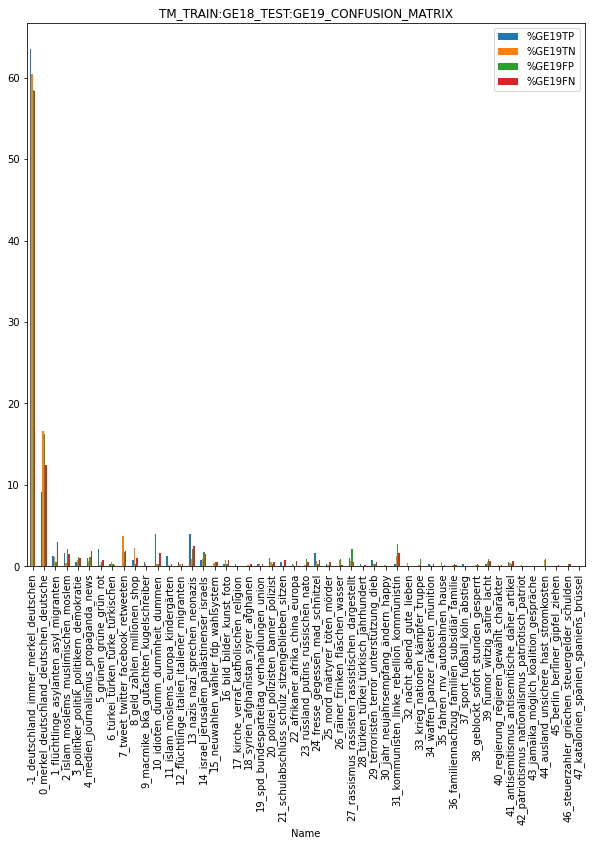

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX.plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:GE19_CONFUSION_MATRIX")

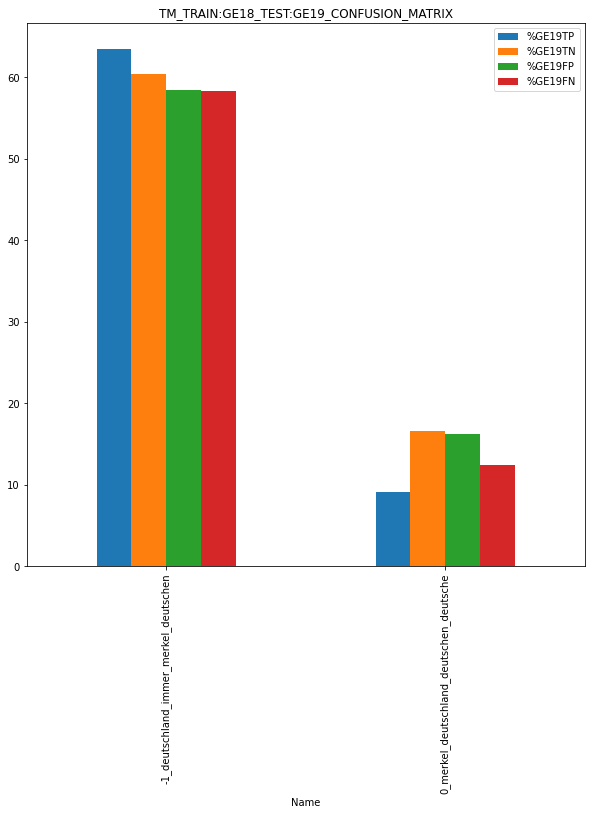

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:GE19_CONFUSION_MATRIX")

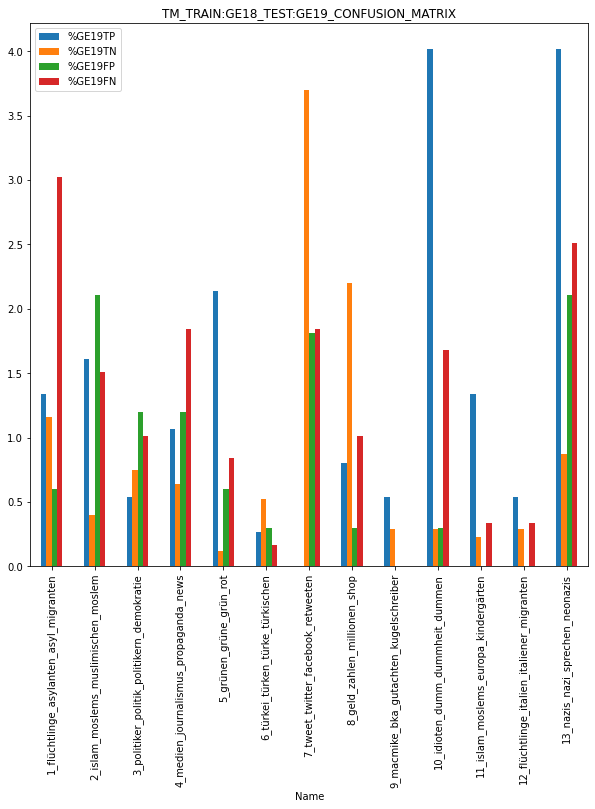

In [ ]:
test_ge19_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:GE19_CONFUSION_MATRIX")

In [ ]:
#test_ge19_df_percent_plt_CONF_MATRIX[15:].plot(y=['%GE19TP', '%GE19TN','%GE19FP', '%GE19FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:GE18_TEST:GE19_CONFUSION_MATRIX")

### Test H2019

In [ ]:
train_ge18_class_h19 = pd.read_csv('/content/NSIT_submission_Train_GERMEVAL2018_Test_HASOC2019_TASK_A_DE_A.csv')
train_ge18_class_h19


task1
0        1
1        1
2        1
3        1
4        0
..     ...
845      1
846      0
847      0
848      1
849      0

[850 rows x 1 columns]

In [ ]:
train_ge18_class_h19['task1'] = train_ge18_class_h19['task1'].map({0: 1, 1: 0}).astype(int)
train_ge18_class_h19

task1
0        0
1        0
2        0
3        0
4        1
..     ...
845      0
846      1
847      1
848      0
849      1

[850 rows x 1 columns]

In [ ]:
h19_test_class_values = pd.DataFrame(train_ge18_class_h19['task1'].value_counts())
h19_test_class_values

task1
0    708
1    142

In [ ]:

h19_test_raw['class'] = train_ge18_class_h19['task1']
h19_test_raw

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
..             ...                                                ...    ...   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
0     HATE    -1      0               1                  0  
1     NONE    -1      0               0                  0  
2     NONE     0      0               0                  0  
3     OFFN    -1      0               1                  1  
4     OFFN    -1      1               1                  0  
..     ...   ...    ...             ...                ...  
845   OFFN    -1      0               1                  0  
846   OFFN    24      1               1                  0  
847   OFFN    -1      1               1                  0  
848   OFFN    -1      0               1                  0  
849   NONE     0      1               0                  0  

[850 rows x 8 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h19_test_true_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 1)]
h19_test_true_pos

text_id                                               text task_1  \
4    hasoc_de_5274  Scheinbar bekommt Sarah's Conner's Sohn Vincen...    HOF   
5    hasoc_de_5275  #Bundeswehr  erst überzeugen Politische Linke,...    HOF   
46   hasoc_de_5316  @MichaelaKorte @chris_hiv @derCharlie_ @scheid...    HOF   
62   hasoc_de_5332  @Kurzkommentar @manu_mie @Ralf_Stegner Lebst D...    HOF   
66   hasoc_de_5336  Assad hat nicht erst in Duma Chemiewaffen,sond...    HOF   
67   hasoc_de_5337  UN Sicherheitsrat!  Russland und auch Syrien h...    HOF   
71   hasoc_de_5341  @Menschaffe @hessenbursche Ich würde mich an D...    HOF   
77   hasoc_de_5347  Ich wäre auch für die Abschaffung von Plastikv...    HOF   
78   hasoc_de_5348  Dreimal sagen,'Allah Akbars ' und dann noch 'i...    HOF   
97   hasoc_de_5367  @Ungebeten1 @Ralf__B Homosexualität ist ein Üb...    HOF   
221  hasoc_de_5491  @Ralf64904117 Seh nichts... Nur Schwarz...    ...    HOF   
313  hasoc_de_5583  Tatsache ist,  ohne die Flüchtlinge,hätten wir...    HOF   
384  hasoc_de_5654  Hier zeigt der Islam sein wahres Gesicht!  Die...    HOF   
392  hasoc_de_5662  Was für eine widerliche Scheisse!    Ich hab n...    HOF   
397  hasoc_de_5667  @Fuckologe @helllud123 dann retweetet die Wahr...    HOF   
402  hasoc_de_5672  Die Slowakei erkennt den Islam nicht als Relig...    HOF   
405  hasoc_de_5675  @c_muc @SPIEGELONLINE @nicolediekmann Oscar Wi...    HOF   
452  hasoc_de_5722  Was für eine armselige Kreatur! Kein Mitgefühl...    HOF   
503  hasoc_de_5773  «Die Europäer können es jedenfalls langfristig...    HOF   
517  hasoc_de_5787  #Maas soll neuer Außenminister werden. 🤔  Pass...    HOF   
553  hasoc_de_5823  Nach tagelanger Skandalisierung von #Gauland's...    HOF   
590  hasoc_de_5860  Das ist der absolute Gipfel! Lächerliche 2,5 J...    HOF   
595  hasoc_de_5865  Männliche 'Flüchtlinge' sind krimineller als m...    HOF   
609  hasoc_de_5879  'Wo sind die Kinder?“  “Auf der AfD-Demo: Stro...    HOF   
618  hasoc_de_5888  Die ersten Prognosen deuten an, dass es bei de...    HOF   
643  hasoc_de_5913  @Uwe_Junge_MdL Nach dem der Neoliberalismus  u...    HOF   
686  hasoc_de_5956  @Uwe_Junge_MdL @Junge_Freiheit Aber bitte fang...    HOF   
707  hasoc_de_5977  @Uwe_Junge_MdL Homophobie ist (genau wie Islam...    HOF   
710  hasoc_de_5980  @Uwe_Junge_MdL Alles nette Schwule, die nie ei...    HOF   
775  hasoc_de_6045  Top, dass was getan wird. Denn die alten Biene...    HOF   
776  hasoc_de_6046  Nichts von Deutschland gelernt?!  Aber es hat ...    HOF   
778  hasoc_de_6048  Ist Merkel doch Diktatorin oder ist Merkel CDU...    HOF   
779  hasoc_de_6049  SPD du driftest nach Mann, und was für Mann. G...    HOF   
780  hasoc_de_6050  Meine lieben nicht nur Sozis. So was passiert ...    HOF   
783  hasoc_de_6053  Der Durchschnitts-IQ von Berlin hatte sich let...    HOF   
793  hasoc_de_6063  „Sie glauben alles, was in der Zeitung steht.“...    HOF   
794  hasoc_de_6064  Warum legalisiert man das nicht alles, wie es ...    HOF   
803  hasoc_de_6073  #Wilfuzius sagt:  Liebe #Abi-Schüler, Bildung ...    HOF   
805  hasoc_de_6075  #Wilfuziusine fragt:  Ist es denn wirklich so ...    HOF   
807  hasoc_de_6077  #Wilfuzius sagt:  Ist das Abi zu schwer, ist d...    HOF   
814  hasoc_de_6084  Nicht gleich 'den Bettel hinschmeißen' – Bette...    HOF   
815  hasoc_de_6085  „Heute sind mutige Soldaten, mutige Patrioten,...    HOF   
819  hasoc_de_6089  Welche #Demokratie? Entweder man ist für #Merk...    HOF   
825  hasoc_de_6095  Wenn die #Windkraft das Gehirn weggeblasen hat...    HOF   
835  hasoc_de_6105  Wer mir mit ihrer Politik die und das Liebste ...    HOF   
846  hasoc_de_6116  Ich würde der Linken Chefin Kipping die 1.000 ...    HOF   
847  hasoc_de_6117  Ausländer sind Top &amp; Trumpf  Schon aufgefa...    HOF   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
4     OFFN    -1      1               1                  0  
5     HATE     3      1               1         

In [ ]:
h19_test_pred_values_true_pos = pd.DataFrame(h19_test_true_pos['pred'].value_counts())
h19_test_pred_values_true_pos['percent'] = (h19_test_pred_values_true_pos['pred'] / h19_test_pred_values_true_pos['pred'].sum()) * 100
h19_test_pred_values_true_pos

pred    percent
-1     23  48.936170
 0      6  12.765957
 3      3   6.382979
 1      3   6.382979
 13     3   6.382979
 23     1   2.127660
 18     1   2.127660
 11     1   2.127660
 44     1   2.127660
 2      1   2.127660
 22     1   2.127660
 4      1   2.127660
 16     1   2.127660
 24     1   2.127660

In [ ]:
h19_test_false_pos = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 1)]
h19_test_false_pos

text_id                                               text task_1  \
9    hasoc_de_5279         Dann bleib Single! https://t.co/TOP0spaU01    NOT   
12   hasoc_de_5282  @EUDebate   Jugendarbeitslosigkeit, dafür ist ...    NOT   
26   hasoc_de_5296  Das immer der kleinste,die größte Schnauze hat...    NOT   
34   hasoc_de_5304  Dann scheint es ja den richtigen getroffen zu ...    NOT   
39   hasoc_de_5309  @NDRinfo   Sie denken wohl,die Deutschen sind ...    NOT   
..             ...                                                ...    ...   
769  hasoc_de_6039  Traurig, traurig, traurig, so ein Gesocks, was...    NOT   
790  hasoc_de_6060  Eine Neubewertung des Falls Rebecca mit dem Wi...    NOT   
792  hasoc_de_6062  Toller Kommentar.  Merkel hat das Land 14 Jahr...    NOT   
838  hasoc_de_6108  @Uwe_Junge_MdL Ihr streitet es zwar immer ab, ...    NOT   
849  hasoc_de_6120  #guteMütter  sind heutzutage gut ausgebildete ...    NOT   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
9     NONE     0      1               0                  0  
12    NONE    -1      1               0                  0  
26    NONE    -1      1               0                  1  
34    NONE     1      1               0                  1  
39    NONE    -1      1               0                  0  
..     ...   ...    ...             ...                ...  
769   NONE    -1      1               0                  1  
790   NONE    -1      1               0                  0  
792   NONE    -1      1               0                  0  
838   NONE    -1      1               0                  0  
849   NONE     0      1               0                  0  

[95 rows x 8 columns]

In [ ]:
h19_test_pred_values_false_pos = pd.DataFrame(h19_test_false_pos['pred'].value_counts())
h19_test_pred_values_false_pos['percent'] = (h19_test_pred_values_false_pos['pred'] / h19_test_pred_values_false_pos['pred'].sum()) * 100
h19_test_pred_values_false_pos

pred    percent
-1     53  55.789474
 0     13  13.684211
 1      6   6.315789
 26     3   3.157895
 5      3   3.157895
 2      2   2.105263
 8      2   2.105263
 44     2   2.105263
 11     2   2.105263
 13     2   2.105263
 23     1   1.052632
 4      1   1.052632
 46     1   1.052632
 20     1   1.052632
 22     1   1.052632
 3      1   1.052632
 45     1   1.052632

In [ ]:
h19_test_true_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'NOT') & (h19_test_raw['class'] == 0)]
h19_test_true_neg

text_id                                               text task_1  \
1    hasoc_de_5271  Das Deutschlandlied,  Sinn und Unsinn  https:/...    NOT   
2    hasoc_de_5272               #Eurovision  https://t.co/24T8fzUI44    NOT   
7    hasoc_de_5277  Und genau das macht er und lässt sich Scheiden...    NOT   
8    hasoc_de_5278  Dann wird das Konto gesperrt und Du musst wied...    NOT   
10   hasoc_de_5280  Eben auf ZDF  Messerattacken 2017 3800  2018 3...    NOT   
..             ...                                                ...    ...   
812  hasoc_de_6082  War klar. Aber dass nicht in die richtige Rich...    NOT   
836  hasoc_de_6106  @Uwe_Junge_MdL Ach Junge, hast Du Angst, dass ...    NOT   
837  hasoc_de_6107  @Uwe_Junge_MdL @Beatrix_vStorch  @lsvd  @Nicol...    NOT   
839  hasoc_de_6109  @Uwe_Junge_MdL Oh die AFD als Vertreter der Ho...    NOT   
840  hasoc_de_6110                                   @Uwe_Junge_MdL 🤣    NOT   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
1     NONE    -1      0               0                  0  
2     NONE     0      0               0                  0  
7     NONE    -1      0               0                  0  
8     NONE    -1      0               0                  0  
10    NONE    -1      0               0                  0  
..     ...   ...    ...             ...                ...  
812   NONE    -1      0               0                  0  
836   NONE    -1      0               0                  0  
837   NONE    -1      0               0                  0  
839   NONE     0      0               0                  0  
840   NONE     0      0               0                  0  

[619 rows x 8 columns]

In [ ]:
h19_test_pred_values_true_neg = pd.DataFrame(h19_test_true_neg['pred'].value_counts())
h19_test_pred_values_true_neg['percent'] = (h19_test_pred_values_true_neg['pred'] / h19_test_pred_values_true_neg['pred'].sum()) * 100
h19_test_pred_values_true_neg

pred    percent
-1    314  50.726979
 0    144  23.263328
 1     28   4.523425
 8     13   2.100162
 7     12   1.938611
 2     10   1.615509
 23     7   1.130856
 12     7   1.130856
 46     6   0.969305
 5      6   0.969305
 3      6   0.969305
 4      5   0.807754
 13     5   0.807754
 15     5   0.807754
 31     5   0.807754
 18     4   0.646204
 35     3   0.484653
 25     3   0.484653
 20     3   0.484653
 22     3   0.484653
 24     3   0.484653
 30     3   0.484653
 21     3   0.484653
 6      3   0.484653
 16     2   0.323102
 10     2   0.323102
 43     2   0.323102
 44     2   0.323102
 27     2   0.323102
 19     2   0.323102
 14     1   0.161551
 26     1   0.161551
 40     1   0.161551
 17     1   0.161551
 34     1   0.161551
 39     1   0.161551

In [ ]:
h19_test_false_neg = h19_test_raw.loc[(h19_test_raw['task_1'] == 'HOF') & (h19_test_raw['class'] == 0)]
h19_test_false_neg

text_id                                               text task_1  \
0    hasoc_de_5270  Die Grüne Intelligenz Bestie 'Eckhardt', Prang...    HOF   
3    hasoc_de_5273  Unsere ESC Kandidatinnen haben selbst Schuld a...    HOF   
6    hasoc_de_5276  Du bist ein Rassist,Du erhöhst Dich über ander...    HOF   
41   hasoc_de_5311  Lanz und Schwarzer,  neuerdings AfD Befürworte...    HOF   
53   hasoc_de_5323  Kein Wunder,er ist wahrscheinlich,ein Psychopa...    HOF   
..             ...                                                ...    ...   
842  hasoc_de_6112  Das hoffen wir alle – zumindest die GUTEN unte...    HOF   
843  hasoc_de_6113  Besser ein #echter #Komiker als #Führungsspitz...    HOF   
844  hasoc_de_6114  Der/die/das große E ruft seine Mops wegen Unta...    HOF   
845  hasoc_de_6115  #Erdogan ruft seine Mops wegen Untauglichkeit ...    HOF   
848  hasoc_de_6118  Wie der Regierungsjet die Regierungsflieger wi...    HOF   

    task_2  pred  class  cat_bin_actual  cat_bin_predicted  
0     HATE    -1      0               1                  0  
3     OFFN    -1      0               1                  1  
6     OFFN    27      0               1                  0  
41    HATE    -1      0               1                  0  
53    OFFN     0      0               1                  1  
..     ...   ...    ...             ...                ...  
842   OFFN    -1      0               1                  0  
843   OFFN    39      0               1                  0  
844   OFFN    -1      0               1                  0  
845   OFFN    -1      0               1                  0  
848   OFFN    -1      0               1                  0  

[89 rows x 8 columns]

In [ ]:
h19_test_pred_values_false_neg = pd.DataFrame(h19_test_false_neg['pred'].value_counts())
h19_test_pred_values_false_neg['percent'] = (h19_test_pred_values_false_neg['pred'] / h19_test_pred_values_false_neg['pred'].sum()) * 100
h19_test_pred_values_false_neg

pred    percent
-1     53  59.550562
 0     10  11.235955
 1      3   3.370787
 2      3   3.370787
 27     3   3.370787
 23     2   2.247191
 12     2   2.247191
 5      2   2.247191
 3      1   1.123596
 7      1   1.123596
 13     1   1.123596
 24     1   1.123596
 31     1   1.123596
 11     1   1.123596
 4      1   1.123596
 6      1   1.123596
 20     1   1.123596
 46     1   1.123596
 39     1   1.123596

In [ ]:
h19_test_raw['cat_bin_actual'] = h19_test_raw['task_1'].map({'NOT': 0, 'HOF': 1}).astype(int)
h19_test_raw['cat_bin_predicted'] = h19_test_raw['class'].astype(int)


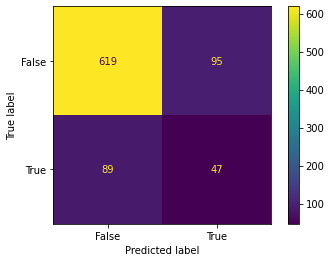

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h19_test_raw['cat_bin_actual']
predicted = h19_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.7835294117647059

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.33098591549295775

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.34558823529411764

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.8669467787114846

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.3381294964028777

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.7835294117647059, 'Precision': 0.33098591549295775, 'Sensitivity_recall': 0.34558823529411764, 'Specificity': 0.8669467787114846, 'F1_score': 0.3381294964028777}


### TEST H2019 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge18_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1              -1_deutschland_immer_merkel_deutschen
1       0            0_merkel_deutschland_deutschen_deutsche
2       1             1_flüchtlinge_asylanten_asyl_migranten
3       2                2_islam_moslems_muslimischen_moslem
4       3          3_politiker_politik_politikern_demokratie
5       4              4_medien_journalismus_propaganda_news
6       5                            5_grünen_grüne_grün_rot
7       6                   6_türkei_türken_türke_türkischen
8       7                 7_tweet_twitter_facebook_retweeten
9       8                       8_geld_zahlen_millionen_shop
10      9             9_macmike_bka_gutachten_kugelschreiber
11     10                    10_idioten_dumm_dummheit_dummen
12     11               11_islam_moslems_europa_kindergärten
13     12         12_flüchtlinge_italien_italiener_migranten
14     13                    13_nazis_nazi_sprechen_neonazis
15     14          14_israel_jerusalem_palästinenser_israels
16     15                 15_neuwahlen_wähler_fdp_wahlsystem
17     16                          16_bild_bilder_kunst_foto
18     17             17_kirche_verrat_katholischen_religion
19     18               18_syrien_afghanistan_syrer_afghanen
20     19         19_spd_bundesparteitag_verhandlungen_union
21     20              20_polizei_polizisten_banner_polizist
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen
23     22                   22_afrikaner_afrika_china_europa
24     23                 23_russland_putins_russischen_nato
25     24                   24_fresse_gegessen_mad_schnitzel
26     25                      25_mord_märtyrer_töten_mörder
27     26                  26_rainer_trinken_flaschen_wasser
28     27   27_rassismus_rassisten_rassistischen_dargestellt
29     28              28_türken_türkei_türkisch_jahrhundert
30     29           29_terroristen_terror_unterstützung_dieb
31     30               30_jahr_neujahrsempfang_ändern_happy
32     31         31_kommunisten_linke_rebellion_kommunistin
33     32                         32_nacht_abend_gute_lieben
34     33                   33_krieg_nationen_kämpfer_truppe
35     34                  34_waffen_panzer_raketen_munition
36     35                     35_fahren_rnv_autobahnen_hause
37     36      36_familiennachzug_familien_subsidiär_familie
38     37                      37_sport_fußball_köln_abstieg
39     38                38_geblockt_sofort_stunden_gesperrt
40     39                       39_humor_witzig_satire_lacht
41     40            40_regierung_regieren_gewählt_charakter
42     41     41_antisemitismus_antisemitische_daher_artikel
43     42  42_patriotismus_nationalismus_patriotisch_patriot
44     43             43_jamaika_möglich_koalition_gespräche
45     44              44_ausland_unsichere_hast_stromkosten
46     45                   45_berlin_berliner_gipfel_ziehen
47     46     46_steuerzahler_griechen_steuergelder_schulden
48     47             47_katalonien_spanien_spaniens_brüssel

In [ ]:
h19_test_pred_values_true_pos['Topic'] = h19_test_pred_values_true_pos.index
h19_test_pred_values_true_pos

pred    percent  Topic
-1     23  48.936170     -1
 0      6  12.765957      0
 3      3   6.382979      3
 1      3   6.382979      1
 13     3   6.382979     13
 23     1   2.127660     23
 18     1   2.127660     18
 11     1   2.127660     11
 44     1   2.127660     44
 2      1   2.127660      2
 22     1   2.127660     22
 4      1   2.127660      4
 16     1   2.127660     16
 24     1   2.127660     24

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h19_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH19TP', 'percent':'%H19TP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_pos['Topic'] = h19_test_pred_values_false_pos.index
h19_test_pred_values_false_pos

pred    percent  Topic
-1     53  55.789474     -1
 0     13  13.684211      0
 1      6   6.315789      1
 26     3   3.157895     26
 5      3   3.157895      5
 2      2   2.105263      2
 8      2   2.105263      8
 44     2   2.105263     44
 11     2   2.105263     11
 13     2   2.105263     13
 23     1   1.052632     23
 4      1   1.052632      4
 46     1   1.052632     46
 20     1   1.052632     20
 22     1   1.052632     22
 3      1   1.052632      3
 45     1   1.052632     45

In [ ]:
df3 = h19_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH19FP', 'percent':'%H19FP', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_true_neg['Topic'] = h19_test_pred_values_true_neg.index
h19_test_pred_values_true_neg

pred    percent  Topic
-1    314  50.726979     -1
 0    144  23.263328      0
 1     28   4.523425      1
 8     13   2.100162      8
 7     12   1.938611      7
 2     10   1.615509      2
 23     7   1.130856     23
 12     7   1.130856     12
 46     6   0.969305     46
 5      6   0.969305      5
 3      6   0.969305      3
 4      5   0.807754      4
 13     5   0.807754     13
 15     5   0.807754     15
 31     5   0.807754     31
 18     4   0.646204     18
 35     3   0.484653     35
 25     3   0.484653     25
 20     3   0.484653     20
 22     3   0.484653     22
 24     3   0.484653     24
 30     3   0.484653     30
 21     3   0.484653     21
 6      3   0.484653      6
 16     2   0.323102     16
 10     2   0.323102     10
 43     2   0.323102     43
 44     2   0.323102     44
 27     2   0.323102     27
 19     2   0.323102     19
 14     1   0.161551     14
 26     1   0.161551     26
 40     1   0.161551     40
 17     1   0.161551     17
 34     1   0.161551     34
 39     1   0.161551     39

In [ ]:
df4 = h19_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH19TN', 'percent':'%H19TN', 'Topic':'Topic'})

In [ ]:
h19_test_pred_values_false_neg['Topic'] = h19_test_pred_values_false_neg.index
h19_test_pred_values_false_neg

pred    percent  Topic
-1     53  59.550562     -1
 0     10  11.235955      0
 1      3   3.370787      1
 2      3   3.370787      2
 27     3   3.370787     27
 23     2   2.247191     23
 12     2   2.247191     12
 5      2   2.247191      5
 3      1   1.123596      3
 7      1   1.123596      7
 13     1   1.123596     13
 24     1   1.123596     24
 31     1   1.123596     31
 11     1   1.123596     11
 4      1   1.123596      4
 6      1   1.123596      6
 20     1   1.123596     20
 46     1   1.123596     46
 39     1   1.123596     39

In [ ]:
df5 = h19_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH19FN', 'percent':'%H19FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']] = df_merged[['%H19TP', '%H19TN','%H19FP', '%H19FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H19', '%H19','%H19', '%H20']]
#df_to_round = df_to_round[['%H19', '%H19','%H19', '%H20']].round(2)
#df_to_round

Topic                                               Name predH19TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      23.0   
1       0            0_merkel_deutschland_deutschen_deutsche       6.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten       3.0   
3       2                2_islam_moslems_muslimischen_moslem       1.0   
4       3          3_politiker_politik_politikern_demokratie       3.0   
5       4              4_medien_journalismus_propaganda_news       1.0   
6       5                            5_grünen_grüne_grün_rot         0   
7       6                   6_türkei_türken_türke_türkischen         0   
8       7                 7_tweet_twitter_facebook_retweeten         0   
9       8                       8_geld_zahlen_millionen_shop         0   
10      9             9_macmike_bka_gutachten_kugelschreiber         0   
11     10                    10_idioten_dumm_dummheit_dummen         0   
12     11               11_islam_moslems_europa_kindergärten       1.0   
13     12         12_flüchtlinge_italien_italiener_migranten         0   
14     13                    13_nazis_nazi_sprechen_neonazis       3.0   
15     14          14_israel_jerusalem_palästinenser_israels         0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem         0   
17     16                          16_bild_bilder_kunst_foto       1.0   
18     17             17_kirche_verrat_katholischen_religion         0   
19     18               18_syrien_afghanistan_syrer_afghanen       1.0   
20     19         19_spd_bundesparteitag_verhandlungen_union         0   
21     20              20_polizei_polizisten_banner_polizist         0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen         0   
23     22                   22_afrikaner_afrika_china_europa       1.0   
24     23                 23_russland_putins_russischen_nato       1.0   
25     24                   24_fresse_gegessen_mad_schnitzel       1.0   
26     25                      25_mord_märtyrer_töten_mörder         0   
27     26                  26_rainer_trinken_flaschen_wasser         0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt         0   
29     28              28_türken_türkei_türkisch_jahrhundert         0   
30     29           29_terroristen_terror_unterstützung_dieb         0   
31     30               30_jahr_neujahrsempfang_ändern_happy         0   
32     31         31_kommunisten_linke_rebellion_kommunistin         0   
33     32                         32_nacht_abend_gute_lieben         0   
34     33                   33_krieg_nationen_kämpfer_truppe         0   
35     34                  34_waffen_panzer_raketen_munition         0   
36     35                     35_fahren_rnv_autobahnen_hause         0   
37     36      36_familiennachzug_familien_subsidiär_familie         0   
38     37                      37_sport_fußball_köln_abstieg         0   
39     38                38_geblockt_sofort_stunden_gesperrt         0   
40     39                       39_humor_witzig_satire_lacht         0   
41     40            40_regierung_regieren_gewählt_charakter         0   
42     41     41_antisemitismus_antisemitische_daher_artikel         0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot         0   
44     43             43_jamaika_möglich_koalition_gespräche         0   
45     44              44_ausland_unsichere_hast_stromkosten       1.0   
46     45                   45_berlin_berliner_gipfel_ziehen         0   
47     46     46_steuerzahler_griechen_steuergelder_schulden         0   
48     47             47_katalonien_spanien_spaniens_brüssel         0   

    %H19TP predH19FP  %H19FP predH19TN  %H19TN predH19FN  %H19FN  
0    48.94      53.0   55.79     314.0   50.73      53.0   59.55  
1    12.77      13.0   13.68     144.0   23.26      10.0   11.24  
2     6.38       6.0    6.32      28.0    4.52       3.0    3.37  
3     2.13       2.0    2.11      1

In [ ]:
df_merged

Topic                                               Name predH19TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      23.0   
1       0            0_merkel_deutschland_deutschen_deutsche       6.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten       3.0   
3       2                2_islam_moslems_muslimischen_moslem       1.0   
4       3          3_politiker_politik_politikern_demokratie       3.0   
5       4              4_medien_journalismus_propaganda_news       1.0   
6       5                            5_grünen_grüne_grün_rot         0   
7       6                   6_türkei_türken_türke_türkischen         0   
8       7                 7_tweet_twitter_facebook_retweeten         0   
9       8                       8_geld_zahlen_millionen_shop         0   
10      9             9_macmike_bka_gutachten_kugelschreiber         0   
11     10                    10_idioten_dumm_dummheit_dummen         0   
12     11               11_islam_moslems_europa_kindergärten       1.0   
13     12         12_flüchtlinge_italien_italiener_migranten         0   
14     13                    13_nazis_nazi_sprechen_neonazis       3.0   
15     14          14_israel_jerusalem_palästinenser_israels         0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem         0   
17     16                          16_bild_bilder_kunst_foto       1.0   
18     17             17_kirche_verrat_katholischen_religion         0   
19     18               18_syrien_afghanistan_syrer_afghanen       1.0   
20     19         19_spd_bundesparteitag_verhandlungen_union         0   
21     20              20_polizei_polizisten_banner_polizist         0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen         0   
23     22                   22_afrikaner_afrika_china_europa       1.0   
24     23                 23_russland_putins_russischen_nato       1.0   
25     24                   24_fresse_gegessen_mad_schnitzel       1.0   
26     25                      25_mord_märtyrer_töten_mörder         0   
27     26                  26_rainer_trinken_flaschen_wasser         0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt         0   
29     28              28_türken_türkei_türkisch_jahrhundert         0   
30     29           29_terroristen_terror_unterstützung_dieb         0   
31     30               30_jahr_neujahrsempfang_ändern_happy         0   
32     31         31_kommunisten_linke_rebellion_kommunistin         0   
33     32                         32_nacht_abend_gute_lieben         0   
34     33                   33_krieg_nationen_kämpfer_truppe         0   
35     34                  34_waffen_panzer_raketen_munition         0   
36     35                     35_fahren_rnv_autobahnen_hause         0   
37     36      36_familiennachzug_familien_subsidiär_familie         0   
38     37                      37_sport_fußball_köln_abstieg         0   
39     38                38_geblockt_sofort_stunden_gesperrt         0   
40     39                       39_humor_witzig_satire_lacht         0   
41     40            40_regierung_regieren_gewählt_charakter         0   
42     41     41_antisemitismus_antisemitische_daher_artikel         0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot         0   
44     43             43_jamaika_möglich_koalition_gespräche         0   
45     44              44_ausland_unsichere_hast_stromkosten       1.0   
46     45                   45_berlin_berliner_gipfel_ziehen         0   
47     46     46_steuerzahler_griechen_steuergelder_schulden         0   
48     47             47_katalonien_spanien_spaniens_brüssel         0   

    %H19TP predH19FP  %H19FP predH19TN  %H19TN predH19FN  %H19FN  
0    48.94      53.0   55.79     314.0   50.73      53.0   59.55  
1    12.77      13.0   13.68     144.0   23.26      10.0   11.24  
2     6.38       6.0    6.32      28.0    4.52       3.0    3.37  
3     2.13       2.0    2.11      1

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH19TP": int, "predH19TN":int, "predH19FP":int, "predH19FN":int})
df_merged

Topic                                               Name  predH19TP  \
0      -1              -1_deutschland_immer_merkel_deutschen         23   
1       0            0_merkel_deutschland_deutschen_deutsche          6   
2       1             1_flüchtlinge_asylanten_asyl_migranten          3   
3       2                2_islam_moslems_muslimischen_moslem          1   
4       3          3_politiker_politik_politikern_demokratie          3   
5       4              4_medien_journalismus_propaganda_news          1   
6       5                            5_grünen_grüne_grün_rot          0   
7       6                   6_türkei_türken_türke_türkischen          0   
8       7                 7_tweet_twitter_facebook_retweeten          0   
9       8                       8_geld_zahlen_millionen_shop          0   
10      9             9_macmike_bka_gutachten_kugelschreiber          0   
11     10                    10_idioten_dumm_dummheit_dummen          0   
12     11               11_islam_moslems_europa_kindergärten          1   
13     12         12_flüchtlinge_italien_italiener_migranten          0   
14     13                    13_nazis_nazi_sprechen_neonazis          3   
15     14          14_israel_jerusalem_palästinenser_israels          0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem          0   
17     16                          16_bild_bilder_kunst_foto          1   
18     17             17_kirche_verrat_katholischen_religion          0   
19     18               18_syrien_afghanistan_syrer_afghanen          1   
20     19         19_spd_bundesparteitag_verhandlungen_union          0   
21     20              20_polizei_polizisten_banner_polizist          0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen          0   
23     22                   22_afrikaner_afrika_china_europa          1   
24     23                 23_russland_putins_russischen_nato          1   
25     24                   24_fresse_gegessen_mad_schnitzel          1   
26     25                      25_mord_märtyrer_töten_mörder          0   
27     26                  26_rainer_trinken_flaschen_wasser          0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt          0   
29     28              28_türken_türkei_türkisch_jahrhundert          0   
30     29           29_terroristen_terror_unterstützung_dieb          0   
31     30               30_jahr_neujahrsempfang_ändern_happy          0   
32     31         31_kommunisten_linke_rebellion_kommunistin          0   
33     32                         32_nacht_abend_gute_lieben          0   
34     33                   33_krieg_nationen_kämpfer_truppe          0   
35     34                  34_waffen_panzer_raketen_munition          0   
36     35                     35_fahren_rnv_autobahnen_hause          0   
37     36      36_familiennachzug_familien_subsidiär_familie          0   
38     37                      37_sport_fußball_köln_abstieg          0   
39     38                38_geblockt_sofort_stunden_gesperrt          0   
40     39                       39_humor_witzig_satire_lacht          0   
41     40            40_regierung_regieren_gewählt_charakter          0   
42     41     41_antisemitismus_antisemitische_daher_artikel          0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot          0   
44     43             43_jamaika_möglich_koalition_gespräche          0   
45     44              44_ausland_unsichere_hast_stromkosten          1   
46     45                   45_berlin_berliner_gipfel_ziehen          0   
47     46     46_steuerzahler_griechen_steuergelder_schulden          0   
48     47             47_katalonien_spanien_spaniens_brüssel          0   

    %H19TP  predH19FP  %H19FP  predH19TN  %H19TN  predH19FN  %H19FN  
0    48.94         53   55.79        314   50.73         53   59.55  
1    12.77         13   13.68        144   23.26         10   11.24  
2     6.38          6    6.32         28   

In [ ]:
df_percent = df_merged[['Topic','%H19TP', '%H19TN','%H19FP', '%H19FN','Name']]
df_percent

Topic  %H19TP  %H19TN  %H19FP  %H19FN  \
0      -1   48.94   50.73   55.79   59.55   
1       0   12.77   23.26   13.68   11.24   
2       1    6.38    4.52    6.32    3.37   
3       2    2.13    1.62    2.11    3.37   
4       3    6.38    0.97    1.05    1.12   
5       4    2.13    0.81    1.05    1.12   
6       5    0.00    0.97    3.16    2.25   
7       6    0.00    0.48    0.00    1.12   
8       7    0.00    1.94    0.00    1.12   
9       8    0.00    2.10    2.11    0.00   
10      9    0.00    0.00    0.00    0.00   
11     10    0.00    0.32    0.00    0.00   
12     11    2.13    0.00    2.11    1.12   
13     12    0.00    1.13    0.00    2.25   
14     13    6.38    0.81    2.11    1.12   
15     14    0.00    0.16    0.00    0.00   
16     15    0.00    0.81    0.00    0.00   
17     16    2.13    0.32    0.00    0.00   
18     17    0.00    0.16    0.00    0.00   
19     18    2.13    0.65    0.00    0.00   
20     19    0.00    0.32    0.00    0.00   
21     20    0.00    0.48    1.05    1.12   
22     21    0.00    0.48    0.00    0.00   
23     22    2.13    0.48    1.05    0.00   
24     23    2.13    1.13    1.05    2.25   
25     24    2.13    0.48    0.00    1.12   
26     25    0.00    0.48    0.00    0.00   
27     26    0.00    0.16    3.16    0.00   
28     27    0.00    0.32    0.00    3.37   
29     28    0.00    0.00    0.00    0.00   
30     29    0.00    0.00    0.00    0.00   
31     30    0.00    0.48    0.00    0.00   
32     31    0.00    0.81    0.00    1.12   
33     32    0.00    0.00    0.00    0.00   
34     33    0.00    0.00    0.00    0.00   
35     34    0.00    0.16    0.00    0.00   
36     35    0.00    0.48    0.00    0.00   
37     36    0.00    0.00    0.00    0.00   
38     37    0.00    0.00    0.00    0.00   
39     38    0.00    0.00    0.00    0.00   
40     39    0.00    0.16    0.00    1.12   
41     40    0.00    0.16    0.00    0.00   
42     41    0.00    0.00    0.00    0.00   
43     42    0.00    0.00    0.00    0.00   
44     43    0.00    0.32    0.00    0.00   
45     44    2.13    0.32    2.11    0.00   
46     45    0.00    0.00    1.05    0.00   
47     46    0.00    0.97    1.05    1.12   
48     47    0.00    0.00    0.00    0.00   

                                                 Name  
0               -1_deutschland_immer_merkel_deutschen  
1             0_merkel_deutschland_deutschen_deutsche  
2              1_flüchtlinge_asylanten_asyl_migranten  
3                 2_islam_moslems_muslimischen_moslem  
4           3_politiker_politik_politikern_demokratie  
5               4_medien_journalismus_propaganda_news  
6                             5_grünen_grüne_grün_rot  
7                    6_türkei_türken_türke_türkischen  
8                  7_tweet_twitter_facebook_retweeten  
9                        8_geld_zahlen_millionen_shop  
10             9_macmike_bka_gutachten_kugelschreiber  
11                    10_idioten_dumm_dummheit_dummen  
12               11_islam_moslems_europa_kindergärten  
13         12_flüchtlinge_italien_italiener_migranten  
14                    13_nazis_nazi_sprechen_neonazis  
15          14_israel_jerusalem_palästinenser_israels  
16                 15_neuwahlen_wähler_fdp_wahlsystem  
17                          16_bild_bilder_kunst_foto  
18             17_kirche_verrat_katholischen_religion  
19               18_syrien_afghanistan_syrer_afghanen  
20         19_spd_bundesparteitag_verhandlungen_union  
21              20_polizei_polizisten_banner_polizist  
22    21_schulabschluss_schulz_sitzengeblieben_sitzen  
23                   22_afrikaner_afrika_china_europa  
24                 23_russland_putins_russischen_nato  
25                   24_fresse_gegessen_mad_schnitzel  
26                      25_mord_märtyrer_töten_mörder  
27                  26_rainer_trinken_flaschen_wasser  
28   27_rassismus_rassisten_rassistischen_dargestellt  
29              28_türken_türkei_türkisch_jahrhundert  
30           29_t

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

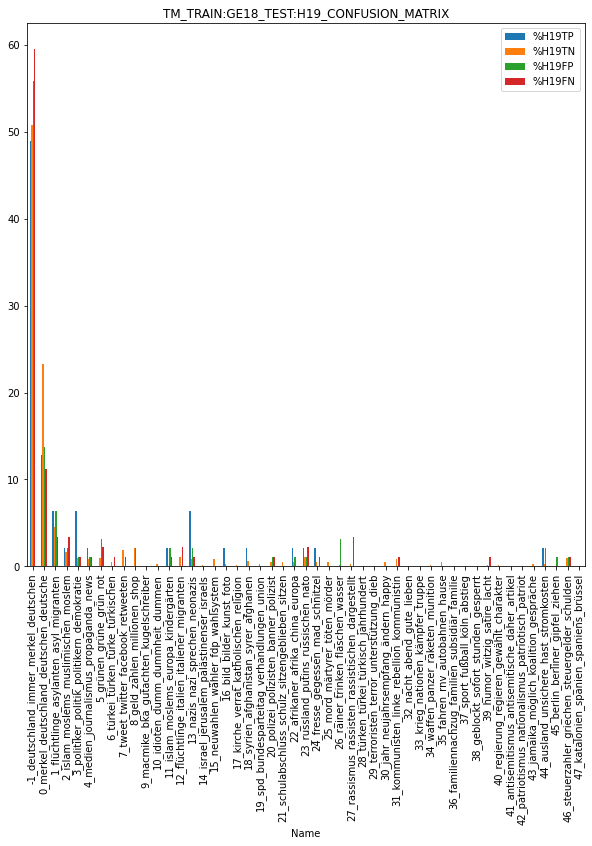

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX.plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:H19_CONFUSION_MATRIX")

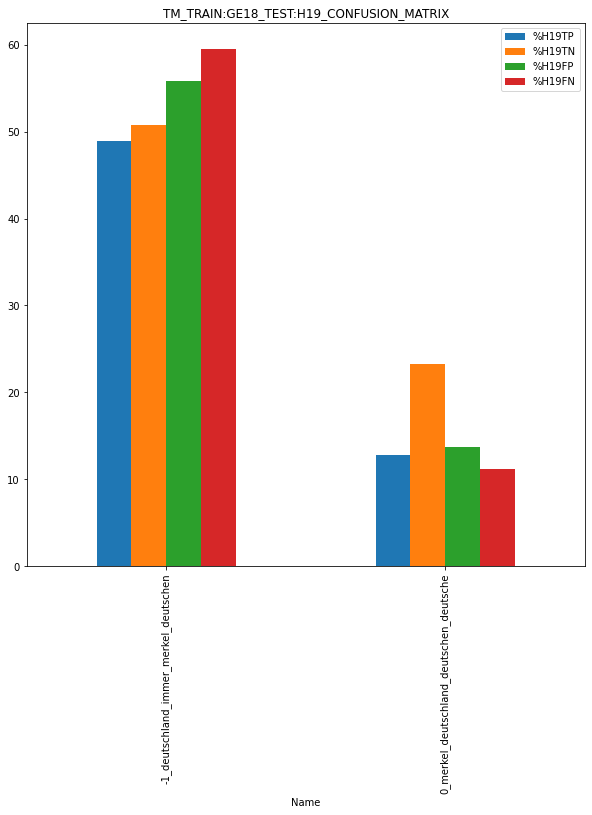

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:H19_CONFUSION_MATRIX")

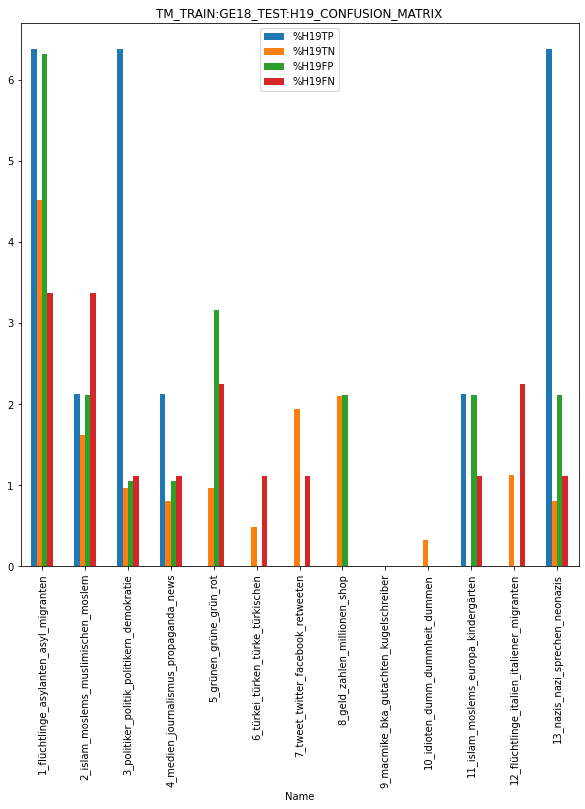

In [ ]:
test_h19_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:H19_CONFUSION_MATRIX")

In [ ]:
#test_h19_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H19TP', '%H19TN','%H19FP', '%H19FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:GE18_TEST:H19_CONFUSION_MATRIX")

### Test H2020

In [ ]:
train_ge18_class_h20 = pd.read_csv('/content/NSIT_submission_Train_GERMEVAL2018_Test_HASOC2020_TASK_A_DE_A.csv')
train_ge18_class_h20

task1
0        0
1        0
2        0
3        0
4        0
..     ...
521      0
522      0
523      0
524      1
525      1

[526 rows x 1 columns]

In [ ]:
train_ge18_class_h20['task1'] = train_ge18_class_h20['task1'].map({0: 1, 1: 0}).astype(int)
train_ge18_class_h20

task1
0        1
1        1
2        1
3        1
4        1
..     ...
521      1
522      1
523      1
524      0
525      0

[526 rows x 1 columns]

In [ ]:
h20_test_class_values = pd.DataFrame(train_ge18_class_h20['task1'].value_counts())
h20_test_class_values

task1
1    330
0    196

In [ ]:

h20_test_raw['class'] = train_ge18_class_h20['task1']
h20_test_raw

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
0    hasoc_2020_de_1053    -1      1               0                  0  
1     hasoc_2020_de_671     0      1               0                  0  
2    hasoc_2020_de_2977    33      1               0                  0  
3    hasoc_2020_de_1746    -1      1               0                  0  
4    hasoc_2020_de_2416    -1      1               0                  0  
..                  ...   ...    ...             ...                ...  
521   hasoc_2020_de_486    -1      1               0                  1  
522  hasoc_2020_de_3388     5      1               0                  1  
523  hasoc_2020_de_2745    -1      1               0                  0  
524   hasoc_2020_de_236    10      0               0                  1  
525  hasoc_2020_de_2850    -1      0               0                  0  

[526 rows x 10 columns]

In [ ]:
# https://stackoverflow.com/questions/41691081/pandas-use-and-operator-in-loc-function
h20_test_true_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 1)]
h20_test_true_pos

Unnamed: 0             tweet_id  \
5             5  1129712298531184641   
6             6  1123981478361219073   
17           17  1126089577486323712   
21           21  1134130242786926592   
22           22  1134444350027509766   
..          ...                  ...   
500         500  1128321203075256320   
508         508  1129379774076473344   
511         511  1130096161212252162   
512         512  1124842568972288000   
517         517  1124379312264708101   

                                                  text task1 task2  \
5    RT @VonSchwer: Ein guter Patriot geht von Bord...   HOF  OFFN   
6    @yooli_derechte @MontanaBlack Mich wundert es ...   HOF  OFFN   
17   RT @CWBWElias: @TheresaGesperrt Wollte meine N...   HOF  PRFN   
21   @sgepeeti Verdursten ist aber auch ein scheiß ...   HOF  PRFN   
22                 Scheiß. Hurensohn gam @FortniteGame   HOF  PRFN   
..                                                 ...   ...   ...   
500                         @VizzionsXI halt dein maul   HOF  OFFN   
508                       Halt die fresse du hurensohn   HOF  PRFN   
511         @noelmgb_ @Sebbe2704 Richtiger Hurensohn 😂   HOF  PRFN   
512  Der Bass ist tief, die Atmosphäre sehr entspan...   HOF  PRFN   
517  RT @theunwantedpath: HABT IHR DEN ARSCH OFFEN ...   HOF  PRFN   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
5    hasoc_2020_de_1112    42      1               1                  1  
6    hasoc_2020_de_2938    -1      1               1                  1  
17   hasoc_2020_de_2545    -1      1               1                  1  
21   hasoc_2020_de_1235    -1      1               1                  1  
22   hasoc_2020_de_2487    -1      1               1                  0  
..                  ...   ...    ...             ...                ...  
500  hasoc_2020_de_1958    -1      1               1                  0  
508  hasoc_2020_de_2465    -1      1               1                  1  
511   hasoc_2020_de_958    -1      1               1                  0  
512  hasoc_2020_de_2470    -1      1               1                  1  
517   hasoc_2020_de_986    -1      1               1                  0  

[142 rows x 10 columns]

In [ ]:
h20_test_pred_values_true_pos = pd.DataFrame(h20_test_true_pos['pred'].value_counts())
h20_test_pred_values_true_pos['percent'] = (h20_test_pred_values_true_pos['pred'] / h20_test_pred_values_true_pos['pred'].sum()) * 100
h20_test_pred_values_true_pos

pred    percent
-1     87  61.267606
 0     19  13.380282
 10     9   6.338028
 24     6   4.225352
 5      5   3.521127
 1      3   2.112676
 13     2   1.408451
 3      2   1.408451
 8      2   1.408451
 42     1   0.704225
 16     1   0.704225
 7      1   0.704225
 11     1   0.704225
 25     1   0.704225
 2      1   0.704225
 6      1   0.704225

In [ ]:
h20_test_false_pos = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 1)]
h20_test_false_pos

Unnamed: 0             tweet_id  \
0             0  1129095874242650112   
1             1  1129004308396236800   
2             2  1130896929355907080   
3             3  1132251534329307136   
4             4  1124941869115498496   
..          ...                  ...   
518         518  1128653081556787205   
519         519  1131124025734979586   
521         521  1124809878546128897   
522         522  1132433240000798720   
523         523  1127366294255357958   

                                                  text task1 task2  \
0      @derCarsti Boykottieren hört sich besser an. 💙💙   NOT  NONE   
1    RT @ibikus31: Es wird spekuliert, ob Merkel ei...   NOT  NONE   
2    Hat #Hitler wirklich den Krieg in der Wüste ve...   NOT  NONE   
3    RT @Beatrix_vStorch: #May tritt in UK unter Tr...   NOT  NONE   
4    @justmeDoro Eher nicht. Das Gänse hauen wieder...   NOT  NONE   
..                                                 ...   ...   ...   
518           Vegetarisch essen um die Nazis zu ärgern   NOT  NONE   
519  @GaramSalami @graf_persephone Denk ich mir jed...   NOT  NONE   
521  RT @ChanMachtSo: SCHMERZEN!!!! Au!!! Mein Gehi...   NOT  NONE   
522  Die Zerstörung der Grünen. https://t.co/SIYDJj...   NOT  NONE   
523  RT @PParzival: "Antideutsche" Pseudo-linke Ide...   NOT  NONE   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
0    hasoc_2020_de_1053    -1      1               0                  0  
1     hasoc_2020_de_671     0      1               0                  0  
2    hasoc_2020_de_2977    33      1               0                  0  
3    hasoc_2020_de_1746    -1      1               0                  0  
4    hasoc_2020_de_2416    -1      1               0                  0  
..                  ...   ...    ...             ...                ...  
518  hasoc_2020_de_1179    13      1               0                  1  
519  hasoc_2020_de_1295    -1      1               0                  0  
521   hasoc_2020_de_486    -1      1               0                  1  
522  hasoc_2020_de_3388     5      1               0                  1  
523  hasoc_2020_de_2745    -1      1               0                  0  

[188 rows x 10 columns]

In [ ]:
h20_test_pred_values_false_pos = pd.DataFrame(h20_test_false_pos['pred'].value_counts())
h20_test_pred_values_false_pos['percent'] = (h20_test_pred_values_false_pos['pred'] / h20_test_pred_values_false_pos['pred'].sum()) * 100
h20_test_pred_values_false_pos

pred    percent
-1    102  54.255319
 0     25  13.297872
 13    14   7.446809
 10    13   6.914894
 5     11   5.851064
 2      6   3.191489
 8      3   1.595745
 24     2   1.063830
 30     1   0.531915
 3      1   0.531915
 11     1   0.531915
 33     1   0.531915
 28     1   0.531915
 27     1   0.531915
 6      1   0.531915
 25     1   0.531915
 39     1   0.531915
 9      1   0.531915
 12     1   0.531915
 46     1   0.531915

In [ ]:
h20_test_true_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'NOT') & (h20_test_raw['class'] == 0)]
h20_test_true_neg

Unnamed: 0             tweet_id  \
7             7  1124978296628961287   
11           11  1126085567723266049   
13           13  1129845081777889280   
18           18  1124336652028133376   
26           26  1128501482620432384   
..          ...                  ...   
506         506  1129864090376130560   
514         514  1127595013867745290   
520         520  1123589659047731201   
524         524  1124362090460975105   
525         525  1131487097293103104   

                                                  text task1 task2  \
7    Da war #SPD #Kuehnert und am Ende auch #Nahles...   NOT  NONE   
11   @denkausfall @LenaRogl Würde es zunächst auf d...   NOT  NONE   
13   Er hat Pakinson in seiner linken Hand... #ESC2...   NOT  NONE   
18   Merkel sagt Sahel-Staaten Hilfe zu https://t.c...   NOT  NONE   
26   #NWBRB44\n\nDorsten (ab 06:14) -&gt; Oberhause...   NOT  NONE   
..                                                 ...   ...   ...   
506  @olgatatala Nicht dass Du noch zu den #Grünen ...   NOT  NONE   
514       https://t.co/zeG1NZTFnn\n\nMerkel muss weg !   NOT  NONE   
520        Einfach einladend 😉 https://t.co/kRHAoshmxY   NOT  NONE   
524                         Klug reden und dumm leben.   NOT  NONE   
525  Wissen wir schon lange....hat das die Merkel e...   NOT  NONE   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
7    hasoc_2020_de_2205    10      0               0                  1  
11   hasoc_2020_de_1227    -1      0               0                  0  
13   hasoc_2020_de_1922    -1      0               0                  0  
18   hasoc_2020_de_1755    -1      0               0                  0  
26   hasoc_2020_de_3141     0      0               0                  0  
..                  ...   ...    ...             ...                ...  
506  hasoc_2020_de_1437    -1      0               0                  0  
514    hasoc_2020_de_88     0      0               0                  0  
520  hasoc_2020_de_2794     0      0               0                  0  
524   hasoc_2020_de_236    10      0               0                  1  
525  hasoc_2020_de_2850    -1      0               0                  0  

[177 rows x 10 columns]

In [ ]:
h20_test_pred_values_true_neg = pd.DataFrame(h20_test_true_neg['pred'].value_counts())
h20_test_pred_values_true_neg['percent'] = (h20_test_pred_values_true_neg['pred'] / h20_test_pred_values_true_neg['pred'].sum()) * 100
h20_test_pred_values_true_neg

pred    percent
-1     94  53.107345
 0     42  23.728814
 5     13   7.344633
 10     6   3.389831
 2      3   1.694915
 13     3   1.694915
 28     2   1.129944
 16     2   1.129944
 45     1   0.564972
 8      1   0.564972
 11     1   0.564972
 1      1   0.564972
 6      1   0.564972
 36     1   0.564972
 26     1   0.564972
 9      1   0.564972
 39     1   0.564972
 44     1   0.564972
 32     1   0.564972
 4      1   0.564972

In [ ]:
h20_test_false_neg = h20_test_raw.loc[(h20_test_raw['task1'] == 'HOF') & (h20_test_raw['class'] == 0)]
h20_test_false_neg

Unnamed: 0             tweet_id  \
93           93  1130925320591351808   
147         147  1130890692421652481   
175         175  1130075063867383808   
208         208  1123617999980617731   
221         221  1132922824308514816   
223         223  1131497012610912257   
240         240  1132883158775607301   
241         241  1130861013501337601   
268         268  1134492962006679557   
269         269  1124285817030107137   
303         303  1131608664979255296   
305         305  1128001819408519171   
312         312  1133160054163628032   
344         344  1133986659182219265   
391         391  1123482431691079680   
414         414  1130116130306179072   
485         485  1132868847797710853   
497         497  1134619244107370496   
498         498  1129818645109116928   

                                                  text task1 task2  \
93   Ruth Townsley erst einmal gefeuert. Wollte Sae...   HOF  OFFN   
147  RT @LowerClassMag: Wichtig für die ganzen Libe...   HOF  HATE   
175  RT @PhilippKirchbe2: @RegSprecher_AT PEINLICHE...   HOF  OFFN   
208  Am Arsch der Welt — Derb für „abseits der Zivi...   HOF  PRFN   
221  #Grüne Antidemokraten wollen Europa und Deutsc...   HOF  HATE   
223  Der Bürgerrechtler Carsten Schulz: Der Moralap...   HOF  OFFN   
240  RT @karina140911: Eva Herman: Ihr seid Idioten...   HOF  PRFN   
241  Jogg' über den Pfad der Erkenntnis\nUnd stopfe...   HOF  PRFN   
268  @aidrieeen #Merkel Es reicht!!! Sie haben uns ...   HOF  HATE   
269  @katzenhaxen @Dark_Fighter_87 @R3tu4s @wenked ...   HOF  PRFN   
303           @tagesschau @aktuelle_stunde Weg damit!🤮   HOF  PRFN   
305  RT @SirSchnee: #Merkel trinkt aus dem Reagenzg...   HOF  OFFN   
312  deutsche milf free kostenlose porrno kostenlos...   HOF  PRFN   
344  RT @Ungebeten1: @pinkcrazypony Gottseidank ist...   HOF  PRFN   
391  @NeoXynx @GittiB2 Die ist dumm wie Bohnenstroh...   HOF  OFFN   
414  @cem_oezdemir Und die #Grünen in #Europa sind ...   HOF  HATE   
485  @RablPeter Genau deswegen ist die #ÖVP erfolgr...   HOF  HATE   
497  RT @maxotte_says: #Harvard war mal eine #Elite...   HOF  OFFN   
498  @ChHuegel @ManfredWeber Man kann doch den über...   HOF  HATE   

                     ID  pred  class  cat_bin_actual  cat_bin_predicted  
93   hasoc_2020_de_1851    -1      0               1                  0  
147  hasoc_2020_de_1563    23      0               1                  1  
175  hasoc_2020_de_2589    -1      0               1                  0  
208  hasoc_2020_de_3003    -1      0               1                  1  
221  hasoc_2020_de_1771     0      0               1                  1  
223  hasoc_2020_de_2267     0      0               1                  0  
240  hasoc_2020_de_3336    10      0               1                  1  
241  hasoc_2020_de_2268    -1      0               1                  1  
268  hasoc_2020_de_3409    -1      0               1                  0  
269  hasoc_2020_de_2119     0      0               1                  1  
303   hasoc_2020_de_650     0      0               1                  0  
305  hasoc_2020_de_1141     0      0               1                  0  
312  hasoc_2020_de_2958    -1      0               1                  0  
344  hasoc_2020_de_2917    -1      0               1                  1  
391  hasoc_2020_de_1408    27      0               1                  1  
414  hasoc_2020_de_3212    -1      0               1                  0  
485  hasoc_2020_de_2258    -1      0               1                  0  
497  hasoc_2020_de_1606    21      0               1                  0  
498  hasoc_2020_de_2580     5      0               1                  0

In [ ]:
h20_test_pred_values_false_neg = pd.DataFrame(h20_test_false_neg['pred'].value_counts())
h20_test_pred_values_false_neg['percent'] = (h20_test_pred_values_false_neg['pred'] / h20_test_pred_values_false_neg['pred'].sum()) * 100
h20_test_pred_values_false_neg

pred    percent
-1      9  47.368421
 0      5  26.315789
 23     1   5.263158
 10     1   5.263158
 27     1   5.263158
 21     1   5.263158
 5      1   5.263158

In [ ]:
h20_test_raw['cat_bin_actual'] = h20_test_raw['task1'].map({'NOT': 0, 'HOF': 1}).astype(int)
h20_test_raw['cat_bin_predicted'] = h20_test_raw['class'].astype(int)


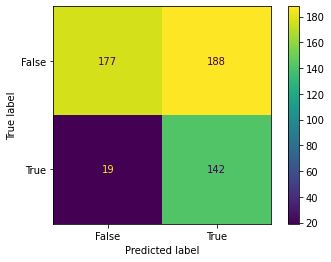

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = h20_test_raw['cat_bin_actual']
predicted = h20_test_raw['cat_bin_predicted']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(actual, predicted)
accuracy

0.6064638783269962

In [ ]:
precision = metrics.precision_score(actual, predicted)
precision

0.4303030303030303

In [ ]:
sensitivity_recall = metrics.recall_score(actual, predicted)
sensitivity_recall

0.8819875776397516

In [ ]:
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.4849315068493151

In [ ]:
F1_score = metrics.f1_score(actual, predicted)
F1_score

0.5784114052953158

In [ ]:
#metrics
print({"Accuracy":accuracy,"Precision":precision,
       "Sensitivity_recall":sensitivity_recall,
       "Specificity":specificity,
       "F1_score":F1_score})

{'Accuracy': 0.6064638783269962, 'Precision': 0.4303030303030303, 'Sensitivity_recall': 0.8819875776397516, 'Specificity': 0.4849315068493151, 'F1_score': 0.5784114052953158}


### TEST H2020 INDEZES CONFUSION MATRIX

In [ ]:
# df1 enthält die Topicnummern und ihre Bezeichnungen
df1 =  train_ge18_model_topics[['Topic','Name']]
df1

Topic                                               Name
0      -1              -1_deutschland_immer_merkel_deutschen
1       0            0_merkel_deutschland_deutschen_deutsche
2       1             1_flüchtlinge_asylanten_asyl_migranten
3       2                2_islam_moslems_muslimischen_moslem
4       3          3_politiker_politik_politikern_demokratie
5       4              4_medien_journalismus_propaganda_news
6       5                            5_grünen_grüne_grün_rot
7       6                   6_türkei_türken_türke_türkischen
8       7                 7_tweet_twitter_facebook_retweeten
9       8                       8_geld_zahlen_millionen_shop
10      9             9_macmike_bka_gutachten_kugelschreiber
11     10                    10_idioten_dumm_dummheit_dummen
12     11               11_islam_moslems_europa_kindergärten
13     12         12_flüchtlinge_italien_italiener_migranten
14     13                    13_nazis_nazi_sprechen_neonazis
15     14          14_israel_jerusalem_palästinenser_israels
16     15                 15_neuwahlen_wähler_fdp_wahlsystem
17     16                          16_bild_bilder_kunst_foto
18     17             17_kirche_verrat_katholischen_religion
19     18               18_syrien_afghanistan_syrer_afghanen
20     19         19_spd_bundesparteitag_verhandlungen_union
21     20              20_polizei_polizisten_banner_polizist
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen
23     22                   22_afrikaner_afrika_china_europa
24     23                 23_russland_putins_russischen_nato
25     24                   24_fresse_gegessen_mad_schnitzel
26     25                      25_mord_märtyrer_töten_mörder
27     26                  26_rainer_trinken_flaschen_wasser
28     27   27_rassismus_rassisten_rassistischen_dargestellt
29     28              28_türken_türkei_türkisch_jahrhundert
30     29           29_terroristen_terror_unterstützung_dieb
31     30               30_jahr_neujahrsempfang_ändern_happy
32     31         31_kommunisten_linke_rebellion_kommunistin
33     32                         32_nacht_abend_gute_lieben
34     33                   33_krieg_nationen_kämpfer_truppe
35     34                  34_waffen_panzer_raketen_munition
36     35                     35_fahren_rnv_autobahnen_hause
37     36      36_familiennachzug_familien_subsidiär_familie
38     37                      37_sport_fußball_köln_abstieg
39     38                38_geblockt_sofort_stunden_gesperrt
40     39                       39_humor_witzig_satire_lacht
41     40            40_regierung_regieren_gewählt_charakter
42     41     41_antisemitismus_antisemitische_daher_artikel
43     42  42_patriotismus_nationalismus_patriotisch_patriot
44     43             43_jamaika_möglich_koalition_gespräche
45     44              44_ausland_unsichere_hast_stromkosten
46     45                   45_berlin_berliner_gipfel_ziehen
47     46     46_steuerzahler_griechen_steuergelder_schulden
48     47             47_katalonien_spanien_spaniens_brüssel

In [ ]:
h20_test_pred_values_true_pos['Topic'] = h20_test_pred_values_true_pos.index
h20_test_pred_values_true_pos

pred    percent  Topic
-1     87  61.267606     -1
 0     19  13.380282      0
 10     9   6.338028     10
 24     6   4.225352     24
 5      5   3.521127      5
 1      3   2.112676      1
 13     2   1.408451     13
 3      2   1.408451      3
 8      2   1.408451      8
 42     1   0.704225     42
 16     1   0.704225     16
 7      1   0.704225      7
 11     1   0.704225     11
 25     1   0.704225     25
 2      1   0.704225      2
 6      1   0.704225      6

In [ ]:
# df2 bis df5 enthalten Vorhersagen, Topicanteile in Prozent sowie die Topicnr.
# dabei werden die Spalten umbenannt, damit es später beim Zusammenfügen nicht
# zu Doppelungen kommt
df2 = h20_test_pred_values_true_pos 
df2 = df2.rename(columns={'pred':'predH20TP', 'percent':'%H20TP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_pos['Topic'] = h20_test_pred_values_false_pos.index
h20_test_pred_values_false_pos

pred    percent  Topic
-1    102  54.255319     -1
 0     25  13.297872      0
 13    14   7.446809     13
 10    13   6.914894     10
 5     11   5.851064      5
 2      6   3.191489      2
 8      3   1.595745      8
 24     2   1.063830     24
 30     1   0.531915     30
 3      1   0.531915      3
 11     1   0.531915     11
 33     1   0.531915     33
 28     1   0.531915     28
 27     1   0.531915     27
 6      1   0.531915      6
 25     1   0.531915     25
 39     1   0.531915     39
 9      1   0.531915      9
 12     1   0.531915     12
 46     1   0.531915     46

In [ ]:
df3 = h20_test_pred_values_false_pos
df3 = df3.rename(columns={'pred':'predH20FP', 'percent':'%H20FP', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_true_neg['Topic'] = h20_test_pred_values_true_neg.index
h20_test_pred_values_true_neg

pred    percent  Topic
-1     94  53.107345     -1
 0     42  23.728814      0
 5     13   7.344633      5
 10     6   3.389831     10
 2      3   1.694915      2
 13     3   1.694915     13
 28     2   1.129944     28
 16     2   1.129944     16
 45     1   0.564972     45
 8      1   0.564972      8
 11     1   0.564972     11
 1      1   0.564972      1
 6      1   0.564972      6
 36     1   0.564972     36
 26     1   0.564972     26
 9      1   0.564972      9
 39     1   0.564972     39
 44     1   0.564972     44
 32     1   0.564972     32
 4      1   0.564972      4

In [ ]:
df4 = h20_test_pred_values_true_neg
df4 = df4.rename(columns={'pred':'predH20TN', 'percent':'%H20TN', 'Topic':'Topic'})

In [ ]:
h20_test_pred_values_false_neg['Topic'] = h20_test_pred_values_false_neg.index
h20_test_pred_values_false_neg

pred    percent  Topic
-1      9  47.368421     -1
 0      5  26.315789      0
 23     1   5.263158     23
 10     1   5.263158     10
 27     1   5.263158     27
 21     1   5.263158     21
 5      1   5.263158      5

In [ ]:
df5 = h20_test_pred_values_false_neg
df5 = df5.rename(columns={'pred':'predH20FN', 'percent':'%H20FN', 'Topic':'Topic'})

In [ ]:
# https://stackoverflow.com/questions/44327999/how-to-merge-multiple-dataframes
from functools import reduce

data_frames = [df1, df2, df3, df4, df5]
df_merged = reduce(lambda left,right: 
                   pd.merge(left,right,on=['Topic'], how='outer'), 
                   data_frames).fillna('0')

In [ ]:
df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']] = df_merged[['%H20TP', '%H20TN','%H20FP', '%H20FN']].astype(float).round(2)
df_merged
#df_to_round = df_merged[['%H20', '%H20','%H20', '%H20']]
#df_to_round = df_to_round[['%H20', '%H20','%H20', '%H20']].round(2)
#df_to_round

Topic                                               Name predH20TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      87.0   
1       0            0_merkel_deutschland_deutschen_deutsche      19.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten       3.0   
3       2                2_islam_moslems_muslimischen_moslem       1.0   
4       3          3_politiker_politik_politikern_demokratie       2.0   
5       4              4_medien_journalismus_propaganda_news         0   
6       5                            5_grünen_grüne_grün_rot       5.0   
7       6                   6_türkei_türken_türke_türkischen       1.0   
8       7                 7_tweet_twitter_facebook_retweeten       1.0   
9       8                       8_geld_zahlen_millionen_shop       2.0   
10      9             9_macmike_bka_gutachten_kugelschreiber         0   
11     10                    10_idioten_dumm_dummheit_dummen       9.0   
12     11               11_islam_moslems_europa_kindergärten       1.0   
13     12         12_flüchtlinge_italien_italiener_migranten         0   
14     13                    13_nazis_nazi_sprechen_neonazis       2.0   
15     14          14_israel_jerusalem_palästinenser_israels         0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem         0   
17     16                          16_bild_bilder_kunst_foto       1.0   
18     17             17_kirche_verrat_katholischen_religion         0   
19     18               18_syrien_afghanistan_syrer_afghanen         0   
20     19         19_spd_bundesparteitag_verhandlungen_union         0   
21     20              20_polizei_polizisten_banner_polizist         0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen         0   
23     22                   22_afrikaner_afrika_china_europa         0   
24     23                 23_russland_putins_russischen_nato         0   
25     24                   24_fresse_gegessen_mad_schnitzel       6.0   
26     25                      25_mord_märtyrer_töten_mörder       1.0   
27     26                  26_rainer_trinken_flaschen_wasser         0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt         0   
29     28              28_türken_türkei_türkisch_jahrhundert         0   
30     29           29_terroristen_terror_unterstützung_dieb         0   
31     30               30_jahr_neujahrsempfang_ändern_happy         0   
32     31         31_kommunisten_linke_rebellion_kommunistin         0   
33     32                         32_nacht_abend_gute_lieben         0   
34     33                   33_krieg_nationen_kämpfer_truppe         0   
35     34                  34_waffen_panzer_raketen_munition         0   
36     35                     35_fahren_rnv_autobahnen_hause         0   
37     36      36_familiennachzug_familien_subsidiär_familie         0   
38     37                      37_sport_fußball_köln_abstieg         0   
39     38                38_geblockt_sofort_stunden_gesperrt         0   
40     39                       39_humor_witzig_satire_lacht         0   
41     40            40_regierung_regieren_gewählt_charakter         0   
42     41     41_antisemitismus_antisemitische_daher_artikel         0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot       1.0   
44     43             43_jamaika_möglich_koalition_gespräche         0   
45     44              44_ausland_unsichere_hast_stromkosten         0   
46     45                   45_berlin_berliner_gipfel_ziehen         0   
47     46     46_steuerzahler_griechen_steuergelder_schulden         0   
48     47             47_katalonien_spanien_spaniens_brüssel         0   

    %H20TP predH20FP  %H20FP predH20TN  %H20TN predH20FN  %H20FN  
0    61.27     102.0   54.26      94.0   53.11       9.0   47.37  
1    13.38      25.0   13.30      42.0   23.73       5.0   26.32  
2     2.11         0    0.00       1.0    0.56         0    0.00  
3     0.70       6.0    3.19       

In [ ]:
df_merged

Topic                                               Name predH20TP  \
0      -1              -1_deutschland_immer_merkel_deutschen      87.0   
1       0            0_merkel_deutschland_deutschen_deutsche      19.0   
2       1             1_flüchtlinge_asylanten_asyl_migranten       3.0   
3       2                2_islam_moslems_muslimischen_moslem       1.0   
4       3          3_politiker_politik_politikern_demokratie       2.0   
5       4              4_medien_journalismus_propaganda_news         0   
6       5                            5_grünen_grüne_grün_rot       5.0   
7       6                   6_türkei_türken_türke_türkischen       1.0   
8       7                 7_tweet_twitter_facebook_retweeten       1.0   
9       8                       8_geld_zahlen_millionen_shop       2.0   
10      9             9_macmike_bka_gutachten_kugelschreiber         0   
11     10                    10_idioten_dumm_dummheit_dummen       9.0   
12     11               11_islam_moslems_europa_kindergärten       1.0   
13     12         12_flüchtlinge_italien_italiener_migranten         0   
14     13                    13_nazis_nazi_sprechen_neonazis       2.0   
15     14          14_israel_jerusalem_palästinenser_israels         0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem         0   
17     16                          16_bild_bilder_kunst_foto       1.0   
18     17             17_kirche_verrat_katholischen_religion         0   
19     18               18_syrien_afghanistan_syrer_afghanen         0   
20     19         19_spd_bundesparteitag_verhandlungen_union         0   
21     20              20_polizei_polizisten_banner_polizist         0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen         0   
23     22                   22_afrikaner_afrika_china_europa         0   
24     23                 23_russland_putins_russischen_nato         0   
25     24                   24_fresse_gegessen_mad_schnitzel       6.0   
26     25                      25_mord_märtyrer_töten_mörder       1.0   
27     26                  26_rainer_trinken_flaschen_wasser         0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt         0   
29     28              28_türken_türkei_türkisch_jahrhundert         0   
30     29           29_terroristen_terror_unterstützung_dieb         0   
31     30               30_jahr_neujahrsempfang_ändern_happy         0   
32     31         31_kommunisten_linke_rebellion_kommunistin         0   
33     32                         32_nacht_abend_gute_lieben         0   
34     33                   33_krieg_nationen_kämpfer_truppe         0   
35     34                  34_waffen_panzer_raketen_munition         0   
36     35                     35_fahren_rnv_autobahnen_hause         0   
37     36      36_familiennachzug_familien_subsidiär_familie         0   
38     37                      37_sport_fußball_köln_abstieg         0   
39     38                38_geblockt_sofort_stunden_gesperrt         0   
40     39                       39_humor_witzig_satire_lacht         0   
41     40            40_regierung_regieren_gewählt_charakter         0   
42     41     41_antisemitismus_antisemitische_daher_artikel         0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot       1.0   
44     43             43_jamaika_möglich_koalition_gespräche         0   
45     44              44_ausland_unsichere_hast_stromkosten         0   
46     45                   45_berlin_berliner_gipfel_ziehen         0   
47     46     46_steuerzahler_griechen_steuergelder_schulden         0   
48     47             47_katalonien_spanien_spaniens_brüssel         0   

    %H20TP predH20FP  %H20FP predH20TN  %H20TN predH20FN  %H20FN  
0    61.27     102.0   54.26      94.0   53.11       9.0   47.37  
1    13.38      25.0   13.30      42.0   23.73       5.0   26.32  
2     2.11         0    0.00       1.0    0.56         0    0.00  
3     0.70       6.0    3.19       

In [ ]:
# https://stackoverflow.com/questions/15891038/change-column-type-in-pandas
# Die Anzahlen der vorhergesagten Topics werden in int umgewandelt
df_merged = df_merged.astype({"predH20TP": int, "predH20TN":int, "predH20FP":int, "predH20FN":int})
df_merged

Topic                                               Name  predH20TP  \
0      -1              -1_deutschland_immer_merkel_deutschen         87   
1       0            0_merkel_deutschland_deutschen_deutsche         19   
2       1             1_flüchtlinge_asylanten_asyl_migranten          3   
3       2                2_islam_moslems_muslimischen_moslem          1   
4       3          3_politiker_politik_politikern_demokratie          2   
5       4              4_medien_journalismus_propaganda_news          0   
6       5                            5_grünen_grüne_grün_rot          5   
7       6                   6_türkei_türken_türke_türkischen          1   
8       7                 7_tweet_twitter_facebook_retweeten          1   
9       8                       8_geld_zahlen_millionen_shop          2   
10      9             9_macmike_bka_gutachten_kugelschreiber          0   
11     10                    10_idioten_dumm_dummheit_dummen          9   
12     11               11_islam_moslems_europa_kindergärten          1   
13     12         12_flüchtlinge_italien_italiener_migranten          0   
14     13                    13_nazis_nazi_sprechen_neonazis          2   
15     14          14_israel_jerusalem_palästinenser_israels          0   
16     15                 15_neuwahlen_wähler_fdp_wahlsystem          0   
17     16                          16_bild_bilder_kunst_foto          1   
18     17             17_kirche_verrat_katholischen_religion          0   
19     18               18_syrien_afghanistan_syrer_afghanen          0   
20     19         19_spd_bundesparteitag_verhandlungen_union          0   
21     20              20_polizei_polizisten_banner_polizist          0   
22     21    21_schulabschluss_schulz_sitzengeblieben_sitzen          0   
23     22                   22_afrikaner_afrika_china_europa          0   
24     23                 23_russland_putins_russischen_nato          0   
25     24                   24_fresse_gegessen_mad_schnitzel          6   
26     25                      25_mord_märtyrer_töten_mörder          1   
27     26                  26_rainer_trinken_flaschen_wasser          0   
28     27   27_rassismus_rassisten_rassistischen_dargestellt          0   
29     28              28_türken_türkei_türkisch_jahrhundert          0   
30     29           29_terroristen_terror_unterstützung_dieb          0   
31     30               30_jahr_neujahrsempfang_ändern_happy          0   
32     31         31_kommunisten_linke_rebellion_kommunistin          0   
33     32                         32_nacht_abend_gute_lieben          0   
34     33                   33_krieg_nationen_kämpfer_truppe          0   
35     34                  34_waffen_panzer_raketen_munition          0   
36     35                     35_fahren_rnv_autobahnen_hause          0   
37     36      36_familiennachzug_familien_subsidiär_familie          0   
38     37                      37_sport_fußball_köln_abstieg          0   
39     38                38_geblockt_sofort_stunden_gesperrt          0   
40     39                       39_humor_witzig_satire_lacht          0   
41     40            40_regierung_regieren_gewählt_charakter          0   
42     41     41_antisemitismus_antisemitische_daher_artikel          0   
43     42  42_patriotismus_nationalismus_patriotisch_patriot          1   
44     43             43_jamaika_möglich_koalition_gespräche          0   
45     44              44_ausland_unsichere_hast_stromkosten          0   
46     45                   45_berlin_berliner_gipfel_ziehen          0   
47     46     46_steuerzahler_griechen_steuergelder_schulden          0   
48     47             47_katalonien_spanien_spaniens_brüssel          0   

    %H20TP  predH20FP  %H20FP  predH20TN  %H20TN  predH20FN  %H20FN  
0    61.27        102   54.26         94   53.11          9   47.37  
1    13.38         25   13.30         42   23.73          5   26.32  
2     2.11          0    0.00          1   

In [ ]:
df_percent = df_merged[['Topic','%H20TP', '%H20TN','%H20FP', '%H20FN','Name']]
df_percent

Topic  %H20TP  %H20TN  %H20FP  %H20FN  \
0      -1   61.27   53.11   54.26   47.37   
1       0   13.38   23.73   13.30   26.32   
2       1    2.11    0.56    0.00    0.00   
3       2    0.70    1.69    3.19    0.00   
4       3    1.41    0.00    0.53    0.00   
5       4    0.00    0.56    0.00    0.00   
6       5    3.52    7.34    5.85    5.26   
7       6    0.70    0.56    0.53    0.00   
8       7    0.70    0.00    0.00    0.00   
9       8    1.41    0.56    1.60    0.00   
10      9    0.00    0.56    0.53    0.00   
11     10    6.34    3.39    6.91    5.26   
12     11    0.70    0.56    0.53    0.00   
13     12    0.00    0.00    0.53    0.00   
14     13    1.41    1.69    7.45    0.00   
15     14    0.00    0.00    0.00    0.00   
16     15    0.00    0.00    0.00    0.00   
17     16    0.70    1.13    0.00    0.00   
18     17    0.00    0.00    0.00    0.00   
19     18    0.00    0.00    0.00    0.00   
20     19    0.00    0.00    0.00    0.00   
21     20    0.00    0.00    0.00    0.00   
22     21    0.00    0.00    0.00    5.26   
23     22    0.00    0.00    0.00    0.00   
24     23    0.00    0.00    0.00    5.26   
25     24    4.23    0.00    1.06    0.00   
26     25    0.70    0.00    0.53    0.00   
27     26    0.00    0.56    0.00    0.00   
28     27    0.00    0.00    0.53    5.26   
29     28    0.00    1.13    0.53    0.00   
30     29    0.00    0.00    0.00    0.00   
31     30    0.00    0.00    0.53    0.00   
32     31    0.00    0.00    0.00    0.00   
33     32    0.00    0.56    0.00    0.00   
34     33    0.00    0.00    0.53    0.00   
35     34    0.00    0.00    0.00    0.00   
36     35    0.00    0.00    0.00    0.00   
37     36    0.00    0.56    0.00    0.00   
38     37    0.00    0.00    0.00    0.00   
39     38    0.00    0.00    0.00    0.00   
40     39    0.00    0.56    0.53    0.00   
41     40    0.00    0.00    0.00    0.00   
42     41    0.00    0.00    0.00    0.00   
43     42    0.70    0.00    0.00    0.00   
44     43    0.00    0.00    0.00    0.00   
45     44    0.00    0.56    0.00    0.00   
46     45    0.00    0.56    0.00    0.00   
47     46    0.00    0.00    0.53    0.00   
48     47    0.00    0.00    0.00    0.00   

                                                 Name  
0               -1_deutschland_immer_merkel_deutschen  
1             0_merkel_deutschland_deutschen_deutsche  
2              1_flüchtlinge_asylanten_asyl_migranten  
3                 2_islam_moslems_muslimischen_moslem  
4           3_politiker_politik_politikern_demokratie  
5               4_medien_journalismus_propaganda_news  
6                             5_grünen_grüne_grün_rot  
7                    6_türkei_türken_türke_türkischen  
8                  7_tweet_twitter_facebook_retweeten  
9                        8_geld_zahlen_millionen_shop  
10             9_macmike_bka_gutachten_kugelschreiber  
11                    10_idioten_dumm_dummheit_dummen  
12               11_islam_moslems_europa_kindergärten  
13         12_flüchtlinge_italien_italiener_migranten  
14                    13_nazis_nazi_sprechen_neonazis  
15          14_israel_jerusalem_palästinenser_israels  
16                 15_neuwahlen_wähler_fdp_wahlsystem  
17                          16_bild_bilder_kunst_foto  
18             17_kirche_verrat_katholischen_religion  
19               18_syrien_afghanistan_syrer_afghanen  
20         19_spd_bundesparteitag_verhandlungen_union  
21              20_polizei_polizisten_banner_polizist  
22    21_schulabschluss_schulz_sitzengeblieben_sitzen  
23                   22_afrikaner_afrika_china_europa  
24                 23_russland_putins_russischen_nato  
25                   24_fresse_gegessen_mad_schnitzel  
26                      25_mord_märtyrer_töten_mörder  
27                  26_rainer_trinken_flaschen_wasser  
28   27_rassismus_rassisten_rassistischen_dargestellt  
29              28_türken_türkei_türkisch_jahrhundert  
30           29_t

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX = df_percent.set_index('Name')

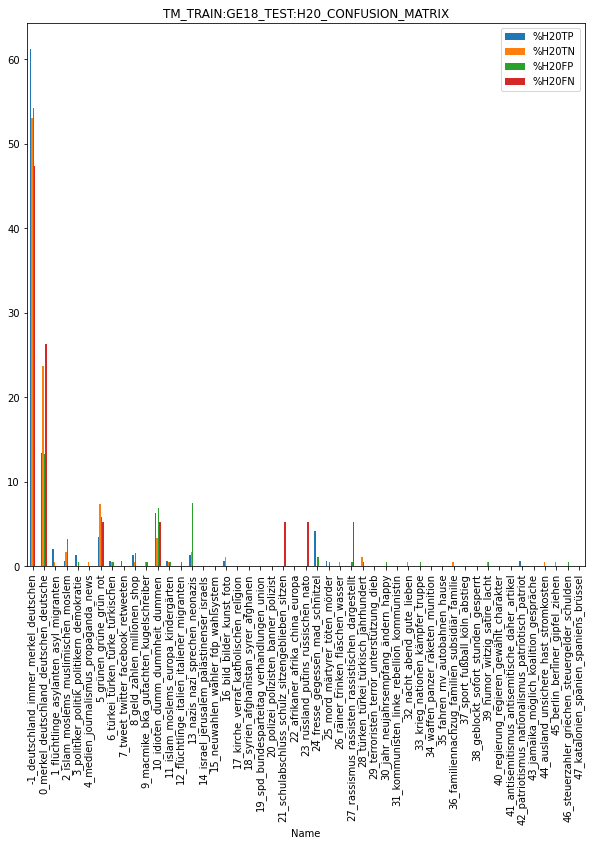

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX.plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:H20_CONFUSION_MATRIX")

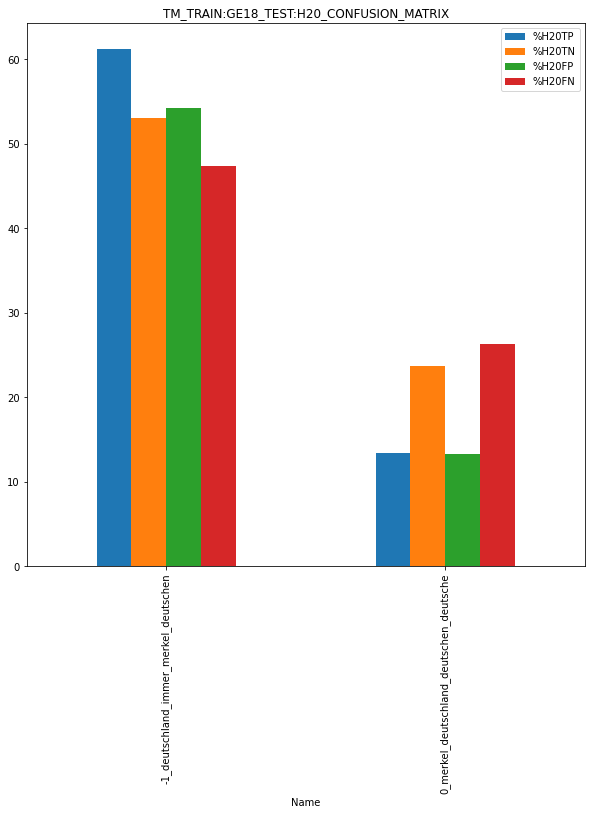

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[0:2].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:H20_CONFUSION_MATRIX")

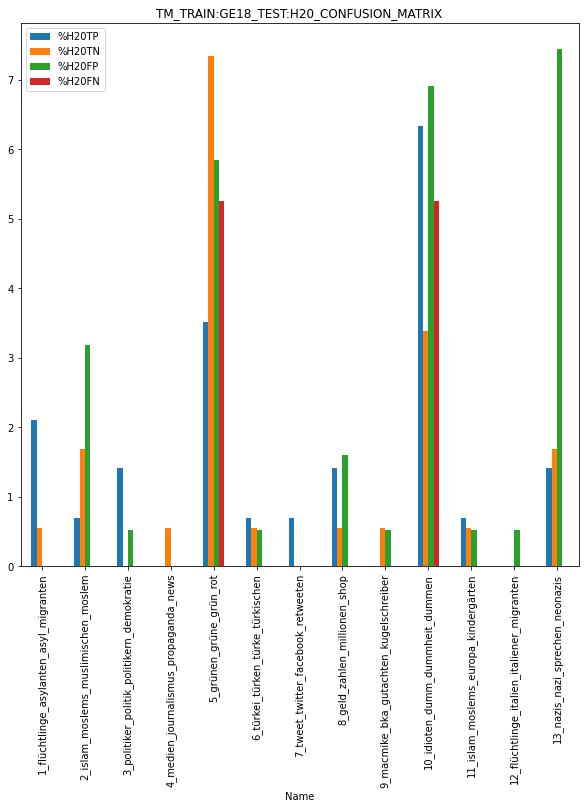

In [ ]:
test_h20_df_percent_plt_CONF_MATRIX[2:15].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
                                            kind="bar",figsize=(10, 10), 
                                            title = 
                                            "TM_TRAIN:GE18_TEST:H20_CONFUSION_MATRIX")

In [ ]:
#test_h20_df_percent_plt_CONF_MATRIX[15:].plot(y=['%H20TP', '%H20TN','%H20FP', '%H20FN'], 
#                                            kind="bar",figsize=(10, 10), 
#                                            title = 
#                                            "TM_TRAIN:GE18_TEST:H20_CONFUSION_MATRIX")